In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!nvidia-smi

Wed Oct  2 11:31:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.06             Driver Version: 535.183.06   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080        On  | 00000000:01:00.0  On |                  N/A |
| 32%   29C    P8              19W / 215W |    405MiB /  8192MiB |     10%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
import os
os.chdir('../IConNet')
print(os.getcwd())

cuda
/home/linh/projects/IConNet


In [4]:
from IConNet.trainer.train_torch import Trainer_custom_model as Trainer
from IConNet.trainer.train_torch import get_dataloader
from omegaconf import OmegaConf as ocf

In [5]:
dataset_name = 'text_emotion'
data_dir = '../data/data_preprocessed/'
dataset_config_path = f'config/dataset/{dataset_name}_hashtest.yaml'
dataset_config = ocf.load(dataset_config_path)
print(dataset_config)
batch_size = 16
train_loader, test_loader, batch_size = get_dataloader(
    dataset_config, data_dir, batch_size=batch_size)
labels = dataset_config.target_labels

{'name': 'text_emotion', 'dataset_class': 'SplittedWaveformDataset', 'root': 'text_emotion/', 'audio_dir': 'full_release/', 'feature_dir': 'hashtest/', 'label_name': 'labels_13emotions', 'feature_name': 'signals_3channels_win5stride1', 'num_classes': 13, 'label_values': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'classnames': ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'], 'target_labels': ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']}


In [6]:
from IConNet.nn.model import M11TextPool as M11
from omegaconf import OmegaConf as ocf

model_config_path = 'config/model/m11text_pool.yaml'
model_config = ocf.load(model_config_path)
model_config

{'name': 'M11TextPool', 'description': '2-layer FirConv with LSTM for text emotion classification with dropout', 'fe': {'n_block': 2, 'n_channel': [128, 128], 'kernel_size': [511, 127], 'stride': [2, 8], 'window_k': [2, 9], 'residual_connection_type': 'channel_concat', 'pooling': 'max', 'mel_resolution': 4, 'filter_type': 'firwin', 'conv_mode': 'strided_conv', 'norm_type': 'LocalResponseNorm', 'complex_type': 'v1'}, 'cls': {'n_block': 2, 'n_hidden_dim': [256, 256], 'dropout': 0.1}}

In [7]:
model = M11(config=model_config,
           n_input=3, n_output=len(labels))
model

M11TextPool(
  (fe_blocks): FeBlocks(
    (blocks): ModuleList(
      (0-1): 2 x Sequential(
        (layer): FirConvLayer()
        (norm): CustomNormLayer(
          (layer): LocalResponseNorm(2, alpha=0.0001, beta=0.75, k=1.0)
        )
      )
    )
    (act): NLReLU()
  )
  (cls_head): Classifier(
    (blocks): ModuleList(
      (0): Sequential(
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (layer): Linear(in_features=128, out_features=256, bias=True)
      )
      (1): Sequential(
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (layer): Linear(in_features=256, out_features=256, bias=True)
      )
    )
    (act): LeakyReLU(negative_slope=0.01)
    (output_layer): Linear(in_features=256, out_features=13, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [8]:
layer = model.fe_blocks.blocks[0].layer
from IConNet.visualizer import visualize_model
visualize_model.print_parameters(layer)

('lowcut_bands', Parameter containing:
tensor([[0.0000, 0.0000, 0.0000],
        [0.0036, 0.0036, 0.0036],
        [0.0075, 0.0075, 0.0075],
        [0.0117, 0.0117, 0.0117],
        [0.0162, 0.0162, 0.0162],
        [0.0211, 0.0211, 0.0211],
        [0.0264, 0.0264, 0.0264],
        [0.0322, 0.0322, 0.0322],
        [0.0384, 0.0384, 0.0384],
        [0.0451, 0.0451, 0.0451],
        [0.0524, 0.0524, 0.0524],
        [0.0603, 0.0603, 0.0603],
        [0.0688, 0.0688, 0.0688],
        [0.0780, 0.0780, 0.0780],
        [0.0880, 0.0880, 0.0880],
        [0.0988, 0.0988, 0.0988],
        [0.1105, 0.1105, 0.1105],
        [0.1231, 0.1231, 0.1231],
        [0.1368, 0.1368, 0.1368],
        [0.1516, 0.1516, 0.1516],
        [0.1676, 0.1676, 0.1676],
        [0.1849, 0.1849, 0.1849],
        [0.2036, 0.2036, 0.2036],
        [0.2239, 0.2239, 0.2239],
        [0.2458, 0.2458, 0.2458],
        [0.2696, 0.2696, 0.2696],
        [0.2952, 0.2952, 0.2952],
        [0.3230, 0.3230, 0.3230],
        [

In [9]:
print(visualize_model.count_parameters(model))

284685


In [10]:
visualize_model.count_parameters(model.fe_blocks)

181760

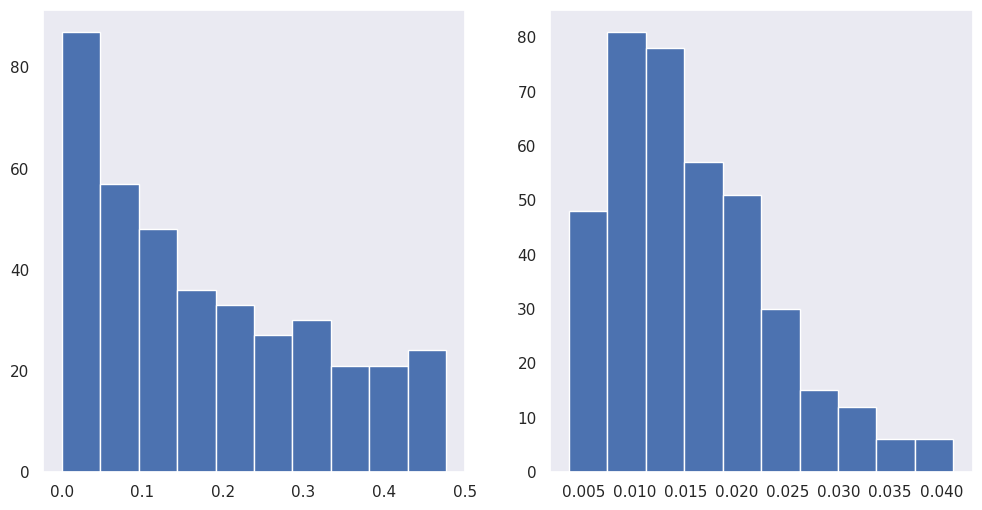

In [11]:
filtviz = visualize_model.FilterVisualizer(
    lowcut_bands = layer.lowcut_bands, 
    bandwidths = layer.bandwidths,
    window_params = layer.window_params, 
    window_length = 64,
    sample_rate = 825*2
)
filtviz.visualize_bands()

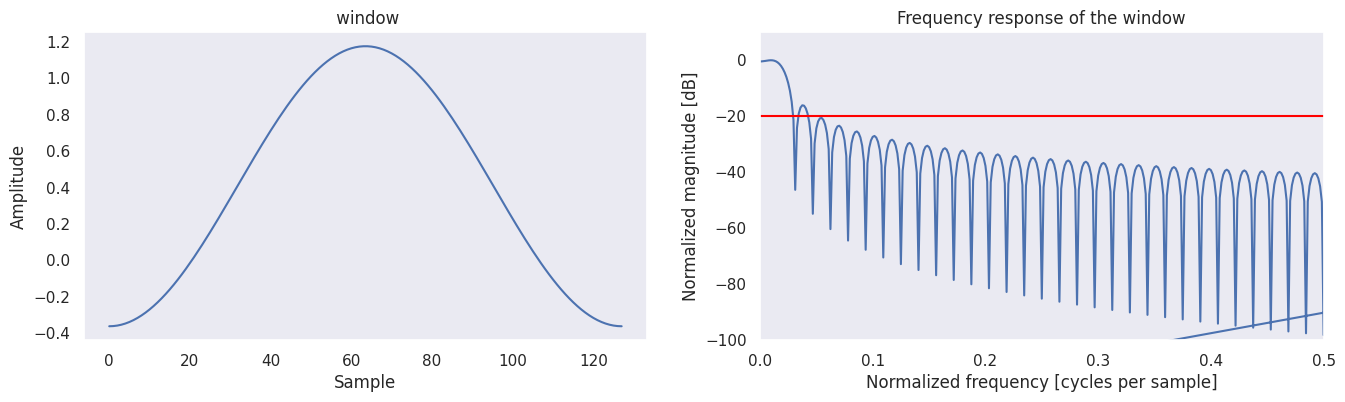

In [12]:
filtviz.visualize_one_window()

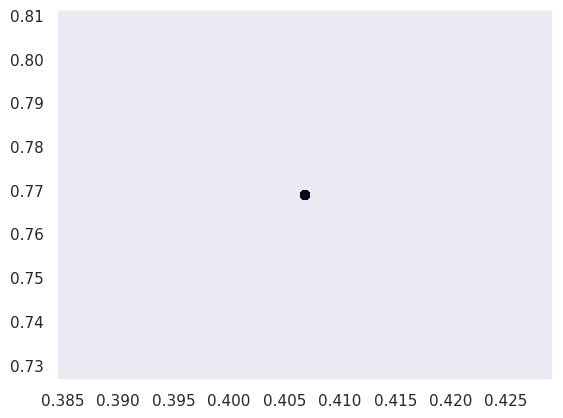

In [13]:
filtviz.visualize_window_params()

In [14]:
experiment_prefix = 'v10'
log_dir = f'./_logs/text_emotion/{experiment_prefix}/'

trainer = Trainer(batch_size=batch_size, log_dir=log_dir, 
                  experiment_prefix=experiment_prefix, device=device,
                 accumulate_grad_batches=8, gradient_clip_val=0.,
                 labels=labels)

trainer.prepare(train_loader=train_loader, 
                test_loader=test_loader, 
                batch_size=batch_size)
trainer.setup(model, lr=1e-4, max_lr=0.2)

In [15]:
trainer.fit(n_epoch=500, test_n_epoch=1)

  0%|                                                                | 0.19384615384615442/500 [00:46<637:02:44, 4588.51s/it]

Epoch: 1	Loss: 2.211	Val_acc: 381/1600 (23.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=1.step=219.loss=2.211.val_acc=0.238.pt


  0%|▏                                                                  | 0.9999999999999765/500 [03:48<34:11:11, 246.64s/it]

Correct: 1616/8000 (0.2020)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=1.step=437.test_acc=0.2020.pt
{'acc_unweighted': tensor(0.0878),
 'acc_weighted': tensor(0.2020),
 'f1s_unweighted': tensor(0.0610),
 'f1s_weighted': tensor(0.1523),
 'rocauc': tensor(0.5167),
 'uar': tensor(0.0878),
 'wap': tensor(0.1327)}


  0%|▏                                                                 | 1.193846153846152/500 [04:34<644:16:04, 4649.83s/it]

Epoch: 2	Loss: 2.194	Val_acc: 382/1600 (23.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=2.step=656.loss=2.194.val_acc=0.239.pt


  0%|▎                                                                  | 2.0000000000000884/500 [07:37<35:24:15, 255.93s/it]

Correct: 1728/8000 (0.2160)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=2.step=874.test_acc=0.2160.pt
{'acc_unweighted': tensor(0.0769),
 'acc_weighted': tensor(0.2160),
 'f1s_unweighted': tensor(0.0273),
 'f1s_weighted': tensor(0.0767),
 'rocauc': tensor(0.5282),
 'uar': tensor(0.0769),
 'wap': tensor(0.0467)}


  0%|▎                                                                 | 2.193846153846264/500 [08:23<643:11:21, 4651.37s/it]

Epoch: 3	Loss: 2.345	Val_acc: 361/1600 (22.56%)



  1%|▍                                                                  | 3.0000000000002003/500 [11:26<34:49:12, 252.22s/it]

Correct: 1719/8000 (0.2149)
{'acc_unweighted': tensor(0.0781),
 'acc_weighted': tensor(0.2149),
 'f1s_unweighted': tensor(0.0296),
 'f1s_weighted': tensor(0.0816),
 'rocauc': tensor(0.5219),
 'uar': tensor(0.0781),
 'wap': tensor(0.1547)}


  1%|▍                                                                 | 3.193846153846376/500 [12:12<633:44:20, 4592.25s/it]

Epoch: 4	Loss: 1.831	Val_acc: 385/1600 (24.06%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=4.step=1530.loss=1.831.val_acc=0.241.pt


  1%|▌                                                                   | 4.000000000000312/500 [15:15<34:31:10, 250.55s/it]

Correct: 1945/8000 (0.2431)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=4.step=1748.test_acc=0.2431.pt
{'acc_unweighted': tensor(0.0878),
 'acc_weighted': tensor(0.2431),
 'f1s_unweighted': tensor(0.0520),
 'f1s_weighted': tensor(0.1446),
 'rocauc': tensor(0.5424),
 'uar': tensor(0.0878),
 'wap': tensor(0.1112)}


  1%|▌                                                                 | 4.193846153846375/500 [16:01<644:14:43, 4677.80s/it]

Epoch: 5	Loss: 2.252	Val_acc: 399/1600 (24.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=5.step=1967.loss=2.252.val_acc=0.249.pt


  1%|▋                                                                   | 4.999999999999846/500 [19:04<35:03:06, 254.92s/it]

Correct: 1980/8000 (0.2475)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=5.step=2185.test_acc=0.2475.pt
{'acc_unweighted': tensor(0.0893),
 'acc_weighted': tensor(0.2475),
 'f1s_unweighted': tensor(0.0535),
 'f1s_weighted': tensor(0.1487),
 'rocauc': tensor(0.5442),
 'uar': tensor(0.0893),
 'wap': tensor(0.1094)}


  1%|▋                                                                  | 5.19384615384591/500 [19:51<647:06:48, 4708.12s/it]

Epoch: 6	Loss: 2.512	Val_acc: 392/1600 (24.50%)



  1%|▊                                                                   | 5.999999999999381/500 [22:55<35:12:51, 256.62s/it]

Correct: 1922/8000 (0.2402)
{'acc_unweighted': tensor(0.0868),
 'acc_weighted': tensor(0.2402),
 'f1s_unweighted': tensor(0.0512),
 'f1s_weighted': tensor(0.1423),
 'rocauc': tensor(0.5433),
 'uar': tensor(0.0868),
 'wap': tensor(0.1114)}


  1%|▊                                                                 | 6.193846153845445/500 [23:41<634:09:15, 4623.18s/it]

Epoch: 7	Loss: 2.149	Val_acc: 393/1600 (24.56%)



  1%|▉                                                                  | 6.9999999999989155/500 [26:45<34:35:45, 252.63s/it]

Correct: 1966/8000 (0.2457)
{'acc_unweighted': tensor(0.0887),
 'acc_weighted': tensor(0.2457),
 'f1s_unweighted': tensor(0.0530),
 'f1s_weighted': tensor(0.1473),
 'rocauc': tensor(0.5371),
 'uar': tensor(0.0887),
 'wap': tensor(0.1092)}


  1%|▉                                                                 | 7.193846153844979/500 [27:30<633:01:09, 4624.27s/it]

Epoch: 8	Loss: 2.047	Val_acc: 383/1600 (23.94%)



  2%|█                                                                    | 7.99999999999845/500 [30:33<34:18:53, 251.08s/it]

Correct: 1930/8000 (0.2412)
{'acc_unweighted': tensor(0.0872),
 'acc_weighted': tensor(0.2412),
 'f1s_unweighted': tensor(0.0513),
 'f1s_weighted': tensor(0.1425),
 'rocauc': tensor(0.5444),
 'uar': tensor(0.0872),
 'wap': tensor(0.1136)}


  2%|█                                                                 | 8.193846153844737/500 [31:19<625:08:30, 4576.01s/it]

Epoch: 9	Loss: 2.512	Val_acc: 399/1600 (24.94%)



  2%|█▏                                                                  | 8.999999999999138/500 [34:21<34:32:18, 253.23s/it]

Correct: 1894/8000 (0.2367)
{'acc_unweighted': tensor(0.0857),
 'acc_weighted': tensor(0.2368),
 'f1s_unweighted': tensor(0.0486),
 'f1s_weighted': tensor(0.1348),
 'rocauc': tensor(0.5555),
 'uar': tensor(0.0857),
 'wap': tensor(0.1207)}


  2%|█▏                                                                | 9.193846153845426/500 [35:07<624:26:27, 4580.19s/it]

Epoch: 10	Loss: 1.787	Val_acc: 361/1600 (22.56%)



  2%|█▎                                                                  | 9.999999999999828/500 [38:10<34:30:00, 253.47s/it]

Correct: 1843/8000 (0.2304)
{'acc_unweighted': tensor(0.0823),
 'acc_weighted': tensor(0.2304),
 'f1s_unweighted': tensor(0.0425),
 'f1s_weighted': tensor(0.1184),
 'rocauc': tensor(0.5497),
 'uar': tensor(0.0823),
 'wap': tensor(0.1024)}


  2%|█▎                                                               | 10.193846153846115/500 [38:56<629:22:27, 4625.81s/it]

Epoch: 11	Loss: 1.879	Val_acc: 404/1600 (25.25%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=11.step=4589.loss=1.879.val_acc=0.253.pt


  2%|█▍                                                                 | 11.000000000000517/500 [42:00<34:49:14, 256.35s/it]

Correct: 2027/8000 (0.2534)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=11.step=4807.test_acc=0.2534.pt
{'acc_unweighted': tensor(0.0912),
 'acc_weighted': tensor(0.2534),
 'f1s_unweighted': tensor(0.0548),
 'f1s_weighted': tensor(0.1525),
 'rocauc': tensor(0.5512),
 'uar': tensor(0.0912),
 'wap': tensor(0.1096)}


  2%|█▍                                                               | 11.193846153846804/500 [42:46<628:53:20, 4631.69s/it]

Epoch: 12	Loss: 2.079	Val_acc: 399/1600 (24.94%)



  2%|█▌                                                                 | 12.000000000001206/500 [45:49<34:34:44, 255.09s/it]

Correct: 2024/8000 (0.2530)
{'acc_unweighted': tensor(0.0910),
 'acc_weighted': tensor(0.2530),
 'f1s_unweighted': tensor(0.0546),
 'f1s_weighted': tensor(0.1518),
 'rocauc': tensor(0.5546),
 'uar': tensor(0.0910),
 'wap': tensor(0.1084)}


  2%|█▌                                                               | 12.193846153847494/500 [46:35<626:13:13, 4621.50s/it]

Epoch: 13	Loss: 2.201	Val_acc: 403/1600 (25.19%)



  3%|█▋                                                                 | 13.000000000001895/500 [49:37<33:54:24, 250.65s/it]

Correct: 1728/8000 (0.2160)
{'acc_unweighted': tensor(0.0769),
 'acc_weighted': tensor(0.2160),
 'f1s_unweighted': tensor(0.0273),
 'f1s_weighted': tensor(0.0767),
 'rocauc': tensor(0.5572),
 'uar': tensor(0.0769),
 'wap': tensor(0.0467)}


  3%|█▋                                                               | 13.193846153848183/500 [50:24<638:16:10, 4720.09s/it]

Epoch: 14	Loss: 1.904	Val_acc: 374/1600 (23.38%)



  3%|█▉                                                                 | 14.000000000002585/500 [53:26<33:49:18, 250.53s/it]

Correct: 2013/8000 (0.2516)
{'acc_unweighted': tensor(0.0904),
 'acc_weighted': tensor(0.2516),
 'f1s_unweighted': tensor(0.0540),
 'f1s_weighted': tensor(0.1502),
 'rocauc': tensor(0.5499),
 'uar': tensor(0.0904),
 'wap': tensor(0.1072)}


  3%|█▊                                                               | 14.193846153848872/500 [54:12<619:11:17, 4588.41s/it]

Epoch: 15	Loss: 2.105	Val_acc: 406/1600 (25.37%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=15.step=6337.loss=2.105.val_acc=0.254.pt


  3%|██                                                                 | 15.000000000003274/500 [57:16<33:45:16, 250.55s/it]

Correct: 1944/8000 (0.2430)
{'acc_unweighted': tensor(0.0879),
 'acc_weighted': tensor(0.2430),
 'f1s_unweighted': tensor(0.0512),
 'f1s_weighted': tensor(0.1421),
 'rocauc': tensor(0.5570),
 'uar': tensor(0.0879),
 'wap': tensor(0.1190)}


  3%|█▉                                                               | 15.193846153849561/500 [58:01<619:40:28, 4601.49s/it]

Epoch: 16	Loss: 1.981	Val_acc: 403/1600 (25.19%)



  3%|██                                                                | 16.00000000000396/500 [1:01:04<33:56:47, 252.50s/it]

Correct: 1930/8000 (0.2412)
{'acc_unweighted': tensor(0.0873),
 'acc_weighted': tensor(0.2412),
 'f1s_unweighted': tensor(0.0505),
 'f1s_weighted': tensor(0.1404),
 'rocauc': tensor(0.5538),
 'uar': tensor(0.0873),
 'wap': tensor(0.1192)}


  3%|██                                                               | 16.1938461538498/500 [1:01:50<617:05:03, 4591.72s/it]

Epoch: 17	Loss: 1.870	Val_acc: 410/1600 (25.62%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=17.step=7211.loss=1.870.val_acc=0.256.pt


  3%|██▏                                                               | 17.00000000000234/500 [1:04:52<33:19:34, 248.39s/it]

Correct: 2043/8000 (0.2554)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=17.step=7429.test_acc=0.2554.pt
{'acc_unweighted': tensor(0.0920),
 'acc_weighted': tensor(0.2554),
 'f1s_unweighted': tensor(0.0553),
 'f1s_weighted': tensor(0.1537),
 'rocauc': tensor(0.5629),
 'uar': tensor(0.0920),
 'wap': tensor(0.1106)}


  3%|██▏                                                             | 17.19384615384818/500 [1:05:38<626:04:36, 4668.28s/it]

Epoch: 18	Loss: 1.988	Val_acc: 381/1600 (23.81%)



  4%|██▍                                                               | 18.00000000000072/500 [1:08:40<33:21:19, 249.13s/it]

Correct: 2034/8000 (0.2542)
{'acc_unweighted': tensor(0.0915),
 'acc_weighted': tensor(0.2542),
 'f1s_unweighted': tensor(0.0549),
 'f1s_weighted': tensor(0.1525),
 'rocauc': tensor(0.5647),
 'uar': tensor(0.0915),
 'wap': tensor(0.1090)}


  4%|██▎                                                             | 18.19384615384656/500 [1:09:26<630:11:11, 4708.68s/it]

Epoch: 19	Loss: 2.104	Val_acc: 408/1600 (25.50%)



  4%|██▌                                                                | 18.9999999999991/500 [1:12:29<33:57:02, 254.10s/it]

Correct: 1906/8000 (0.2382)
{'acc_unweighted': tensor(0.0853),
 'acc_weighted': tensor(0.2383),
 'f1s_unweighted': tensor(0.0478),
 'f1s_weighted': tensor(0.1330),
 'rocauc': tensor(0.5680),
 'uar': tensor(0.0853),
 'wap': tensor(0.1018)}


  4%|██▍                                                             | 19.19384615384494/500 [1:13:15<617:56:25, 4626.78s/it]

Epoch: 20	Loss: 2.273	Val_acc: 404/1600 (25.25%)



  4%|██▋                                                               | 19.99999999999748/500 [1:16:19<33:25:49, 250.73s/it]

Correct: 1837/8000 (0.2296)
{'acc_unweighted': tensor(0.0820),
 'acc_weighted': tensor(0.2296),
 'f1s_unweighted': tensor(0.0417),
 'f1s_weighted': tensor(0.1163),
 'rocauc': tensor(0.5625),
 'uar': tensor(0.0820),
 'wap': tensor(0.0994)}


  4%|██▌                                                             | 20.19384615384332/500 [1:17:05<617:43:16, 4634.78s/it]

Epoch: 21	Loss: 1.789	Val_acc: 393/1600 (24.56%)



  4%|██▊                                                               | 20.99999999999586/500 [1:20:08<33:38:24, 252.83s/it]

Correct: 2034/8000 (0.2542)
{'acc_unweighted': tensor(0.0916),
 'acc_weighted': tensor(0.2542),
 'f1s_unweighted': tensor(0.0552),
 'f1s_weighted': tensor(0.1533),
 'rocauc': tensor(0.5617),
 'uar': tensor(0.0916),
 'wap': tensor(0.1116)}


  4%|██▊                                                              | 21.1938461538417/500 [1:20:54<614:13:03, 4618.12s/it]

Epoch: 22	Loss: 2.403	Val_acc: 404/1600 (25.25%)



  4%|██▉                                                               | 21.99999999999424/500 [1:23:58<33:21:11, 251.20s/it]

Correct: 1835/8000 (0.2294)
{'acc_unweighted': tensor(0.0819),
 'acc_weighted': tensor(0.2294),
 'f1s_unweighted': tensor(0.0417),
 'f1s_weighted': tensor(0.1164),
 'rocauc': tensor(0.5655),
 'uar': tensor(0.0819),
 'wap': tensor(0.0973)}


  4%|██▊                                                             | 22.19384615384008/500 [1:24:44<609:01:14, 4588.63s/it]

Epoch: 23	Loss: 2.320	Val_acc: 383/1600 (23.94%)



  5%|███                                                               | 22.99999999999262/500 [1:27:48<33:14:04, 250.83s/it]

Correct: 1994/8000 (0.2492)
{'acc_unweighted': tensor(0.0900),
 'acc_weighted': tensor(0.2492),
 'f1s_unweighted': tensor(0.0537),
 'f1s_weighted': tensor(0.1493),
 'rocauc': tensor(0.5643),
 'uar': tensor(0.0900),
 'wap': tensor(0.1152)}


  5%|██▉                                                             | 23.19384615383846/500 [1:28:34<615:02:15, 4643.68s/it]

Epoch: 24	Loss: 2.022	Val_acc: 410/1600 (25.62%)



  5%|███▎                                                                | 23.999999999991/500 [1:31:37<33:08:55, 250.71s/it]

Correct: 1791/8000 (0.2239)
{'acc_unweighted': tensor(0.0798),
 'acc_weighted': tensor(0.2239),
 'f1s_unweighted': tensor(0.0362),
 'f1s_weighted': tensor(0.1012),
 'rocauc': tensor(0.5728),
 'uar': tensor(0.0798),
 'wap': tensor(0.0979)}


  5%|███                                                             | 24.19384615383684/500 [1:32:24<619:37:41, 4688.17s/it]

Epoch: 25	Loss: 2.320	Val_acc: 413/1600 (25.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=25.step=10707.loss=2.320.val_acc=0.258.pt


  5%|███▎                                                              | 24.99999999998938/500 [1:35:30<33:09:10, 251.26s/it]

Correct: 2039/8000 (0.2549)
{'acc_unweighted': tensor(0.0917),
 'acc_weighted': tensor(0.2549),
 'f1s_unweighted': tensor(0.0549),
 'f1s_weighted': tensor(0.1527),
 'rocauc': tensor(0.5714),
 'uar': tensor(0.0917),
 'wap': tensor(0.1090)}


  5%|███▏                                                            | 25.19384615383522/500 [1:36:16<609:29:22, 4621.17s/it]

Epoch: 26	Loss: 1.974	Val_acc: 394/1600 (24.62%)



  5%|███▍                                                              | 25.99999999998776/500 [1:39:19<33:21:47, 253.39s/it]

Correct: 1927/8000 (0.2409)
{'acc_unweighted': tensor(0.0872),
 'acc_weighted': tensor(0.2409),
 'f1s_unweighted': tensor(0.0498),
 'f1s_weighted': tensor(0.1383),
 'rocauc': tensor(0.5752),
 'uar': tensor(0.0872),
 'wap': tensor(0.1252)}


  5%|███▍                                                             | 26.1938461538336/500 [1:40:05<610:33:21, 4639.03s/it]

Epoch: 27	Loss: 1.977	Val_acc: 414/1600 (25.87%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=27.step=11581.loss=1.977.val_acc=0.259.pt


  5%|███▌                                                              | 26.99999999998614/500 [1:43:09<33:26:57, 254.58s/it]

Correct: 2066/8000 (0.2582)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=27.step=11799.test_acc=0.2582.pt
{'acc_unweighted': tensor(0.0930),
 'acc_weighted': tensor(0.2582),
 'f1s_unweighted': tensor(0.0561),
 'f1s_weighted': tensor(0.1558),
 'rocauc': tensor(0.5721),
 'uar': tensor(0.0930),
 'wap': tensor(0.1130)}


  5%|███▍                                                            | 27.19384615383198/500 [1:43:55<608:39:46, 4634.43s/it]

Epoch: 28	Loss: 1.802	Val_acc: 377/1600 (23.56%)



  6%|███▋                                                              | 27.99999999998452/500 [1:46:59<33:23:21, 254.66s/it]

Correct: 1792/8000 (0.2240)
{'acc_unweighted': tensor(0.0799),
 'acc_weighted': tensor(0.2240),
 'f1s_unweighted': tensor(0.0356),
 'f1s_weighted': tensor(0.0995),
 'rocauc': tensor(0.5722),
 'uar': tensor(0.0799),
 'wap': tensor(0.1001)}


  6%|███▌                                                            | 28.19384615383036/500 [1:47:44<603:40:44, 4606.22s/it]

Epoch: 29	Loss: 2.191	Val_acc: 405/1600 (25.31%)



  6%|███▉                                                               | 28.9999999999829/500 [1:50:47<33:12:41, 253.85s/it]

Correct: 2028/8000 (0.2535)
{'acc_unweighted': tensor(0.0911),
 'acc_weighted': tensor(0.2535),
 'f1s_unweighted': tensor(0.0543),
 'f1s_weighted': tensor(0.1511),
 'rocauc': tensor(0.5698),
 'uar': tensor(0.0911),
 'wap': tensor(0.1078)}


  6%|███▋                                                            | 29.19384615382874/500 [1:51:33<599:40:32, 4585.40s/it]

Epoch: 30	Loss: 2.001	Val_acc: 388/1600 (24.25%)



  6%|███▉                                                              | 29.99999999998128/500 [1:54:36<32:33:27, 249.38s/it]

Correct: 2055/8000 (0.2569)
{'acc_unweighted': tensor(0.0926),
 'acc_weighted': tensor(0.2569),
 'f1s_unweighted': tensor(0.0557),
 'f1s_weighted': tensor(0.1549),
 'rocauc': tensor(0.5800),
 'uar': tensor(0.0926),
 'wap': tensor(0.1142)}


  6%|███▊                                                            | 30.19384615382712/500 [1:55:22<611:56:37, 4689.16s/it]

Epoch: 31	Loss: 2.222	Val_acc: 425/1600 (26.56%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=31.step=13329.loss=2.222.val_acc=0.266.pt


  6%|████                                                              | 30.99999999997966/500 [1:58:25<33:25:26, 256.56s/it]

Correct: 2082/8000 (0.2602)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=31.step=13547.test_acc=0.2602.pt
{'acc_unweighted': tensor(0.0937),
 'acc_weighted': tensor(0.2603),
 'f1s_unweighted': tensor(0.0565),
 'f1s_weighted': tensor(0.1570),
 'rocauc': tensor(0.5803),
 'uar': tensor(0.0937),
 'wap': tensor(0.1134)}


  6%|████                                                             | 31.1938461538255/500 [1:59:12<603:09:08, 4631.66s/it]

Epoch: 32	Loss: 2.199	Val_acc: 422/1600 (26.38%)



  6%|████▏                                                             | 31.99999999997804/500 [2:02:15<32:44:15, 251.83s/it]

Correct: 2044/8000 (0.2555)
{'acc_unweighted': tensor(0.0922),
 'acc_weighted': tensor(0.2555),
 'f1s_unweighted': tensor(0.0554),
 'f1s_weighted': tensor(0.1541),
 'rocauc': tensor(0.5816),
 'uar': tensor(0.0922),
 'wap': tensor(0.1196)}


  6%|████                                                           | 32.193846153823884/500 [2:03:01<596:21:53, 4589.32s/it]

Epoch: 33	Loss: 1.895	Val_acc: 421/1600 (26.31%)



  7%|████▎                                                            | 32.999999999976424/500 [2:06:05<32:44:30, 252.40s/it]

Correct: 2033/8000 (0.2541)
{'acc_unweighted': tensor(0.0918),
 'acc_weighted': tensor(0.2541),
 'f1s_unweighted': tensor(0.0551),
 'f1s_weighted': tensor(0.1530),
 'rocauc': tensor(0.5835),
 'uar': tensor(0.0918),
 'wap': tensor(0.1237)}


  7%|████▏                                                          | 33.193846153822264/500 [2:06:51<596:56:25, 4603.59s/it]

Epoch: 34	Loss: 2.041	Val_acc: 398/1600 (24.88%)



  7%|████▍                                                            | 33.999999999974804/500 [2:09:54<32:18:53, 249.64s/it]

Correct: 2111/8000 (0.2639)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=34.step=14858.test_acc=0.2639.pt
{'acc_unweighted': tensor(0.0950),
 'acc_weighted': tensor(0.2639),
 'f1s_unweighted': tensor(0.0574),
 'f1s_weighted': tensor(0.1596),
 'rocauc': tensor(0.5900),
 'uar': tensor(0.0950),
 'wap': tensor(0.1160)}


  7%|████▎                                                          | 34.193846153820644/500 [2:10:40<594:24:13, 4593.87s/it]

Epoch: 35	Loss: 2.086	Val_acc: 404/1600 (25.25%)



  7%|████▌                                                            | 34.999999999973184/500 [2:13:43<32:29:24, 251.54s/it]

Correct: 2071/8000 (0.2589)
{'acc_unweighted': tensor(0.0952),
 'acc_weighted': tensor(0.2589),
 'f1s_unweighted': tensor(0.0637),
 'f1s_weighted': tensor(0.1694),
 'rocauc': tensor(0.5906),
 'uar': tensor(0.0952),
 'wap': tensor(0.1341)}


  7%|████▍                                                          | 35.193846153819024/500 [2:14:29<598:21:13, 4634.35s/it]

Epoch: 36	Loss: 1.826	Val_acc: 428/1600 (26.75%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=36.step=15514.loss=1.826.val_acc=0.268.pt


  7%|████▋                                                            | 35.999999999971564/500 [2:17:33<32:23:18, 251.29s/it]

Correct: 2065/8000 (0.2581)
{'acc_unweighted': tensor(0.0932),
 'acc_weighted': tensor(0.2581),
 'f1s_unweighted': tensor(0.0562),
 'f1s_weighted': tensor(0.1561),
 'rocauc': tensor(0.5975),
 'uar': tensor(0.0932),
 'wap': tensor(0.1219)}


  7%|████▌                                                          | 36.193846153817404/500 [2:18:20<610:00:01, 4734.74s/it]

Epoch: 37	Loss: 2.196	Val_acc: 431/1600 (26.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=37.step=15951.loss=2.196.val_acc=0.269.pt


  7%|████▊                                                            | 36.999999999969944/500 [2:21:25<32:39:58, 253.99s/it]

Correct: 2129/8000 (0.2661)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=37.step=16169.test_acc=0.2661.pt
{'acc_unweighted': tensor(0.0959),
 'acc_weighted': tensor(0.2661),
 'f1s_unweighted': tensor(0.0580),
 'f1s_weighted': tensor(0.1613),
 'rocauc': tensor(0.5964),
 'uar': tensor(0.0959),
 'wap': tensor(0.1182)}


  7%|████▋                                                          | 37.193846153815784/500 [2:22:11<599:11:16, 4660.86s/it]

Epoch: 38	Loss: 1.985	Val_acc: 442/1600 (27.62%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=38.step=16388.loss=1.985.val_acc=0.276.pt


  8%|████▉                                                            | 37.999999999968324/500 [2:25:15<32:20:53, 252.06s/it]

Correct: 2133/8000 (0.2666)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=38.step=16606.test_acc=0.2666.pt
{'acc_unweighted': tensor(0.1026),
 'acc_weighted': tensor(0.2666),
 'f1s_unweighted': tensor(0.0708),
 'f1s_weighted': tensor(0.1643),
 'rocauc': tensor(0.6052),
 'uar': tensor(0.1026),
 'wap': tensor(0.1432)}


  8%|████▊                                                          | 38.193846153814164/500 [2:26:01<594:18:38, 4632.94s/it]

Epoch: 39	Loss: 2.182	Val_acc: 428/1600 (26.75%)



  8%|█████                                                            | 38.999999999966704/500 [2:29:06<32:44:17, 255.66s/it]

Correct: 2068/8000 (0.2585)
{'acc_unweighted': tensor(0.0928),
 'acc_weighted': tensor(0.2585),
 'f1s_unweighted': tensor(0.0545),
 'f1s_weighted': tensor(0.1518),
 'rocauc': tensor(0.5968),
 'uar': tensor(0.0928),
 'wap': tensor(0.1091)}


  8%|████▉                                                          | 39.193846153812544/500 [2:29:53<603:39:15, 4715.99s/it]

Epoch: 40	Loss: 2.088	Val_acc: 447/1600 (27.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=40.step=17262.loss=2.088.val_acc=0.279.pt


  8%|█████▏                                                           | 39.999999999965084/500 [2:32:57<32:09:41, 251.70s/it]

Correct: 2147/8000 (0.2684)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=40.step=17480.test_acc=0.2684.pt
{'acc_unweighted': tensor(0.0965),
 'acc_weighted': tensor(0.2684),
 'f1s_unweighted': tensor(0.0577),
 'f1s_weighted': tensor(0.1605),
 'rocauc': tensor(0.6098),
 'uar': tensor(0.0965),
 'wap': tensor(0.1145)}


  8%|█████                                                          | 40.193846153810924/500 [2:33:43<604:47:38, 4735.17s/it]

Epoch: 41	Loss: 1.942	Val_acc: 436/1600 (27.25%)



  8%|█████▎                                                           | 40.999999999963464/500 [2:36:48<32:57:27, 258.49s/it]

Correct: 2143/8000 (0.2679)
{'acc_unweighted': tensor(0.1007),
 'acc_weighted': tensor(0.2679),
 'f1s_unweighted': tensor(0.0663),
 'f1s_weighted': tensor(0.1617),
 'rocauc': tensor(0.6099),
 'uar': tensor(0.1007),
 'wap': tensor(0.1379)}


  8%|█████▏                                                         | 41.193846153809304/500 [2:37:34<594:59:53, 4668.62s/it]

Epoch: 42	Loss: 2.249	Val_acc: 438/1600 (27.38%)



  8%|█████▍                                                           | 41.999999999961844/500 [2:40:38<32:16:02, 253.63s/it]

Correct: 2236/8000 (0.2795)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=42.step=18354.test_acc=0.2795.pt
{'acc_unweighted': tensor(0.1068),
 'acc_weighted': tensor(0.2795),
 'f1s_unweighted': tensor(0.0706),
 'f1s_weighted': tensor(0.1684),
 'rocauc': tensor(0.6201),
 'uar': tensor(0.1068),
 'wap': tensor(0.1215)}


  8%|█████▎                                                         | 42.193846153807684/500 [2:41:24<592:47:43, 4661.50s/it]

Epoch: 43	Loss: 2.239	Val_acc: 453/1600 (28.31%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=43.step=18573.loss=2.239.val_acc=0.283.pt


  9%|█████▌                                                           | 42.999999999960224/500 [2:44:29<32:06:51, 252.98s/it]

Correct: 2233/8000 (0.2791)
{'acc_unweighted': tensor(0.1074),
 'acc_weighted': tensor(0.2791),
 'f1s_unweighted': tensor(0.0727),
 'f1s_weighted': tensor(0.1713),
 'rocauc': tensor(0.6260),
 'uar': tensor(0.1074),
 'wap': tensor(0.1549)}


  9%|█████▍                                                         | 43.193846153806064/500 [2:45:15<588:54:38, 4641.09s/it]

Epoch: 44	Loss: 1.923	Val_acc: 458/1600 (28.62%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=44.step=19010.loss=1.923.val_acc=0.286.pt


  9%|█████▋                                                           | 43.999999999958604/500 [2:48:20<31:56:34, 252.18s/it]

Correct: 2212/8000 (0.2765)
{'acc_unweighted': tensor(0.1002),
 'acc_weighted': tensor(0.2765),
 'f1s_unweighted': tensor(0.0626),
 'f1s_weighted': tensor(0.1717),
 'rocauc': tensor(0.6284),
 'uar': tensor(0.1002),
 'wap': tensor(0.1596)}


  9%|█████▌                                                         | 44.193846153804444/500 [2:49:07<596:12:21, 4708.89s/it]

Epoch: 45	Loss: 1.997	Val_acc: 477/1600 (29.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=45.step=19447.loss=1.997.val_acc=0.298.pt


  9%|█████▊                                                           | 44.999999999956984/500 [2:52:11<31:38:51, 250.40s/it]

Correct: 2239/8000 (0.2799)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=45.step=19665.test_acc=0.2799.pt
{'acc_unweighted': tensor(0.1014),
 'acc_weighted': tensor(0.2799),
 'f1s_unweighted': tensor(0.0630),
 'f1s_weighted': tensor(0.1718),
 'rocauc': tensor(0.6260),
 'uar': tensor(0.1014),
 'wap': tensor(0.3701)}


  9%|█████▊                                                          | 45.19384615380282/500 [2:52:56<579:13:58, 4584.90s/it]

Epoch: 46	Loss: 2.038	Val_acc: 461/1600 (28.81%)



  9%|█████▉                                                           | 45.999999999955364/500 [2:56:00<31:55:19, 253.13s/it]

Correct: 2268/8000 (0.2835)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=46.step=20102.test_acc=0.2835.pt
{'acc_unweighted': tensor(0.1128),
 'acc_weighted': tensor(0.2835),
 'f1s_unweighted': tensor(0.0820),
 'f1s_weighted': tensor(0.1873),
 'rocauc': tensor(0.6342),
 'uar': tensor(0.1128),
 'wap': tensor(0.3030)}


  9%|██████                                                           | 46.1938461538012/500 [2:56:46<588:04:34, 4665.15s/it]

Epoch: 47	Loss: 2.013	Val_acc: 471/1600 (29.44%)



  9%|██████                                                           | 46.999999999953744/500 [2:59:51<31:59:46, 254.28s/it]

Correct: 2330/8000 (0.2913)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=47.step=20539.test_acc=0.2913.pt
{'acc_unweighted': tensor(0.1130),
 'acc_weighted': tensor(0.2913),
 'f1s_unweighted': tensor(0.0805),
 'f1s_weighted': tensor(0.1814),
 'rocauc': tensor(0.6502),
 'uar': tensor(0.1130),
 'wap': tensor(0.3671)}


  9%|██████                                                          | 47.19384615379958/500 [3:00:37<582:26:34, 4630.67s/it]

Epoch: 48	Loss: 2.096	Val_acc: 456/1600 (28.50%)



 10%|██████▏                                                          | 47.999999999952124/500 [3:03:42<32:05:03, 255.54s/it]

Correct: 2243/8000 (0.2804)
{'acc_unweighted': tensor(0.1026),
 'acc_weighted': tensor(0.2804),
 'f1s_unweighted': tensor(0.0662),
 'f1s_weighted': tensor(0.1737),
 'rocauc': tensor(0.6474),
 'uar': tensor(0.1026),
 'wap': tensor(0.2258)}


 10%|██████▏                                                         | 48.19384615379796/500 [3:04:28<594:19:12, 4735.55s/it]

Epoch: 49	Loss: 1.890	Val_acc: 490/1600 (30.63%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=49.step=21195.loss=1.890.val_acc=0.306.pt


 10%|██████▎                                                          | 48.999999999950504/500 [3:07:33<31:42:31, 253.11s/it]

Correct: 2347/8000 (0.2934)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=49.step=21413.test_acc=0.2934.pt
{'acc_unweighted': tensor(0.1081),
 'acc_weighted': tensor(0.2934),
 'f1s_unweighted': tensor(0.0693),
 'f1s_weighted': tensor(0.1791),
 'rocauc': tensor(0.6458),
 'uar': tensor(0.1081),
 'wap': tensor(0.2838)}


 10%|██████▎                                                         | 49.19384615379634/500 [3:08:19<579:56:17, 4631.21s/it]

Epoch: 50	Loss: 1.870	Val_acc: 435/1600 (27.19%)



 10%|██████▍                                                          | 49.999999999948884/500 [3:11:25<31:49:02, 254.54s/it]

Correct: 2382/8000 (0.2978)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=50.step=21850.test_acc=0.2978.pt
{'acc_unweighted': tensor(0.1078),
 'acc_weighted': tensor(0.2977),
 'f1s_unweighted': tensor(0.0673),
 'f1s_weighted': tensor(0.1839),
 'rocauc': tensor(0.6611),
 'uar': tensor(0.1078),
 'wap': tensor(0.2971)}


 10%|██████▍                                                         | 50.19384615379472/500 [3:12:11<589:32:19, 4718.34s/it]

Epoch: 51	Loss: 1.913	Val_acc: 478/1600 (29.88%)



 10%|██████▋                                                           | 50.99999999994726/500 [3:15:15<31:23:20, 251.67s/it]

Correct: 2348/8000 (0.2935)
{'acc_unweighted': tensor(0.1137),
 'acc_weighted': tensor(0.2935),
 'f1s_unweighted': tensor(0.0802),
 'f1s_weighted': tensor(0.1820),
 'rocauc': tensor(0.6626),
 'uar': tensor(0.1137),
 'wap': tensor(0.2939)}


 10%|██████▋                                                          | 51.1938461537931/500 [3:16:01<575:47:49, 4618.63s/it]

Epoch: 52	Loss: 1.970	Val_acc: 508/1600 (31.75%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=52.step=22506.loss=1.970.val_acc=0.318.pt


 10%|██████▊                                                           | 51.99999999994564/500 [3:19:05<31:47:50, 255.51s/it]

Correct: 2437/8000 (0.3046)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=52.step=22724.test_acc=0.3046.pt
{'acc_unweighted': tensor(0.1183),
 'acc_weighted': tensor(0.3046),
 'f1s_unweighted': tensor(0.0874),
 'f1s_weighted': tensor(0.2004),
 'rocauc': tensor(0.6733),
 'uar': tensor(0.1183),
 'wap': tensor(0.3879)}


 10%|██████▋                                                         | 52.19384615379148/500 [3:19:51<576:47:44, 4636.97s/it]

Epoch: 53	Loss: 2.485	Val_acc: 481/1600 (30.06%)



 11%|██████▉                                                           | 52.99999999994402/500 [3:22:55<31:53:37, 256.86s/it]

Correct: 2394/8000 (0.2993)
{'acc_unweighted': tensor(0.1151),
 'acc_weighted': tensor(0.2992),
 'f1s_unweighted': tensor(0.0802),
 'f1s_weighted': tensor(0.1934),
 'rocauc': tensor(0.6589),
 'uar': tensor(0.1151),
 'wap': tensor(0.2270)}


 11%|██████▊                                                         | 53.19384615378986/500 [3:23:42<589:45:15, 4751.76s/it]

Epoch: 54	Loss: 2.198	Val_acc: 491/1600 (30.69%)



 11%|███████▏                                                           | 53.9999999999424/500 [3:26:45<31:20:40, 253.01s/it]

Correct: 2470/8000 (0.3088)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=54.step=23598.test_acc=0.3088.pt
{'acc_unweighted': tensor(0.1191),
 'acc_weighted': tensor(0.3088),
 'f1s_unweighted': tensor(0.0861),
 'f1s_weighted': tensor(0.2022),
 'rocauc': tensor(0.6811),
 'uar': tensor(0.1191),
 'wap': tensor(0.2829)}


 11%|██████▉                                                         | 54.19384615378824/500 [3:27:32<579:18:15, 4678.03s/it]

Epoch: 55	Loss: 2.007	Val_acc: 502/1600 (31.37%)



 11%|███████▎                                                          | 54.99999999994078/500 [3:30:36<31:27:07, 254.44s/it]

Correct: 2454/8000 (0.3068)
{'acc_unweighted': tensor(0.1330),
 'acc_weighted': tensor(0.3067),
 'f1s_unweighted': tensor(0.1006),
 'f1s_weighted': tensor(0.2132),
 'rocauc': tensor(0.6875),
 'uar': tensor(0.1330),
 'wap': tensor(0.3157)}


 11%|███████                                                         | 55.19384615378662/500 [3:31:22<573:06:12, 4638.36s/it]

Epoch: 56	Loss: 2.154	Val_acc: 501/1600 (31.31%)



 11%|███████▍                                                          | 55.99999999993916/500 [3:34:27<31:56:44, 259.02s/it]

Correct: 2510/8000 (0.3137)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=56.step=24472.test_acc=0.3137.pt
{'acc_unweighted': tensor(0.1319),
 'acc_weighted': tensor(0.3137),
 'f1s_unweighted': tensor(0.1061),
 'f1s_weighted': tensor(0.2169),
 'rocauc': tensor(0.6975),
 'uar': tensor(0.1319),
 'wap': tensor(0.2796)}


 11%|███████▍                                                          | 56.193846153785/500 [3:35:13<575:17:01, 4666.50s/it]

Epoch: 57	Loss: 2.027	Val_acc: 499/1600 (31.19%)



 11%|███████▌                                                          | 56.99999999993754/500 [3:38:18<31:06:19, 252.77s/it]

Correct: 2301/8000 (0.2876)
{'acc_unweighted': tensor(0.1160),
 'acc_weighted': tensor(0.2876),
 'f1s_unweighted': tensor(0.0901),
 'f1s_weighted': tensor(0.1933),
 'rocauc': tensor(0.6976),
 'uar': tensor(0.1160),
 'wap': tensor(0.2469)}


 11%|███████▎                                                        | 57.19384615378338/500 [3:39:04<577:30:58, 4695.19s/it]

Epoch: 58	Loss: 1.975	Val_acc: 514/1600 (32.12%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=58.step=25128.loss=1.975.val_acc=0.321.pt


 12%|███████▋                                                          | 57.99999999993592/500 [3:42:08<31:04:28, 253.10s/it]

Correct: 2525/8000 (0.3156)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=58.step=25346.test_acc=0.3156.pt
{'acc_unweighted': tensor(0.1406),
 'acc_weighted': tensor(0.3156),
 'f1s_unweighted': tensor(0.1249),
 'f1s_weighted': tensor(0.2443),
 'rocauc': tensor(0.6946),
 'uar': tensor(0.1406),
 'wap': tensor(0.3919)}


 12%|███████▍                                                        | 58.19384615378176/500 [3:42:54<569:25:43, 4639.92s/it]

Epoch: 59	Loss: 2.045	Val_acc: 525/1600 (32.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=59.step=25565.loss=2.045.val_acc=0.328.pt


 12%|███████▉                                                           | 58.9999999999343/500 [3:45:59<31:01:13, 253.23s/it]

Correct: 2490/8000 (0.3113)
{'acc_unweighted': tensor(0.1262),
 'acc_weighted': tensor(0.3113),
 'f1s_unweighted': tensor(0.1061),
 'f1s_weighted': tensor(0.2239),
 'rocauc': tensor(0.7035),
 'uar': tensor(0.1262),
 'wap': tensor(0.4100)}


 12%|███████▌                                                        | 59.19384615378014/500 [3:46:45<573:33:27, 4684.16s/it]

Epoch: 60	Loss: 2.477	Val_acc: 469/1600 (29.31%)



 12%|███████▉                                                          | 59.99999999993268/500 [3:49:49<30:35:57, 250.36s/it]

Correct: 2635/8000 (0.3294)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=60.step=26220.test_acc=0.3294.pt
{'acc_unweighted': tensor(0.1297),
 'acc_weighted': tensor(0.3294),
 'f1s_unweighted': tensor(0.0969),
 'f1s_weighted': tensor(0.2121),
 'rocauc': tensor(0.7151),
 'uar': tensor(0.1297),
 'wap': tensor(0.3226)}


 12%|███████▋                                                        | 60.19384615377852/500 [3:50:35<561:34:02, 4596.67s/it]

Epoch: 61	Loss: 2.045	Val_acc: 542/1600 (33.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=61.step=26439.loss=2.045.val_acc=0.339.pt


 12%|████████                                                          | 60.99999999993106/500 [3:53:40<30:47:16, 252.48s/it]

Correct: 2683/8000 (0.3354)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=61.step=26657.test_acc=0.3354.pt
{'acc_unweighted': tensor(0.1450),
 'acc_weighted': tensor(0.3354),
 'f1s_unweighted': tensor(0.1228),
 'f1s_weighted': tensor(0.2411),
 'rocauc': tensor(0.7190),
 'uar': tensor(0.1450),
 'wap': tensor(0.2287)}


 12%|███████▉                                                         | 61.1938461537769/500 [3:54:26<566:36:11, 4648.46s/it]

Epoch: 62	Loss: 1.879	Val_acc: 550/1600 (34.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=62.step=26876.loss=1.879.val_acc=0.344.pt


 12%|████████▏                                                         | 61.99999999992944/500 [3:57:31<30:44:10, 252.63s/it]

Correct: 2649/8000 (0.3311)
{'acc_unweighted': tensor(0.1486),
 'acc_weighted': tensor(0.3311),
 'f1s_unweighted': tensor(0.1342),
 'f1s_weighted': tensor(0.2512),
 'rocauc': tensor(0.7304),
 'uar': tensor(0.1486),
 'wap': tensor(0.4386)}


 12%|███████▉                                                        | 62.19384615377528/500 [3:58:17<561:00:10, 4613.03s/it]

Epoch: 63	Loss: 1.883	Val_acc: 542/1600 (33.88%)



 13%|████████▎                                                         | 62.99999999992782/500 [4:01:23<30:39:42, 252.59s/it]

Correct: 2745/8000 (0.3431)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=63.step=27531.test_acc=0.3431.pt
{'acc_unweighted': tensor(0.1564),
 'acc_weighted': tensor(0.3431),
 'f1s_unweighted': tensor(0.1469),
 'f1s_weighted': tensor(0.2786),
 'rocauc': tensor(0.7321),
 'uar': tensor(0.1564),
 'wap': tensor(0.3383)}


 13%|████████                                                        | 63.19384615377366/500 [4:02:09<565:04:39, 4657.17s/it]

Epoch: 64	Loss: 2.337	Val_acc: 520/1600 (32.50%)



 13%|████████▌                                                          | 63.9999999999262/500 [4:05:14<30:52:29, 254.93s/it]

Correct: 2513/8000 (0.3141)
{'acc_unweighted': tensor(0.1413),
 'acc_weighted': tensor(0.3141),
 'f1s_unweighted': tensor(0.1241),
 'f1s_weighted': tensor(0.2509),
 'rocauc': tensor(0.7240),
 'uar': tensor(0.1413),
 'wap': tensor(0.3659)}


 13%|████████▏                                                       | 64.19384615377383/500 [4:06:01<570:32:47, 4713.03s/it]

Epoch: 65	Loss: 1.779	Val_acc: 546/1600 (34.12%)



 13%|████████▌                                                         | 64.99999999993382/500 [4:09:07<31:14:50, 258.60s/it]

Correct: 2697/8000 (0.3371)
{'acc_unweighted': tensor(0.1431),
 'acc_weighted': tensor(0.3371),
 'f1s_unweighted': tensor(0.1233),
 'f1s_weighted': tensor(0.2523),
 'rocauc': tensor(0.7321),
 'uar': tensor(0.1431),
 'wap': tensor(0.4569)}


 13%|████████▎                                                       | 65.19384615378145/500 [4:09:53<556:01:17, 4603.61s/it]

Epoch: 66	Loss: 1.799	Val_acc: 584/1600 (36.50%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=66.step=28624.loss=1.799.val_acc=0.365.pt


 13%|████████▋                                                         | 65.99999999994144/500 [4:12:59<31:03:31, 257.63s/it]

Correct: 2987/8000 (0.3734)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=66.step=28842.test_acc=0.3734.pt
{'acc_unweighted': tensor(0.1671),
 'acc_weighted': tensor(0.3734),
 'f1s_unweighted': tensor(0.1452),
 'f1s_weighted': tensor(0.2808),
 'rocauc': tensor(0.7576),
 'uar': tensor(0.1671),
 'wap': tensor(0.4207)}


 13%|████████▍                                                       | 66.19384615378907/500 [4:13:45<559:12:12, 4640.63s/it]

Epoch: 67	Loss: 1.832	Val_acc: 592/1600 (37.00%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=67.step=29061.loss=1.832.val_acc=0.370.pt


 13%|████████▊                                                         | 66.99999999994905/500 [4:16:49<30:54:45, 257.01s/it]

Correct: 2926/8000 (0.3658)
{'acc_unweighted': tensor(0.1754),
 'acc_weighted': tensor(0.3657),
 'f1s_unweighted': tensor(0.1608),
 'f1s_weighted': tensor(0.2835),
 'rocauc': tensor(0.7440),
 'uar': tensor(0.1754),
 'wap': tensor(0.4363)}


 13%|████████▌                                                       | 67.19384615379668/500 [4:17:36<569:17:15, 4735.23s/it]

Epoch: 68	Loss: 1.817	Val_acc: 556/1600 (34.75%)



 14%|████████▉                                                         | 67.99999999995667/500 [4:20:41<30:07:31, 251.05s/it]

Correct: 2857/8000 (0.3571)
{'acc_unweighted': tensor(0.1668),
 'acc_weighted': tensor(0.3571),
 'f1s_unweighted': tensor(0.1590),
 'f1s_weighted': tensor(0.3033),
 'rocauc': tensor(0.7527),
 'uar': tensor(0.1668),
 'wap': tensor(0.4094)}


 14%|████████▊                                                        | 68.1938461538043/500 [4:21:28<555:28:28, 4631.03s/it]

Epoch: 69	Loss: 1.686	Val_acc: 593/1600 (37.06%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=69.step=29935.loss=1.686.val_acc=0.371.pt


 14%|█████████                                                         | 68.99999999996429/500 [4:24:34<30:17:01, 252.95s/it]

Correct: 2926/8000 (0.3658)
{'acc_unweighted': tensor(0.1758),
 'acc_weighted': tensor(0.3658),
 'f1s_unweighted': tensor(0.1751),
 'f1s_weighted': tensor(0.3170),
 'rocauc': tensor(0.7608),
 'uar': tensor(0.1758),
 'wap': tensor(0.3859)}


 14%|████████▊                                                       | 69.19384615381192/500 [4:25:20<562:42:57, 4702.30s/it]

Epoch: 70	Loss: 1.552	Val_acc: 576/1600 (36.00%)



 14%|█████████▍                                                         | 69.9999999999719/500 [4:28:24<30:02:55, 251.57s/it]

Correct: 3079/8000 (0.3849)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=70.step=30590.test_acc=0.3849.pt
{'acc_unweighted': tensor(0.1858),
 'acc_weighted': tensor(0.3849),
 'f1s_unweighted': tensor(0.1865),
 'f1s_weighted': tensor(0.3265),
 'rocauc': tensor(0.7723),
 'uar': tensor(0.1858),
 'wap': tensor(0.4350)}


 14%|████████▉                                                       | 70.19384615381954/500 [4:29:11<570:03:36, 4774.75s/it]

Epoch: 71	Loss: 2.048	Val_acc: 614/1600 (38.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=71.step=30809.loss=2.048.val_acc=0.384.pt


 14%|█████████▎                                                        | 70.99999999997952/500 [4:32:16<30:06:19, 252.63s/it]

Correct: 3061/8000 (0.3826)
{'acc_unweighted': tensor(0.1789),
 'acc_weighted': tensor(0.3826),
 'f1s_unweighted': tensor(0.1665),
 'f1s_weighted': tensor(0.2974),
 'rocauc': tensor(0.7717),
 'uar': tensor(0.1789),
 'wap': tensor(0.4581)}


 14%|█████████                                                       | 71.19384615382715/500 [4:33:02<555:38:23, 4664.82s/it]

Epoch: 72	Loss: 1.872	Val_acc: 632/1600 (39.50%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=72.step=31246.loss=1.872.val_acc=0.395.pt


 14%|█████████▌                                                        | 71.99999999998714/500 [4:36:08<30:03:58, 252.89s/it]

Correct: 3184/8000 (0.3980)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=72.step=31464.test_acc=0.3980.pt
{'acc_unweighted': tensor(0.1796),
 'acc_weighted': tensor(0.3980),
 'f1s_unweighted': tensor(0.1614),
 'f1s_weighted': tensor(0.3103),
 'rocauc': tensor(0.7773),
 'uar': tensor(0.1796),
 'wap': tensor(0.5143)}


 14%|█████████▏                                                      | 72.19384615383477/500 [4:36:54<550:13:08, 4630.11s/it]

Epoch: 73	Loss: 2.249	Val_acc: 625/1600 (39.06%)



 15%|█████████▋                                                        | 72.99999999999476/500 [4:39:59<30:04:35, 253.57s/it]

Correct: 3187/8000 (0.3984)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=73.step=31901.test_acc=0.3984.pt
{'acc_unweighted': tensor(0.1890),
 'acc_weighted': tensor(0.3984),
 'f1s_unweighted': tensor(0.1880),
 'f1s_weighted': tensor(0.3288),
 'rocauc': tensor(0.7893),
 'uar': tensor(0.1890),
 'wap': tensor(0.4356)}


 15%|█████████▎                                                      | 73.19384615384239/500 [4:40:45<559:10:55, 4716.56s/it]

Epoch: 74	Loss: 1.699	Val_acc: 591/1600 (36.94%)



 15%|█████████▊                                                        | 74.00000000000237/500 [4:43:50<29:39:15, 250.60s/it]

Correct: 3218/8000 (0.4022)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=74.step=32338.test_acc=0.4022.pt
{'acc_unweighted': tensor(0.2138),
 'acc_weighted': tensor(0.4022),
 'f1s_unweighted': tensor(0.2240),
 'f1s_weighted': tensor(0.3641),
 'rocauc': tensor(0.7927),
 'uar': tensor(0.2138),
 'wap': tensor(0.3863)}


 15%|█████████▉                                                         | 74.19384615385/500 [4:44:36<557:47:51, 4715.93s/it]

Epoch: 75	Loss: 1.408	Val_acc: 654/1600 (40.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=75.step=32557.loss=1.408.val_acc=0.409.pt


 15%|█████████▉                                                        | 75.00000000000999/500 [4:47:42<29:48:53, 252.55s/it]

Correct: 3313/8000 (0.4141)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=75.step=32775.test_acc=0.4141.pt
{'acc_unweighted': tensor(0.1984),
 'acc_weighted': tensor(0.4141),
 'f1s_unweighted': tensor(0.1891),
 'f1s_weighted': tensor(0.3510),
 'rocauc': tensor(0.7941),
 'uar': tensor(0.1984),
 'wap': tensor(0.4468)}


 15%|█████████▌                                                      | 75.19384615385762/500 [4:48:28<551:40:31, 4675.15s/it]

Epoch: 76	Loss: 1.516	Val_acc: 669/1600 (41.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=76.step=32994.loss=1.516.val_acc=0.418.pt


 15%|██████████                                                        | 76.00000000001761/500 [4:51:34<29:40:47, 252.00s/it]

Correct: 3250/8000 (0.4062)
{'acc_unweighted': tensor(0.2117),
 'acc_weighted': tensor(0.4063),
 'f1s_unweighted': tensor(0.2113),
 'f1s_weighted': tensor(0.3377),
 'rocauc': tensor(0.7746),
 'uar': tensor(0.2117),
 'wap': tensor(0.4398)}


 15%|█████████▊                                                      | 76.19384615386524/500 [4:52:20<546:18:32, 4640.59s/it]

Epoch: 77	Loss: 1.635	Val_acc: 703/1600 (43.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=77.step=33431.loss=1.635.val_acc=0.439.pt


 15%|██████████▏                                                       | 77.00000000002522/500 [4:55:26<29:52:59, 254.32s/it]

Correct: 3205/8000 (0.4006)
{'acc_unweighted': tensor(0.1895),
 'acc_weighted': tensor(0.4006),
 'f1s_unweighted': tensor(0.1902),
 'f1s_weighted': tensor(0.3310),
 'rocauc': tensor(0.8058),
 'uar': tensor(0.1895),
 'wap': tensor(0.5023)}


 15%|█████████▉                                                      | 77.19384615387285/500 [4:56:12<545:22:00, 4643.55s/it]

Epoch: 78	Loss: 1.673	Val_acc: 664/1600 (41.50%)



 16%|██████████▎                                                       | 78.00000000003284/500 [4:59:17<30:11:22, 257.54s/it]

Correct: 3464/8000 (0.4330)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=78.step=34086.test_acc=0.4330.pt
{'acc_unweighted': tensor(0.2261),
 'acc_weighted': tensor(0.4330),
 'f1s_unweighted': tensor(0.2359),
 'f1s_weighted': tensor(0.3870),
 'rocauc': tensor(0.8090),
 'uar': tensor(0.2261),
 'wap': tensor(0.4793)}


 16%|██████████                                                      | 78.19384615388047/500 [5:00:03<551:13:53, 4704.61s/it]

Epoch: 79	Loss: 1.281	Val_acc: 673/1600 (42.06%)



 16%|██████████▍                                                       | 79.00000000004046/500 [5:03:09<30:18:06, 259.11s/it]

Correct: 3519/8000 (0.4399)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=79.step=34523.test_acc=0.4399.pt
{'acc_unweighted': tensor(0.2422),
 'acc_weighted': tensor(0.4399),
 'f1s_unweighted': tensor(0.2480),
 'f1s_weighted': tensor(0.3870),
 'rocauc': tensor(0.8192),
 'uar': tensor(0.2422),
 'wap': tensor(0.5064)}


 16%|██████████▏                                                     | 79.19384615388809/500 [5:03:55<542:41:56, 4642.79s/it]

Epoch: 80	Loss: 1.872	Val_acc: 702/1600 (43.88%)



 16%|██████████▌                                                       | 80.00000000004808/500 [5:07:00<30:06:24, 258.06s/it]

Correct: 3516/8000 (0.4395)
{'acc_unweighted': tensor(0.2275),
 'acc_weighted': tensor(0.4395),
 'f1s_unweighted': tensor(0.2307),
 'f1s_weighted': tensor(0.3736),
 'rocauc': tensor(0.8184),
 'uar': tensor(0.2275),
 'wap': tensor(0.4992)}


 16%|██████████▍                                                      | 80.1938461538957/500 [5:07:47<547:18:56, 4693.44s/it]

Epoch: 81	Loss: 1.132	Val_acc: 705/1600 (44.06%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=81.step=35179.loss=1.132.val_acc=0.441.pt


 16%|██████████▋                                                       | 81.00000000005569/500 [5:10:52<29:11:48, 250.86s/it]

Correct: 3544/8000 (0.4430)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=81.step=35397.test_acc=0.4430.pt
{'acc_unweighted': tensor(0.2274),
 'acc_weighted': tensor(0.4430),
 'f1s_unweighted': tensor(0.2314),
 'f1s_weighted': tensor(0.3770),
 'rocauc': tensor(0.8206),
 'uar': tensor(0.2274),
 'wap': tensor(0.5704)}


 16%|██████████▍                                                     | 81.19384615390332/500 [5:11:39<544:28:20, 4680.21s/it]

Epoch: 82	Loss: 1.936	Val_acc: 747/1600 (46.69%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=82.step=35616.loss=1.936.val_acc=0.467.pt


 16%|██████████▊                                                       | 82.00000000006331/500 [5:14:43<29:22:13, 252.95s/it]

Correct: 3506/8000 (0.4382)
{'acc_unweighted': tensor(0.2201),
 'acc_weighted': tensor(0.4382),
 'f1s_unweighted': tensor(0.2142),
 'f1s_weighted': tensor(0.3869),
 'rocauc': tensor(0.8158),
 'uar': tensor(0.2201),
 'wap': tensor(0.4944)}


 16%|██████████▌                                                     | 82.19384615391094/500 [5:15:30<535:11:34, 4611.45s/it]

Epoch: 83	Loss: 1.744	Val_acc: 726/1600 (45.38%)



 17%|██████████▉                                                       | 83.00000000007093/500 [5:18:35<29:56:39, 258.51s/it]

Correct: 3536/8000 (0.4420)
{'acc_unweighted': tensor(0.2449),
 'acc_weighted': tensor(0.4420),
 'f1s_unweighted': tensor(0.2629),
 'f1s_weighted': tensor(0.4103),
 'rocauc': tensor(0.8346),
 'uar': tensor(0.2449),
 'wap': tensor(0.4856)}


 17%|██████████▋                                                     | 83.19384615391856/500 [5:19:21<536:07:52, 4630.62s/it]

Epoch: 84	Loss: 1.456	Val_acc: 745/1600 (46.56%)



 17%|███████████                                                       | 84.00000000007854/500 [5:22:26<29:37:38, 256.39s/it]

Correct: 3660/8000 (0.4575)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=84.step=36708.test_acc=0.4575.pt
{'acc_unweighted': tensor(0.2547),
 'acc_weighted': tensor(0.4575),
 'f1s_unweighted': tensor(0.2749),
 'f1s_weighted': tensor(0.3982),
 'rocauc': tensor(0.8372),
 'uar': tensor(0.2547),
 'wap': tensor(0.5871)}


 17%|██████████▊                                                     | 84.19384615392617/500 [5:23:12<533:21:19, 4617.73s/it]

Epoch: 85	Loss: 1.539	Val_acc: 697/1600 (43.56%)



 17%|███████████▏                                                      | 85.00000000008616/500 [5:26:17<29:11:21, 253.21s/it]

Correct: 3731/8000 (0.4664)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=85.step=37145.test_acc=0.4664.pt
{'acc_unweighted': tensor(0.2484),
 'acc_weighted': tensor(0.4664),
 'f1s_unweighted': tensor(0.2657),
 'f1s_weighted': tensor(0.4102),
 'rocauc': tensor(0.8470),
 'uar': tensor(0.2484),
 'wap': tensor(0.5554)}


 17%|██████████▉                                                     | 85.19384615393379/500 [5:27:03<532:10:04, 4618.55s/it]

Epoch: 86	Loss: 1.598	Val_acc: 719/1600 (44.94%)



 17%|███████████▎                                                      | 86.00000000009378/500 [5:30:08<29:31:33, 256.75s/it]

Correct: 3675/8000 (0.4594)
{'acc_unweighted': tensor(0.2321),
 'acc_weighted': tensor(0.4594),
 'f1s_unweighted': tensor(0.2367),
 'f1s_weighted': tensor(0.3897),
 'rocauc': tensor(0.8411),
 'uar': tensor(0.2321),
 'wap': tensor(0.5748)}


 17%|███████████                                                     | 86.19384615394141/500 [5:30:54<533:13:05, 4638.85s/it]

Epoch: 87	Loss: 1.627	Val_acc: 763/1600 (47.69%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=87.step=37801.loss=1.627.val_acc=0.477.pt


 17%|███████████▋                                                       | 87.0000000001014/500 [5:33:59<29:04:28, 253.43s/it]

Correct: 3652/8000 (0.4565)
{'acc_unweighted': tensor(0.2696),
 'acc_weighted': tensor(0.4565),
 'f1s_unweighted': tensor(0.2839),
 'f1s_weighted': tensor(0.4256),
 'rocauc': tensor(0.8454),
 'uar': tensor(0.2696),
 'wap': tensor(0.4966)}


 17%|███████████▏                                                    | 87.19384615394902/500 [5:34:46<536:21:59, 4677.55s/it]

Epoch: 88	Loss: 1.634	Val_acc: 762/1600 (47.62%)



 18%|███████████▌                                                      | 88.00000000010901/500 [5:37:51<29:04:07, 254.00s/it]

Correct: 3740/8000 (0.4675)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=88.step=38456.test_acc=0.4675.pt
{'acc_unweighted': tensor(0.2711),
 'acc_weighted': tensor(0.4675),
 'f1s_unweighted': tensor(0.2764),
 'f1s_weighted': tensor(0.4259),
 'rocauc': tensor(0.8460),
 'uar': tensor(0.2711),
 'wap': tensor(0.5654)}


 18%|███████████▎                                                    | 88.19384615395664/500 [5:38:38<530:32:59, 4638.06s/it]

Epoch: 89	Loss: 1.093	Val_acc: 773/1600 (48.31%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=89.step=38675.loss=1.093.val_acc=0.483.pt


 18%|███████████▋                                                      | 89.00000000011663/500 [5:41:45<28:56:21, 253.48s/it]

Correct: 3883/8000 (0.4854)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=89.step=38893.test_acc=0.4854.pt
{'acc_unweighted': tensor(0.2907),
 'acc_weighted': tensor(0.4854),
 'f1s_unweighted': tensor(0.3032),
 'f1s_weighted': tensor(0.4400),
 'rocauc': tensor(0.8557),
 'uar': tensor(0.2907),
 'wap': tensor(0.5803)}


 18%|███████████▍                                                    | 89.19384615396426/500 [5:42:32<538:24:37, 4718.23s/it]

Epoch: 90	Loss: 2.040	Val_acc: 775/1600 (48.44%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=90.step=39112.loss=2.040.val_acc=0.484.pt


 18%|███████████▉                                                      | 90.00000000012425/500 [5:45:38<28:48:30, 252.95s/it]

Correct: 3834/8000 (0.4793)
{'acc_unweighted': tensor(0.2765),
 'acc_weighted': tensor(0.4793),
 'f1s_unweighted': tensor(0.2867),
 'f1s_weighted': tensor(0.4492),
 'rocauc': tensor(0.8518),
 'uar': tensor(0.2765),
 'wap': tensor(0.5195)}


 18%|███████████▌                                                    | 90.19384615397188/500 [5:46:25<538:42:14, 4732.32s/it]

Epoch: 91	Loss: 2.272	Val_acc: 814/1600 (50.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=91.step=39549.loss=2.272.val_acc=0.509.pt


 18%|████████████                                                      | 91.00000000013186/500 [5:49:30<28:47:09, 253.37s/it]

Correct: 3882/8000 (0.4853)
{'acc_unweighted': tensor(0.2604),
 'acc_weighted': tensor(0.4852),
 'f1s_unweighted': tensor(0.2771),
 'f1s_weighted': tensor(0.4388),
 'rocauc': tensor(0.8559),
 'uar': tensor(0.2604),
 'wap': tensor(0.5240)}


 18%|███████████▊                                                     | 91.1938461539795/500 [5:50:17<533:46:09, 4700.44s/it]

Epoch: 92	Loss: 1.743	Val_acc: 799/1600 (49.94%)



 18%|████████████▏                                                     | 92.00000000013948/500 [5:53:23<28:49:04, 254.28s/it]

Correct: 4030/8000 (0.5038)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=92.step=40204.test_acc=0.5038.pt
{'acc_unweighted': tensor(0.3207),
 'acc_weighted': tensor(0.5038),
 'f1s_unweighted': tensor(0.3445),
 'f1s_weighted': tensor(0.4618),
 'rocauc': tensor(0.8655),
 'uar': tensor(0.3207),
 'wap': tensor(0.5454)}


 18%|███████████▊                                                    | 92.19384615398711/500 [5:54:09<524:51:44, 4633.34s/it]

Epoch: 93	Loss: 1.077	Val_acc: 728/1600 (45.50%)



 19%|████████████▍                                                      | 93.0000000001471/500 [5:57:14<28:24:27, 251.27s/it]

Correct: 4003/8000 (0.5004)
{'acc_unweighted': tensor(0.2970),
 'acc_weighted': tensor(0.5004),
 'f1s_unweighted': tensor(0.3198),
 'f1s_weighted': tensor(0.4586),
 'rocauc': tensor(0.8704),
 'uar': tensor(0.2970),
 'wap': tensor(0.5342)}


 19%|███████████▉                                                    | 93.19384615399473/500 [5:58:00<521:36:38, 4615.95s/it]

Epoch: 94	Loss: 1.587	Val_acc: 804/1600 (50.25%)



 19%|████████████▍                                                     | 94.00000000015471/500 [6:01:05<28:34:01, 253.30s/it]

Correct: 4035/8000 (0.5044)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=94.step=41078.test_acc=0.5044.pt
{'acc_unweighted': tensor(0.2790),
 'acc_weighted': tensor(0.5044),
 'f1s_unweighted': tensor(0.2925),
 'f1s_weighted': tensor(0.4523),
 'rocauc': tensor(0.8745),
 'uar': tensor(0.2790),
 'wap': tensor(0.5761)}


 19%|████████████                                                    | 94.19384615400234/500 [6:01:51<515:45:43, 4575.45s/it]

Epoch: 95	Loss: 1.272	Val_acc: 743/1600 (46.44%)



 19%|████████████▌                                                     | 95.00000000016233/500 [6:04:57<28:17:00, 251.41s/it]

Correct: 3836/8000 (0.4795)
{'acc_unweighted': tensor(0.3020),
 'acc_weighted': tensor(0.4795),
 'f1s_unweighted': tensor(0.3214),
 'f1s_weighted': tensor(0.4397),
 'rocauc': tensor(0.8685),
 'uar': tensor(0.3020),
 'wap': tensor(0.5447)}


 19%|████████████▏                                                   | 95.19384615400996/500 [6:05:43<518:12:41, 4608.53s/it]

Epoch: 96	Loss: 1.826	Val_acc: 823/1600 (51.44%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=96.step=41734.loss=1.826.val_acc=0.514.pt


 19%|████████████▋                                                     | 96.00000000016995/500 [6:08:47<28:39:57, 255.44s/it]

Correct: 3446/8000 (0.4308)
{'acc_unweighted': tensor(0.2258),
 'acc_weighted': tensor(0.4308),
 'f1s_unweighted': tensor(0.2306),
 'f1s_weighted': tensor(0.3852),
 'rocauc': tensor(0.8544),
 'uar': tensor(0.2258),
 'wap': tensor(0.5499)}


 19%|████████████▎                                                   | 96.19384615401758/500 [6:09:34<516:20:39, 4603.30s/it]

Epoch: 97	Loss: 1.231	Val_acc: 771/1600 (48.19%)



 19%|████████████▊                                                     | 97.00000000017756/500 [6:12:39<28:16:33, 252.59s/it]

Correct: 3840/8000 (0.4800)
{'acc_unweighted': tensor(0.2561),
 'acc_weighted': tensor(0.4800),
 'f1s_unweighted': tensor(0.2741),
 'f1s_weighted': tensor(0.4273),
 'rocauc': tensor(0.8591),
 'uar': tensor(0.2561),
 'wap': tensor(0.5311)}


 19%|████████████▋                                                    | 97.1938461540252/500 [6:13:25<516:08:23, 4612.90s/it]

Epoch: 98	Loss: 1.732	Val_acc: 834/1600 (52.12%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=98.step=42608.loss=1.732.val_acc=0.521.pt


 20%|████████████▉                                                     | 98.00000000018518/500 [6:16:31<28:15:06, 253.00s/it]

Correct: 4137/8000 (0.5171)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=98.step=42826.test_acc=0.5171.pt
{'acc_unweighted': tensor(0.3386),
 'acc_weighted': tensor(0.5171),
 'f1s_unweighted': tensor(0.3556),
 'f1s_weighted': tensor(0.5001),
 'rocauc': tensor(0.8818),
 'uar': tensor(0.3386),
 'wap': tensor(0.5529)}


 20%|████████████▌                                                   | 98.19384615403281/500 [6:17:17<515:28:52, 4618.48s/it]

Epoch: 99	Loss: 0.950	Val_acc: 846/1600 (52.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=99.step=43045.loss=0.950.val_acc=0.529.pt


 20%|█████████████▎                                                     | 99.0000000001928/500 [6:20:23<28:44:43, 258.06s/it]

Correct: 4068/8000 (0.5085)
{'acc_unweighted': tensor(0.3277),
 'acc_weighted': tensor(0.5085),
 'f1s_unweighted': tensor(0.3394),
 'f1s_weighted': tensor(0.4939),
 'rocauc': tensor(0.8792),
 'uar': tensor(0.3277),
 'wap': tensor(0.5703)}


 20%|████████████▋                                                   | 99.19384615404043/500 [6:21:09<525:24:56, 4719.23s/it]

Epoch: 100	Loss: 1.502	Val_acc: 855/1600 (53.44%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=100.step=43482.loss=1.502.val_acc=0.534.pt


 20%|█████████████                                                    | 100.00000000020042/500 [6:24:13<27:57:52, 251.68s/it]

Correct: 3865/8000 (0.4831)
{'acc_unweighted': tensor(0.2508),
 'acc_weighted': tensor(0.4831),
 'f1s_unweighted': tensor(0.2609),
 'f1s_weighted': tensor(0.4204),
 'rocauc': tensor(0.8668),
 'uar': tensor(0.2508),
 'wap': tensor(0.5573)}


 20%|████████████▌                                                  | 100.19384615404805/500 [6:25:00<511:40:10, 4607.26s/it]

Epoch: 101	Loss: 1.267	Val_acc: 881/1600 (55.06%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=101.step=43919.loss=1.267.val_acc=0.551.pt


 20%|█████████████▏                                                   | 101.00000000020803/500 [6:28:05<28:00:24, 252.69s/it]

Correct: 4216/8000 (0.5270)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=101.step=44137.test_acc=0.5270.pt
{'acc_unweighted': tensor(0.3017),
 'acc_weighted': tensor(0.5270),
 'f1s_unweighted': tensor(0.3249),
 'f1s_weighted': tensor(0.4790),
 'rocauc': tensor(0.8928),
 'uar': tensor(0.3017),
 'wap': tensor(0.6207)}


 20%|████████████▊                                                  | 101.19384615405566/500 [6:28:51<525:51:45, 4746.93s/it]

Epoch: 102	Loss: 1.221	Val_acc: 866/1600 (54.12%)



 20%|█████████████▎                                                   | 102.00000000021565/500 [6:31:58<28:54:41, 261.51s/it]

Correct: 4145/8000 (0.5181)
{'acc_unweighted': tensor(0.3213),
 'acc_weighted': tensor(0.5181),
 'f1s_unweighted': tensor(0.3341),
 'f1s_weighted': tensor(0.4821),
 'rocauc': tensor(0.8915),
 'uar': tensor(0.3213),
 'wap': tensor(0.6403)}


 20%|████████████▉                                                  | 102.19384615406328/500 [6:32:44<520:47:11, 4712.93s/it]

Epoch: 103	Loss: 1.407	Val_acc: 850/1600 (53.12%)



 21%|█████████████▍                                                   | 103.00000000022327/500 [6:35:50<28:30:32, 258.52s/it]

Correct: 4410/8000 (0.5513)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=103.step=45011.test_acc=0.5513.pt
{'acc_unweighted': tensor(0.3261),
 'acc_weighted': tensor(0.5512),
 'f1s_unweighted': tensor(0.3547),
 'f1s_weighted': tensor(0.5204),
 'rocauc': tensor(0.8928),
 'uar': tensor(0.3261),
 'wap': tensor(0.5969)}


 21%|█████████████▏                                                  | 103.1938461540709/500 [6:36:37<511:33:18, 4641.05s/it]

Epoch: 104	Loss: 2.185	Val_acc: 884/1600 (55.25%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=104.step=45230.loss=2.185.val_acc=0.552.pt


 21%|█████████████▌                                                   | 104.00000000023088/500 [6:39:43<28:31:15, 259.28s/it]

Correct: 4151/8000 (0.5189)
{'acc_unweighted': tensor(0.3251),
 'acc_weighted': tensor(0.5189),
 'f1s_unweighted': tensor(0.3372),
 'f1s_weighted': tensor(0.4911),
 'rocauc': tensor(0.8870),
 'uar': tensor(0.3251),
 'wap': tensor(0.6010)}


 21%|█████████████▏                                                 | 104.19384615407851/500 [6:40:30<514:18:29, 4677.82s/it]

Epoch: 105	Loss: 1.598	Val_acc: 861/1600 (53.81%)



 21%|█████████████▊                                                    | 105.0000000002385/500 [6:43:35<27:54:24, 254.34s/it]

Correct: 4449/8000 (0.5561)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=105.step=45885.test_acc=0.5561.pt
{'acc_unweighted': tensor(0.3275),
 'acc_weighted': tensor(0.5561),
 'f1s_unweighted': tensor(0.3469),
 'f1s_weighted': tensor(0.5062),
 'rocauc': tensor(0.9015),
 'uar': tensor(0.3275),
 'wap': tensor(0.5972)}


 21%|█████████████▎                                                 | 105.19384615408613/500 [6:44:22<510:16:09, 4652.84s/it]

Epoch: 106	Loss: 1.173	Val_acc: 915/1600 (57.19%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=106.step=46104.loss=1.173.val_acc=0.572.pt


 21%|█████████████▊                                                   | 106.00000000024612/500 [6:47:28<28:19:49, 258.86s/it]

Correct: 4336/8000 (0.5420)
{'acc_unweighted': tensor(0.3623),
 'acc_weighted': tensor(0.5420),
 'f1s_unweighted': tensor(0.3852),
 'f1s_weighted': tensor(0.5283),
 'rocauc': tensor(0.8926),
 'uar': tensor(0.3623),
 'wap': tensor(0.6230)}


 21%|█████████████▍                                                 | 106.19384615409375/500 [6:48:14<500:53:57, 4579.00s/it]

Epoch: 107	Loss: 1.589	Val_acc: 874/1600 (54.62%)



 21%|█████████████▉                                                   | 107.00000000025373/500 [6:51:22<28:26:09, 260.48s/it]

Correct: 4243/8000 (0.5304)
{'acc_unweighted': tensor(0.3487),
 'acc_weighted': tensor(0.5304),
 'f1s_unweighted': tensor(0.3734),
 'f1s_weighted': tensor(0.5192),
 'rocauc': tensor(0.8992),
 'uar': tensor(0.3487),
 'wap': tensor(0.5895)}


 21%|█████████████▌                                                 | 107.19384615410137/500 [6:52:08<502:43:58, 4607.46s/it]

Epoch: 108	Loss: 1.954	Val_acc: 915/1600 (57.19%)



 22%|██████████████                                                   | 108.00000000026135/500 [6:55:14<28:22:23, 260.57s/it]

Correct: 4549/8000 (0.5686)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=108.step=47196.test_acc=0.5686.pt
{'acc_unweighted': tensor(0.3636),
 'acc_weighted': tensor(0.5686),
 'f1s_unweighted': tensor(0.3925),
 'f1s_weighted': tensor(0.5382),
 'rocauc': tensor(0.9058),
 'uar': tensor(0.3636),
 'wap': tensor(0.6368)}


 22%|█████████████▋                                                 | 108.19384615410898/500 [6:56:00<498:03:35, 4576.28s/it]

Epoch: 109	Loss: 0.959	Val_acc: 845/1600 (52.81%)



 22%|██████████████▏                                                  | 109.00000000026897/500 [6:59:05<27:42:42, 255.15s/it]

Correct: 4463/8000 (0.5579)
{'acc_unweighted': tensor(0.3450),
 'acc_weighted': tensor(0.5579),
 'f1s_unweighted': tensor(0.3739),
 'f1s_weighted': tensor(0.5153),
 'rocauc': tensor(0.9123),
 'uar': tensor(0.3450),
 'wap': tensor(0.6995)}


 22%|█████████████▉                                                  | 109.1938461541166/500 [6:59:51<497:44:10, 4585.01s/it]

Epoch: 110	Loss: 1.819	Val_acc: 913/1600 (57.06%)



 22%|██████████████▎                                                  | 110.00000000027659/500 [7:02:56<27:35:43, 254.73s/it]

Correct: 4535/8000 (0.5669)
{'acc_unweighted': tensor(0.3634),
 'acc_weighted': tensor(0.5669),
 'f1s_unweighted': tensor(0.3825),
 'f1s_weighted': tensor(0.5392),
 'rocauc': tensor(0.9041),
 'uar': tensor(0.3634),
 'wap': tensor(0.6385)}


 22%|█████████████▉                                                 | 110.19384615412422/500 [7:03:43<505:57:52, 4672.76s/it]

Epoch: 111	Loss: 1.444	Val_acc: 918/1600 (57.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=111.step=48289.loss=1.444.val_acc=0.574.pt


 22%|██████████████▋                                                   | 111.0000000002842/500 [7:06:48<27:38:17, 255.78s/it]

Correct: 4493/8000 (0.5616)
{'acc_unweighted': tensor(0.3251),
 'acc_weighted': tensor(0.5616),
 'f1s_unweighted': tensor(0.3570),
 'f1s_weighted': tensor(0.5206),
 'rocauc': tensor(0.9065),
 'uar': tensor(0.3251),
 'wap': tensor(0.6030)}


 22%|██████████████                                                 | 111.19384615413183/500 [7:07:35<500:30:17, 4634.23s/it]

Epoch: 112	Loss: 0.836	Val_acc: 906/1600 (56.62%)



 22%|██████████████▌                                                  | 112.00000000029182/500 [7:10:40<27:25:02, 254.39s/it]

Correct: 4642/8000 (0.5803)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=112.step=48944.test_acc=0.5803.pt
{'acc_unweighted': tensor(0.3798),
 'acc_weighted': tensor(0.5803),
 'f1s_unweighted': tensor(0.4100),
 'f1s_weighted': tensor(0.5531),
 'rocauc': tensor(0.9170),
 'uar': tensor(0.3798),
 'wap': tensor(0.5908)}


 22%|██████████████▏                                                | 112.19384615413945/500 [7:11:26<498:18:50, 4625.84s/it]

Epoch: 113	Loss: 0.907	Val_acc: 980/1600 (61.25%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=113.step=49163.loss=0.907.val_acc=0.613.pt


 23%|██████████████▋                                                  | 113.00000000029944/500 [7:14:34<27:19:25, 254.17s/it]

Correct: 4799/8000 (0.5999)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=113.step=49381.test_acc=0.5999.pt
{'acc_unweighted': tensor(0.3836),
 'acc_weighted': tensor(0.5999),
 'f1s_unweighted': tensor(0.4159),
 'f1s_weighted': tensor(0.5686),
 'rocauc': tensor(0.9170),
 'uar': tensor(0.3836),
 'wap': tensor(0.6452)}


 23%|██████████████▎                                                | 113.19384615414707/500 [7:15:20<499:03:00, 4644.65s/it]

Epoch: 114	Loss: 1.218	Val_acc: 974/1600 (60.88%)



 23%|██████████████▊                                                  | 114.00000000030705/500 [7:18:26<27:11:24, 253.59s/it]

Correct: 4521/8000 (0.5651)
{'acc_unweighted': tensor(0.3555),
 'acc_weighted': tensor(0.5651),
 'f1s_unweighted': tensor(0.3876),
 'f1s_weighted': tensor(0.5386),
 'rocauc': tensor(0.9134),
 'uar': tensor(0.3555),
 'wap': tensor(0.5746)}


 23%|██████████████▍                                                | 114.19384615415468/500 [7:19:12<493:10:13, 4601.83s/it]

Epoch: 115	Loss: 1.115	Val_acc: 998/1600 (62.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=115.step=50037.loss=1.115.val_acc=0.624.pt


 23%|██████████████▉                                                  | 115.00000000031467/500 [7:22:18<27:23:41, 256.16s/it]

Correct: 4704/8000 (0.5880)
{'acc_unweighted': tensor(0.3643),
 'acc_weighted': tensor(0.5880),
 'f1s_unweighted': tensor(0.4121),
 'f1s_weighted': tensor(0.5607),
 'rocauc': tensor(0.9229),
 'uar': tensor(0.3643),
 'wap': tensor(0.6445)}


 23%|██████████████▋                                                 | 115.1938461541623/500 [7:23:04<491:42:55, 4600.17s/it]

Epoch: 116	Loss: 0.968	Val_acc: 951/1600 (59.44%)



 23%|███████████████                                                  | 116.00000000032229/500 [7:26:09<26:54:30, 252.27s/it]

Correct: 4179/8000 (0.5224)
{'acc_unweighted': tensor(0.3348),
 'acc_weighted': tensor(0.5224),
 'f1s_unweighted': tensor(0.3408),
 'f1s_weighted': tensor(0.5059),
 'rocauc': tensor(0.8939),
 'uar': tensor(0.3348),
 'wap': tensor(0.6407)}


 23%|██████████████▋                                                | 116.19384615416992/500 [7:26:56<490:26:08, 4600.16s/it]

Epoch: 117	Loss: 1.814	Val_acc: 934/1600 (58.38%)



 23%|███████████████▍                                                  | 117.0000000003299/500 [7:30:00<26:56:00, 253.16s/it]

Correct: 4723/8000 (0.5904)
{'acc_unweighted': tensor(0.3662),
 'acc_weighted': tensor(0.5904),
 'f1s_unweighted': tensor(0.3848),
 'f1s_weighted': tensor(0.5690),
 'rocauc': tensor(0.9201),
 'uar': tensor(0.3662),
 'wap': tensor(0.6367)}


 23%|██████████████▊                                                | 117.19384615417754/500 [7:30:47<498:08:53, 4684.70s/it]

Epoch: 118	Loss: 1.029	Val_acc: 989/1600 (61.81%)



 24%|███████████████▎                                                 | 118.00000000033752/500 [7:33:52<27:13:00, 256.49s/it]

Correct: 4880/8000 (0.6100)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=118.step=51566.test_acc=0.6100.pt
{'acc_unweighted': tensor(0.4181),
 'acc_weighted': tensor(0.6100),
 'f1s_unweighted': tensor(0.4535),
 'f1s_weighted': tensor(0.5900),
 'rocauc': tensor(0.9295),
 'uar': tensor(0.4181),
 'wap': tensor(0.6585)}


 24%|██████████████▉                                                | 118.19384615418515/500 [7:34:39<499:44:42, 4712.03s/it]

Epoch: 119	Loss: 0.909	Val_acc: 952/1600 (59.50%)



 24%|███████████████▍                                                 | 119.00000000034514/500 [7:37:45<26:50:52, 253.68s/it]

Correct: 5007/8000 (0.6259)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=119.step=52003.test_acc=0.6259.pt
{'acc_unweighted': tensor(0.4294),
 'acc_weighted': tensor(0.6259),
 'f1s_unweighted': tensor(0.4668),
 'f1s_weighted': tensor(0.6000),
 'rocauc': tensor(0.9267),
 'uar': tensor(0.4294),
 'wap': tensor(0.6727)}


 24%|███████████████                                                | 119.19384615419277/500 [7:38:32<497:22:28, 4702.00s/it]

Epoch: 120	Loss: 1.386	Val_acc: 1014/1600 (63.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=120.step=52222.loss=1.386.val_acc=0.634.pt


 24%|███████████████▌                                                 | 120.00000000035276/500 [7:41:38<27:26:31, 259.98s/it]

Correct: 4597/8000 (0.5746)
{'acc_unweighted': tensor(0.3536),
 'acc_weighted': tensor(0.5746),
 'f1s_unweighted': tensor(0.3830),
 'f1s_weighted': tensor(0.5438),
 'rocauc': tensor(0.9203),
 'uar': tensor(0.3536),
 'wap': tensor(0.6333)}


 24%|███████████████▏                                               | 120.19384615420039/500 [7:42:25<496:15:45, 4703.83s/it]

Epoch: 121	Loss: 1.750	Val_acc: 975/1600 (60.94%)



 24%|███████████████▋                                                 | 121.00000000036037/500 [7:45:30<26:46:43, 254.36s/it]

Correct: 5143/8000 (0.6429)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=121.step=52877.test_acc=0.6429.pt
{'acc_unweighted': tensor(0.4190),
 'acc_weighted': tensor(0.6429),
 'f1s_unweighted': tensor(0.4580),
 'f1s_weighted': tensor(0.6172),
 'rocauc': tensor(0.9343),
 'uar': tensor(0.4190),
 'wap': tensor(0.6676)}


 24%|███████████████▊                                                 | 121.193846154208/500 [7:46:16<485:58:27, 4618.48s/it]

Epoch: 122	Loss: 1.482	Val_acc: 1003/1600 (62.69%)



 24%|███████████████▊                                                 | 122.00000000036799/500 [7:49:23<27:17:07, 259.86s/it]

Correct: 4855/8000 (0.6069)
{'acc_unweighted': tensor(0.3820),
 'acc_weighted': tensor(0.6069),
 'f1s_unweighted': tensor(0.4037),
 'f1s_weighted': tensor(0.5803),
 'rocauc': tensor(0.9239),
 'uar': tensor(0.3820),
 'wap': tensor(0.6400)}


 24%|███████████████▍                                               | 122.19384615421562/500 [7:50:09<486:32:51, 4636.16s/it]

Epoch: 123	Loss: 1.286	Val_acc: 941/1600 (58.81%)



 25%|████████████████▏                                                 | 123.0000000003756/500 [7:53:16<27:07:12, 258.97s/it]

Correct: 4927/8000 (0.6159)
{'acc_unweighted': tensor(0.4015),
 'acc_weighted': tensor(0.6159),
 'f1s_unweighted': tensor(0.4360),
 'f1s_weighted': tensor(0.5942),
 'rocauc': tensor(0.9265),
 'uar': tensor(0.4015),
 'wap': tensor(0.6611)}


 25%|███████████████▌                                               | 123.19384615422324/500 [7:54:02<487:14:20, 4655.07s/it]

Epoch: 124	Loss: 1.055	Val_acc: 1021/1600 (63.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=124.step=53970.loss=1.055.val_acc=0.638.pt


 25%|████████████████                                                 | 124.00000000038322/500 [7:57:08<26:41:11, 255.51s/it]

Correct: 4826/8000 (0.6032)
{'acc_unweighted': tensor(0.4297),
 'acc_weighted': tensor(0.6032),
 'f1s_unweighted': tensor(0.4500),
 'f1s_weighted': tensor(0.5891),
 'rocauc': tensor(0.9210),
 'uar': tensor(0.4297),
 'wap': tensor(0.6670)}


 25%|███████████████▋                                               | 124.19384615423085/500 [7:57:55<480:27:14, 4602.47s/it]

Epoch: 125	Loss: 1.062	Val_acc: 959/1600 (59.94%)



 25%|████████████████▎                                                | 125.00000000039084/500 [8:01:01<26:28:57, 254.23s/it]

Correct: 4957/8000 (0.6196)
{'acc_unweighted': tensor(0.4051),
 'acc_weighted': tensor(0.6196),
 'f1s_unweighted': tensor(0.4586),
 'f1s_weighted': tensor(0.5993),
 'rocauc': tensor(0.9293),
 'uar': tensor(0.4051),
 'wap': tensor(0.6404)}


 25%|███████████████▊                                               | 125.19384615423847/500 [8:01:48<481:36:22, 4625.81s/it]

Epoch: 126	Loss: 0.960	Val_acc: 1023/1600 (63.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=126.step=54844.loss=0.960.val_acc=0.639.pt


 25%|████████████████▍                                                | 126.00000000039846/500 [8:04:53<26:31:42, 255.35s/it]

Correct: 4721/8000 (0.5901)
{'acc_unweighted': tensor(0.3743),
 'acc_weighted': tensor(0.5901),
 'f1s_unweighted': tensor(0.4234),
 'f1s_weighted': tensor(0.5608),
 'rocauc': tensor(0.9219),
 'uar': tensor(0.3743),
 'wap': tensor(0.6174)}


 25%|███████████████▉                                               | 126.19384615424609/500 [8:05:40<486:37:58, 4686.60s/it]

Epoch: 127	Loss: 0.893	Val_acc: 1032/1600 (64.50%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=127.step=55281.loss=0.893.val_acc=0.645.pt


 25%|████████████████▌                                                | 127.00000000040608/500 [8:08:47<27:33:34, 265.99s/it]

Correct: 4993/8000 (0.6241)
{'acc_unweighted': tensor(0.4031),
 'acc_weighted': tensor(0.6241),
 'f1s_unweighted': tensor(0.4201),
 'f1s_weighted': tensor(0.5988),
 'rocauc': tensor(0.9326),
 'uar': tensor(0.4031),
 'wap': tensor(0.6991)}


 25%|████████████████▎                                               | 127.1938461542537/500 [8:09:33<488:09:43, 4713.93s/it]

Epoch: 128	Loss: 1.028	Val_acc: 997/1600 (62.31%)



 26%|████████████████▋                                                | 128.00000000041368/500 [8:12:40<26:11:37, 253.49s/it]

Correct: 5220/8000 (0.6525)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=128.step=55936.test_acc=0.6525.pt
{'acc_unweighted': tensor(0.4357),
 'acc_weighted': tensor(0.6525),
 'f1s_unweighted': tensor(0.4653),
 'f1s_weighted': tensor(0.6263),
 'rocauc': tensor(0.9437),
 'uar': tensor(0.4357),
 'wap': tensor(0.6851)}


 26%|████████████████▍                                               | 128.1938461542613/500 [8:13:26<474:55:54, 4598.51s/it]

Epoch: 129	Loss: 0.960	Val_acc: 1081/1600 (67.56%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=129.step=56155.loss=0.960.val_acc=0.676.pt


 26%|█████████████████                                                 | 129.0000000004213/500 [8:16:31<25:59:43, 252.25s/it]

Correct: 5223/8000 (0.6529)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=129.step=56373.test_acc=0.6529.pt
{'acc_unweighted': tensor(0.4566),
 'acc_weighted': tensor(0.6529),
 'f1s_unweighted': tensor(0.4649),
 'f1s_weighted': tensor(0.6358),
 'rocauc': tensor(0.9449),
 'uar': tensor(0.4566),
 'wap': tensor(0.7003)}


 26%|████████████████▎                                              | 129.19384615426893/500 [8:17:18<480:45:17, 4667.45s/it]

Epoch: 130	Loss: 1.048	Val_acc: 1067/1600 (66.69%)



 26%|█████████████████▏                                                | 130.0000000004289/500 [8:20:25<26:14:52, 255.39s/it]

Correct: 5158/8000 (0.6448)
{'acc_unweighted': tensor(0.4428),
 'acc_weighted': tensor(0.6447),
 'f1s_unweighted': tensor(0.4789),
 'f1s_weighted': tensor(0.6290),
 'rocauc': tensor(0.9441),
 'uar': tensor(0.4428),
 'wap': tensor(0.6682)}


 26%|████████████████▍                                              | 130.19384615427654/500 [8:21:11<473:31:52, 4609.75s/it]

Epoch: 131	Loss: 1.493	Val_acc: 1019/1600 (63.69%)



 26%|█████████████████                                                | 131.00000000043653/500 [8:24:18<26:03:23, 254.21s/it]

Correct: 5038/8000 (0.6298)
{'acc_unweighted': tensor(0.4198),
 'acc_weighted': tensor(0.6297),
 'f1s_unweighted': tensor(0.4551),
 'f1s_weighted': tensor(0.6087),
 'rocauc': tensor(0.9322),
 'uar': tensor(0.4198),
 'wap': tensor(0.6490)}


 26%|████████████████▌                                              | 131.19384615428416/500 [8:25:05<475:22:17, 4640.21s/it]

Epoch: 132	Loss: 1.376	Val_acc: 1059/1600 (66.19%)



 26%|█████████████████▏                                               | 132.00000000044415/500 [8:28:11<26:10:42, 256.09s/it]

Correct: 5267/8000 (0.6584)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=132.step=57684.test_acc=0.6584.pt
{'acc_unweighted': tensor(0.4763),
 'acc_weighted': tensor(0.6584),
 'f1s_unweighted': tensor(0.5092),
 'f1s_weighted': tensor(0.6506),
 'rocauc': tensor(0.9371),
 'uar': tensor(0.4763),
 'wap': tensor(0.6638)}


 26%|████████████████▋                                              | 132.19384615429178/500 [8:28:57<483:03:51, 4728.12s/it]

Epoch: 133	Loss: 0.971	Val_acc: 1092/1600 (68.25%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=133.step=57903.loss=0.971.val_acc=0.682.pt


 27%|█████████████████▎                                               | 133.00000000045176/500 [8:32:04<26:07:34, 256.28s/it]

Correct: 5387/8000 (0.6734)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=133.step=58121.test_acc=0.6734.pt
{'acc_unweighted': tensor(0.4718),
 'acc_weighted': tensor(0.6734),
 'f1s_unweighted': tensor(0.5064),
 'f1s_weighted': tensor(0.6630),
 'rocauc': tensor(0.9472),
 'uar': tensor(0.4718),
 'wap': tensor(0.7219)}


 27%|█████████████████                                               | 133.1938461542994/500 [8:32:50<468:15:53, 4595.76s/it]

Epoch: 134	Loss: 0.985	Val_acc: 1079/1600 (67.44%)



 27%|█████████████████▍                                               | 134.00000000045938/500 [8:35:56<26:07:14, 256.92s/it]

Correct: 5340/8000 (0.6675)
{'acc_unweighted': tensor(0.4414),
 'acc_weighted': tensor(0.6675),
 'f1s_unweighted': tensor(0.4745),
 'f1s_weighted': tensor(0.6440),
 'rocauc': tensor(0.9474),
 'uar': tensor(0.4414),
 'wap': tensor(0.6839)}


 27%|█████████████████▍                                               | 134.193846154307/500 [8:36:42<465:49:29, 4584.31s/it]

Epoch: 135	Loss: 1.113	Val_acc: 1100/1600 (68.75%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=135.step=58777.loss=1.113.val_acc=0.688.pt


 27%|██████████████████                                                 | 135.000000000467/500 [8:39:47<25:57:32, 256.03s/it]

Correct: 5356/8000 (0.6695)
{'acc_unweighted': tensor(0.4587),
 'acc_weighted': tensor(0.6695),
 'f1s_unweighted': tensor(0.4789),
 'f1s_weighted': tensor(0.6476),
 'rocauc': tensor(0.9493),
 'uar': tensor(0.4587),
 'wap': tensor(0.7037)}


 27%|█████████████████                                              | 135.19384615431463/500 [8:40:34<476:12:35, 4699.36s/it]

Epoch: 136	Loss: 0.746	Val_acc: 1027/1600 (64.19%)



 27%|█████████████████▉                                                | 136.0000000004746/500 [8:43:39<25:43:18, 254.39s/it]

Correct: 5465/8000 (0.6831)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=136.step=59432.test_acc=0.6831.pt
{'acc_unweighted': tensor(0.4840),
 'acc_weighted': tensor(0.6831),
 'f1s_unweighted': tensor(0.5298),
 'f1s_weighted': tensor(0.6731),
 'rocauc': tensor(0.9548),
 'uar': tensor(0.4840),
 'wap': tensor(0.7184)}


 27%|█████████████████▏                                             | 136.19384615432224/500 [8:44:26<468:22:15, 4634.71s/it]

Epoch: 137	Loss: 1.110	Val_acc: 1085/1600 (67.81%)



 27%|█████████████████▊                                               | 137.00000000048223/500 [8:47:32<25:29:31, 252.81s/it]

Correct: 5440/8000 (0.6800)
{'acc_unweighted': tensor(0.4748),
 'acc_weighted': tensor(0.6800),
 'f1s_unweighted': tensor(0.5166),
 'f1s_weighted': tensor(0.6598),
 'rocauc': tensor(0.9536),
 'uar': tensor(0.4748),
 'wap': tensor(0.7236)}


 27%|█████████████████▎                                             | 137.19384615432986/500 [8:48:18<463:32:43, 4599.60s/it]

Epoch: 138	Loss: 0.665	Val_acc: 1119/1600 (69.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=138.step=60088.loss=0.665.val_acc=0.699.pt


 28%|█████████████████▉                                               | 138.00000000048985/500 [8:51:23<25:24:42, 252.71s/it]

Correct: 5246/8000 (0.6558)
{'acc_unweighted': tensor(0.4599),
 'acc_weighted': tensor(0.6558),
 'f1s_unweighted': tensor(0.4947),
 'f1s_weighted': tensor(0.6340),
 'rocauc': tensor(0.9462),
 'uar': tensor(0.4599),
 'wap': tensor(0.6812)}


 28%|█████████████████▍                                             | 138.19384615433748/500 [8:52:09<471:57:58, 4696.10s/it]

Epoch: 139	Loss: 0.737	Val_acc: 1120/1600 (70.00%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=139.step=60525.loss=0.737.val_acc=0.700.pt


 28%|██████████████████                                               | 139.00000000049747/500 [8:55:14<25:41:13, 256.16s/it]

Correct: 5428/8000 (0.6785)
{'acc_unweighted': tensor(0.4904),
 'acc_weighted': tensor(0.6785),
 'f1s_unweighted': tensor(0.5228),
 'f1s_weighted': tensor(0.6680),
 'rocauc': tensor(0.9530),
 'uar': tensor(0.4904),
 'wap': tensor(0.7398)}


 28%|█████████████████▊                                              | 139.1938461543451/500 [8:56:00<460:30:48, 4594.84s/it]

Epoch: 140	Loss: 0.829	Val_acc: 1117/1600 (69.81%)



 28%|██████████████████▏                                              | 140.00000000050508/500 [8:59:07<25:30:58, 255.16s/it]

Correct: 5217/8000 (0.6521)
{'acc_unweighted': tensor(0.4776),
 'acc_weighted': tensor(0.6521),
 'f1s_unweighted': tensor(0.5074),
 'f1s_weighted': tensor(0.6462),
 'rocauc': tensor(0.9495),
 'uar': tensor(0.4776),
 'wap': tensor(0.7109)}


 28%|█████████████████▉                                              | 140.1938461543527/500 [8:59:54<466:29:57, 4667.51s/it]

Epoch: 141	Loss: 0.631	Val_acc: 1123/1600 (70.19%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=141.step=61399.loss=0.631.val_acc=0.702.pt


 28%|██████████████████▌                                               | 141.0000000005127/500 [9:03:00<25:33:12, 256.25s/it]

Correct: 5469/8000 (0.6836)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=141.step=61617.test_acc=0.6836.pt
{'acc_unweighted': tensor(0.5181),
 'acc_weighted': tensor(0.6836),
 'f1s_unweighted': tensor(0.5325),
 'f1s_weighted': tensor(0.6737),
 'rocauc': tensor(0.9568),
 'uar': tensor(0.5181),
 'wap': tensor(0.7221)}


 28%|█████████████████▊                                             | 141.19384615436033/500 [9:03:47<464:22:00, 4659.12s/it]

Epoch: 142	Loss: 1.037	Val_acc: 1173/1600 (73.31%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=142.step=61836.loss=1.037.val_acc=0.733.pt


 28%|██████████████████▍                                              | 142.00000000052032/500 [9:06:54<25:40:14, 258.14s/it]

Correct: 5503/8000 (0.6879)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=142.step=62054.test_acc=0.6879.pt
{'acc_unweighted': tensor(0.4996),
 'acc_weighted': tensor(0.6879),
 'f1s_unweighted': tensor(0.5523),
 'f1s_weighted': tensor(0.6820),
 'rocauc': tensor(0.9571),
 'uar': tensor(0.4996),
 'wap': tensor(0.7149)}


 28%|█████████████████▉                                             | 142.19384615436795/500 [9:07:41<473:15:01, 4761.52s/it]

Epoch: 143	Loss: 0.477	Val_acc: 1024/1600 (64.00%)



 29%|██████████████████▌                                              | 143.00000000052793/500 [9:10:48<25:07:17, 253.33s/it]

Correct: 4848/8000 (0.6060)
{'acc_unweighted': tensor(0.3882),
 'acc_weighted': tensor(0.6060),
 'f1s_unweighted': tensor(0.4356),
 'f1s_weighted': tensor(0.5739),
 'rocauc': tensor(0.9248),
 'uar': tensor(0.3882),
 'wap': tensor(0.6438)}


 29%|██████████████████                                             | 143.19384615437556/500 [9:11:35<467:56:32, 4721.31s/it]

Epoch: 144	Loss: 0.857	Val_acc: 1089/1600 (68.06%)



 29%|██████████████████▋                                              | 144.00000000053555/500 [9:14:41<25:42:36, 259.99s/it]

Correct: 5697/8000 (0.7121)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=144.step=62928.test_acc=0.7121.pt
{'acc_unweighted': tensor(0.4946),
 'acc_weighted': tensor(0.7121),
 'f1s_unweighted': tensor(0.5279),
 'f1s_weighted': tensor(0.6997),
 'rocauc': tensor(0.9593),
 'uar': tensor(0.4946),
 'wap': tensor(0.7548)}


 29%|██████████████████▏                                            | 144.19384615438318/500 [9:15:27<459:11:09, 4645.98s/it]

Epoch: 145	Loss: 0.865	Val_acc: 1063/1600 (66.44%)



 29%|██████████████████▊                                              | 145.00000000054317/500 [9:18:33<24:53:35, 252.44s/it]

Correct: 5370/8000 (0.6713)
{'acc_unweighted': tensor(0.4477),
 'acc_weighted': tensor(0.6712),
 'f1s_unweighted': tensor(0.5017),
 'f1s_weighted': tensor(0.6521),
 'rocauc': tensor(0.9511),
 'uar': tensor(0.4477),
 'wap': tensor(0.6841)}


 29%|██████████████████▌                                             | 145.1938461543908/500 [9:19:20<466:02:45, 4728.68s/it]

Epoch: 146	Loss: 0.724	Val_acc: 1063/1600 (66.44%)



 29%|██████████████████▉                                              | 146.00000000055078/500 [9:22:27<25:09:21, 255.82s/it]

Correct: 5565/8000 (0.6956)
{'acc_unweighted': tensor(0.4768),
 'acc_weighted': tensor(0.6956),
 'f1s_unweighted': tensor(0.5224),
 'f1s_weighted': tensor(0.6791),
 'rocauc': tensor(0.9580),
 'uar': tensor(0.4768),
 'wap': tensor(0.7187)}


 29%|██████████████████▍                                            | 146.19384615439841/500 [9:23:13<453:26:38, 4613.82s/it]

Epoch: 147	Loss: 1.112	Val_acc: 1173/1600 (73.31%)



 29%|███████████████████▍                                              | 147.0000000005584/500 [9:26:19<25:02:32, 255.39s/it]

Correct: 5601/8000 (0.7001)
{'acc_unweighted': tensor(0.4873),
 'acc_weighted': tensor(0.7001),
 'f1s_unweighted': tensor(0.5348),
 'f1s_weighted': tensor(0.6869),
 'rocauc': tensor(0.9597),
 'uar': tensor(0.4873),
 'wap': tensor(0.7223)}


 29%|██████████████████▌                                            | 147.19384615440603/500 [9:27:06<454:40:06, 4639.39s/it]

Epoch: 148	Loss: 1.022	Val_acc: 1136/1600 (71.00%)



 30%|███████████████████▏                                             | 148.00000000056602/500 [9:30:12<24:40:20, 252.33s/it]

Correct: 5676/8000 (0.7095)
{'acc_unweighted': tensor(0.4767),
 'acc_weighted': tensor(0.7095),
 'f1s_unweighted': tensor(0.5232),
 'f1s_weighted': tensor(0.6922),
 'rocauc': tensor(0.9574),
 'uar': tensor(0.4767),
 'wap': tensor(0.7255)}


 30%|██████████████████▋                                            | 148.19384615441365/500 [9:30:58<452:37:19, 4631.64s/it]

Epoch: 149	Loss: 0.658	Val_acc: 1136/1600 (71.00%)



 30%|███████████████████▎                                             | 149.00000000057364/500 [9:34:04<25:03:12, 256.96s/it]

Correct: 5776/8000 (0.7220)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=149.step=65113.test_acc=0.7220.pt
{'acc_unweighted': tensor(0.5560),
 'acc_weighted': tensor(0.7220),
 'f1s_unweighted': tensor(0.5900),
 'f1s_weighted': tensor(0.7156),
 'rocauc': tensor(0.9613),
 'uar': tensor(0.5560),
 'wap': tensor(0.7317)}


 30%|██████████████████▊                                            | 149.19384615442127/500 [9:34:51<454:05:24, 4659.91s/it]

Epoch: 150	Loss: 1.104	Val_acc: 1172/1600 (73.25%)



 30%|███████████████████▌                                             | 150.00000000058125/500 [9:37:57<24:34:34, 252.79s/it]

Correct: 6025/8000 (0.7531)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=150.step=65550.test_acc=0.7531.pt
{'acc_unweighted': tensor(0.5548),
 'acc_weighted': tensor(0.7531),
 'f1s_unweighted': tensor(0.5980),
 'f1s_weighted': tensor(0.7422),
 'rocauc': tensor(0.9675),
 'uar': tensor(0.5548),
 'wap': tensor(0.7681)}


 30%|██████████████████▉                                            | 150.19384615442888/500 [9:38:44<451:13:45, 4643.79s/it]

Epoch: 151	Loss: 1.048	Val_acc: 1128/1600 (70.50%)



 30%|███████████████████▋                                             | 151.00000000058887/500 [9:41:49<24:39:02, 254.28s/it]

Correct: 5797/8000 (0.7246)
{'acc_unweighted': tensor(0.5575),
 'acc_weighted': tensor(0.7246),
 'f1s_unweighted': tensor(0.5884),
 'f1s_weighted': tensor(0.7118),
 'rocauc': tensor(0.9643),
 'uar': tensor(0.5575),
 'wap': tensor(0.7410)}


 30%|███████████████████▎                                            | 151.1938461544365/500 [9:42:35<446:15:58, 4605.88s/it]

Epoch: 152	Loss: 1.366	Val_acc: 1116/1600 (69.75%)



 30%|████████████████████                                              | 152.0000000005965/500 [9:45:41<24:39:10, 255.03s/it]

Correct: 6002/8000 (0.7502)
{'acc_unweighted': tensor(0.5628),
 'acc_weighted': tensor(0.7503),
 'f1s_unweighted': tensor(0.6165),
 'f1s_weighted': tensor(0.7398),
 'rocauc': tensor(0.9683),
 'uar': tensor(0.5628),
 'wap': tensor(0.7641)}


 30%|███████████████████▏                                           | 152.19384615444412/500 [9:46:27<448:08:14, 4638.49s/it]

Epoch: 153	Loss: 1.077	Val_acc: 1123/1600 (70.19%)



 31%|████████████████████▏                                             | 153.0000000006041/500 [9:49:34<24:33:38, 254.81s/it]

Correct: 5880/8000 (0.7350)
{'acc_unweighted': tensor(0.5628),
 'acc_weighted': tensor(0.7350),
 'f1s_unweighted': tensor(0.6016),
 'f1s_weighted': tensor(0.7253),
 'rocauc': tensor(0.9684),
 'uar': tensor(0.5628),
 'wap': tensor(0.7510)}


 31%|███████████████████▎                                           | 153.19384615445173/500 [9:50:20<447:40:04, 4646.99s/it]

Epoch: 154	Loss: 0.435	Val_acc: 1203/1600 (75.19%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=154.step=67080.loss=0.435.val_acc=0.752.pt


 31%|████████████████████                                             | 154.00000000061172/500 [9:53:25<24:32:46, 255.40s/it]

Correct: 5673/8000 (0.7091)
{'acc_unweighted': tensor(0.5044),
 'acc_weighted': tensor(0.7091),
 'f1s_unweighted': tensor(0.5383),
 'f1s_weighted': tensor(0.6968),
 'rocauc': tensor(0.9605),
 'uar': tensor(0.5044),
 'wap': tensor(0.7384)}


 31%|███████████████████▍                                           | 154.19384615445935/500 [9:54:13<454:28:11, 4731.24s/it]

Epoch: 155	Loss: 1.350	Val_acc: 1178/1600 (73.62%)



 31%|████████████████████▏                                            | 155.00000000061934/500 [9:57:19<24:53:12, 259.69s/it]

Correct: 5775/8000 (0.7219)
{'acc_unweighted': tensor(0.5167),
 'acc_weighted': tensor(0.7219),
 'f1s_unweighted': tensor(0.5752),
 'f1s_weighted': tensor(0.7101),
 'rocauc': tensor(0.9667),
 'uar': tensor(0.5167),
 'wap': tensor(0.7399)}


 31%|███████████████████▌                                           | 155.19384615446697/500 [9:58:05<442:10:37, 4616.62s/it]

Epoch: 156	Loss: 0.520	Val_acc: 1184/1600 (74.00%)



 31%|███████████████████▉                                            | 156.00000000062695/500 [10:01:11<24:11:49, 253.23s/it]

Correct: 5771/8000 (0.7214)
{'acc_unweighted': tensor(0.5526),
 'acc_weighted': tensor(0.7214),
 'f1s_unweighted': tensor(0.5826),
 'f1s_weighted': tensor(0.7123),
 'rocauc': tensor(0.9601),
 'uar': tensor(0.5526),
 'wap': tensor(0.7381)}


 31%|███████████████████▎                                          | 156.19384615447458/500 [10:01:58<451:01:13, 4722.64s/it]

Epoch: 157	Loss: 0.350	Val_acc: 1198/1600 (74.88%)



 31%|████████████████████                                            | 157.00000000063457/500 [10:05:04<24:18:39, 255.16s/it]

Correct: 5614/8000 (0.7017)
{'acc_unweighted': tensor(0.5812),
 'acc_weighted': tensor(0.7017),
 'f1s_unweighted': tensor(0.5731),
 'f1s_weighted': tensor(0.7068),
 'rocauc': tensor(0.9634),
 'uar': tensor(0.5812),
 'wap': tensor(0.7466)}


 31%|███████████████████▊                                           | 157.1938461544822/500 [10:05:51<438:01:25, 4599.93s/it]

Epoch: 158	Loss: 1.086	Val_acc: 1151/1600 (71.94%)



 32%|████████████████████▌                                            | 158.0000000006422/500 [10:08:57<24:38:18, 259.35s/it]

Correct: 6031/8000 (0.7539)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=158.step=69046.test_acc=0.7539.pt
{'acc_unweighted': tensor(0.5833),
 'acc_weighted': tensor(0.7539),
 'f1s_unweighted': tensor(0.6036),
 'f1s_weighted': tensor(0.7489),
 'rocauc': tensor(0.9683),
 'uar': tensor(0.5833),
 'wap': tensor(0.7715)}


 32%|███████████████████▌                                          | 158.19384615448982/500 [10:09:44<440:32:01, 4639.83s/it]

Epoch: 159	Loss: 0.858	Val_acc: 1197/1600 (74.81%)



 32%|████████████████████▋                                            | 159.0000000006498/500 [10:12:50<24:10:47, 255.27s/it]

Correct: 5430/8000 (0.6787)
{'acc_unweighted': tensor(0.4364),
 'acc_weighted': tensor(0.6787),
 'f1s_unweighted': tensor(0.4826),
 'f1s_weighted': tensor(0.6551),
 'rocauc': tensor(0.9584),
 'uar': tensor(0.4364),
 'wap': tensor(0.7115)}


 32%|███████████████████▋                                          | 159.19384615449744/500 [10:13:36<437:00:57, 4616.28s/it]

Epoch: 160	Loss: 0.620	Val_acc: 1234/1600 (77.12%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=160.step=69702.loss=0.620.val_acc=0.771.pt


 32%|████████████████████▍                                           | 160.00000000065742/500 [10:16:43<24:27:24, 258.96s/it]

Correct: 5741/8000 (0.7176)
{'acc_unweighted': tensor(0.5402),
 'acc_weighted': tensor(0.7176),
 'f1s_unweighted': tensor(0.5925),
 'f1s_weighted': tensor(0.7092),
 'rocauc': tensor(0.9639),
 'uar': tensor(0.5402),
 'wap': tensor(0.7598)}


 32%|███████████████████▊                                          | 160.19384615450505/500 [10:17:30<443:53:30, 4702.71s/it]

Epoch: 161	Loss: 0.640	Val_acc: 1208/1600 (75.50%)



 32%|████████████████████▌                                           | 161.00000000066504/500 [10:20:35<24:17:35, 257.98s/it]

Correct: 5877/8000 (0.7346)
{'acc_unweighted': tensor(0.5790),
 'acc_weighted': tensor(0.7346),
 'f1s_unweighted': tensor(0.6099),
 'f1s_weighted': tensor(0.7291),
 'rocauc': tensor(0.9675),
 'uar': tensor(0.5790),
 'wap': tensor(0.7506)}


 32%|███████████████████▉                                          | 161.19384615451267/500 [10:21:22<440:12:22, 4677.43s/it]

Epoch: 162	Loss: 0.766	Val_acc: 1182/1600 (73.88%)



 32%|████████████████████▋                                           | 162.00000000067266/500 [10:24:28<23:54:31, 254.65s/it]

Correct: 5788/8000 (0.7235)
{'acc_unweighted': tensor(0.5366),
 'acc_weighted': tensor(0.7235),
 'f1s_unweighted': tensor(0.5851),
 'f1s_weighted': tensor(0.7190),
 'rocauc': tensor(0.9689),
 'uar': tensor(0.5366),
 'wap': tensor(0.7712)}


 32%|████████████████████▍                                          | 162.1938461545203/500 [10:25:15<435:24:46, 4640.20s/it]

Epoch: 163	Loss: 1.338	Val_acc: 1097/1600 (68.56%)



 33%|████████████████████▊                                           | 163.00000000068027/500 [10:28:21<23:42:45, 253.31s/it]

Correct: 5843/8000 (0.7304)
{'acc_unweighted': tensor(0.5525),
 'acc_weighted': tensor(0.7304),
 'f1s_unweighted': tensor(0.6097),
 'f1s_weighted': tensor(0.7243),
 'rocauc': tensor(0.9641),
 'uar': tensor(0.5525),
 'wap': tensor(0.7657)}


 33%|████████████████████▌                                          | 163.1938461545279/500 [10:29:07<432:49:38, 4626.34s/it]

Epoch: 164	Loss: 0.815	Val_acc: 1219/1600 (76.19%)



 33%|█████████████████████▎                                           | 164.0000000006879/500 [10:32:13<23:58:33, 256.89s/it]

Correct: 6074/8000 (0.7592)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=164.step=71668.test_acc=0.7592.pt
{'acc_unweighted': tensor(0.6212),
 'acc_weighted': tensor(0.7593),
 'f1s_unweighted': tensor(0.6286),
 'f1s_weighted': tensor(0.7585),
 'rocauc': tensor(0.9733),
 'uar': tensor(0.6212),
 'wap': tensor(0.7901)}


 33%|████████████████████▎                                         | 164.19384615453552/500 [10:33:00<432:45:47, 4639.42s/it]

Epoch: 165	Loss: 1.225	Val_acc: 1084/1600 (67.75%)



 33%|█████████████████████▍                                           | 165.0000000006955/500 [10:36:06<23:41:49, 254.66s/it]

Correct: 6086/8000 (0.7608)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=165.step=72105.test_acc=0.7608.pt
{'acc_unweighted': tensor(0.5971),
 'acc_weighted': tensor(0.7607),
 'f1s_unweighted': tensor(0.6180),
 'f1s_weighted': tensor(0.7583),
 'rocauc': tensor(0.9680),
 'uar': tensor(0.5971),
 'wap': tensor(0.7823)}


 33%|████████████████████▍                                         | 165.19384615454314/500 [10:36:53<432:53:32, 4654.67s/it]

Epoch: 166	Loss: 0.434	Val_acc: 1225/1600 (76.56%)



 33%|█████████████████████▏                                          | 166.00000000070312/500 [10:39:58<23:31:11, 253.51s/it]

Correct: 5926/8000 (0.7408)
{'acc_unweighted': tensor(0.5804),
 'acc_weighted': tensor(0.7407),
 'f1s_unweighted': tensor(0.6206),
 'f1s_weighted': tensor(0.7295),
 'rocauc': tensor(0.9706),
 'uar': tensor(0.5804),
 'wap': tensor(0.7546)}


 33%|████████████████████▌                                         | 166.19384615455076/500 [10:40:44<428:40:01, 4623.05s/it]

Epoch: 167	Loss: 0.588	Val_acc: 1225/1600 (76.56%)



 33%|█████████████████████▍                                          | 167.00000000071074/500 [10:43:51<23:41:40, 256.16s/it]

Correct: 5864/8000 (0.7330)
{'acc_unweighted': tensor(0.5861),
 'acc_weighted': tensor(0.7330),
 'f1s_unweighted': tensor(0.5964),
 'f1s_weighted': tensor(0.7292),
 'rocauc': tensor(0.9668),
 'uar': tensor(0.5861),
 'wap': tensor(0.7660)}


 33%|████████████████████▋                                         | 167.19384615455837/500 [10:44:37<426:30:06, 4613.52s/it]

Epoch: 168	Loss: 0.998	Val_acc: 1186/1600 (74.12%)



 34%|█████████████████████▌                                          | 168.00000000071836/500 [10:47:43<23:22:02, 253.38s/it]

Correct: 5788/8000 (0.7235)
{'acc_unweighted': tensor(0.5172),
 'acc_weighted': tensor(0.7235),
 'f1s_unweighted': tensor(0.5706),
 'f1s_weighted': tensor(0.7084),
 'rocauc': tensor(0.9667),
 'uar': tensor(0.5172),
 'wap': tensor(0.7523)}


 34%|█████████████████████▌                                          | 168.193846154566/500 [10:48:29<425:26:20, 4615.89s/it]

Epoch: 169	Loss: 0.287	Val_acc: 1246/1600 (77.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=169.step=73635.loss=0.287.val_acc=0.779.pt


 34%|█████████████████████▋                                          | 169.00000000072598/500 [10:51:36<23:36:45, 256.82s/it]

Correct: 6122/8000 (0.7652)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=169.step=73853.test_acc=0.7652.pt
{'acc_unweighted': tensor(0.6007),
 'acc_weighted': tensor(0.7652),
 'f1s_unweighted': tensor(0.6406),
 'f1s_weighted': tensor(0.7557),
 'rocauc': tensor(0.9761),
 'uar': tensor(0.6007),
 'wap': tensor(0.7893)}


 34%|█████████████████████▎                                         | 169.1938461545736/500 [10:52:22<423:53:29, 4613.00s/it]

Epoch: 170	Loss: 0.503	Val_acc: 1230/1600 (76.88%)



 34%|██████████████████████                                           | 170.0000000007336/500 [10:55:28<23:16:55, 253.99s/it]

Correct: 6184/8000 (0.7730)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=170.step=74290.test_acc=0.7730.pt
{'acc_unweighted': tensor(0.6041),
 'acc_weighted': tensor(0.7730),
 'f1s_unweighted': tensor(0.6260),
 'f1s_weighted': tensor(0.7646),
 'rocauc': tensor(0.9762),
 'uar': tensor(0.6041),
 'wap': tensor(0.7893)}


 34%|█████████████████████                                         | 170.19384615458122/500 [10:56:15<426:34:44, 4656.32s/it]

Epoch: 171	Loss: 1.586	Val_acc: 1276/1600 (79.75%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=171.step=74509.loss=1.586.val_acc=0.797.pt


 34%|██████████████████████▏                                          | 171.0000000007412/500 [10:59:22<24:06:35, 263.82s/it]

Correct: 6076/8000 (0.7595)
{'acc_unweighted': tensor(0.6052),
 'acc_weighted': tensor(0.7595),
 'f1s_unweighted': tensor(0.6396),
 'f1s_weighted': tensor(0.7607),
 'rocauc': tensor(0.9758),
 'uar': tensor(0.6052),
 'wap': tensor(0.7884)}


 34%|█████████████████████▏                                        | 171.19384615458884/500 [11:00:09<429:46:19, 4705.45s/it]

Epoch: 172	Loss: 0.705	Val_acc: 1187/1600 (74.19%)



 34%|██████████████████████                                          | 172.00000000074883/500 [11:03:15<23:05:17, 253.41s/it]

Correct: 6296/8000 (0.7870)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=172.step=75164.test_acc=0.7870.pt
{'acc_unweighted': tensor(0.6278),
 'acc_weighted': tensor(0.7870),
 'f1s_unweighted': tensor(0.6631),
 'f1s_weighted': tensor(0.7820),
 'rocauc': tensor(0.9770),
 'uar': tensor(0.6278),
 'wap': tensor(0.7906)}


 34%|█████████████████████▎                                        | 172.19384615459646/500 [11:04:02<430:41:51, 4729.96s/it]

Epoch: 173	Loss: 0.442	Val_acc: 1247/1600 (77.94%)



 35%|██████████████████████▏                                         | 173.00000000075644/500 [11:07:07<23:03:49, 253.91s/it]

Correct: 5428/8000 (0.6785)
{'acc_unweighted': tensor(0.5147),
 'acc_weighted': tensor(0.6785),
 'f1s_unweighted': tensor(0.5276),
 'f1s_weighted': tensor(0.6745),
 'rocauc': tensor(0.9589),
 'uar': tensor(0.5147),
 'wap': tensor(0.7338)}


 35%|█████████████████████▍                                        | 173.19384615460407/500 [11:07:54<421:40:44, 4645.09s/it]

Epoch: 174	Loss: 1.283	Val_acc: 1204/1600 (75.25%)



 35%|██████████████████████▎                                         | 174.00000000076406/500 [11:11:01<23:32:26, 259.96s/it]

Correct: 6088/8000 (0.7610)
{'acc_unweighted': tensor(0.6256),
 'acc_weighted': tensor(0.7610),
 'f1s_unweighted': tensor(0.6431),
 'f1s_weighted': tensor(0.7550),
 'rocauc': tensor(0.9754),
 'uar': tensor(0.6256),
 'wap': tensor(0.7690)}


 35%|█████████████████████▉                                         | 174.1938461546117/500 [11:11:47<416:41:51, 4604.31s/it]

Epoch: 175	Loss: 0.994	Val_acc: 1220/1600 (76.25%)



 35%|██████████████████████▍                                         | 175.00000000077168/500 [11:14:54<22:54:40, 253.78s/it]

Correct: 6324/8000 (0.7905)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=175.step=76475.test_acc=0.7905.pt
{'acc_unweighted': tensor(0.6697),
 'acc_weighted': tensor(0.7905),
 'f1s_unweighted': tensor(0.6729),
 'f1s_weighted': tensor(0.7906),
 'rocauc': tensor(0.9767),
 'uar': tensor(0.6697),
 'wap': tensor(0.7994)}


 35%|██████████████████████                                         | 175.1938461546193/500 [11:15:40<415:01:09, 4599.88s/it]

Epoch: 176	Loss: 1.208	Val_acc: 1134/1600 (70.88%)



 35%|██████████████████████▉                                          | 176.0000000007793/500 [11:18:47<23:15:30, 258.43s/it]

Correct: 6464/8000 (0.8080)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=176.step=76912.test_acc=0.8080.pt
{'acc_unweighted': tensor(0.6383),
 'acc_weighted': tensor(0.8080),
 'f1s_unweighted': tensor(0.6776),
 'f1s_weighted': tensor(0.8020),
 'rocauc': tensor(0.9815),
 'uar': tensor(0.6383),
 'wap': tensor(0.8163)}


 35%|█████████████████████▊                                        | 176.19384615462693/500 [11:19:34<416:09:30, 4626.75s/it]

Epoch: 177	Loss: 0.607	Val_acc: 1290/1600 (80.62%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=177.step=77131.loss=0.607.val_acc=0.806.pt


 35%|███████████████████████                                          | 177.0000000007869/500 [11:22:41<22:58:13, 256.02s/it]

Correct: 6353/8000 (0.7941)
{'acc_unweighted': tensor(0.6290),
 'acc_weighted': tensor(0.7941),
 'f1s_unweighted': tensor(0.6765),
 'f1s_weighted': tensor(0.7860),
 'rocauc': tensor(0.9790),
 'uar': tensor(0.6290),
 'wap': tensor(0.8071)}


 35%|█████████████████████▉                                        | 177.19384615463454/500 [11:23:28<417:31:48, 4656.38s/it]

Epoch: 178	Loss: 2.969	Val_acc: 841/1600 (52.56%)



 36%|██████████████████████▊                                         | 178.00000000079453/500 [11:26:34<22:36:49, 252.82s/it]

Correct: 5767/8000 (0.7209)
{'acc_unweighted': tensor(0.5685),
 'acc_weighted': tensor(0.7209),
 'f1s_unweighted': tensor(0.5701),
 'f1s_weighted': tensor(0.7161),
 'rocauc': tensor(0.9689),
 'uar': tensor(0.5685),
 'wap': tensor(0.7833)}


 36%|██████████████████████                                        | 178.19384615464216/500 [11:27:20<413:24:19, 4624.71s/it]

Epoch: 179	Loss: 0.733	Val_acc: 1187/1600 (74.19%)



 36%|██████████████████████▉                                         | 179.00000000080215/500 [11:30:26<22:45:25, 255.22s/it]

Correct: 6545/8000 (0.8181)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=179.step=78223.test_acc=0.8181.pt
{'acc_unweighted': tensor(0.6704),
 'acc_weighted': tensor(0.8181),
 'f1s_unweighted': tensor(0.6971),
 'f1s_weighted': tensor(0.8150),
 'rocauc': tensor(0.9826),
 'uar': tensor(0.6704),
 'wap': tensor(0.8259)}


 36%|██████████████████████▏                                       | 179.19384615464978/500 [11:31:13<414:29:36, 4651.33s/it]

Epoch: 180	Loss: 0.313	Val_acc: 1300/1600 (81.25%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=180.step=78442.loss=0.313.val_acc=0.812.pt


 36%|███████████████████████                                         | 180.00000000080976/500 [11:34:19<22:32:49, 253.65s/it]

Correct: 6128/8000 (0.7660)
{'acc_unweighted': tensor(0.5861),
 'acc_weighted': tensor(0.7660),
 'f1s_unweighted': tensor(0.6356),
 'f1s_weighted': tensor(0.7597),
 'rocauc': tensor(0.9767),
 'uar': tensor(0.5861),
 'wap': tensor(0.7871)}


 36%|██████████████████████▋                                        | 180.1938461546574/500 [11:35:06<417:51:17, 4703.72s/it]

Epoch: 181	Loss: 0.347	Val_acc: 1276/1600 (79.75%)



 36%|███████████████████████▏                                        | 181.00000000081738/500 [11:38:12<22:34:05, 254.69s/it]

Correct: 6439/8000 (0.8049)
{'acc_unweighted': tensor(0.6450),
 'acc_weighted': tensor(0.8049),
 'f1s_unweighted': tensor(0.6792),
 'f1s_weighted': tensor(0.8044),
 'rocauc': tensor(0.9806),
 'uar': tensor(0.6450),
 'wap': tensor(0.8228)}


 36%|███████████████████████▏                                        | 181.193846154665/500 [11:38:58<408:59:00, 4618.29s/it]

Epoch: 182	Loss: 0.434	Val_acc: 1279/1600 (79.94%)



 36%|████████████████████████                                          | 182.000000000825/500 [11:42:06<22:39:27, 256.50s/it]

Correct: 5807/8000 (0.7259)
{'acc_unweighted': tensor(0.5664),
 'acc_weighted': tensor(0.7259),
 'f1s_unweighted': tensor(0.6001),
 'f1s_weighted': tensor(0.7263),
 'rocauc': tensor(0.9728),
 'uar': tensor(0.5664),
 'wap': tensor(0.7819)}


 36%|██████████████████████▌                                       | 182.19384615467263/500 [11:42:52<408:56:56, 4632.44s/it]

Epoch: 183	Loss: 0.696	Val_acc: 1308/1600 (81.75%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=183.step=79753.loss=0.696.val_acc=0.818.pt


 37%|███████████████████████▊                                         | 183.0000000008326/500 [11:45:58<22:44:54, 258.34s/it]

Correct: 6335/8000 (0.7919)
{'acc_unweighted': tensor(0.6453),
 'acc_weighted': tensor(0.7919),
 'f1s_unweighted': tensor(0.6543),
 'f1s_weighted': tensor(0.7895),
 'rocauc': tensor(0.9778),
 'uar': tensor(0.6453),
 'wap': tensor(0.8064)}


 37%|██████████████████████▋                                       | 183.19384615468024/500 [11:46:45<413:49:39, 4702.49s/it]

Epoch: 184	Loss: 0.476	Val_acc: 1222/1600 (76.38%)



 37%|███████████████████████▌                                        | 184.00000000084023/500 [11:49:50<22:24:14, 255.24s/it]

Correct: 5092/8000 (0.6365)
{'acc_unweighted': tensor(0.4540),
 'acc_weighted': tensor(0.6365),
 'f1s_unweighted': tensor(0.4853),
 'f1s_weighted': tensor(0.6260),
 'rocauc': tensor(0.9342),
 'uar': tensor(0.4540),
 'wap': tensor(0.6596)}


 37%|██████████████████████▊                                       | 184.19384615468786/500 [11:50:37<403:03:37, 4594.65s/it]

Epoch: 185	Loss: 1.520	Val_acc: 1114/1600 (69.62%)



 37%|███████████████████████▋                                        | 185.00000000084785/500 [11:53:42<22:33:31, 257.81s/it]

Correct: 5943/8000 (0.7429)
{'acc_unweighted': tensor(0.5635),
 'acc_weighted': tensor(0.7429),
 'f1s_unweighted': tensor(0.5972),
 'f1s_weighted': tensor(0.7393),
 'rocauc': tensor(0.9679),
 'uar': tensor(0.5635),
 'wap': tensor(0.7528)}


 37%|██████████████████████▉                                       | 185.19384615469548/500 [11:54:28<406:59:11, 4654.14s/it]

Epoch: 186	Loss: 1.503	Val_acc: 540/1600 (33.75%)



 37%|███████████████████████▊                                        | 186.00000000085547/500 [11:57:35<22:17:16, 255.53s/it]

Correct: 4370/8000 (0.5463)
{'acc_unweighted': tensor(0.3155),
 'acc_weighted': tensor(0.5463),
 'f1s_unweighted': tensor(0.3265),
 'f1s_weighted': tensor(0.5095),
 'rocauc': tensor(0.9063),
 'uar': tensor(0.3155),
 'wap': tensor(0.6123)}


 37%|███████████████████████▍                                       | 186.1938461547031/500 [11:58:22<409:00:57, 4692.25s/it]

Epoch: 187	Loss: 1.055	Val_acc: 1127/1600 (70.44%)



 37%|███████████████████████▉                                        | 187.00000000086308/500 [12:01:30<22:08:26, 254.65s/it]

Correct: 6017/8000 (0.7521)
{'acc_unweighted': tensor(0.5345),
 'acc_weighted': tensor(0.7521),
 'f1s_unweighted': tensor(0.5786),
 'f1s_weighted': tensor(0.7399),
 'rocauc': tensor(0.9706),
 'uar': tensor(0.5345),
 'wap': tensor(0.7704)}


 37%|███████████████████████▌                                       | 187.1938461547107/500 [12:02:16<401:09:17, 4616.78s/it]

Epoch: 188	Loss: 0.577	Val_acc: 1222/1600 (76.38%)



 38%|████████████████████████▍                                        | 188.0000000008707/500 [12:05:23<22:31:58, 260.00s/it]

Correct: 6118/8000 (0.7648)
{'acc_unweighted': tensor(0.6045),
 'acc_weighted': tensor(0.7648),
 'f1s_unweighted': tensor(0.6362),
 'f1s_weighted': tensor(0.7582),
 'rocauc': tensor(0.9737),
 'uar': tensor(0.6045),
 'wap': tensor(0.7817)}


 38%|███████████████████████▎                                      | 188.19384615471833/500 [12:06:10<400:28:28, 4623.73s/it]

Epoch: 189	Loss: 0.652	Val_acc: 1254/1600 (78.38%)



 38%|████████████████████████▏                                       | 189.00000000087832/500 [12:09:17<22:35:31, 261.52s/it]

Correct: 6406/8000 (0.8007)
{'acc_unweighted': tensor(0.6179),
 'acc_weighted': tensor(0.8007),
 'f1s_unweighted': tensor(0.6554),
 'f1s_weighted': tensor(0.7929),
 'rocauc': tensor(0.9768),
 'uar': tensor(0.6179),
 'wap': tensor(0.8000)}


 38%|███████████████████████▍                                      | 189.19384615472595/500 [12:10:04<398:25:29, 4614.87s/it]

Epoch: 190	Loss: 1.291	Val_acc: 1254/1600 (78.38%)



 38%|████████████████████████▎                                       | 190.00000000088593/500 [12:13:11<22:02:13, 255.92s/it]

Correct: 5739/8000 (0.7174)
{'acc_unweighted': tensor(0.5691),
 'acc_weighted': tensor(0.7174),
 'f1s_unweighted': tensor(0.6058),
 'f1s_weighted': tensor(0.7129),
 'rocauc': tensor(0.9669),
 'uar': tensor(0.5691),
 'wap': tensor(0.7541)}


 38%|███████████████████████▌                                      | 190.19384615473356/500 [12:13:58<399:09:12, 4638.23s/it]

Epoch: 191	Loss: 0.359	Val_acc: 1268/1600 (79.25%)



 38%|████████████████████████▍                                       | 191.00000000089355/500 [12:17:05<22:03:27, 256.98s/it]

Correct: 6307/8000 (0.7884)
{'acc_unweighted': tensor(0.6150),
 'acc_weighted': tensor(0.7884),
 'f1s_unweighted': tensor(0.6537),
 'f1s_weighted': tensor(0.7819),
 'rocauc': tensor(0.9779),
 'uar': tensor(0.6150),
 'wap': tensor(0.8020)}


 38%|███████████████████████▋                                      | 191.19384615474118/500 [12:17:52<396:00:12, 4616.53s/it]

Epoch: 192	Loss: 0.201	Val_acc: 1272/1600 (79.50%)



 38%|████████████████████████▌                                       | 192.00000000090117/500 [12:21:00<22:17:17, 260.51s/it]

Correct: 6503/8000 (0.8129)
{'acc_unweighted': tensor(0.6763),
 'acc_weighted': tensor(0.8129),
 'f1s_unweighted': tensor(0.7090),
 'f1s_weighted': tensor(0.8104),
 'rocauc': tensor(0.9807),
 'uar': tensor(0.6763),
 'wap': tensor(0.8202)}


 38%|████████████████████████▏                                      | 192.1938461547488/500 [12:21:46<400:38:50, 4685.84s/it]

Epoch: 193	Loss: 1.089	Val_acc: 1292/1600 (80.75%)



 39%|████████████████████████▋                                       | 193.00000000090878/500 [12:24:53<21:52:26, 256.50s/it]

Correct: 6415/8000 (0.8019)
{'acc_unweighted': tensor(0.6585),
 'acc_weighted': tensor(0.8019),
 'f1s_unweighted': tensor(0.6988),
 'f1s_weighted': tensor(0.7984),
 'rocauc': tensor(0.9811),
 'uar': tensor(0.6585),
 'wap': tensor(0.8148)}


 39%|███████████████████████▉                                      | 193.19384615475641/500 [12:25:40<404:27:44, 4745.88s/it]

Epoch: 194	Loss: 0.552	Val_acc: 1223/1600 (76.44%)



 39%|█████████████████████████▏                                       | 194.0000000009164/500 [12:28:47<21:41:54, 255.28s/it]

Correct: 6307/8000 (0.7884)
{'acc_unweighted': tensor(0.6299),
 'acc_weighted': tensor(0.7884),
 'f1s_unweighted': tensor(0.6676),
 'f1s_weighted': tensor(0.7836),
 'rocauc': tensor(0.9779),
 'uar': tensor(0.6299),
 'wap': tensor(0.7982)}


 39%|████████████████████████                                      | 194.19384615476403/500 [12:29:34<399:21:22, 4701.29s/it]

Epoch: 195	Loss: 0.698	Val_acc: 1267/1600 (79.19%)



 39%|████████████████████████▉                                       | 195.00000000092402/500 [12:32:41<21:57:13, 259.13s/it]

Correct: 6245/8000 (0.7806)
{'acc_unweighted': tensor(0.6451),
 'acc_weighted': tensor(0.7806),
 'f1s_unweighted': tensor(0.6731),
 'f1s_weighted': tensor(0.7797),
 'rocauc': tensor(0.9794),
 'uar': tensor(0.6451),
 'wap': tensor(0.8160)}


 39%|████████████████████████▏                                     | 195.19384615477165/500 [12:33:28<396:31:56, 4683.36s/it]

Epoch: 196	Loss: 0.845	Val_acc: 1293/1600 (80.81%)



 39%|█████████████████████████                                       | 196.00000000093164/500 [12:36:35<21:27:39, 254.14s/it]

Correct: 6315/8000 (0.7894)
{'acc_unweighted': tensor(0.6290),
 'acc_weighted': tensor(0.7894),
 'f1s_unweighted': tensor(0.6597),
 'f1s_weighted': tensor(0.7846),
 'rocauc': tensor(0.9799),
 'uar': tensor(0.6290),
 'wap': tensor(0.8008)}


 39%|████████████████████████▎                                     | 196.19384615477927/500 [12:37:21<389:02:13, 4609.96s/it]

Epoch: 197	Loss: 0.755	Val_acc: 1253/1600 (78.31%)



 39%|█████████████████████████▏                                      | 197.00000000093925/500 [12:40:28<21:29:45, 255.40s/it]

Correct: 6713/8000 (0.8391)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=197.step=86089.test_acc=0.8391.pt
{'acc_unweighted': tensor(0.6918),
 'acc_weighted': tensor(0.8391),
 'f1s_unweighted': tensor(0.7273),
 'f1s_weighted': tensor(0.8361),
 'rocauc': tensor(0.9867),
 'uar': tensor(0.6918),
 'wap': tensor(0.8475)}


 39%|████████████████████████▍                                     | 197.19384615478688/500 [12:41:14<387:22:29, 4605.42s/it]

Epoch: 198	Loss: 0.838	Val_acc: 1344/1600 (84.00%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=198.step=86308.loss=0.838.val_acc=0.840.pt


 40%|█████████████████████████▎                                      | 198.00000000094687/500 [12:44:21<21:35:00, 257.29s/it]

Correct: 4993/8000 (0.6241)
{'acc_unweighted': tensor(0.4738),
 'acc_weighted': tensor(0.6241),
 'f1s_unweighted': tensor(0.4945),
 'f1s_weighted': tensor(0.6129),
 'rocauc': tensor(0.9409),
 'uar': tensor(0.4738),
 'wap': tensor(0.7016)}


 40%|████████████████████████▉                                      | 198.1938461547945/500 [12:45:08<395:29:13, 4717.44s/it]

Epoch: 199	Loss: 0.872	Val_acc: 1240/1600 (77.50%)



 40%|█████████████████████████▊                                       | 199.0000000009545/500 [12:48:16<21:16:55, 254.54s/it]

Correct: 6218/8000 (0.7772)
{'acc_unweighted': tensor(0.6195),
 'acc_weighted': tensor(0.7772),
 'f1s_unweighted': tensor(0.6713),
 'f1s_weighted': tensor(0.7703),
 'rocauc': tensor(0.9778),
 'uar': tensor(0.6195),
 'wap': tensor(0.7870)}


 40%|████████████████████████▋                                     | 199.19384615480212/500 [12:49:03<386:26:12, 4624.81s/it]

Epoch: 200	Loss: 0.364	Val_acc: 1292/1600 (80.75%)



 40%|██████████████████████████                                       | 200.0000000009621/500 [12:52:10<21:46:44, 261.35s/it]

Correct: 6380/8000 (0.7975)
{'acc_unweighted': tensor(0.6670),
 'acc_weighted': tensor(0.7975),
 'f1s_unweighted': tensor(0.6981),
 'f1s_weighted': tensor(0.7969),
 'rocauc': tensor(0.9809),
 'uar': tensor(0.6670),
 'wap': tensor(0.8170)}


 40%|████████████████████████▊                                     | 200.19384615480973/500 [12:52:57<388:42:25, 4667.50s/it]

Epoch: 201	Loss: 1.156	Val_acc: 1281/1600 (80.06%)



 40%|█████████████████████████▋                                      | 201.00000000096972/500 [12:56:04<21:17:14, 256.30s/it]

Correct: 6468/8000 (0.8085)
{'acc_unweighted': tensor(0.6671),
 'acc_weighted': tensor(0.8085),
 'f1s_unweighted': tensor(0.6899),
 'f1s_weighted': tensor(0.8008),
 'rocauc': tensor(0.9820),
 'uar': tensor(0.6671),
 'wap': tensor(0.8210)}


 40%|████████████████████████▉                                     | 201.19384615481735/500 [12:56:51<386:04:52, 4651.49s/it]

Epoch: 202	Loss: 0.333	Val_acc: 1327/1600 (82.94%)



 40%|█████████████████████████▊                                      | 202.00000000097734/500 [12:59:58<21:14:40, 256.65s/it]

Correct: 6311/8000 (0.7889)
{'acc_unweighted': tensor(0.6393),
 'acc_weighted': tensor(0.7889),
 'f1s_unweighted': tensor(0.6854),
 'f1s_weighted': tensor(0.7808),
 'rocauc': tensor(0.9802),
 'uar': tensor(0.6393),
 'wap': tensor(0.8196)}


 40%|█████████████████████████                                     | 202.19384615482497/500 [13:00:45<380:29:33, 4599.55s/it]

Epoch: 203	Loss: 0.427	Val_acc: 1345/1600 (84.06%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=203.step=88493.loss=0.427.val_acc=0.841.pt


 41%|█████████████████████████▉                                      | 203.00000000098495/500 [13:03:53<21:02:39, 255.08s/it]

Correct: 6399/8000 (0.7999)
{'acc_unweighted': tensor(0.6365),
 'acc_weighted': tensor(0.7999),
 'f1s_unweighted': tensor(0.6785),
 'f1s_weighted': tensor(0.7937),
 'rocauc': tensor(0.9830),
 'uar': tensor(0.6365),
 'wap': tensor(0.8261)}


 41%|█████████████████████████▏                                    | 203.19384615483258/500 [13:04:40<381:08:52, 4622.99s/it]

Epoch: 204	Loss: 0.708	Val_acc: 1302/1600 (81.38%)



 41%|██████████████████████████                                      | 204.00000000099257/500 [13:07:47<22:12:52, 270.18s/it]

Correct: 6670/8000 (0.8337)
{'acc_unweighted': tensor(0.6782),
 'acc_weighted': tensor(0.8338),
 'f1s_unweighted': tensor(0.7107),
 'f1s_weighted': tensor(0.8288),
 'rocauc': tensor(0.9828),
 'uar': tensor(0.6782),
 'wap': tensor(0.8358)}


 41%|█████████████████████████▋                                     | 204.1938461548402/500 [13:08:34<385:56:30, 4696.96s/it]

Epoch: 205	Loss: 0.750	Val_acc: 1309/1600 (81.81%)



 41%|██████████████████████████▋                                      | 205.0000000010002/500 [13:11:41<20:50:32, 254.35s/it]

Correct: 6618/8000 (0.8273)
{'acc_unweighted': tensor(0.6468),
 'acc_weighted': tensor(0.8272),
 'f1s_unweighted': tensor(0.6812),
 'f1s_weighted': tensor(0.8224),
 'rocauc': tensor(0.9841),
 'uar': tensor(0.6468),
 'wap': tensor(0.8329)}


 41%|█████████████████████████▍                                    | 205.19384615484782/500 [13:12:28<381:47:08, 4662.14s/it]

Epoch: 206	Loss: 0.830	Val_acc: 1244/1600 (77.75%)



 41%|██████████████████████████▊                                      | 206.0000000010078/500 [13:15:36<20:49:51, 255.07s/it]

Correct: 6553/8000 (0.8191)
{'acc_unweighted': tensor(0.6496),
 'acc_weighted': tensor(0.8191),
 'f1s_unweighted': tensor(0.6762),
 'f1s_weighted': tensor(0.8177),
 'rocauc': tensor(0.9793),
 'uar': tensor(0.6496),
 'wap': tensor(0.8271)}


 41%|█████████████████████████▌                                    | 206.19384615485544/500 [13:16:23<385:30:35, 4723.64s/it]

Epoch: 207	Loss: 0.444	Val_acc: 1350/1600 (84.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=207.step=90241.loss=0.444.val_acc=0.844.pt


 41%|██████████████████████████▍                                     | 207.00000000101542/500 [13:19:31<21:09:38, 259.99s/it]

Correct: 6840/8000 (0.8550)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=207.step=90459.test_acc=0.8550.pt
{'acc_unweighted': tensor(0.7019),
 'acc_weighted': tensor(0.8550),
 'f1s_unweighted': tensor(0.7540),
 'f1s_weighted': tensor(0.8508),
 'rocauc': tensor(0.9886),
 'uar': tensor(0.7019),
 'wap': tensor(0.8590)}


 41%|█████████████████████████▋                                    | 207.19384615486305/500 [13:20:18<379:25:41, 4665.00s/it]

Epoch: 208	Loss: 0.822	Val_acc: 1185/1600 (74.06%)



 42%|██████████████████████████▌                                     | 208.00000000102304/500 [13:23:27<20:59:43, 258.85s/it]

Correct: 6774/8000 (0.8468)
{'acc_unweighted': tensor(0.6953),
 'acc_weighted': tensor(0.8467),
 'f1s_unweighted': tensor(0.7410),
 'f1s_weighted': tensor(0.8443),
 'rocauc': tensor(0.9873),
 'uar': tensor(0.6953),
 'wap': tensor(0.8527)}


 42%|█████████████████████████▊                                    | 208.19384615487067/500 [13:24:13<374:35:53, 4621.40s/it]

Epoch: 209	Loss: 0.693	Val_acc: 1273/1600 (79.56%)



 42%|██████████████████████████▊                                     | 209.00000000103066/500 [13:27:21<20:36:26, 254.94s/it]

Correct: 6876/8000 (0.8595)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=209.step=91333.test_acc=0.8595.pt
{'acc_unweighted': tensor(0.7284),
 'acc_weighted': tensor(0.8595),
 'f1s_unweighted': tensor(0.7610),
 'f1s_weighted': tensor(0.8583),
 'rocauc': tensor(0.9880),
 'uar': tensor(0.7284),
 'wap': tensor(0.8621)}


 42%|██████████████████████████▎                                    | 209.1938461548783/500 [13:28:08<379:56:04, 4703.36s/it]

Epoch: 210	Loss: 0.922	Val_acc: 1334/1600 (83.38%)



 42%|██████████████████████████▉                                     | 210.00000000103827/500 [13:31:15<20:32:42, 255.04s/it]

Correct: 6651/8000 (0.8314)
{'acc_unweighted': tensor(0.7223),
 'acc_weighted': tensor(0.8314),
 'f1s_unweighted': tensor(0.7539),
 'f1s_weighted': tensor(0.8281),
 'rocauc': tensor(0.9844),
 'uar': tensor(0.7223),
 'wap': tensor(0.8353)}


 42%|██████████████████████████▍                                    | 210.1938461548859/500 [13:32:02<371:20:54, 4612.93s/it]

Epoch: 211	Loss: 0.544	Val_acc: 1343/1600 (83.94%)



 42%|███████████████████████████▍                                     | 211.0000000010459/500 [13:35:09<20:32:20, 255.85s/it]

Correct: 6765/8000 (0.8456)
{'acc_unweighted': tensor(0.6885),
 'acc_weighted': tensor(0.8456),
 'f1s_unweighted': tensor(0.7027),
 'f1s_weighted': tensor(0.8438),
 'rocauc': tensor(0.9880),
 'uar': tensor(0.6885),
 'wap': tensor(0.8531)}


 42%|██████████████████████████▏                                   | 211.19384615489352/500 [13:35:56<371:52:49, 4635.53s/it]

Epoch: 212	Loss: 0.489	Val_acc: 1322/1600 (82.62%)



 42%|███████████████████████████▌                                     | 212.0000000010535/500 [13:39:03<20:27:32, 255.74s/it]

Correct: 6406/8000 (0.8007)
{'acc_unweighted': tensor(0.6606),
 'acc_weighted': tensor(0.8008),
 'f1s_unweighted': tensor(0.6762),
 'f1s_weighted': tensor(0.8022),
 'rocauc': tensor(0.9835),
 'uar': tensor(0.6606),
 'wap': tensor(0.8189)}


 42%|██████████████████████████▎                                   | 212.19384615490114/500 [13:39:51<379:10:16, 4742.83s/it]

Epoch: 213	Loss: 0.524	Val_acc: 1307/1600 (81.69%)



 43%|███████████████████████████▎                                    | 213.00000000106112/500 [13:42:58<20:30:51, 257.32s/it]

Correct: 6924/8000 (0.8655)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=213.step=93081.test_acc=0.8655.pt
{'acc_unweighted': tensor(0.7307),
 'acc_weighted': tensor(0.8655),
 'f1s_unweighted': tensor(0.7470),
 'f1s_weighted': tensor(0.8626),
 'rocauc': tensor(0.9897),
 'uar': tensor(0.7307),
 'wap': tensor(0.8672)}


 43%|██████████████████████████▍                                   | 213.19384615490875/500 [13:43:44<367:20:40, 4610.92s/it]

Epoch: 214	Loss: 0.416	Val_acc: 1360/1600 (85.00%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=214.step=93300.loss=0.416.val_acc=0.850.pt


 43%|███████████████████████████▍                                    | 214.00000000106874/500 [13:46:52<20:20:10, 255.98s/it]

Correct: 6252/8000 (0.7815)
{'acc_unweighted': tensor(0.6337),
 'acc_weighted': tensor(0.7815),
 'f1s_unweighted': tensor(0.6637),
 'f1s_weighted': tensor(0.7776),
 'rocauc': tensor(0.9749),
 'uar': tensor(0.6337),
 'wap': tensor(0.8146)}


 43%|██████████████████████████▌                                   | 214.19384615491637/500 [13:47:39<373:04:52, 4699.31s/it]

Epoch: 215	Loss: 0.755	Val_acc: 1284/1600 (80.25%)



 43%|███████████████████████████▌                                    | 215.00000000107636/500 [13:50:47<20:52:24, 263.66s/it]

Correct: 6839/8000 (0.8549)
{'acc_unweighted': tensor(0.7032),
 'acc_weighted': tensor(0.8549),
 'f1s_unweighted': tensor(0.7461),
 'f1s_weighted': tensor(0.8496),
 'rocauc': tensor(0.9885),
 'uar': tensor(0.7032),
 'wap': tensor(0.8598)}


 43%|███████████████████████████▌                                    | 215.193846154924/500 [13:51:34<373:38:34, 4722.91s/it]

Epoch: 216	Loss: 1.183	Val_acc: 1394/1600 (87.12%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=216.step=94174.loss=1.183.val_acc=0.871.pt


 43%|███████████████████████████▋                                    | 216.00000000108398/500 [13:54:42<20:30:00, 259.86s/it]

Correct: 6612/8000 (0.8265)
{'acc_unweighted': tensor(0.7153),
 'acc_weighted': tensor(0.8265),
 'f1s_unweighted': tensor(0.7506),
 'f1s_weighted': tensor(0.8231),
 'rocauc': tensor(0.9867),
 'uar': tensor(0.7153),
 'wap': tensor(0.8315)}


 43%|███████████████████████████▏                                   | 216.1938461549316/500 [13:55:29<372:06:39, 4720.12s/it]

Epoch: 217	Loss: 0.724	Val_acc: 1327/1600 (82.94%)



 43%|████████████████████████████▏                                    | 217.0000000010916/500 [13:58:37<20:09:47, 256.49s/it]

Correct: 7008/8000 (0.8760)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=217.step=94829.test_acc=0.8760.pt
{'acc_unweighted': tensor(0.7547),
 'acc_weighted': tensor(0.8760),
 'f1s_unweighted': tensor(0.7884),
 'f1s_weighted': tensor(0.8736),
 'rocauc': tensor(0.9899),
 'uar': tensor(0.7547),
 'wap': tensor(0.8791)}


 43%|██████████████████████████▉                                   | 217.19384615493922/500 [13:59:24<365:16:15, 4649.74s/it]

Epoch: 218	Loss: 0.406	Val_acc: 1274/1600 (79.62%)



 44%|████████████████████████████▎                                    | 218.0000000010992/500 [14:02:32<20:17:42, 259.09s/it]

Correct: 6709/8000 (0.8386)
{'acc_unweighted': tensor(0.7123),
 'acc_weighted': tensor(0.8386),
 'f1s_unweighted': tensor(0.7595),
 'f1s_weighted': tensor(0.8369),
 'rocauc': tensor(0.9869),
 'uar': tensor(0.7123),
 'wap': tensor(0.8453)}


 44%|███████████████████████████                                   | 218.19384615494684/500 [14:03:18<364:02:33, 4650.55s/it]

Epoch: 219	Loss: 0.222	Val_acc: 1373/1600 (85.81%)



 44%|████████████████████████████                                    | 219.00000000110683/500 [14:06:26<20:01:58, 256.65s/it]

Correct: 6890/8000 (0.8612)
{'acc_unweighted': tensor(0.7324),
 'acc_weighted': tensor(0.8612),
 'f1s_unweighted': tensor(0.7430),
 'f1s_weighted': tensor(0.8599),
 'rocauc': tensor(0.9887),
 'uar': tensor(0.7324),
 'wap': tensor(0.8750)}


 44%|███████████████████████████▏                                  | 219.19384615495446/500 [14:07:13<369:09:30, 4732.70s/it]

Epoch: 220	Loss: 0.915	Val_acc: 1297/1600 (81.06%)



 44%|████████████████████████████▏                                   | 220.00000000111444/500 [14:10:21<19:58:30, 256.82s/it]

Correct: 6859/8000 (0.8574)
{'acc_unweighted': tensor(0.7093),
 'acc_weighted': tensor(0.8574),
 'f1s_unweighted': tensor(0.7614),
 'f1s_weighted': tensor(0.8534),
 'rocauc': tensor(0.9889),
 'uar': tensor(0.7093),
 'wap': tensor(0.8625)}


 44%|███████████████████████████▎                                  | 220.19384615496207/500 [14:11:07<358:20:49, 4610.51s/it]

Epoch: 221	Loss: 0.578	Val_acc: 1401/1600 (87.56%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=221.step=96359.loss=0.578.val_acc=0.876.pt


 44%|████████████████████████████▎                                   | 221.00000000112206/500 [14:14:14<19:49:08, 255.73s/it]

Correct: 6722/8000 (0.8403)
{'acc_unweighted': tensor(0.6880),
 'acc_weighted': tensor(0.8403),
 'f1s_unweighted': tensor(0.7225),
 'f1s_weighted': tensor(0.8355),
 'rocauc': tensor(0.9850),
 'uar': tensor(0.6880),
 'wap': tensor(0.8538)}


 44%|███████████████████████████▊                                   | 221.1938461549697/500 [14:15:01<358:45:37, 4632.38s/it]

Epoch: 222	Loss: 0.286	Val_acc: 1364/1600 (85.25%)



 44%|████████████████████████████▍                                   | 222.00000000112968/500 [14:18:09<20:14:29, 262.12s/it]

Correct: 6774/8000 (0.8468)
{'acc_unweighted': tensor(0.7014),
 'acc_weighted': tensor(0.8467),
 'f1s_unweighted': tensor(0.7434),
 'f1s_weighted': tensor(0.8439),
 'rocauc': tensor(0.9892),
 'uar': tensor(0.7014),
 'wap': tensor(0.8676)}


 44%|███████████████████████████▉                                   | 222.1938461549773/500 [14:18:55<360:58:18, 4677.72s/it]

Epoch: 223	Loss: 0.227	Val_acc: 1391/1600 (86.94%)



 45%|████████████████████████████▉                                    | 223.0000000011373/500 [14:22:03<19:49:05, 257.56s/it]

Correct: 6493/8000 (0.8116)
{'acc_unweighted': tensor(0.6820),
 'acc_weighted': tensor(0.8116),
 'f1s_unweighted': tensor(0.7221),
 'f1s_weighted': tensor(0.8094),
 'rocauc': tensor(0.9837),
 'uar': tensor(0.6820),
 'wap': tensor(0.8342)}


 45%|███████████████████████████▋                                  | 223.19384615498493/500 [14:22:50<357:46:18, 4653.00s/it]

Epoch: 224	Loss: 0.572	Val_acc: 1405/1600 (87.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=224.step=97670.loss=0.572.val_acc=0.878.pt


 45%|█████████████████████████████                                    | 224.0000000011449/500 [14:25:57<19:37:59, 256.09s/it]

Correct: 6762/8000 (0.8452)
{'acc_unweighted': tensor(0.7437),
 'acc_weighted': tensor(0.8452),
 'f1s_unweighted': tensor(0.7559),
 'f1s_weighted': tensor(0.8441),
 'rocauc': tensor(0.9886),
 'uar': tensor(0.7437),
 'wap': tensor(0.8565)}


 45%|███████████████████████████▊                                  | 224.19384615499254/500 [14:26:44<356:50:41, 4657.77s/it]

Epoch: 225	Loss: 1.246	Val_acc: 1367/1600 (85.44%)



 45%|████████████████████████████▊                                   | 225.00000000115253/500 [14:29:51<19:31:43, 255.65s/it]

Correct: 6616/8000 (0.8270)
{'acc_unweighted': tensor(0.7109),
 'acc_weighted': tensor(0.8270),
 'f1s_unweighted': tensor(0.7377),
 'f1s_weighted': tensor(0.8250),
 'rocauc': tensor(0.9868),
 'uar': tensor(0.7109),
 'wap': tensor(0.8442)}


 45%|███████████████████████████▉                                  | 225.19384615500016/500 [14:30:38<355:30:59, 4657.32s/it]

Epoch: 226	Loss: 0.555	Val_acc: 1297/1600 (81.06%)



 45%|████████████████████████████▉                                   | 226.00000000116015/500 [14:33:46<19:51:03, 260.82s/it]

Correct: 6844/8000 (0.8555)
{'acc_unweighted': tensor(0.7190),
 'acc_weighted': tensor(0.8555),
 'f1s_unweighted': tensor(0.7538),
 'f1s_weighted': tensor(0.8544),
 'rocauc': tensor(0.9892),
 'uar': tensor(0.7190),
 'wap': tensor(0.8749)}


 45%|████████████████████████████                                  | 226.19384615500778/500 [14:34:33<352:27:33, 4634.13s/it]

Epoch: 227	Loss: 0.323	Val_acc: 1372/1600 (85.75%)



 45%|█████████████████████████████                                   | 227.00000000116776/500 [14:37:40<19:20:50, 255.13s/it]

Correct: 6659/8000 (0.8324)
{'acc_unweighted': tensor(0.6562),
 'acc_weighted': tensor(0.8324),
 'f1s_unweighted': tensor(0.6936),
 'f1s_weighted': tensor(0.8284),
 'rocauc': tensor(0.9859),
 'uar': tensor(0.6562),
 'wap': tensor(0.8414)}


 45%|████████████████████████████▋                                  | 227.1938461550154/500 [14:38:27<355:12:08, 4687.31s/it]

Epoch: 228	Loss: 0.392	Val_acc: 1313/1600 (82.06%)



 46%|█████████████████████████████▏                                  | 228.00000000117538/500 [14:41:36<19:31:27, 258.41s/it]

Correct: 6637/8000 (0.8296)
{'acc_unweighted': tensor(0.6208),
 'acc_weighted': tensor(0.8296),
 'f1s_unweighted': tensor(0.6555),
 'f1s_weighted': tensor(0.8202),
 'rocauc': tensor(0.9856),
 'uar': tensor(0.6208),
 'wap': tensor(0.8375)}


 46%|█████████████████████████████▏                                  | 228.193846155023/500 [14:42:23<359:40:28, 4763.79s/it]

Epoch: 229	Loss: 0.259	Val_acc: 1399/1600 (87.44%)



 46%|██████████████████████████████▏                                   | 229.000000001183/500 [14:45:31<19:46:18, 262.65s/it]

Correct: 7120/8000 (0.8900)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=229.step=100073.test_acc=0.8900.pt
{'acc_unweighted': tensor(0.7712),
 'acc_weighted': tensor(0.8900),
 'f1s_unweighted': tensor(0.7970),
 'f1s_weighted': tensor(0.8885),
 'rocauc': tensor(0.9930),
 'uar': tensor(0.7712),
 'wap': tensor(0.8925)}


 46%|████████████████████████████▍                                 | 229.19384615503063/500 [14:46:18<349:37:26, 4647.78s/it]

Epoch: 230	Loss: 0.940	Val_acc: 1351/1600 (84.44%)



 46%|█████████████████████████████▉                                   | 230.0000000011906/500 [14:49:27<19:33:37, 260.80s/it]

Correct: 6706/8000 (0.8383)
{'acc_unweighted': tensor(0.7164),
 'acc_weighted': tensor(0.8383),
 'f1s_unweighted': tensor(0.7360),
 'f1s_weighted': tensor(0.8362),
 'rocauc': tensor(0.9861),
 'uar': tensor(0.7164),
 'wap': tensor(0.8489)}


 46%|████████████████████████████▌                                 | 230.19384615503824/500 [14:50:14<351:29:42, 4689.97s/it]

Epoch: 231	Loss: 0.787	Val_acc: 1390/1600 (86.88%)



 46%|█████████████████████████████▌                                  | 231.00000000119823/500 [14:53:21<19:39:19, 263.05s/it]

Correct: 7115/8000 (0.8894)
{'acc_unweighted': tensor(0.7446),
 'acc_weighted': tensor(0.8894),
 'f1s_unweighted': tensor(0.7677),
 'f1s_weighted': tensor(0.8874),
 'rocauc': tensor(0.9919),
 'uar': tensor(0.7446),
 'wap': tensor(0.8952)}


 46%|████████████████████████████▋                                 | 231.19384615504586/500 [14:54:08<349:20:50, 4678.65s/it]

Epoch: 232	Loss: 1.022	Val_acc: 1341/1600 (83.81%)



 46%|█████████████████████████████▋                                  | 232.00000000120585/500 [14:57:17<19:12:53, 258.11s/it]

Correct: 7017/8000 (0.8771)
{'acc_unweighted': tensor(0.7179),
 'acc_weighted': tensor(0.8771),
 'f1s_unweighted': tensor(0.7593),
 'f1s_weighted': tensor(0.8741),
 'rocauc': tensor(0.9909),
 'uar': tensor(0.7179),
 'wap': tensor(0.8819)}


 46%|████████████████████████████▊                                 | 232.19384615505348/500 [14:58:04<346:54:50, 4663.41s/it]

Epoch: 233	Loss: 0.306	Val_acc: 1366/1600 (85.38%)



 47%|█████████████████████████████▊                                  | 233.00000000121346/500 [15:01:12<19:23:21, 261.43s/it]

Correct: 6500/8000 (0.8125)
{'acc_unweighted': tensor(0.6649),
 'acc_weighted': tensor(0.8125),
 'f1s_unweighted': tensor(0.7092),
 'f1s_weighted': tensor(0.8093),
 'rocauc': tensor(0.9805),
 'uar': tensor(0.6649),
 'wap': tensor(0.8247)}


 47%|█████████████████████████████▍                                 | 233.1938461550611/500 [15:02:00<349:41:02, 4718.27s/it]

Epoch: 234	Loss: 0.060	Val_acc: 1366/1600 (85.38%)



 47%|█████████████████████████████▉                                  | 234.00000000122108/500 [15:05:07<19:19:54, 261.63s/it]

Correct: 6908/8000 (0.8635)
{'acc_unweighted': tensor(0.7670),
 'acc_weighted': tensor(0.8635),
 'f1s_unweighted': tensor(0.7635),
 'f1s_weighted': tensor(0.8628),
 'rocauc': tensor(0.9905),
 'uar': tensor(0.7670),
 'wap': tensor(0.8757)}


 47%|█████████████████████████████▌                                 | 234.1938461550687/500 [15:05:54<344:17:52, 4663.07s/it]

Epoch: 235	Loss: 0.668	Val_acc: 1307/1600 (81.69%)



 47%|██████████████████████████████▌                                  | 235.0000000012287/500 [15:09:01<18:53:25, 256.62s/it]

Correct: 6922/8000 (0.8652)
{'acc_unweighted': tensor(0.7354),
 'acc_weighted': tensor(0.8652),
 'f1s_unweighted': tensor(0.7769),
 'f1s_weighted': tensor(0.8612),
 'rocauc': tensor(0.9916),
 'uar': tensor(0.7354),
 'wap': tensor(0.8736)}


 47%|█████████████████████████████▏                                | 235.19384615507633/500 [15:09:49<346:23:38, 4709.17s/it]

Epoch: 236	Loss: 0.268	Val_acc: 1365/1600 (85.31%)



 47%|██████████████████████████████▏                                 | 236.00000000123632/500 [15:12:56<18:43:00, 255.23s/it]

Correct: 6749/8000 (0.8436)
{'acc_unweighted': tensor(0.7170),
 'acc_weighted': tensor(0.8436),
 'f1s_unweighted': tensor(0.7529),
 'f1s_weighted': tensor(0.8404),
 'rocauc': tensor(0.9870),
 'uar': tensor(0.7170),
 'wap': tensor(0.8452)}


 47%|█████████████████████████████▎                                | 236.19384615508395/500 [15:13:43<343:49:05, 4691.87s/it]

Epoch: 237	Loss: 0.573	Val_acc: 1367/1600 (85.44%)



 47%|██████████████████████████████▎                                 | 237.00000000124393/500 [15:16:51<19:09:47, 262.31s/it]

Correct: 6700/8000 (0.8375)
{'acc_unweighted': tensor(0.7520),
 'acc_weighted': tensor(0.8375),
 'f1s_unweighted': tensor(0.7690),
 'f1s_weighted': tensor(0.8356),
 'rocauc': tensor(0.9898),
 'uar': tensor(0.7520),
 'wap': tensor(0.8550)}


 47%|█████████████████████████████▍                                | 237.19384615509156/500 [15:17:38<340:16:22, 4661.17s/it]

Epoch: 238	Loss: 0.605	Val_acc: 1401/1600 (87.56%)



 48%|██████████████████████████████▍                                 | 238.00000000125155/500 [15:20:48<19:09:04, 263.15s/it]

Correct: 6961/8000 (0.8701)
{'acc_unweighted': tensor(0.7217),
 'acc_weighted': tensor(0.8701),
 'f1s_unweighted': tensor(0.7752),
 'f1s_weighted': tensor(0.8663),
 'rocauc': tensor(0.9912),
 'uar': tensor(0.7217),
 'wap': tensor(0.8770)}


 48%|█████████████████████████████▌                                | 238.19384615509918/500 [15:21:35<342:10:19, 4705.08s/it]

Epoch: 239	Loss: 0.567	Val_acc: 1416/1600 (88.50%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=239.step=104225.loss=0.567.val_acc=0.885.pt


 48%|██████████████████████████████▌                                 | 239.00000000125917/500 [15:24:45<18:49:36, 259.68s/it]

Correct: 6807/8000 (0.8509)
{'acc_unweighted': tensor(0.6952),
 'acc_weighted': tensor(0.8509),
 'f1s_unweighted': tensor(0.7398),
 'f1s_weighted': tensor(0.8457),
 'rocauc': tensor(0.9890),
 'uar': tensor(0.6952),
 'wap': tensor(0.8543)}


 48%|██████████████████████████████▏                                | 239.1938461551068/500 [15:25:32<336:36:34, 4646.34s/it]

Epoch: 240	Loss: 0.106	Val_acc: 1393/1600 (87.06%)



 48%|██████████████████████████████▋                                 | 240.00000000126678/500 [15:28:40<18:55:50, 262.12s/it]

Correct: 7136/8000 (0.8920)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=240.step=104880.test_acc=0.8920.pt
{'acc_unweighted': tensor(0.7904),
 'acc_weighted': tensor(0.8920),
 'f1s_unweighted': tensor(0.8167),
 'f1s_weighted': tensor(0.8911),
 'rocauc': tensor(0.9917),
 'uar': tensor(0.7904),
 'wap': tensor(0.8971)}


 48%|█████████████████████████████▊                                | 240.19384615511441/500 [15:29:27<337:20:28, 4674.36s/it]

Epoch: 241	Loss: 0.270	Val_acc: 1346/1600 (84.12%)



 48%|███████████████████████████████▎                                 | 241.0000000012744/500 [15:32:36<18:58:27, 263.74s/it]

Correct: 6936/8000 (0.8670)
{'acc_unweighted': tensor(0.7506),
 'acc_weighted': tensor(0.8670),
 'f1s_unweighted': tensor(0.7868),
 'f1s_weighted': tensor(0.8666),
 'rocauc': tensor(0.9902),
 'uar': tensor(0.7506),
 'wap': tensor(0.8770)}


 48%|█████████████████████████████▉                                | 241.19384615512203/500 [15:33:23<339:22:12, 4720.65s/it]

Epoch: 242	Loss: 0.617	Val_acc: 1333/1600 (83.31%)



 48%|██████████████████████████████▉                                 | 242.00000000128202/500 [15:36:32<18:32:33, 258.74s/it]

Correct: 7086/8000 (0.8858)
{'acc_unweighted': tensor(0.7433),
 'acc_weighted': tensor(0.8858),
 'f1s_unweighted': tensor(0.7874),
 'f1s_weighted': tensor(0.8826),
 'rocauc': tensor(0.9929),
 'uar': tensor(0.7433),
 'wap': tensor(0.8931)}


 48%|██████████████████████████████                                | 242.19384615512965/500 [15:37:19<335:57:39, 4691.35s/it]

Epoch: 243	Loss: 0.557	Val_acc: 1273/1600 (79.56%)



 49%|███████████████████████████████                                 | 243.00000000128964/500 [15:40:28<18:37:12, 260.83s/it]

Correct: 7107/8000 (0.8884)
{'acc_unweighted': tensor(0.7856),
 'acc_weighted': tensor(0.8884),
 'f1s_unweighted': tensor(0.8185),
 'f1s_weighted': tensor(0.8875),
 'rocauc': tensor(0.9942),
 'uar': tensor(0.7856),
 'wap': tensor(0.8966)}


 49%|██████████████████████████████▏                               | 243.19384615513727/500 [15:41:15<333:05:15, 4669.34s/it]

Epoch: 244	Loss: 1.338	Val_acc: 1359/1600 (84.94%)



 49%|███████████████████████████████▏                                | 244.00000000129725/500 [15:44:23<18:35:05, 261.35s/it]

Correct: 7050/8000 (0.8812)
{'acc_unweighted': tensor(0.7565),
 'acc_weighted': tensor(0.8812),
 'f1s_unweighted': tensor(0.7850),
 'f1s_weighted': tensor(0.8792),
 'rocauc': tensor(0.9915),
 'uar': tensor(0.7565),
 'wap': tensor(0.8866)}


 49%|██████████████████████████████▎                               | 244.19384615514488/500 [15:45:10<332:00:23, 4672.38s/it]

Epoch: 245	Loss: 0.393	Val_acc: 1416/1600 (88.50%)



 49%|███████████████████████████████▎                                | 245.00000000130487/500 [15:48:20<18:39:13, 263.35s/it]

Correct: 6930/8000 (0.8662)
{'acc_unweighted': tensor(0.7517),
 'acc_weighted': tensor(0.8662),
 'f1s_unweighted': tensor(0.7924),
 'f1s_weighted': tensor(0.8642),
 'rocauc': tensor(0.9877),
 'uar': tensor(0.7517),
 'wap': tensor(0.8706)}


 49%|██████████████████████████████▉                                | 245.1938461551525/500 [15:49:07<332:35:02, 4698.88s/it]

Epoch: 246	Loss: 0.550	Val_acc: 1376/1600 (86.00%)



 49%|███████████████████████████████▉                                 | 246.0000000013125/500 [15:52:17<18:17:39, 259.29s/it]

Correct: 6743/8000 (0.8429)
{'acc_unweighted': tensor(0.6718),
 'acc_weighted': tensor(0.8429),
 'f1s_unweighted': tensor(0.7177),
 'f1s_weighted': tensor(0.8372),
 'rocauc': tensor(0.9895),
 'uar': tensor(0.6718),
 'wap': tensor(0.8518)}


 49%|██████████████████████████████▌                               | 246.19384615516012/500 [15:53:04<327:02:48, 4638.85s/it]

Epoch: 247	Loss: 0.250	Val_acc: 1393/1600 (87.06%)



 49%|████████████████████████████████                                 | 247.0000000013201/500 [15:56:13<18:02:51, 256.80s/it]

Correct: 6911/8000 (0.8639)
{'acc_unweighted': tensor(0.7420),
 'acc_weighted': tensor(0.8639),
 'f1s_unweighted': tensor(0.7832),
 'f1s_weighted': tensor(0.8648),
 'rocauc': tensor(0.9909),
 'uar': tensor(0.7420),
 'wap': tensor(0.8810)}


 49%|██████████████████████████████▋                               | 247.19384615516773/500 [15:57:00<332:22:14, 4733.01s/it]

Epoch: 248	Loss: 0.387	Val_acc: 1363/1600 (85.19%)



 50%|███████████████████████████████▋                                | 248.00000000132772/500 [16:00:08<18:05:45, 258.51s/it]

Correct: 7034/8000 (0.8792)
{'acc_unweighted': tensor(0.7468),
 'acc_weighted': tensor(0.8792),
 'f1s_unweighted': tensor(0.7946),
 'f1s_weighted': tensor(0.8766),
 'rocauc': tensor(0.9925),
 'uar': tensor(0.7468),
 'wap': tensor(0.8858)}


 50%|██████████████████████████████▊                               | 248.19384615517535/500 [16:00:55<324:08:12, 4634.09s/it]

Epoch: 249	Loss: 0.087	Val_acc: 1416/1600 (88.50%)



 50%|███████████████████████████████▊                                | 249.00000000133534/500 [16:04:03<18:23:41, 263.83s/it]

Correct: 6788/8000 (0.8485)
{'acc_unweighted': tensor(0.7284),
 'acc_weighted': tensor(0.8485),
 'f1s_unweighted': tensor(0.7524),
 'f1s_weighted': tensor(0.8454),
 'rocauc': tensor(0.9876),
 'uar': tensor(0.7284),
 'wap': tensor(0.8562)}


 50%|██████████████████████████████▉                               | 249.19384615518297/500 [16:04:50<326:23:04, 4684.83s/it]

Epoch: 250	Loss: 0.721	Val_acc: 1429/1600 (89.31%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=250.step=109032.loss=0.721.val_acc=0.893.pt


 50%|████████████████████████████████                                | 250.00000000134295/500 [16:07:59<18:00:37, 259.35s/it]

Correct: 6641/8000 (0.8301)
{'acc_unweighted': tensor(0.7064),
 'acc_weighted': tensor(0.8301),
 'f1s_unweighted': tensor(0.7548),
 'f1s_weighted': tensor(0.8297),
 'rocauc': tensor(0.9876),
 'uar': tensor(0.7064),
 'wap': tensor(0.8564)}


 50%|███████████████████████████████                               | 250.19384615519058/500 [16:08:46<322:10:21, 4642.89s/it]

Epoch: 251	Loss: 0.953	Val_acc: 1366/1600 (85.38%)



 50%|████████████████████████████████▏                               | 251.00000000135057/500 [16:11:54<18:02:45, 260.90s/it]

Correct: 7030/8000 (0.8788)
{'acc_unweighted': tensor(0.7807),
 'acc_weighted': tensor(0.8787),
 'f1s_unweighted': tensor(0.8136),
 'f1s_weighted': tensor(0.8786),
 'rocauc': tensor(0.9935),
 'uar': tensor(0.7807),
 'wap': tensor(0.8854)}


 50%|███████████████████████████████▋                               | 251.1938461551982/500 [16:12:41<323:39:23, 4683.02s/it]

Epoch: 252	Loss: 0.798	Val_acc: 1437/1600 (89.81%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=252.step=109906.loss=0.798.val_acc=0.898.pt


 50%|████████████████████████████████▊                                | 252.0000000013582/500 [16:15:51<17:42:04, 256.96s/it]

Correct: 6922/8000 (0.8652)
{'acc_unweighted': tensor(0.7634),
 'acc_weighted': tensor(0.8652),
 'f1s_unweighted': tensor(0.7900),
 'f1s_weighted': tensor(0.8623),
 'rocauc': tensor(0.9923),
 'uar': tensor(0.7634),
 'wap': tensor(0.8702)}


 50%|███████████████████████████████▎                              | 252.19384615520582/500 [16:16:38<320:58:20, 4662.92s/it]

Epoch: 253	Loss: 0.418	Val_acc: 1373/1600 (85.81%)



 51%|████████████████████████████████▉                                | 253.0000000013658/500 [16:19:47<18:42:10, 272.59s/it]

Correct: 6796/8000 (0.8495)
{'acc_unweighted': tensor(0.7237),
 'acc_weighted': tensor(0.8495),
 'f1s_unweighted': tensor(0.7561),
 'f1s_weighted': tensor(0.8485),
 'rocauc': tensor(0.9905),
 'uar': tensor(0.7237),
 'wap': tensor(0.8654)}


 51%|███████████████████████████████▍                              | 253.19384615521344/500 [16:20:34<318:00:21, 4638.54s/it]

Epoch: 254	Loss: 1.071	Val_acc: 1412/1600 (88.25%)



 51%|████████████████████████████████▌                               | 254.00000000137342/500 [16:23:42<17:29:16, 255.92s/it]

Correct: 7207/8000 (0.9009)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=254.step=110998.test_acc=0.9009.pt
{'acc_unweighted': tensor(0.7737),
 'acc_weighted': tensor(0.9009),
 'f1s_unweighted': tensor(0.8094),
 'f1s_weighted': tensor(0.8997),
 'rocauc': tensor(0.9934),
 'uar': tensor(0.7737),
 'wap': tensor(0.9039)}


 51%|███████████████████████████████▌                              | 254.19384615522105/500 [16:24:30<326:00:42, 4774.67s/it]

Epoch: 255	Loss: 0.378	Val_acc: 1443/1600 (90.19%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=255.step=111217.loss=0.378.val_acc=0.902.pt


 51%|████████████████████████████████▋                               | 255.00000000138104/500 [16:27:39<17:56:49, 263.71s/it]

Correct: 6930/8000 (0.8662)
{'acc_unweighted': tensor(0.7605),
 'acc_weighted': tensor(0.8663),
 'f1s_unweighted': tensor(0.7819),
 'f1s_weighted': tensor(0.8664),
 'rocauc': tensor(0.9909),
 'uar': tensor(0.7605),
 'wap': tensor(0.8785)}


 51%|███████████████████████████████▋                              | 255.19384615522867/500 [16:28:26<319:58:43, 4705.45s/it]

Epoch: 256	Loss: 0.499	Val_acc: 1429/1600 (89.31%)



 51%|█████████████████████████████████▎                               | 256.0000000013886/500 [16:31:36<17:36:07, 259.70s/it]

Correct: 7113/8000 (0.8891)
{'acc_unweighted': tensor(0.7650),
 'acc_weighted': tensor(0.8891),
 'f1s_unweighted': tensor(0.8113),
 'f1s_weighted': tensor(0.8875),
 'rocauc': tensor(0.9940),
 'uar': tensor(0.7650),
 'wap': tensor(0.8983)}


 51%|████████████████████████████████▎                              | 256.1938461552291/500 [16:32:23<315:08:12, 4653.26s/it]

Epoch: 257	Loss: 1.080	Val_acc: 1283/1600 (80.19%)



 51%|█████████████████████████████████▍                               | 257.0000000013593/500 [16:35:31<17:18:35, 256.44s/it]

Correct: 7113/8000 (0.8891)
{'acc_unweighted': tensor(0.7618),
 'acc_weighted': tensor(0.8891),
 'f1s_unweighted': tensor(0.8024),
 'f1s_weighted': tensor(0.8873),
 'rocauc': tensor(0.9939),
 'uar': tensor(0.7618),
 'wap': tensor(0.8989)}


 51%|███████████████████████████████▉                              | 257.19384615519976/500 [16:36:18<313:06:41, 4642.39s/it]

Epoch: 258	Loss: 0.105	Val_acc: 1413/1600 (88.31%)



 52%|█████████████████████████████████                               | 258.00000000132997/500 [16:39:27<17:20:59, 258.10s/it]

Correct: 7148/8000 (0.8935)
{'acc_unweighted': tensor(0.7971),
 'acc_weighted': tensor(0.8935),
 'f1s_unweighted': tensor(0.8211),
 'f1s_weighted': tensor(0.8930),
 'rocauc': tensor(0.9944),
 'uar': tensor(0.7971),
 'wap': tensor(0.9042)}


 52%|████████████████████████████████                              | 258.19384615517043/500 [16:40:15<315:28:11, 4696.70s/it]

Epoch: 259	Loss: 0.258	Val_acc: 1463/1600 (91.44%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=259.step=112965.loss=0.258.val_acc=0.914.pt


 52%|█████████████████████████████████▏                              | 259.00000000130063/500 [16:43:24<17:35:53, 262.88s/it]

Correct: 7091/8000 (0.8864)
{'acc_unweighted': tensor(0.7936),
 'acc_weighted': tensor(0.8864),
 'f1s_unweighted': tensor(0.8162),
 'f1s_weighted': tensor(0.8860),
 'rocauc': tensor(0.9935),
 'uar': tensor(0.7936),
 'wap': tensor(0.8879)}


 52%|████████████████████████████████▋                              | 259.1938461551411/500 [16:44:11<311:10:40, 4652.04s/it]

Epoch: 260	Loss: 0.300	Val_acc: 1422/1600 (88.88%)



 52%|█████████████████████████████████▊                               | 260.0000000012713/500 [16:47:20<17:15:18, 258.83s/it]

Correct: 7091/8000 (0.8864)
{'acc_unweighted': tensor(0.7722),
 'acc_weighted': tensor(0.8864),
 'f1s_unweighted': tensor(0.8131),
 'f1s_weighted': tensor(0.8850),
 'rocauc': tensor(0.9936),
 'uar': tensor(0.7722),
 'wap': tensor(0.8941)}


 52%|████████████████████████████████▎                             | 260.19384615511177/500 [16:48:07<313:53:42, 4712.23s/it]

Epoch: 261	Loss: 0.733	Val_acc: 1413/1600 (88.31%)



 52%|██████████████████████████████████▍                               | 261.000000001242/500 [16:51:15<17:07:01, 257.83s/it]

Correct: 6545/8000 (0.8181)
{'acc_unweighted': tensor(0.6728),
 'acc_weighted': tensor(0.8181),
 'f1s_unweighted': tensor(0.7151),
 'f1s_weighted': tensor(0.8155),
 'rocauc': tensor(0.9873),
 'uar': tensor(0.6728),
 'wap': tensor(0.8374)}


 52%|████████████████████████████████▍                             | 261.19384615508244/500 [16:52:02<313:58:29, 4733.17s/it]

Epoch: 262	Loss: 0.164	Val_acc: 1420/1600 (88.75%)



 52%|█████████████████████████████████▌                              | 262.00000000121264/500 [16:55:11<17:14:46, 260.87s/it]

Correct: 6891/8000 (0.8614)
{'acc_unweighted': tensor(0.7456),
 'acc_weighted': tensor(0.8614),
 'f1s_unweighted': tensor(0.7633),
 'f1s_weighted': tensor(0.8595),
 'rocauc': tensor(0.9899),
 'uar': tensor(0.7456),
 'wap': tensor(0.8722)}


 52%|█████████████████████████████████                              | 262.1938461550531/500 [16:55:58<313:39:56, 4748.39s/it]

Epoch: 263	Loss: 0.097	Val_acc: 1430/1600 (89.38%)



 53%|██████████████████████████████████▏                              | 263.0000000011833/500 [16:59:07<16:54:07, 256.74s/it]

Correct: 7267/8000 (0.9084)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=263.step=114931.test_acc=0.9084.pt
{'acc_unweighted': tensor(0.8066),
 'acc_weighted': tensor(0.9084),
 'f1s_unweighted': tensor(0.8297),
 'f1s_weighted': tensor(0.9078),
 'rocauc': tensor(0.9939),
 'uar': tensor(0.8066),
 'wap': tensor(0.9131)}


 53%|█████████████████████████████████▏                             | 263.1938461550238/500 [16:59:54<306:08:24, 4654.04s/it]

Epoch: 264	Loss: 1.054	Val_acc: 1463/1600 (91.44%)



 53%|██████████████████████████████████▊                               | 264.000000001154/500 [17:03:03<17:14:12, 262.93s/it]

Correct: 7275/8000 (0.9094)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=264.step=115368.test_acc=0.9094.pt
{'acc_unweighted': tensor(0.8296),
 'acc_weighted': tensor(0.9094),
 'f1s_unweighted': tensor(0.8456),
 'f1s_weighted': tensor(0.9090),
 'rocauc': tensor(0.9949),
 'uar': tensor(0.8296),
 'wap': tensor(0.9120)}


 53%|████████████████████████████████▊                             | 264.19384615499445/500 [17:03:50<310:00:14, 4732.76s/it]

Epoch: 265	Loss: 0.996	Val_acc: 1283/1600 (80.19%)



 53%|█████████████████████████████████▉                              | 265.00000000112465/500 [17:06:59<16:52:24, 258.49s/it]

Correct: 7201/8000 (0.9001)
{'acc_unweighted': tensor(0.7818),
 'acc_weighted': tensor(0.9001),
 'f1s_unweighted': tensor(0.8210),
 'f1s_weighted': tensor(0.8990),
 'rocauc': tensor(0.9956),
 'uar': tensor(0.7818),
 'wap': tensor(0.9053)}


 53%|█████████████████████████████████▍                             | 265.1938461549651/500 [17:07:46<302:51:39, 4643.40s/it]

Epoch: 266	Loss: 1.098	Val_acc: 1274/1600 (79.62%)



 53%|██████████████████████████████████▌                              | 266.0000000010953/500 [17:10:54<16:38:14, 255.96s/it]

Correct: 7227/8000 (0.9034)
{'acc_unweighted': tensor(0.8081),
 'acc_weighted': tensor(0.9034),
 'f1s_unweighted': tensor(0.8418),
 'f1s_weighted': tensor(0.9015),
 'rocauc': tensor(0.9949),
 'uar': tensor(0.8081),
 'wap': tensor(0.9063)}


 53%|█████████████████████████████████▌                             | 266.1938461549358/500 [17:11:41<307:09:28, 4729.42s/it]

Epoch: 267	Loss: 0.383	Val_acc: 1475/1600 (92.19%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=267.step=116461.loss=0.383.val_acc=0.922.pt


 53%|███████████████████████████████████▏                              | 267.000000001066/500 [17:14:50<16:45:57, 259.04s/it]

Correct: 7254/8000 (0.9067)
{'acc_unweighted': tensor(0.8388),
 'acc_weighted': tensor(0.9068),
 'f1s_unweighted': tensor(0.8351),
 'f1s_weighted': tensor(0.9068),
 'rocauc': tensor(0.9952),
 'uar': tensor(0.8388),
 'wap': tensor(0.9127)}


 53%|█████████████████████████████████▏                            | 267.19384615490645/500 [17:15:37<300:48:32, 4651.56s/it]

Epoch: 268	Loss: 0.485	Val_acc: 1431/1600 (89.44%)



 54%|██████████████████████████████████▎                             | 268.00000000103665/500 [17:18:44<16:37:35, 258.00s/it]

Correct: 6921/8000 (0.8651)
{'acc_unweighted': tensor(0.7000),
 'acc_weighted': tensor(0.8651),
 'f1s_unweighted': tensor(0.7503),
 'f1s_weighted': tensor(0.8597),
 'rocauc': tensor(0.9918),
 'uar': tensor(0.7000),
 'wap': tensor(0.8727)}


 54%|█████████████████████████████████▊                             | 268.1938461548771/500 [17:19:32<303:54:44, 4719.83s/it]

Epoch: 269	Loss: 0.242	Val_acc: 1415/1600 (88.44%)



 54%|██████████████████████████████████▉                              | 269.0000000010073/500 [17:22:41<16:30:17, 257.22s/it]

Correct: 6947/8000 (0.8684)
{'acc_unweighted': tensor(0.7933),
 'acc_weighted': tensor(0.8684),
 'f1s_unweighted': tensor(0.8003),
 'f1s_weighted': tensor(0.8686),
 'rocauc': tensor(0.9936),
 'uar': tensor(0.7933),
 'wap': tensor(0.8800)}


 54%|█████████████████████████████████▉                             | 269.1938461548478/500 [17:23:28<299:06:08, 4665.25s/it]

Epoch: 270	Loss: 0.489	Val_acc: 1447/1600 (90.44%)



 54%|███████████████████████████████████▋                              | 270.000000000978/500 [17:26:38<16:29:07, 258.03s/it]

Correct: 6972/8000 (0.8715)
{'acc_unweighted': tensor(0.7775),
 'acc_weighted': tensor(0.8715),
 'f1s_unweighted': tensor(0.8018),
 'f1s_weighted': tensor(0.8704),
 'rocauc': tensor(0.9923),
 'uar': tensor(0.7775),
 'wap': tensor(0.8772)}


 54%|█████████████████████████████████▌                            | 270.19384615481846/500 [17:27:25<299:02:42, 4684.65s/it]

Epoch: 271	Loss: 0.435	Val_acc: 1425/1600 (89.06%)



 54%|██████████████████████████████████▋                             | 271.00000000094866/500 [17:30:34<16:33:34, 260.32s/it]

Correct: 6833/8000 (0.8541)
{'acc_unweighted': tensor(0.7379),
 'acc_weighted': tensor(0.8541),
 'f1s_unweighted': tensor(0.7747),
 'f1s_weighted': tensor(0.8512),
 'rocauc': tensor(0.9906),
 'uar': tensor(0.7379),
 'wap': tensor(0.8662)}


 54%|██████████████████████████████████▏                            | 271.1938461547891/500 [17:31:22<299:48:36, 4717.16s/it]

Epoch: 272	Loss: 0.174	Val_acc: 1414/1600 (88.38%)



 54%|██████████████████████████████████▊                             | 272.00000000091933/500 [17:34:30<16:17:31, 257.24s/it]

Correct: 6969/8000 (0.8711)
{'acc_unweighted': tensor(0.7764),
 'acc_weighted': tensor(0.8711),
 'f1s_unweighted': tensor(0.7994),
 'f1s_weighted': tensor(0.8692),
 'rocauc': tensor(0.9923),
 'uar': tensor(0.7764),
 'wap': tensor(0.8759)}


 54%|██████████████████████████████████▎                            | 272.1938461547598/500 [17:35:18<302:35:30, 4781.83s/it]

Epoch: 273	Loss: 0.280	Val_acc: 1413/1600 (88.31%)



 55%|████████████████████████████████████▌                              | 273.00000000089/500 [17:38:27<16:32:22, 262.30s/it]

Correct: 7166/8000 (0.8958)
{'acc_unweighted': tensor(0.7991),
 'acc_weighted': tensor(0.8957),
 'f1s_unweighted': tensor(0.8324),
 'f1s_weighted': tensor(0.8941),
 'rocauc': tensor(0.9942),
 'uar': tensor(0.7991),
 'wap': tensor(0.8969)}


 55%|█████████████████████████████████▉                            | 273.19384615473047/500 [17:39:14<295:22:11, 4688.28s/it]

Epoch: 274	Loss: 0.151	Val_acc: 1447/1600 (90.44%)



 55%|███████████████████████████████████                             | 274.00000000086067/500 [17:42:23<16:30:52, 263.07s/it]

Correct: 7299/8000 (0.9124)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=274.step=119738.test_acc=0.9124.pt
{'acc_unweighted': tensor(0.8394),
 'acc_weighted': tensor(0.9124),
 'f1s_unweighted': tensor(0.8542),
 'f1s_weighted': tensor(0.9128),
 'rocauc': tensor(0.9957),
 'uar': tensor(0.8394),
 'wap': tensor(0.9153)}


 55%|██████████████████████████████████                            | 274.19384615470113/500 [17:43:10<291:29:13, 4647.14s/it]

Epoch: 275	Loss: 0.528	Val_acc: 1423/1600 (88.94%)



 55%|███████████████████████████████████▏                            | 275.00000000083134/500 [17:46:19<16:24:56, 262.65s/it]

Correct: 7096/8000 (0.8870)
{'acc_unweighted': tensor(0.8248),
 'acc_weighted': tensor(0.8870),
 'f1s_unweighted': tensor(0.8325),
 'f1s_weighted': tensor(0.8886),
 'rocauc': tensor(0.9949),
 'uar': tensor(0.8248),
 'wap': tensor(0.8950)}


 55%|██████████████████████████████████▋                            | 275.1938461546718/500 [17:47:06<292:20:38, 4681.54s/it]

Epoch: 276	Loss: 0.681	Val_acc: 1401/1600 (87.56%)



 55%|████████████████████████████████████▍                             | 276.000000000802/500 [17:50:14<16:21:16, 262.84s/it]

Correct: 7152/8000 (0.8940)
{'acc_unweighted': tensor(0.7789),
 'acc_weighted': tensor(0.8940),
 'f1s_unweighted': tensor(0.8197),
 'f1s_weighted': tensor(0.8917),
 'rocauc': tensor(0.9947),
 'uar': tensor(0.7789),
 'wap': tensor(0.8962)}


 55%|██████████████████████████████████▊                            | 276.1938461546425/500 [17:51:02<292:38:49, 4707.33s/it]

Epoch: 277	Loss: 0.309	Val_acc: 1415/1600 (88.44%)



 55%|████████████████████████████████████                             | 277.0000000007727/500 [17:54:12<16:05:29, 259.77s/it]

Correct: 7162/8000 (0.8952)
{'acc_unweighted': tensor(0.7912),
 'acc_weighted': tensor(0.8953),
 'f1s_unweighted': tensor(0.8171),
 'f1s_weighted': tensor(0.8931),
 'rocauc': tensor(0.9954),
 'uar': tensor(0.7912),
 'wap': tensor(0.9014)}


 55%|██████████████████████████████████▎                           | 277.19384615461314/500 [17:54:59<291:05:40, 4703.37s/it]

Epoch: 278	Loss: 0.366	Val_acc: 1423/1600 (88.94%)



 56%|███████████████████████████████████▌                            | 278.00000000074334/500 [17:58:09<16:09:33, 262.04s/it]

Correct: 7097/8000 (0.8871)
{'acc_unweighted': tensor(0.7768),
 'acc_weighted': tensor(0.8871),
 'f1s_unweighted': tensor(0.8261),
 'f1s_weighted': tensor(0.8860),
 'rocauc': tensor(0.9947),
 'uar': tensor(0.7768),
 'wap': tensor(0.8970)}


 56%|███████████████████████████████████                            | 278.1938461545838/500 [17:58:55<286:42:12, 4653.31s/it]

Epoch: 279	Loss: 0.448	Val_acc: 1401/1600 (87.56%)



 56%|████████████████████████████████████▊                             | 279.000000000714/500 [18:02:04<15:44:19, 256.38s/it]

Correct: 7208/8000 (0.9010)
{'acc_unweighted': tensor(0.7687),
 'acc_weighted': tensor(0.9010),
 'f1s_unweighted': tensor(0.8226),
 'f1s_weighted': tensor(0.8979),
 'rocauc': tensor(0.9951),
 'uar': tensor(0.7687),
 'wap': tensor(0.9061)}


 56%|███████████████████████████████████▏                           | 279.1938461545545/500 [18:02:50<285:31:36, 4655.20s/it]

Epoch: 280	Loss: 0.357	Val_acc: 1452/1600 (90.75%)



 56%|████████████████████████████████████▍                            | 280.0000000006847/500 [18:05:59<15:40:12, 256.42s/it]

Correct: 6777/8000 (0.8471)
{'acc_unweighted': tensor(0.7362),
 'acc_weighted': tensor(0.8471),
 'f1s_unweighted': tensor(0.7583),
 'f1s_weighted': tensor(0.8451),
 'rocauc': tensor(0.9899),
 'uar': tensor(0.7362),
 'wap': tensor(0.8546)}


 56%|██████████████████████████████████▋                           | 280.19384615452515/500 [18:06:46<285:12:14, 4671.09s/it]

Epoch: 281	Loss: 0.577	Val_acc: 1342/1600 (83.88%)



 56%|███████████████████████████████████▉                            | 281.00000000065535/500 [18:09:55<16:03:03, 263.85s/it]

Correct: 7187/8000 (0.8984)
{'acc_unweighted': tensor(0.8212),
 'acc_weighted': tensor(0.8984),
 'f1s_unweighted': tensor(0.8262),
 'f1s_weighted': tensor(0.8981),
 'rocauc': tensor(0.9941),
 'uar': tensor(0.8212),
 'wap': tensor(0.9000)}


 56%|███████████████████████████████████▍                           | 281.1938461544958/500 [18:10:42<284:35:47, 4682.44s/it]

Epoch: 282	Loss: 0.628	Val_acc: 1418/1600 (88.62%)



 56%|█████████████████████████████████████▏                            | 282.000000000626/500 [18:13:51<15:58:08, 263.71s/it]

Correct: 7348/8000 (0.9185)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=282.step=123234.test_acc=0.9185.pt
{'acc_unweighted': tensor(0.8029),
 'acc_weighted': tensor(0.9185),
 'f1s_unweighted': tensor(0.8428),
 'f1s_weighted': tensor(0.9173),
 'rocauc': tensor(0.9967),
 'uar': tensor(0.8029),
 'wap': tensor(0.9213)}


 56%|███████████████████████████████████▌                           | 282.1938461544665/500 [18:14:38<280:42:24, 4639.65s/it]

Epoch: 283	Loss: 0.312	Val_acc: 1394/1600 (87.12%)



 57%|████████████████████████████████████▊                            | 283.0000000005967/500 [18:17:46<15:33:48, 258.19s/it]

Correct: 7219/8000 (0.9024)
{'acc_unweighted': tensor(0.7912),
 'acc_weighted': tensor(0.9024),
 'f1s_unweighted': tensor(0.8171),
 'f1s_weighted': tensor(0.9008),
 'rocauc': tensor(0.9945),
 'uar': tensor(0.7912),
 'wap': tensor(0.9052)}


 57%|███████████████████████████████████                           | 283.19384615443715/500 [18:18:33<284:27:00, 4723.21s/it]

Epoch: 284	Loss: 1.009	Val_acc: 1181/1600 (73.81%)



 57%|████████████████████████████████████▎                           | 284.00000000056735/500 [18:21:42<15:45:09, 262.54s/it]

Correct: 7170/8000 (0.8962)
{'acc_unweighted': tensor(0.7945),
 'acc_weighted': tensor(0.8962),
 'f1s_unweighted': tensor(0.8088),
 'f1s_weighted': tensor(0.8964),
 'rocauc': tensor(0.9948),
 'uar': tensor(0.7945),
 'wap': tensor(0.9061)}


 57%|███████████████████████████████████▊                           | 284.1938461544078/500 [18:22:29<277:59:43, 4637.42s/it]

Epoch: 285	Loss: 0.155	Val_acc: 1448/1600 (90.50%)



 57%|█████████████████████████████████████▌                            | 285.000000000538/500 [18:25:38<15:49:25, 264.95s/it]

Correct: 7458/8000 (0.9323)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=285.step=124545.test_acc=0.9323.pt
{'acc_unweighted': tensor(0.8423),
 'acc_weighted': tensor(0.9323),
 'f1s_unweighted': tensor(0.8863),
 'f1s_weighted': tensor(0.9309),
 'rocauc': tensor(0.9973),
 'uar': tensor(0.8423),
 'wap': tensor(0.9344)}


 57%|███████████████████████████████████▉                           | 285.1938461543785/500 [18:26:25<276:56:19, 4641.30s/it]

Epoch: 286	Loss: 0.899	Val_acc: 1364/1600 (85.25%)



 57%|█████████████████████████████████████▏                           | 286.0000000005087/500 [18:29:34<15:15:39, 256.73s/it]

Correct: 3298/8000 (0.4123)
{'acc_unweighted': tensor(0.2711),
 'acc_weighted': tensor(0.4122),
 'f1s_unweighted': tensor(0.2531),
 'f1s_weighted': tensor(0.3833),
 'rocauc': tensor(0.8367),
 'uar': tensor(0.2711),
 'wap': tensor(0.4775)}


 57%|███████████████████████████████████▍                          | 286.19384615434916/500 [18:30:21<276:43:49, 4659.50s/it]

Epoch: 287	Loss: 0.874	Val_acc: 1208/1600 (75.50%)



 57%|████████████████████████████████████▋                           | 287.00000000047936/500 [18:33:33<15:39:50, 264.74s/it]

Correct: 6572/8000 (0.8215)
{'acc_unweighted': tensor(0.6979),
 'acc_weighted': tensor(0.8215),
 'f1s_unweighted': tensor(0.7354),
 'f1s_weighted': tensor(0.8205),
 'rocauc': tensor(0.9864),
 'uar': tensor(0.6979),
 'wap': tensor(0.8341)}


 57%|███████████████████████████████████▌                          | 287.19384615431983/500 [18:34:20<277:59:14, 4702.66s/it]

Epoch: 288	Loss: 0.405	Val_acc: 1407/1600 (87.94%)



 58%|████████████████████████████████████▊                           | 288.00000000045003/500 [18:37:30<15:18:43, 260.02s/it]

Correct: 6984/8000 (0.8730)
{'acc_unweighted': tensor(0.7730),
 'acc_weighted': tensor(0.8730),
 'f1s_unweighted': tensor(0.8107),
 'f1s_weighted': tensor(0.8710),
 'rocauc': tensor(0.9933),
 'uar': tensor(0.7730),
 'wap': tensor(0.8829)}


 58%|████████████████████████████████████▎                          | 288.1938461542905/500 [18:38:18<279:33:00, 4751.42s/it]

Epoch: 289	Loss: 0.195	Val_acc: 1439/1600 (89.94%)



 58%|█████████████████████████████████████▌                           | 289.0000000004207/500 [18:41:28<15:28:03, 263.90s/it]

Correct: 7311/8000 (0.9139)
{'acc_unweighted': tensor(0.8400),
 'acc_weighted': tensor(0.9139),
 'f1s_unweighted': tensor(0.8683),
 'f1s_weighted': tensor(0.9134),
 'rocauc': tensor(0.9960),
 'uar': tensor(0.8400),
 'wap': tensor(0.9163)}


 58%|███████████████████████████████████▊                          | 289.19384615426117/500 [18:42:16<280:53:33, 4796.89s/it]

Epoch: 290	Loss: 1.065	Val_acc: 980/1600 (61.25%)



 58%|█████████████████████████████████████                           | 290.00000000039137/500 [18:45:26<15:06:56, 259.13s/it]

Correct: 6875/8000 (0.8594)
{'acc_unweighted': tensor(0.7023),
 'acc_weighted': tensor(0.8594),
 'f1s_unweighted': tensor(0.7244),
 'f1s_weighted': tensor(0.8530),
 'rocauc': tensor(0.9915),
 'uar': tensor(0.7023),
 'wap': tensor(0.8728)}


 58%|███████████████████████████████████▉                          | 290.19384615423184/500 [18:46:13<278:02:12, 4770.75s/it]

Epoch: 291	Loss: 0.522	Val_acc: 1347/1600 (84.19%)



 58%|█████████████████████████████████████▏                          | 291.00000000036204/500 [18:49:22<14:57:10, 257.56s/it]

Correct: 7313/8000 (0.9141)
{'acc_unweighted': tensor(0.7838),
 'acc_weighted': tensor(0.9141),
 'f1s_unweighted': tensor(0.8256),
 'f1s_weighted': tensor(0.9119),
 'rocauc': tensor(0.9965),
 'uar': tensor(0.7838),
 'wap': tensor(0.9186)}


 58%|████████████████████████████████████▋                          | 291.1938461542025/500 [18:50:09<269:21:54, 4644.09s/it]

Epoch: 292	Loss: 0.437	Val_acc: 1406/1600 (87.88%)



 58%|█████████████████████████████████████▉                           | 292.0000000003327/500 [18:53:18<15:06:07, 261.38s/it]

Correct: 7107/8000 (0.8884)
{'acc_unweighted': tensor(0.7975),
 'acc_weighted': tensor(0.8884),
 'f1s_unweighted': tensor(0.8340),
 'f1s_weighted': tensor(0.8874),
 'rocauc': tensor(0.9951),
 'uar': tensor(0.7975),
 'wap': tensor(0.8935)}


 58%|████████████████████████████████████▊                          | 292.1938461541732/500 [18:54:05<268:12:25, 4646.38s/it]

Epoch: 293	Loss: 0.427	Val_acc: 1407/1600 (87.94%)



 59%|██████████████████████████████████████                           | 293.0000000003034/500 [18:57:14<15:05:34, 262.49s/it]

Correct: 7264/8000 (0.9080)
{'acc_unweighted': tensor(0.8269),
 'acc_weighted': tensor(0.9080),
 'f1s_unweighted': tensor(0.8609),
 'f1s_weighted': tensor(0.9077),
 'rocauc': tensor(0.9962),
 'uar': tensor(0.8269),
 'wap': tensor(0.9124)}


 59%|████████████████████████████████████▎                         | 293.19384615414384/500 [18:58:02<268:43:52, 4677.97s/it]

Epoch: 294	Loss: 0.260	Val_acc: 1432/1600 (89.50%)



 59%|█████████████████████████████████████▋                          | 294.00000000027404/500 [19:01:10<14:50:18, 259.31s/it]

Correct: 6959/8000 (0.8699)
{'acc_unweighted': tensor(0.7796),
 'acc_weighted': tensor(0.8699),
 'f1s_unweighted': tensor(0.8062),
 'f1s_weighted': tensor(0.8687),
 'rocauc': tensor(0.9921),
 'uar': tensor(0.7796),
 'wap': tensor(0.8819)}


 59%|█████████████████████████████████████                          | 294.1938461541145/500 [19:01:57<265:55:32, 4651.62s/it]

Epoch: 295	Loss: 0.574	Val_acc: 1438/1600 (89.88%)



 59%|██████████████████████████████████████▎                          | 295.0000000002447/500 [19:05:05<14:44:50, 258.98s/it]

Correct: 6927/8000 (0.8659)
{'acc_unweighted': tensor(0.7645),
 'acc_weighted': tensor(0.8659),
 'f1s_unweighted': tensor(0.8010),
 'f1s_weighted': tensor(0.8633),
 'rocauc': tensor(0.9925),
 'uar': tensor(0.7645),
 'wap': tensor(0.8704)}


 59%|█████████████████████████████████████▏                         | 295.1938461540852/500 [19:05:52<262:48:14, 4619.46s/it]

Epoch: 296	Loss: 0.088	Val_acc: 1431/1600 (89.44%)



 59%|██████████████████████████████████████▍                          | 296.0000000002154/500 [19:09:02<15:03:35, 265.76s/it]

Correct: 7081/8000 (0.8851)
{'acc_unweighted': tensor(0.7977),
 'acc_weighted': tensor(0.8851),
 'f1s_unweighted': tensor(0.8172),
 'f1s_weighted': tensor(0.8845),
 'rocauc': tensor(0.9931),
 'uar': tensor(0.7977),
 'wap': tensor(0.8877)}


 59%|████████████████████████████████████▋                         | 296.19384615405585/500 [19:09:49<269:10:15, 4754.59s/it]

Epoch: 297	Loss: 0.483	Val_acc: 1410/1600 (88.12%)



 59%|██████████████████████████████████████                          | 297.00000000018605/500 [19:12:58<14:48:01, 262.47s/it]

Correct: 7368/8000 (0.9210)
{'acc_unweighted': tensor(0.8536),
 'acc_weighted': tensor(0.9210),
 'f1s_unweighted': tensor(0.8754),
 'f1s_weighted': tensor(0.9205),
 'rocauc': tensor(0.9965),
 'uar': tensor(0.8536),
 'wap': tensor(0.9238)}


 59%|█████████████████████████████████████▍                         | 297.1938461540265/500 [19:13:45<263:36:28, 4679.29s/it]

Epoch: 298	Loss: 0.402	Val_acc: 1458/1600 (91.12%)



 60%|██████████████████████████████████████▋                          | 298.0000000001567/500 [19:16:54<14:41:19, 261.78s/it]

Correct: 7436/8000 (0.9295)
{'acc_unweighted': tensor(0.8405),
 'acc_weighted': tensor(0.9295),
 'f1s_unweighted': tensor(0.8651),
 'f1s_weighted': tensor(0.9292),
 'rocauc': tensor(0.9975),
 'uar': tensor(0.8405),
 'wap': tensor(0.9319)}


 60%|█████████████████████████████████████▌                         | 298.1938461539972/500 [19:17:41<260:31:20, 4647.43s/it]

Epoch: 299	Loss: 0.180	Val_acc: 1428/1600 (89.25%)



 60%|██████████████████████████████████████▊                          | 299.0000000001274/500 [19:20:50<14:45:43, 264.39s/it]

Correct: 7308/8000 (0.9135)
{'acc_unweighted': tensor(0.8328),
 'acc_weighted': tensor(0.9135),
 'f1s_unweighted': tensor(0.8690),
 'f1s_weighted': tensor(0.9119),
 'rocauc': tensor(0.9959),
 'uar': tensor(0.8328),
 'wap': tensor(0.9169)}


 60%|█████████████████████████████████████                         | 299.19384615396785/500 [19:21:38<258:47:16, 4639.48s/it]

Epoch: 300	Loss: 0.249	Val_acc: 1394/1600 (87.12%)



 60%|██████████████████████████████████████▍                         | 300.00000000009805/500 [19:24:47<14:34:15, 262.28s/it]

Correct: 7426/8000 (0.9283)
{'acc_unweighted': tensor(0.8309),
 'acc_weighted': tensor(0.9283),
 'f1s_unweighted': tensor(0.8727),
 'f1s_weighted': tensor(0.9271),
 'rocauc': tensor(0.9970),
 'uar': tensor(0.8309),
 'wap': tensor(0.9301)}


 60%|█████████████████████████████████████▊                         | 300.1938461539385/500 [19:25:35<258:47:53, 4662.89s/it]

Epoch: 301	Loss: 0.516	Val_acc: 1464/1600 (91.50%)



 60%|███████████████████████████████████████▏                         | 301.0000000000687/500 [19:28:45<14:18:20, 258.80s/it]

Correct: 7164/8000 (0.8955)
{'acc_unweighted': tensor(0.8389),
 'acc_weighted': tensor(0.8955),
 'f1s_unweighted': tensor(0.8448),
 'f1s_weighted': tensor(0.8946),
 'rocauc': tensor(0.9939),
 'uar': tensor(0.8389),
 'wap': tensor(0.9014)}


 60%|█████████████████████████████████████▉                         | 301.1938461539092/500 [19:29:32<256:53:33, 4651.84s/it]

Epoch: 302	Loss: 0.098	Val_acc: 1458/1600 (91.12%)



 60%|███████████████████████████████████████▎                         | 302.0000000000394/500 [19:32:41<14:28:09, 263.08s/it]

Correct: 7237/8000 (0.9046)
{'acc_unweighted': tensor(0.7972),
 'acc_weighted': tensor(0.9046),
 'f1s_unweighted': tensor(0.8228),
 'f1s_weighted': tensor(0.9036),
 'rocauc': tensor(0.9959),
 'uar': tensor(0.7972),
 'wap': tensor(0.9082)}


 60%|█████████████████████████████████████▍                        | 302.19384615387986/500 [19:33:28<256:46:03, 4673.08s/it]

Epoch: 303	Loss: 0.211	Val_acc: 1430/1600 (89.38%)



 61%|██████████████████████████████████████▊                         | 303.00000000001006/500 [19:36:38<14:12:45, 259.73s/it]

Correct: 7084/8000 (0.8855)
{'acc_unweighted': tensor(0.8228),
 'acc_weighted': tensor(0.8855),
 'f1s_unweighted': tensor(0.8132),
 'f1s_weighted': tensor(0.8860),
 'rocauc': tensor(0.9917),
 'uar': tensor(0.8228),
 'wap': tensor(0.8909)}


 61%|█████████████████████████████████████▌                        | 303.19384615385053/500 [19:37:25<254:03:56, 4647.40s/it]

Epoch: 304	Loss: 0.308	Val_acc: 1468/1600 (91.75%)



 61%|██████████████████████████████████████▉                         | 303.99999999998073/500 [19:40:33<14:33:24, 267.37s/it]

Correct: 6820/8000 (0.8525)
{'acc_unweighted': tensor(0.7363),
 'acc_weighted': tensor(0.8525),
 'f1s_unweighted': tensor(0.7804),
 'f1s_weighted': tensor(0.8508),
 'rocauc': tensor(0.9886),
 'uar': tensor(0.7363),
 'wap': tensor(0.8600)}


 61%|██████████████████████████████████████▎                        | 304.1938461538212/500 [19:41:21<252:18:46, 4638.91s/it]

Epoch: 305	Loss: 0.433	Val_acc: 1443/1600 (90.19%)



 61%|███████████████████████████████████████▋                         | 304.9999999999514/500 [19:44:32<14:19:18, 264.40s/it]

Correct: 7261/8000 (0.9076)
{'acc_unweighted': tensor(0.8103),
 'acc_weighted': tensor(0.9076),
 'f1s_unweighted': tensor(0.8494),
 'f1s_weighted': tensor(0.9060),
 'rocauc': tensor(0.9954),
 'uar': tensor(0.8103),
 'wap': tensor(0.9103)}


 61%|█████████████████████████████████████▊                        | 305.19384615379187/500 [19:45:19<251:26:39, 4646.67s/it]

Epoch: 306	Loss: 0.383	Val_acc: 1438/1600 (89.88%)



 61%|███████████████████████████████████████▏                        | 305.99999999992207/500 [19:48:28<13:49:10, 256.45s/it]

Correct: 7150/8000 (0.8938)
{'acc_unweighted': tensor(0.7902),
 'acc_weighted': tensor(0.8937),
 'f1s_unweighted': tensor(0.8223),
 'f1s_weighted': tensor(0.8930),
 'rocauc': tensor(0.9940),
 'uar': tensor(0.7902),
 'wap': tensor(0.8988)}


 61%|█████████████████████████████████████▉                        | 306.19384615376254/500 [19:49:14<249:12:50, 4629.22s/it]

Epoch: 307	Loss: 0.906	Val_acc: 1356/1600 (84.75%)



 61%|███████████████████████████████████████▎                        | 306.99999999989274/500 [19:52:23<14:43:43, 274.73s/it]

Correct: 6951/8000 (0.8689)
{'acc_unweighted': tensor(0.7871),
 'acc_weighted': tensor(0.8689),
 'f1s_unweighted': tensor(0.8117),
 'f1s_weighted': tensor(0.8687),
 'rocauc': tensor(0.9939),
 'uar': tensor(0.7871),
 'wap': tensor(0.8860)}


 61%|██████████████████████████████████████▋                        | 307.1938461537332/500 [19:53:10<247:06:16, 4613.84s/it]

Epoch: 308	Loss: 0.311	Val_acc: 1418/1600 (88.62%)



 62%|████████████████████████████████████████                         | 307.9999999998634/500 [19:56:18<13:46:12, 258.19s/it]

Correct: 7257/8000 (0.9071)
{'acc_unweighted': tensor(0.8260),
 'acc_weighted': tensor(0.9071),
 'f1s_unweighted': tensor(0.8472),
 'f1s_weighted': tensor(0.9066),
 'rocauc': tensor(0.9963),
 'uar': tensor(0.8260),
 'wap': tensor(0.9142)}


 62%|██████████████████████████████████████▊                        | 308.1938461537039/500 [19:57:05<246:07:55, 4619.64s/it]

Epoch: 309	Loss: 0.152	Val_acc: 1477/1600 (92.31%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=309.step=134815.loss=0.152.val_acc=0.923.pt


 62%|████████████████████████████████████████▏                        | 308.9999999998341/500 [20:00:14<13:37:41, 256.87s/it]

Correct: 7273/8000 (0.9091)
{'acc_unweighted': tensor(0.8135),
 'acc_weighted': tensor(0.9091),
 'f1s_unweighted': tensor(0.8473),
 'f1s_weighted': tensor(0.9078),
 'rocauc': tensor(0.9958),
 'uar': tensor(0.8135),
 'wap': tensor(0.9130)}


 62%|██████████████████████████████████████▎                       | 309.19384615367454/500 [20:01:01<246:16:13, 4646.46s/it]

Epoch: 310	Loss: 0.022	Val_acc: 1467/1600 (91.69%)



 62%|███████████████████████████████████████▋                        | 309.99999999980474/500 [20:04:10<13:53:31, 263.22s/it]

Correct: 7407/8000 (0.9259)
{'acc_unweighted': tensor(0.8452),
 'acc_weighted': tensor(0.9259),
 'f1s_unweighted': tensor(0.8750),
 'f1s_weighted': tensor(0.9252),
 'rocauc': tensor(0.9971),
 'uar': tensor(0.8452),
 'wap': tensor(0.9286)}


 62%|███████████████████████████████████████                        | 310.1938461536452/500 [20:04:57<245:38:51, 4659.13s/it]

Epoch: 311	Loss: 0.614	Val_acc: 1282/1600 (80.12%)



 62%|████████████████████████████████████████▍                        | 310.9999999997754/500 [20:08:06<13:47:55, 262.83s/it]

Correct: 6565/8000 (0.8206)
{'acc_unweighted': tensor(0.7160),
 'acc_weighted': tensor(0.8206),
 'f1s_unweighted': tensor(0.6901),
 'f1s_weighted': tensor(0.8163),
 'rocauc': tensor(0.9869),
 'uar': tensor(0.7160),
 'wap': tensor(0.8416)}


 62%|███████████████████████████████████████▏                       | 311.1938461536159/500 [20:08:53<242:34:49, 4625.32s/it]

Epoch: 312	Loss: 0.104	Val_acc: 1422/1600 (88.88%)



 62%|████████████████████████████████████████▌                        | 311.9999999997461/500 [20:12:03<13:44:26, 263.12s/it]

Correct: 7304/8000 (0.9130)
{'acc_unweighted': tensor(0.8178),
 'acc_weighted': tensor(0.9130),
 'f1s_unweighted': tensor(0.8460),
 'f1s_weighted': tensor(0.9120),
 'rocauc': tensor(0.9941),
 'uar': tensor(0.8178),
 'wap': tensor(0.9154)}


 62%|██████████████████████████████████████▋                       | 312.19384615358655/500 [20:12:50<241:20:33, 4626.23s/it]

Epoch: 313	Loss: 0.829	Val_acc: 1454/1600 (90.88%)



 63%|████████████████████████████████████████                        | 312.99999999971675/500 [20:15:59<13:25:20, 258.40s/it]

Correct: 7329/8000 (0.9161)
{'acc_unweighted': tensor(0.8257),
 'acc_weighted': tensor(0.9161),
 'f1s_unweighted': tensor(0.8566),
 'f1s_weighted': tensor(0.9157),
 'rocauc': tensor(0.9963),
 'uar': tensor(0.8257),
 'wap': tensor(0.9180)}


 63%|███████████████████████████████████████▍                       | 313.1938461535572/500 [20:16:46<240:33:02, 4635.73s/it]

Epoch: 314	Loss: 0.230	Val_acc: 1471/1600 (91.94%)



 63%|████████████████████████████████████████▊                        | 313.9999999996874/500 [20:19:56<13:35:30, 263.07s/it]

Correct: 6973/8000 (0.8716)
{'acc_unweighted': tensor(0.8087),
 'acc_weighted': tensor(0.8716),
 'f1s_unweighted': tensor(0.8159),
 'f1s_weighted': tensor(0.8721),
 'rocauc': tensor(0.9931),
 'uar': tensor(0.8087),
 'wap': tensor(0.8797)}


 63%|███████████████████████████████████████▌                       | 314.1938461535279/500 [20:20:43<238:01:22, 4611.70s/it]

Epoch: 315	Loss: 0.508	Val_acc: 1450/1600 (90.62%)



 63%|████████████████████████████████████████▉                        | 314.9999999996581/500 [20:23:53<13:29:52, 262.66s/it]

Correct: 7207/8000 (0.9009)
{'acc_unweighted': tensor(0.8176),
 'acc_weighted': tensor(0.9009),
 'f1s_unweighted': tensor(0.8464),
 'f1s_weighted': tensor(0.8997),
 'rocauc': tensor(0.9946),
 'uar': tensor(0.8176),
 'wap': tensor(0.9030)}


 63%|███████████████████████████████████████                       | 315.19384615349855/500 [20:24:40<237:37:47, 4629.00s/it]

Epoch: 316	Loss: 0.310	Val_acc: 1465/1600 (91.56%)



 63%|████████████████████████████████████████▍                       | 315.99999999962876/500 [20:27:49<13:10:00, 257.61s/it]

Correct: 7374/8000 (0.9217)
{'acc_unweighted': tensor(0.8520),
 'acc_weighted': tensor(0.9218),
 'f1s_unweighted': tensor(0.8644),
 'f1s_weighted': tensor(0.9226),
 'rocauc': tensor(0.9970),
 'uar': tensor(0.8520),
 'wap': tensor(0.9284)}


 63%|███████████████████████████████████████▊                       | 316.1938461534692/500 [20:28:36<236:25:40, 4630.64s/it]

Epoch: 317	Loss: 0.446	Val_acc: 1376/1600 (86.00%)



 63%|█████████████████████████████████████████▏                       | 316.9999999995994/500 [20:31:44<13:30:42, 265.81s/it]

Correct: 7125/8000 (0.8906)
{'acc_unweighted': tensor(0.8080),
 'acc_weighted': tensor(0.8906),
 'f1s_unweighted': tensor(0.8274),
 'f1s_weighted': tensor(0.8899),
 'rocauc': tensor(0.9936),
 'uar': tensor(0.8080),
 'wap': tensor(0.8957)}


 63%|███████████████████████████████████████▉                       | 317.1938461534399/500 [20:32:31<236:28:46, 4656.99s/it]

Epoch: 318	Loss: 0.545	Val_acc: 1424/1600 (89.00%)



 64%|█████████████████████████████████████████▎                       | 317.9999999995701/500 [20:35:40<12:58:24, 256.62s/it]

Correct: 6908/8000 (0.8635)
{'acc_unweighted': tensor(0.7496),
 'acc_weighted': tensor(0.8635),
 'f1s_unweighted': tensor(0.8063),
 'f1s_weighted': tensor(0.8607),
 'rocauc': tensor(0.9925),
 'uar': tensor(0.7496),
 'wap': tensor(0.8748)}


 64%|███████████████████████████████████████▍                      | 318.19384615341056/500 [20:36:27<238:59:24, 4732.32s/it]

Epoch: 319	Loss: 0.031	Val_acc: 1503/1600 (93.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=319.step=139185.loss=0.031.val_acc=0.939.pt


 64%|████████████████████████████████████████▊                       | 318.99999999954076/500 [20:39:36<12:55:26, 257.05s/it]

Correct: 7004/8000 (0.8755)
{'acc_unweighted': tensor(0.7619),
 'acc_weighted': tensor(0.8755),
 'f1s_unweighted': tensor(0.7888),
 'f1s_weighted': tensor(0.8736),
 'rocauc': tensor(0.9926),
 'uar': tensor(0.7619),
 'wap': tensor(0.8821)}


 64%|███████████████████████████████████████▌                      | 319.19384615338123/500 [20:40:23<233:18:59, 4645.52s/it]

Epoch: 320	Loss: 0.085	Val_acc: 1498/1600 (93.62%)



 64%|████████████████████████████████████████▉                       | 319.99999999951143/500 [20:43:31<12:59:59, 260.00s/it]

Correct: 7172/8000 (0.8965)
{'acc_unweighted': tensor(0.8084),
 'acc_weighted': tensor(0.8965),
 'f1s_unweighted': tensor(0.8362),
 'f1s_weighted': tensor(0.8949),
 'rocauc': tensor(0.9942),
 'uar': tensor(0.8084),
 'wap': tensor(0.9004)}


 64%|████████████████████████████████████████▎                      | 320.1938461533519/500 [20:44:19<235:49:19, 4721.52s/it]

Epoch: 321	Loss: 0.539	Val_acc: 1403/1600 (87.69%)



 64%|█████████████████████████████████████████▋                       | 320.9999999994821/500 [20:47:28<13:02:30, 262.29s/it]

Correct: 7330/8000 (0.9163)
{'acc_unweighted': tensor(0.8113),
 'acc_weighted': tensor(0.9163),
 'f1s_unweighted': tensor(0.8447),
 'f1s_weighted': tensor(0.9147),
 'rocauc': tensor(0.9968),
 'uar': tensor(0.8113),
 'wap': tensor(0.9222)}


 64%|███████████████████████████████████████▊                      | 321.19384615332257/500 [20:48:16<231:47:20, 4666.73s/it]

Epoch: 322	Loss: 0.256	Val_acc: 1430/1600 (89.38%)



 64%|█████████████████████████████████████████▏                      | 321.99999999945277/500 [20:51:24<12:43:20, 257.30s/it]

Correct: 7439/8000 (0.9299)
{'acc_unweighted': tensor(0.8290),
 'acc_weighted': tensor(0.9299),
 'f1s_unweighted': tensor(0.8724),
 'f1s_weighted': tensor(0.9284),
 'rocauc': tensor(0.9972),
 'uar': tensor(0.8290),
 'wap': tensor(0.9329)}


 64%|███████████████████████████████████████▉                      | 322.19384615329324/500 [20:52:12<231:07:13, 4679.44s/it]

Epoch: 323	Loss: 0.265	Val_acc: 1356/1600 (84.75%)



 65%|█████████████████████████████████████████▎                      | 322.99999999942344/500 [20:55:22<12:45:09, 259.37s/it]

Correct: 7293/8000 (0.9116)
{'acc_unweighted': tensor(0.7930),
 'acc_weighted': tensor(0.9116),
 'f1s_unweighted': tensor(0.8378),
 'f1s_weighted': tensor(0.9096),
 'rocauc': tensor(0.9962),
 'uar': tensor(0.7930),
 'wap': tensor(0.9163)}


 65%|████████████████████████████████████████▋                      | 323.1938461532639/500 [20:56:09<226:27:25, 4610.96s/it]

Epoch: 324	Loss: 0.081	Val_acc: 1445/1600 (90.31%)



 65%|██████████████████████████████████████████                       | 323.9999999993941/500 [20:59:19<12:57:40, 265.11s/it]

Correct: 7120/8000 (0.8900)
{'acc_unweighted': tensor(0.8488),
 'acc_weighted': tensor(0.8900),
 'f1s_unweighted': tensor(0.8397),
 'f1s_weighted': tensor(0.8931),
 'rocauc': tensor(0.9947),
 'uar': tensor(0.8488),
 'wap': tensor(0.9051)}


 65%|████████████████████████████████████████▊                      | 324.1938461532346/500 [21:00:06<230:26:48, 4718.88s/it]

Epoch: 325	Loss: 0.977	Val_acc: 1330/1600 (83.12%)



 65%|██████████████████████████████████████████▏                      | 324.9999999993648/500 [21:03:18<13:55:42, 286.53s/it]

Correct: 7471/8000 (0.9339)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=325.step=142025.test_acc=0.9339.pt
{'acc_unweighted': tensor(0.8517),
 'acc_weighted': tensor(0.9339),
 'f1s_unweighted': tensor(0.8786),
 'f1s_weighted': tensor(0.9329),
 'rocauc': tensor(0.9976),
 'uar': tensor(0.8517),
 'wap': tensor(0.9353)}


 65%|████████████████████████████████████████▎                     | 325.19384615320524/500 [21:04:05<226:06:11, 4656.42s/it]

Epoch: 326	Loss: 0.440	Val_acc: 1469/1600 (91.81%)



 65%|█████████████████████████████████████████▋                      | 325.99999999933544/500 [21:07:14<12:44:36, 263.66s/it]

Correct: 7363/8000 (0.9204)
{'acc_unweighted': tensor(0.8534),
 'acc_weighted': tensor(0.9204),
 'f1s_unweighted': tensor(0.8830),
 'f1s_weighted': tensor(0.9195),
 'rocauc': tensor(0.9973),
 'uar': tensor(0.8534),
 'wap': tensor(0.9218)}


 65%|█████████████████████████████████████████                      | 326.1938461531759/500 [21:08:01<226:24:56, 4689.69s/it]

Epoch: 327	Loss: 0.317	Val_acc: 1456/1600 (91.00%)



 65%|██████████████████████████████████████████▌                      | 326.9999999993061/500 [21:11:12<12:44:37, 265.19s/it]

Correct: 7277/8000 (0.9096)
{'acc_unweighted': tensor(0.7894),
 'acc_weighted': tensor(0.9096),
 'f1s_unweighted': tensor(0.8275),
 'f1s_weighted': tensor(0.9081),
 'rocauc': tensor(0.9962),
 'uar': tensor(0.7894),
 'wap': tensor(0.9123)}


 65%|█████████████████████████████████████████▏                     | 327.1938461531466/500 [21:11:59<230:14:40, 4796.59s/it]

Epoch: 328	Loss: 0.200	Val_acc: 1425/1600 (89.06%)



 66%|██████████████████████████████████████████▋                      | 327.9999999992768/500 [21:15:09<12:24:04, 259.56s/it]

Correct: 6623/8000 (0.8279)
{'acc_unweighted': tensor(0.7426),
 'acc_weighted': tensor(0.8279),
 'f1s_unweighted': tensor(0.7821),
 'f1s_weighted': tensor(0.8243),
 'rocauc': tensor(0.9913),
 'uar': tensor(0.7426),
 'wap': tensor(0.8409)}


 66%|████████████████████████████████████████▋                     | 328.19384615311725/500 [21:15:56<224:24:33, 4702.24s/it]

Epoch: 329	Loss: 0.285	Val_acc: 1443/1600 (90.19%)



 66%|██████████████████████████████████████████                      | 328.99999999924745/500 [21:19:07<12:37:16, 265.71s/it]

Correct: 7072/8000 (0.8840)
{'acc_unweighted': tensor(0.7832),
 'acc_weighted': tensor(0.8840),
 'f1s_unweighted': tensor(0.8137),
 'f1s_weighted': tensor(0.8814),
 'rocauc': tensor(0.9942),
 'uar': tensor(0.7832),
 'wap': tensor(0.8870)}


 66%|█████████████████████████████████████████▍                     | 329.1938461530879/500 [21:19:55<223:33:51, 4711.96s/it]

Epoch: 330	Loss: 0.268	Val_acc: 1459/1600 (91.19%)



 66%|██████████████████████████████████████████▉                      | 329.9999999992181/500 [21:23:05<12:13:37, 258.93s/it]

Correct: 7363/8000 (0.9204)
{'acc_unweighted': tensor(0.8747),
 'acc_weighted': tensor(0.9204),
 'f1s_unweighted': tensor(0.8842),
 'f1s_weighted': tensor(0.9196),
 'rocauc': tensor(0.9970),
 'uar': tensor(0.8747),
 'wap': tensor(0.9224)}


 66%|█████████████████████████████████████████▌                     | 330.1938461530586/500 [21:23:52<218:32:11, 4633.12s/it]

Epoch: 331	Loss: 0.328	Val_acc: 1471/1600 (91.94%)



 66%|███████████████████████████████████████████                      | 330.9999999991888/500 [21:27:03<12:13:24, 260.38s/it]

Correct: 7311/8000 (0.9139)
{'acc_unweighted': tensor(0.7857),
 'acc_weighted': tensor(0.9139),
 'f1s_unweighted': tensor(0.8278),
 'f1s_weighted': tensor(0.9115),
 'rocauc': tensor(0.9964),
 'uar': tensor(0.7857),
 'wap': tensor(0.9182)}


 66%|█████████████████████████████████████████                     | 331.19384615302926/500 [21:27:50<217:02:29, 4628.68s/it]

Epoch: 332	Loss: 0.569	Val_acc: 1373/1600 (85.81%)



 66%|██████████████████████████████████████████▍                     | 331.99999999915946/500 [21:30:59<12:10:50, 261.01s/it]

Correct: 7042/8000 (0.8802)
{'acc_unweighted': tensor(0.7971),
 'acc_weighted': tensor(0.8802),
 'f1s_unweighted': tensor(0.8157),
 'f1s_weighted': tensor(0.8807),
 'rocauc': tensor(0.9942),
 'uar': tensor(0.7971),
 'wap': tensor(0.8898)}


 66%|█████████████████████████████████████████▊                     | 332.1938461529999/500 [21:31:46<217:18:00, 4661.81s/it]

Epoch: 333	Loss: 0.086	Val_acc: 1497/1600 (93.56%)



 67%|███████████████████████████████████████████▎                     | 332.9999999991301/500 [21:34:56<12:00:35, 258.89s/it]

Correct: 7030/8000 (0.8788)
{'acc_unweighted': tensor(0.7735),
 'acc_weighted': tensor(0.8788),
 'f1s_unweighted': tensor(0.8202),
 'f1s_weighted': tensor(0.8781),
 'rocauc': tensor(0.9924),
 'uar': tensor(0.7735),
 'wap': tensor(0.8869)}


 67%|█████████████████████████████████████████▉                     | 333.1938461529706/500 [21:35:43<213:54:54, 4616.70s/it]

Epoch: 334	Loss: 0.498	Val_acc: 1430/1600 (89.38%)



 67%|███████████████████████████████████████████▍                     | 333.9999999991008/500 [21:38:52<11:58:00, 259.52s/it]

Correct: 7151/8000 (0.8939)
{'acc_unweighted': tensor(0.7748),
 'acc_weighted': tensor(0.8939),
 'f1s_unweighted': tensor(0.8083),
 'f1s_weighted': tensor(0.8887),
 'rocauc': tensor(0.9947),
 'uar': tensor(0.7748),
 'wap': tensor(0.9034)}


 67%|█████████████████████████████████████████▍                    | 334.19384615294126/500 [21:39:39<213:36:17, 4637.81s/it]

Epoch: 335	Loss: 0.177	Val_acc: 1421/1600 (88.81%)



 67%|██████████████████████████████████████████▉                     | 334.99999999907146/500 [21:42:50<12:06:18, 264.11s/it]

Correct: 7268/8000 (0.9085)
{'acc_unweighted': tensor(0.8285),
 'acc_weighted': tensor(0.9085),
 'f1s_unweighted': tensor(0.8623),
 'f1s_weighted': tensor(0.9079),
 'rocauc': tensor(0.9953),
 'uar': tensor(0.8285),
 'wap': tensor(0.9103)}


 67%|█████████████████████████████████████████▌                    | 335.19384615291193/500 [21:43:37<211:53:22, 4628.49s/it]

Epoch: 336	Loss: 0.348	Val_acc: 1474/1600 (92.12%)



 67%|███████████████████████████████████████████                     | 335.99999999904213/500 [21:46:47<11:49:15, 259.48s/it]

Correct: 7353/8000 (0.9191)
{'acc_unweighted': tensor(0.8431),
 'acc_weighted': tensor(0.9191),
 'f1s_unweighted': tensor(0.8677),
 'f1s_weighted': tensor(0.9183),
 'rocauc': tensor(0.9963),
 'uar': tensor(0.8431),
 'wap': tensor(0.9219)}


 67%|██████████████████████████████████████████▎                    | 336.1938461528826/500 [21:47:34<216:08:30, 4750.19s/it]

Epoch: 337	Loss: 0.304	Val_acc: 1454/1600 (90.88%)



 67%|███████████████████████████████████████████▊                     | 336.9999999990128/500 [21:50:45<11:58:16, 264.39s/it]

Correct: 7446/8000 (0.9307)
{'acc_unweighted': tensor(0.8658),
 'acc_weighted': tensor(0.9308),
 'f1s_unweighted': tensor(0.8782),
 'f1s_weighted': tensor(0.9305),
 'rocauc': tensor(0.9969),
 'uar': tensor(0.8658),
 'wap': tensor(0.9316)}


 67%|█████████████████████████████████████████▊                    | 337.19384615285327/500 [21:51:32<209:49:10, 4639.57s/it]

Epoch: 338	Loss: 0.073	Val_acc: 1435/1600 (89.69%)



 68%|███████████████████████████████████████████▎                    | 337.99999999898347/500 [21:54:41<11:40:02, 259.27s/it]

Correct: 7304/8000 (0.9130)
{'acc_unweighted': tensor(0.8246),
 'acc_weighted': tensor(0.9130),
 'f1s_unweighted': tensor(0.8537),
 'f1s_weighted': tensor(0.9132),
 'rocauc': tensor(0.9960),
 'uar': tensor(0.8246),
 'wap': tensor(0.9212)}


 68%|█████████████████████████████████████████▉                    | 338.19384615282394/500 [21:55:28<207:52:35, 4625.01s/it]

Epoch: 339	Loss: 0.363	Val_acc: 1473/1600 (92.06%)



 68%|███████████████████████████████████████████▍                    | 338.99999999895414/500 [21:58:38<11:35:59, 259.37s/it]

Correct: 7127/8000 (0.8909)
{'acc_unweighted': tensor(0.8145),
 'acc_weighted': tensor(0.8909),
 'f1s_unweighted': tensor(0.8523),
 'f1s_weighted': tensor(0.8915),
 'rocauc': tensor(0.9969),
 'uar': tensor(0.8145),
 'wap': tensor(0.9092)}


 68%|██████████████████████████████████████████▋                    | 339.1938461527946/500 [21:59:25<209:48:35, 4697.06s/it]

Epoch: 340	Loss: 0.303	Val_acc: 1421/1600 (88.81%)



 68%|████████████████████████████████████████████▏                    | 339.9999999989248/500 [22:02:35<12:32:12, 282.08s/it]

Correct: 7259/8000 (0.9074)
{'acc_unweighted': tensor(0.8133),
 'acc_weighted': tensor(0.9074),
 'f1s_unweighted': tensor(0.8540),
 'f1s_weighted': tensor(0.9066),
 'rocauc': tensor(0.9967),
 'uar': tensor(0.8133),
 'wap': tensor(0.9152)}


 68%|██████████████████████████████████████████▊                    | 340.1938461527653/500 [22:03:22<206:55:11, 4661.34s/it]

Epoch: 341	Loss: 0.995	Val_acc: 1299/1600 (81.19%)



 68%|████████████████████████████████████████████▎                    | 340.9999999988955/500 [22:06:32<11:23:04, 257.77s/it]

Correct: 7357/8000 (0.9196)
{'acc_unweighted': tensor(0.8351),
 'acc_weighted': tensor(0.9196),
 'f1s_unweighted': tensor(0.8697),
 'f1s_weighted': tensor(0.9194),
 'rocauc': tensor(0.9965),
 'uar': tensor(0.8351),
 'wap': tensor(0.9230)}


 68%|██████████████████████████████████████████▎                   | 341.19384615273594/500 [22:07:19<204:30:33, 4636.05s/it]

Epoch: 342	Loss: 0.471	Val_acc: 1453/1600 (90.81%)



 68%|███████████████████████████████████████████▊                    | 341.99999999886614/500 [22:10:29<11:18:00, 257.47s/it]

Correct: 7403/8000 (0.9254)
{'acc_unweighted': tensor(0.8492),
 'acc_weighted': tensor(0.9254),
 'f1s_unweighted': tensor(0.8761),
 'f1s_weighted': tensor(0.9233),
 'rocauc': tensor(0.9971),
 'uar': tensor(0.8492),
 'wap': tensor(0.9282)}


 68%|███████████████████████████████████████████                    | 342.1938461527066/500 [22:11:16<205:22:05, 4685.02s/it]

Epoch: 343	Loss: 0.062	Val_acc: 1495/1600 (93.44%)



 69%|████████████████████████████████████████████▌                    | 342.9999999988368/500 [22:14:25<11:14:24, 257.74s/it]

Correct: 7399/8000 (0.9249)
{'acc_unweighted': tensor(0.8288),
 'acc_weighted': tensor(0.9249),
 'f1s_unweighted': tensor(0.8571),
 'f1s_weighted': tensor(0.9236),
 'rocauc': tensor(0.9954),
 'uar': tensor(0.8288),
 'wap': tensor(0.9309)}


 69%|███████████████████████████████████████████▏                   | 343.1938461526773/500 [22:15:12<204:29:46, 4694.88s/it]

Epoch: 344	Loss: 0.436	Val_acc: 1518/1600 (94.88%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=344.step=150110.loss=0.436.val_acc=0.949.pt


 69%|████████████████████████████████████████████▋                    | 343.9999999988075/500 [22:18:22<11:17:13, 260.47s/it]

Correct: 7306/8000 (0.9133)
{'acc_unweighted': tensor(0.8468),
 'acc_weighted': tensor(0.9133),
 'f1s_unweighted': tensor(0.8574),
 'f1s_weighted': tensor(0.9141),
 'rocauc': tensor(0.9960),
 'uar': tensor(0.8468),
 'wap': tensor(0.9198)}


 69%|██████████████████████████████████████████▋                   | 344.19384615264795/500 [22:19:09<201:55:26, 4665.59s/it]

Epoch: 345	Loss: 0.040	Val_acc: 1463/1600 (91.44%)



 69%|████████████████████████████████████████████▏                   | 344.99999999877815/500 [22:22:19<11:12:13, 260.21s/it]

Correct: 7526/8000 (0.9407)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=345.step=150765.test_acc=0.9407.pt
{'acc_unweighted': tensor(0.8738),
 'acc_weighted': tensor(0.9408),
 'f1s_unweighted': tensor(0.8832),
 'f1s_weighted': tensor(0.9412),
 'rocauc': tensor(0.9980),
 'uar': tensor(0.8738),
 'wap': tensor(0.9446)}


 69%|███████████████████████████████████████████▍                   | 345.1938461526186/500 [22:23:06<203:06:22, 4723.22s/it]

Epoch: 346	Loss: 0.011	Val_acc: 1482/1600 (92.62%)



 69%|████████████████████████████████████████████▉                    | 345.9999999987488/500 [22:26:15<11:00:57, 257.52s/it]

Correct: 7266/8000 (0.9083)
{'acc_unweighted': tensor(0.8303),
 'acc_weighted': tensor(0.9083),
 'f1s_unweighted': tensor(0.8565),
 'f1s_weighted': tensor(0.9063),
 'rocauc': tensor(0.9957),
 'uar': tensor(0.8303),
 'wap': tensor(0.9107)}


 69%|███████████████████████████████████████████▌                   | 346.1938461525893/500 [22:27:02<199:24:10, 4667.24s/it]

Epoch: 347	Loss: 0.106	Val_acc: 1434/1600 (89.62%)



 69%|█████████████████████████████████████████████                    | 346.9999999987195/500 [22:30:12<11:29:41, 270.47s/it]

Correct: 7420/8000 (0.9275)
{'acc_unweighted': tensor(0.8876),
 'acc_weighted': tensor(0.9275),
 'f1s_unweighted': tensor(0.8957),
 'f1s_weighted': tensor(0.9274),
 'rocauc': tensor(0.9976),
 'uar': tensor(0.8876),
 'wap': tensor(0.9290)}


 69%|███████████████████████████████████████████                   | 347.19384615255996/500 [22:31:00<199:57:06, 4710.72s/it]

Epoch: 348	Loss: 0.762	Val_acc: 1471/1600 (91.94%)



 70%|████████████████████████████████████████████▌                   | 347.99999999869016/500 [22:34:10<10:54:34, 258.38s/it]

Correct: 7364/8000 (0.9205)
{'acc_unweighted': tensor(0.8456),
 'acc_weighted': tensor(0.9205),
 'f1s_unweighted': tensor(0.8580),
 'f1s_weighted': tensor(0.9190),
 'rocauc': tensor(0.9964),
 'uar': tensor(0.8456),
 'wap': tensor(0.9237)}


 70%|███████████████████████████████████████████▊                   | 348.1938461525306/500 [22:34:58<199:48:41, 4738.42s/it]

Epoch: 349	Loss: 0.150	Val_acc: 1360/1600 (85.00%)



 70%|█████████████████████████████████████████████▎                   | 348.9999999986608/500 [22:38:07<10:48:03, 257.50s/it]

Correct: 7408/8000 (0.9260)
{'acc_unweighted': tensor(0.8184),
 'acc_weighted': tensor(0.9260),
 'f1s_unweighted': tensor(0.8565),
 'f1s_weighted': tensor(0.9250),
 'rocauc': tensor(0.9975),
 'uar': tensor(0.8184),
 'wap': tensor(0.9297)}


 70%|███████████████████████████████████████████▉                   | 349.1938461525013/500 [22:38:54<197:07:57, 4705.89s/it]

Epoch: 350	Loss: 0.049	Val_acc: 1511/1600 (94.44%)



 70%|█████████████████████████████████████████████▍                   | 349.9999999986315/500 [22:42:03<10:45:52, 258.35s/it]

Correct: 7293/8000 (0.9116)
{'acc_unweighted': tensor(0.7677),
 'acc_weighted': tensor(0.9116),
 'f1s_unweighted': tensor(0.8165),
 'f1s_weighted': tensor(0.9088),
 'rocauc': tensor(0.9964),
 'uar': tensor(0.7677),
 'wap': tensor(0.9149)}


 70%|███████████████████████████████████████████▍                  | 350.19384615247196/500 [22:42:50<192:35:50, 4628.32s/it]

Epoch: 351	Loss: 0.127	Val_acc: 1438/1600 (89.88%)



 70%|████████████████████████████████████████████▉                   | 350.99999999860216/500 [22:46:00<10:51:24, 262.31s/it]

Correct: 7540/8000 (0.9425)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=351.step=153387.test_acc=0.9425.pt
{'acc_unweighted': tensor(0.8855),
 'acc_weighted': tensor(0.9425),
 'f1s_unweighted': tensor(0.8980),
 'f1s_weighted': tensor(0.9423),
 'rocauc': tensor(0.9983),
 'uar': tensor(0.8855),
 'wap': tensor(0.9441)}


 70%|███████████████████████████████████████████▌                  | 351.19384615244263/500 [22:46:47<191:06:21, 4623.34s/it]

Epoch: 352	Loss: 0.050	Val_acc: 1493/1600 (93.31%)



 70%|█████████████████████████████████████████████                   | 351.99999999857283/500 [22:49:55<10:52:25, 264.50s/it]

Correct: 7375/8000 (0.9219)
{'acc_unweighted': tensor(0.8492),
 'acc_weighted': tensor(0.9219),
 'f1s_unweighted': tensor(0.8749),
 'f1s_weighted': tensor(0.9210),
 'rocauc': tensor(0.9950),
 'uar': tensor(0.8492),
 'wap': tensor(0.9253)}


 70%|████████████████████████████████████████████▍                  | 352.1938461524133/500 [22:50:42<191:33:58, 4665.83s/it]

Epoch: 353	Loss: 0.209	Val_acc: 1491/1600 (93.19%)



 71%|█████████████████████████████████████████████▉                   | 352.9999999985435/500 [22:53:52<10:36:37, 259.85s/it]

Correct: 6479/8000 (0.8099)
{'acc_unweighted': tensor(0.7085),
 'acc_weighted': tensor(0.8099),
 'f1s_unweighted': tensor(0.7182),
 'f1s_weighted': tensor(0.8139),
 'rocauc': tensor(0.9843),
 'uar': tensor(0.7085),
 'wap': tensor(0.8439)}


 71%|███████████████████████████████████████████▊                  | 353.19384615238397/500 [22:54:39<190:20:58, 4667.78s/it]

Epoch: 354	Loss: 0.160	Val_acc: 1492/1600 (93.25%)



 71%|█████████████████████████████████████████████▎                  | 353.99999999851417/500 [22:57:48<10:27:32, 257.89s/it]

Correct: 7543/8000 (0.9429)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=354.step=154698.test_acc=0.9429.pt
{'acc_unweighted': tensor(0.8849),
 'acc_weighted': tensor(0.9429),
 'f1s_unweighted': tensor(0.9081),
 'f1s_weighted': tensor(0.9428),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.8849),
 'wap': tensor(0.9459)}


 71%|███████████████████████████████████████████▉                  | 354.19384615235464/500 [22:58:36<191:47:09, 4735.25s/it]

Epoch: 355	Loss: 0.454	Val_acc: 1542/1600 (96.38%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=355.step=154917.loss=0.454.val_acc=0.964.pt


 71%|█████████████████████████████████████████████▍                  | 354.99999999848484/500 [23:01:46<10:38:11, 264.08s/it]

Correct: 7561/8000 (0.9451)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=355.step=155135.test_acc=0.9451.pt
{'acc_unweighted': tensor(0.8786),
 'acc_weighted': tensor(0.9451),
 'f1s_unweighted': tensor(0.9034),
 'f1s_weighted': tensor(0.9447),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.8786),
 'wap': tensor(0.9468)}


 71%|████████████████████████████████████████████▊                  | 355.1938461523253/500 [23:02:33<185:23:07, 4608.83s/it]

Epoch: 356	Loss: 0.344	Val_acc: 1496/1600 (93.50%)



 71%|██████████████████████████████████████████████▎                  | 355.9999999984555/500 [23:05:42<10:21:12, 258.84s/it]

Correct: 6843/8000 (0.8554)
{'acc_unweighted': tensor(0.7241),
 'acc_weighted': tensor(0.8554),
 'f1s_unweighted': tensor(0.7773),
 'f1s_weighted': tensor(0.8484),
 'rocauc': tensor(0.9914),
 'uar': tensor(0.7241),
 'wap': tensor(0.8664)}


 71%|█████████████████████████████████████████████▌                  | 356.193846152296/500 [23:06:30<189:22:33, 4740.78s/it]

Epoch: 357	Loss: 0.117	Val_acc: 1476/1600 (92.25%)



 71%|██████████████████████████████████████████████▍                  | 356.9999999984262/500 [23:09:39<10:23:34, 261.64s/it]

Correct: 7131/8000 (0.8914)
{'acc_unweighted': tensor(0.8103),
 'acc_weighted': tensor(0.8914),
 'f1s_unweighted': tensor(0.8447),
 'f1s_weighted': tensor(0.8916),
 'rocauc': tensor(0.9960),
 'uar': tensor(0.8103),
 'wap': tensor(0.9043)}


 71%|████████████████████████████████████████████▎                 | 357.19384615226664/500 [23:10:27<187:05:21, 4716.33s/it]

Epoch: 358	Loss: 0.230	Val_acc: 1478/1600 (92.38%)



 72%|█████████████████████████████████████████████▊                  | 357.99999999839685/500 [23:13:37<10:08:51, 257.26s/it]

Correct: 7491/8000 (0.9364)
{'acc_unweighted': tensor(0.8880),
 'acc_weighted': tensor(0.9364),
 'f1s_unweighted': tensor(0.8920),
 'f1s_weighted': tensor(0.9356),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8880),
 'wap': tensor(0.9389)}


 72%|█████████████████████████████████████████████▏                 | 358.1938461522373/500 [23:14:25<181:48:50, 4615.67s/it]

Epoch: 359	Loss: 0.217	Val_acc: 1486/1600 (92.88%)



 72%|██████████████████████████████████████████████▋                  | 358.9999999983675/500 [23:17:34<10:09:52, 259.52s/it]

Correct: 7539/8000 (0.9424)
{'acc_unweighted': tensor(0.8766),
 'acc_weighted': tensor(0.9424),
 'f1s_unweighted': tensor(0.9083),
 'f1s_weighted': tensor(0.9418),
 'rocauc': tensor(0.9981),
 'uar': tensor(0.8766),
 'wap': tensor(0.9427)}


 72%|█████████████████████████████████████████████▉                  | 359.193846152208/500 [23:18:22<184:12:24, 4709.63s/it]

Epoch: 360	Loss: 0.258	Val_acc: 1506/1600 (94.12%)



 72%|██████████████████████████████████████████████▊                  | 359.9999999983382/500 [23:21:33<10:07:26, 260.33s/it]

Correct: 7284/8000 (0.9105)
{'acc_unweighted': tensor(0.7821),
 'acc_weighted': tensor(0.9105),
 'f1s_unweighted': tensor(0.8259),
 'f1s_weighted': tensor(0.9086),
 'rocauc': tensor(0.9964),
 'uar': tensor(0.7821),
 'wap': tensor(0.9146)}


 72%|████████████████████████████████████████████▋                 | 360.19384615217865/500 [23:22:20<183:19:54, 4720.79s/it]

Epoch: 361	Loss: 0.226	Val_acc: 1487/1600 (92.94%)



 72%|██████████████████████████████████████████████▏                 | 360.99999999830885/500 [23:25:30<10:13:21, 264.76s/it]

Correct: 7488/8000 (0.9360)
{'acc_unweighted': tensor(0.8745),
 'acc_weighted': tensor(0.9360),
 'f1s_unweighted': tensor(0.8778),
 'f1s_weighted': tensor(0.9358),
 'rocauc': tensor(0.9980),
 'uar': tensor(0.8745),
 'wap': tensor(0.9392)}


 72%|█████████████████████████████████████████████▌                 | 361.1938461521493/500 [23:26:17<178:16:41, 4623.73s/it]

Epoch: 362	Loss: 0.764	Val_acc: 1467/1600 (91.69%)



 72%|███████████████████████████████████████████████▊                  | 361.9999999982795/500 [23:29:27<9:52:15, 257.51s/it]

Correct: 7346/8000 (0.9183)
{'acc_unweighted': tensor(0.8681),
 'acc_weighted': tensor(0.9182),
 'f1s_unweighted': tensor(0.8797),
 'f1s_weighted': tensor(0.9179),
 'rocauc': tensor(0.9969),
 'uar': tensor(0.8681),
 'wap': tensor(0.9213)}


 72%|███████████████████████████████████████████████                  | 362.19384615212/500 [23:30:13<177:22:22, 4633.63s/it]

Epoch: 363	Loss: 0.663	Val_acc: 1419/1600 (88.69%)



 73%|███████████████████████████████████████████████▏                 | 362.9999999982502/500 [23:33:22<10:00:06, 262.82s/it]

Correct: 7195/8000 (0.8994)
{'acc_unweighted': tensor(0.8396),
 'acc_weighted': tensor(0.8994),
 'f1s_unweighted': tensor(0.8727),
 'f1s_weighted': tensor(0.9006),
 'rocauc': tensor(0.9972),
 'uar': tensor(0.8396),
 'wap': tensor(0.9163)}


 73%|█████████████████████████████████████████████                 | 363.19384615209066/500 [23:34:10<178:44:27, 4703.50s/it]

Epoch: 364	Loss: 0.712	Val_acc: 1439/1600 (89.94%)



 73%|███████████████████████████████████████████████▎                 | 363.99999999822086/500 [23:37:19<9:46:41, 258.84s/it]

Correct: 7325/8000 (0.9156)
{'acc_unweighted': tensor(0.8358),
 'acc_weighted': tensor(0.9156),
 'f1s_unweighted': tensor(0.8349),
 'f1s_weighted': tensor(0.9149),
 'rocauc': tensor(0.9963),
 'uar': tensor(0.8358),
 'wap': tensor(0.9211)}


 73%|█████████████████████████████████████████████▉                 | 364.1938461520613/500 [23:38:06<173:56:35, 4610.95s/it]

Epoch: 365	Loss: 0.848	Val_acc: 1430/1600 (89.38%)



 73%|████████████████████████████████████████████████▏                 | 364.9999999981915/500 [23:41:16<9:42:06, 258.72s/it]

Correct: 7328/8000 (0.9160)
{'acc_unweighted': tensor(0.8548),
 'acc_weighted': tensor(0.9160),
 'f1s_unweighted': tensor(0.8916),
 'f1s_weighted': tensor(0.9157),
 'rocauc': tensor(0.9971),
 'uar': tensor(0.8548),
 'wap': tensor(0.9243)}


 73%|██████████████████████████████████████████████▋                 | 365.193846152032/500 [23:42:03<174:03:59, 4648.45s/it]

Epoch: 366	Loss: 0.062	Val_acc: 1491/1600 (93.19%)



 73%|████████████████████████████████████████████████▎                 | 365.9999999981622/500 [23:45:15<9:50:15, 264.30s/it]

Correct: 7506/8000 (0.9383)
{'acc_unweighted': tensor(0.8621),
 'acc_weighted': tensor(0.9383),
 'f1s_unweighted': tensor(0.8804),
 'f1s_weighted': tensor(0.9374),
 'rocauc': tensor(0.9978),
 'uar': tensor(0.8621),
 'wap': tensor(0.9398)}


 73%|█████████████████████████████████████████████▍                | 366.19384615200266/500 [23:46:02<174:11:48, 4686.69s/it]

Epoch: 367	Loss: 0.179	Val_acc: 1447/1600 (90.44%)



 73%|███████████████████████████████████████████████▋                 | 366.99999999813286/500 [23:49:12<9:43:28, 263.22s/it]

Correct: 7493/8000 (0.9366)
{'acc_unweighted': tensor(0.9004),
 'acc_weighted': tensor(0.9366),
 'f1s_unweighted': tensor(0.8885),
 'f1s_weighted': tensor(0.9374),
 'rocauc': tensor(0.9980),
 'uar': tensor(0.9004),
 'wap': tensor(0.9420)}


 73%|█████████████████████████████████████████████▌                | 367.19384615197333/500 [23:49:59<170:08:37, 4612.12s/it]

Epoch: 368	Loss: 0.162	Val_acc: 1455/1600 (90.94%)



 74%|███████████████████████████████████████████████▊                 | 367.99999999810353/500 [23:53:08<9:27:50, 258.11s/it]

Correct: 6302/8000 (0.7877)
{'acc_unweighted': tensor(0.7272),
 'acc_weighted': tensor(0.7877),
 'f1s_unweighted': tensor(0.7442),
 'f1s_weighted': tensor(0.7855),
 'rocauc': tensor(0.9857),
 'uar': tensor(0.7272),
 'wap': tensor(0.8227)}


 74%|███████████████████████████████████████████████▏                | 368.193846151944/500 [23:53:55<169:08:11, 4619.60s/it]

Epoch: 369	Loss: 0.101	Val_acc: 1427/1600 (89.19%)



 74%|████████████████████████████████████████████████▋                 | 368.9999999980742/500 [23:57:06<9:30:11, 261.16s/it]

Correct: 7490/8000 (0.9363)
{'acc_unweighted': tensor(0.8573),
 'acc_weighted': tensor(0.9363),
 'f1s_unweighted': tensor(0.8835),
 'f1s_weighted': tensor(0.9354),
 'rocauc': tensor(0.9979),
 'uar': tensor(0.8573),
 'wap': tensor(0.9381)}


 74%|█████████████████████████████████████████████▊                | 369.19384615191467/500 [23:57:53<171:57:21, 4732.51s/it]

Epoch: 370	Loss: 0.405	Val_acc: 1457/1600 (91.06%)



 74%|████████████████████████████████████████████████                 | 369.99999999804487/500 [24:01:04<9:31:49, 263.92s/it]

Correct: 7585/8000 (0.9481)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=370.step=161690.test_acc=0.9481.pt
{'acc_unweighted': tensor(0.8914),
 'acc_weighted': tensor(0.9481),
 'f1s_unweighted': tensor(0.9210),
 'f1s_weighted': tensor(0.9475),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.8914),
 'wap': tensor(0.9498)}


 74%|█████████████████████████████████████████████▉                | 370.19384615188534/500 [24:01:51<170:46:11, 4736.08s/it]

Epoch: 371	Loss: 0.219	Val_acc: 1448/1600 (90.50%)



 74%|████████████████████████████████████████████████▏                | 370.99999999801554/500 [24:05:02<9:27:49, 264.11s/it]

Correct: 7061/8000 (0.8826)
{'acc_unweighted': tensor(0.8287),
 'acc_weighted': tensor(0.8826),
 'f1s_unweighted': tensor(0.8446),
 'f1s_weighted': tensor(0.8825),
 'rocauc': tensor(0.9929),
 'uar': tensor(0.8287),
 'wap': tensor(0.8935)}


 74%|███████████████████████████████████████████████▌                | 371.193846151856/500 [24:05:49<165:52:06, 4635.85s/it]

Epoch: 372	Loss: 0.173	Val_acc: 1515/1600 (94.69%)



 74%|█████████████████████████████████████████████████                 | 371.9999999979862/500 [24:08:58<9:12:08, 258.81s/it]

Correct: 7550/8000 (0.9437)
{'acc_unweighted': tensor(0.8941),
 'acc_weighted': tensor(0.9437),
 'f1s_unweighted': tensor(0.9046),
 'f1s_weighted': tensor(0.9441),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.8941),
 'wap': tensor(0.9478)}


 74%|██████████████████████████████████████████████▉                | 372.1938461518267/500 [24:09:46<166:00:08, 4675.90s/it]

Epoch: 373	Loss: 0.295	Val_acc: 1515/1600 (94.69%)



 75%|█████████████████████████████████████████████████▏                | 372.9999999979569/500 [24:12:56<9:22:19, 265.67s/it]

Correct: 6886/8000 (0.8608)
{'acc_unweighted': tensor(0.8067),
 'acc_weighted': tensor(0.8608),
 'f1s_unweighted': tensor(0.8052),
 'f1s_weighted': tensor(0.8633),
 'rocauc': tensor(0.9920),
 'uar': tensor(0.8067),
 'wap': tensor(0.8804)}


 75%|██████████████████████████████████████████████▎               | 373.19384615179735/500 [24:13:43<163:07:08, 4630.92s/it]

Epoch: 374	Loss: 0.030	Val_acc: 1487/1600 (92.94%)



 75%|████████████████████████████████████████████████▌                | 373.99999999792755/500 [24:16:52<9:09:49, 261.82s/it]

Correct: 7250/8000 (0.9062)
{'acc_unweighted': tensor(0.8825),
 'acc_weighted': tensor(0.9062),
 'f1s_unweighted': tensor(0.8657),
 'f1s_weighted': tensor(0.9074),
 'rocauc': tensor(0.9967),
 'uar': tensor(0.8825),
 'wap': tensor(0.9115)}


 75%|███████████████████████████████████████████████▉                | 374.193846151768/500 [24:17:40<161:50:26, 4631.14s/it]

Epoch: 375	Loss: 0.019	Val_acc: 1499/1600 (93.69%)



 75%|█████████████████████████████████████████████████▍                | 374.9999999978982/500 [24:20:50<9:12:46, 265.33s/it]

Correct: 7455/8000 (0.9319)
{'acc_unweighted': tensor(0.8756),
 'acc_weighted': tensor(0.9319),
 'f1s_unweighted': tensor(0.8995),
 'f1s_weighted': tensor(0.9314),
 'rocauc': tensor(0.9975),
 'uar': tensor(0.8756),
 'wap': tensor(0.9332)}


 75%|███████████████████████████████████████████████▎               | 375.1938461517387/500 [24:21:37<161:19:09, 4653.21s/it]

Epoch: 376	Loss: 0.195	Val_acc: 1496/1600 (93.50%)



 75%|█████████████████████████████████████████████████▋                | 375.9999999978689/500 [24:24:47<8:53:56, 258.36s/it]

Correct: 7442/8000 (0.9303)
{'acc_unweighted': tensor(0.8615),
 'acc_weighted': tensor(0.9303),
 'f1s_unweighted': tensor(0.8901),
 'f1s_weighted': tensor(0.9297),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8615),
 'wap': tensor(0.9316)}


 75%|██████████████████████████████████████████████▋               | 376.19384615170935/500 [24:25:34<159:00:03, 4623.38s/it]

Epoch: 377	Loss: 0.291	Val_acc: 1474/1600 (92.12%)



 75%|█████████████████████████████████████████████████                | 376.99999999783955/500 [24:28:45<8:57:48, 262.35s/it]

Correct: 7607/8000 (0.9509)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=377.step=164749.test_acc=0.9509.pt
{'acc_unweighted': tensor(0.9083),
 'acc_weighted': tensor(0.9509),
 'f1s_unweighted': tensor(0.9275),
 'f1s_weighted': tensor(0.9509),
 'rocauc': tensor(0.9989),
 'uar': tensor(0.9083),
 'wap': tensor(0.9524)}


 75%|█████████████████████████████████████████████████                | 377.19384615168/500 [24:29:33<157:42:33, 4623.17s/it]

Epoch: 378	Loss: 0.302	Val_acc: 1513/1600 (94.56%)



 76%|█████████████████████████████████████████████████▉                | 377.9999999978102/500 [24:32:43<8:46:49, 259.09s/it]

Correct: 7604/8000 (0.9505)
{'acc_unweighted': tensor(0.9053),
 'acc_weighted': tensor(0.9505),
 'f1s_unweighted': tensor(0.9231),
 'f1s_weighted': tensor(0.9502),
 'rocauc': tensor(0.9985),
 'uar': tensor(0.9053),
 'wap': tensor(0.9512)}


 76%|███████████████████████████████████████████████▋               | 378.1938461516507/500 [24:33:30<157:13:48, 4646.96s/it]

Epoch: 379	Loss: 0.790	Val_acc: 1476/1600 (92.25%)



 76%|██████████████████████████████████████████████████                | 378.9999999977809/500 [24:36:39<8:42:55, 259.30s/it]

Correct: 7424/8000 (0.9280)
{'acc_unweighted': tensor(0.9054),
 'acc_weighted': tensor(0.9280),
 'f1s_unweighted': tensor(0.8850),
 'f1s_weighted': tensor(0.9286),
 'rocauc': tensor(0.9966),
 'uar': tensor(0.9054),
 'wap': tensor(0.9317)}


 76%|███████████████████████████████████████████████               | 379.19384615162136/500 [24:37:27<155:36:22, 4637.03s/it]

Epoch: 380	Loss: 0.003	Val_acc: 1417/1600 (88.56%)



 76%|█████████████████████████████████████████████████▍               | 379.99999999775156/500 [24:40:37<8:47:32, 263.77s/it]

Correct: 7412/8000 (0.9265)
{'acc_unweighted': tensor(0.8673),
 'acc_weighted': tensor(0.9265),
 'f1s_unweighted': tensor(0.8816),
 'f1s_weighted': tensor(0.9260),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8673),
 'wap': tensor(0.9292)}


 76%|████████████████████████████████████████████████▋               | 380.193846151592/500 [24:41:24<154:53:29, 4654.27s/it]

Epoch: 381	Loss: 0.304	Val_acc: 1536/1600 (96.00%)



 76%|██████████████████████████████████████████████████▎               | 380.9999999977222/500 [24:44:35<8:49:34, 267.01s/it]

Correct: 7407/8000 (0.9259)
{'acc_unweighted': tensor(0.8750),
 'acc_weighted': tensor(0.9259),
 'f1s_unweighted': tensor(0.8797),
 'f1s_weighted': tensor(0.9269),
 'rocauc': tensor(0.9976),
 'uar': tensor(0.8750),
 'wap': tensor(0.9313)}


 76%|████████████████████████████████████████████████               | 381.1938461515627/500 [24:45:22<154:52:26, 4692.91s/it]

Epoch: 382	Loss: 0.233	Val_acc: 1437/1600 (89.81%)



 76%|██████████████████████████████████████████████████▍               | 381.9999999976929/500 [24:48:32<8:41:22, 265.10s/it]

Correct: 7519/8000 (0.9399)
{'acc_unweighted': tensor(0.8743),
 'acc_weighted': tensor(0.9399),
 'f1s_unweighted': tensor(0.9001),
 'f1s_weighted': tensor(0.9395),
 'rocauc': tensor(0.9981),
 'uar': tensor(0.8743),
 'wap': tensor(0.9420)}


 76%|███████████████████████████████████████████████▍              | 382.19384615153336/500 [24:49:19<151:47:29, 4638.55s/it]

Epoch: 383	Loss: 0.308	Val_acc: 1536/1600 (96.00%)



 77%|█████████████████████████████████████████████████▊               | 382.99999999766356/500 [24:52:30<9:15:12, 284.72s/it]

Correct: 6958/8000 (0.8698)
{'acc_unweighted': tensor(0.7890),
 'acc_weighted': tensor(0.8698),
 'f1s_unweighted': tensor(0.8117),
 'f1s_weighted': tensor(0.8678),
 'rocauc': tensor(0.9948),
 'uar': tensor(0.7890),
 'wap': tensor(0.8849)}


 77%|███████████████████████████████████████████████▌              | 383.19384615150403/500 [24:53:17<153:03:43, 4717.42s/it]

Epoch: 384	Loss: 0.023	Val_acc: 1411/1600 (88.19%)



 77%|█████████████████████████████████████████████████▉               | 383.99999999763423/500 [24:56:28<8:24:45, 261.09s/it]

Correct: 7336/8000 (0.9170)
{'acc_unweighted': tensor(0.8423),
 'acc_weighted': tensor(0.9170),
 'f1s_unweighted': tensor(0.8706),
 'f1s_weighted': tensor(0.9166),
 'rocauc': tensor(0.9955),
 'uar': tensor(0.8423),
 'wap': tensor(0.9215)}


 77%|████████████████████████████████████████████████▍              | 384.1938461514747/500 [24:57:15<148:53:29, 4628.51s/it]

Epoch: 385	Loss: 0.222	Val_acc: 1488/1600 (93.00%)



 77%|██████████████████████████████████████████████████▊               | 384.9999999976049/500 [25:00:25<8:16:21, 258.97s/it]

Correct: 7579/8000 (0.9474)
{'acc_unweighted': tensor(0.9185),
 'acc_weighted': tensor(0.9474),
 'f1s_unweighted': tensor(0.9057),
 'f1s_weighted': tensor(0.9482),
 'rocauc': tensor(0.9987),
 'uar': tensor(0.9185),
 'wap': tensor(0.9510)}


 77%|███████████████████████████████████████████████▊              | 385.19384615144537/500 [25:01:12<147:40:16, 4630.56s/it]

Epoch: 386	Loss: 0.285	Val_acc: 1487/1600 (92.94%)



 77%|██████████████████████████████████████████████████▏              | 385.99999999757557/500 [25:04:23<8:15:07, 260.59s/it]

Correct: 7039/8000 (0.8799)
{'acc_unweighted': tensor(0.8401),
 'acc_weighted': tensor(0.8799),
 'f1s_unweighted': tensor(0.8420),
 'f1s_weighted': tensor(0.8800),
 'rocauc': tensor(0.9944),
 'uar': tensor(0.8401),
 'wap': tensor(0.8934)}


 77%|███████████████████████████████████████████████▉              | 386.19384615141604/500 [25:05:10<147:05:44, 4653.04s/it]

Epoch: 387	Loss: 0.215	Val_acc: 1476/1600 (92.25%)



 77%|██████████████████████████████████████████████████▎              | 386.99999999754624/500 [25:08:19<8:07:39, 258.93s/it]

Correct: 7346/8000 (0.9183)
{'acc_unweighted': tensor(0.8059),
 'acc_weighted': tensor(0.9182),
 'f1s_unweighted': tensor(0.8458),
 'f1s_weighted': tensor(0.9156),
 'rocauc': tensor(0.9968),
 'uar': tensor(0.8059),
 'wap': tensor(0.9191)}


 77%|████████████████████████████████████████████████▊              | 387.1938461513867/500 [25:09:06<147:32:08, 4708.33s/it]

Epoch: 388	Loss: 0.207	Val_acc: 1482/1600 (92.62%)



 78%|███████████████████████████████████████████████████▏              | 387.9999999975169/500 [25:12:17<8:08:59, 261.96s/it]

Correct: 7603/8000 (0.9504)
{'acc_unweighted': tensor(0.8811),
 'acc_weighted': tensor(0.9504),
 'f1s_unweighted': tensor(0.9036),
 'f1s_weighted': tensor(0.9500),
 'rocauc': tensor(0.9980),
 'uar': tensor(0.8811),
 'wap': tensor(0.9512)}


 78%|████████████████████████████████████████████████▉              | 388.1938461513574/500 [25:13:06<150:18:18, 4839.62s/it]

Epoch: 389	Loss: 0.911	Val_acc: 1378/1600 (86.12%)



 78%|███████████████████████████████████████████████████▎              | 388.9999999974876/500 [25:16:17<8:02:00, 260.55s/it]

Correct: 7489/8000 (0.9361)
{'acc_unweighted': tensor(0.8917),
 'acc_weighted': tensor(0.9361),
 'f1s_unweighted': tensor(0.9066),
 'f1s_weighted': tensor(0.9359),
 'rocauc': tensor(0.9975),
 'uar': tensor(0.8917),
 'wap': tensor(0.9378)}


 78%|████████████████████████████████████████████████▎             | 389.19384615132805/500 [25:17:04<142:15:33, 4621.88s/it]

Epoch: 390	Loss: 0.263	Val_acc: 1444/1600 (90.25%)



 78%|██████████████████████████████████████████████████▋              | 389.99999999745825/500 [25:20:13<8:04:01, 264.02s/it]

Correct: 7625/8000 (0.9531)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=390.step=170430.test_acc=0.9531.pt
{'acc_unweighted': tensor(0.9028),
 'acc_weighted': tensor(0.9531),
 'f1s_unweighted': tensor(0.9295),
 'f1s_weighted': tensor(0.9526),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.9028),
 'wap': tensor(0.9538)}


 78%|█████████████████████████████████████████████████▏             | 390.1938461512987/500 [25:21:00<142:15:11, 4663.78s/it]

Epoch: 391	Loss: 0.174	Val_acc: 1496/1600 (93.50%)



 78%|███████████████████████████████████████████████████▌              | 390.9999999974289/500 [25:24:11<7:51:11, 259.37s/it]

Correct: 7534/8000 (0.9417)
{'acc_unweighted': tensor(0.8627),
 'acc_weighted': tensor(0.9417),
 'f1s_unweighted': tensor(0.8777),
 'f1s_weighted': tensor(0.9411),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.8627),
 'wap': tensor(0.9440)}


 78%|█████████████████████████████████████████████████▎             | 391.1938461512694/500 [25:24:58<141:14:06, 4672.96s/it]

Epoch: 392	Loss: 0.159	Val_acc: 1478/1600 (92.38%)



 78%|███████████████████████████████████████████████████▋              | 391.9999999973996/500 [25:28:08<7:45:39, 258.70s/it]

Correct: 7488/8000 (0.9360)
{'acc_unweighted': tensor(0.9014),
 'acc_weighted': tensor(0.9360),
 'f1s_unweighted': tensor(0.8873),
 'f1s_weighted': tensor(0.9361),
 'rocauc': tensor(0.9976),
 'uar': tensor(0.9014),
 'wap': tensor(0.9386)}


 78%|████████████████████████████████████████████████▋             | 392.19384615124005/500 [25:28:56<139:27:42, 4657.08s/it]

Epoch: 393	Loss: 0.638	Val_acc: 1478/1600 (92.38%)



 79%|███████████████████████████████████████████████████              | 392.99999999737025/500 [25:32:07<7:46:36, 261.65s/it]

Correct: 7576/8000 (0.9470)
{'acc_unweighted': tensor(0.9025),
 'acc_weighted': tensor(0.9470),
 'f1s_unweighted': tensor(0.9282),
 'f1s_weighted': tensor(0.9466),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.9025),
 'wap': tensor(0.9478)}


 79%|█████████████████████████████████████████████████▌             | 393.1938461512107/500 [25:32:55<141:21:19, 4764.51s/it]

Epoch: 394	Loss: 0.225	Val_acc: 1513/1600 (94.56%)



 79%|████████████████████████████████████████████████████              | 393.9999999973409/500 [25:36:06<7:48:38, 265.27s/it]

Correct: 7178/8000 (0.8972)
{'acc_unweighted': tensor(0.8201),
 'acc_weighted': tensor(0.8972),
 'f1s_unweighted': tensor(0.7945),
 'f1s_weighted': tensor(0.8967),
 'rocauc': tensor(0.9958),
 'uar': tensor(0.8201),
 'wap': tensor(0.9107)}


 79%|█████████████████████████████████████████████████▋             | 394.1938461511814/500 [25:36:54<136:57:05, 4659.70s/it]

Epoch: 395	Loss: 0.113	Val_acc: 1482/1600 (92.62%)



 79%|████████████████████████████████████████████████████▏             | 394.9999999973116/500 [25:40:05<7:41:21, 263.64s/it]

Correct: 7667/8000 (0.9584)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=395.step=172615.test_acc=0.9584.pt
{'acc_unweighted': tensor(0.9030),
 'acc_weighted': tensor(0.9584),
 'f1s_unweighted': tensor(0.9264),
 'f1s_weighted': tensor(0.9582),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9030),
 'wap': tensor(0.9591)}


 79%|█████████████████████████████████████████████████             | 395.19384615115206/500 [25:40:52<135:07:14, 4641.28s/it]

Epoch: 396	Loss: 0.387	Val_acc: 1515/1600 (94.69%)



 79%|███████████████████████████████████████████████████▍             | 395.99999999728226/500 [25:44:03<7:35:12, 262.62s/it]

Correct: 7353/8000 (0.9191)
{'acc_unweighted': tensor(0.8351),
 'acc_weighted': tensor(0.9191),
 'f1s_unweighted': tensor(0.8502),
 'f1s_weighted': tensor(0.9187),
 'rocauc': tensor(0.9976),
 'uar': tensor(0.8351),
 'wap': tensor(0.9246)}


 79%|█████████████████████████████████████████████████▉             | 396.1938461511227/500 [25:44:50<134:05:15, 4650.16s/it]

Epoch: 397	Loss: 0.534	Val_acc: 1406/1600 (87.88%)



 79%|████████████████████████████████████████████████████▍             | 396.9999999972529/500 [25:48:02<7:30:17, 262.31s/it]

Correct: 7433/8000 (0.9291)
{'acc_unweighted': tensor(0.8876),
 'acc_weighted': tensor(0.9291),
 'f1s_unweighted': tensor(0.8915),
 'f1s_weighted': tensor(0.9293),
 'rocauc': tensor(0.9975),
 'uar': tensor(0.8876),
 'wap': tensor(0.9334)}


 79%|██████████████████████████████████████████████████             | 397.1938461510934/500 [25:48:49<133:36:04, 4678.36s/it]

Epoch: 398	Loss: 0.537	Val_acc: 1426/1600 (89.12%)



 80%|████████████████████████████████████████████████████▌             | 397.9999999972236/500 [25:52:02<7:20:54, 259.35s/it]

Correct: 7429/8000 (0.9286)
{'acc_unweighted': tensor(0.8467),
 'acc_weighted': tensor(0.9286),
 'f1s_unweighted': tensor(0.8793),
 'f1s_weighted': tensor(0.9275),
 'rocauc': tensor(0.9970),
 'uar': tensor(0.8467),
 'wap': tensor(0.9300)}


 80%|█████████████████████████████████████████████████▍            | 398.19384615106406/500 [25:52:49<134:52:39, 4769.45s/it]

Epoch: 399	Loss: 0.454	Val_acc: 1465/1600 (91.56%)



 80%|███████████████████████████████████████████████████▊             | 398.99999999719427/500 [25:56:00<7:21:00, 261.98s/it]

Correct: 7566/8000 (0.9457)
{'acc_unweighted': tensor(0.9255),
 'acc_weighted': tensor(0.9457),
 'f1s_unweighted': tensor(0.9139),
 'f1s_weighted': tensor(0.9474),
 'rocauc': tensor(0.9988),
 'uar': tensor(0.9255),
 'wap': tensor(0.9533)}


 80%|█████████████████████████████████████████████████▌            | 399.19384615103473/500 [25:56:48<130:31:32, 4661.35s/it]

Epoch: 400	Loss: 0.345	Val_acc: 1513/1600 (94.56%)



 80%|███████████████████████████████████████████████████▉             | 399.99999999716493/500 [26:00:00<7:21:53, 265.13s/it]

Correct: 7381/8000 (0.9226)
{'acc_unweighted': tensor(0.8642),
 'acc_weighted': tensor(0.9226),
 'f1s_unweighted': tensor(0.8430),
 'f1s_weighted': tensor(0.9247),
 'rocauc': tensor(0.9973),
 'uar': tensor(0.8642),
 'wap': tensor(0.9353)}


 80%|██████████████████████████████████████████████████▍            | 400.1938461510054/500 [26:00:48<130:34:41, 4709.94s/it]

Epoch: 401	Loss: 0.137	Val_acc: 1488/1600 (93.00%)



 80%|████████████████████████████████████████████████████▉             | 400.9999999971356/500 [26:03:59<7:16:07, 264.31s/it]

Correct: 7549/8000 (0.9436)
{'acc_unweighted': tensor(0.8731),
 'acc_weighted': tensor(0.9436),
 'f1s_unweighted': tensor(0.8999),
 'f1s_weighted': tensor(0.9432),
 'rocauc': tensor(0.9978),
 'uar': tensor(0.8731),
 'wap': tensor(0.9452)}


 80%|█████████████████████████████████████████████████▋            | 401.19384615097607/500 [26:04:46<128:12:18, 4671.15s/it]

Epoch: 402	Loss: 0.039	Val_acc: 1507/1600 (94.19%)



 80%|█████████████████████████████████████████████████████             | 401.9999999971063/500 [26:07:57<7:04:12, 259.72s/it]

Correct: 7488/8000 (0.9360)
{'acc_unweighted': tensor(0.8409),
 'acc_weighted': tensor(0.9360),
 'f1s_unweighted': tensor(0.8834),
 'f1s_weighted': tensor(0.9349),
 'rocauc': tensor(0.9984),
 'uar': tensor(0.8409),
 'wap': tensor(0.9378)}


 80%|█████████████████████████████████████████████████▊            | 402.19384615094674/500 [26:08:45<127:57:02, 4709.54s/it]

Epoch: 403	Loss: 0.101	Val_acc: 1438/1600 (89.88%)



 81%|████████████████████████████████████████████████████▍            | 402.99999999707694/500 [26:11:57<7:03:48, 262.15s/it]

Correct: 7318/8000 (0.9147)
{'acc_unweighted': tensor(0.8068),
 'acc_weighted': tensor(0.9147),
 'f1s_unweighted': tensor(0.8328),
 'f1s_weighted': tensor(0.9130),
 'rocauc': tensor(0.9973),
 'uar': tensor(0.8068),
 'wap': tensor(0.9256)}


 81%|██████████████████████████████████████████████████▊            | 403.1938461509174/500 [26:12:44<125:54:33, 4682.28s/it]

Epoch: 404	Loss: 0.132	Val_acc: 1511/1600 (94.44%)



 81%|█████████████████████████████████████████████████████▎            | 403.9999999970476/500 [26:15:55<6:56:06, 260.07s/it]

Correct: 7586/8000 (0.9483)
{'acc_unweighted': tensor(0.9015),
 'acc_weighted': tensor(0.9483),
 'f1s_unweighted': tensor(0.9126),
 'f1s_weighted': tensor(0.9481),
 'rocauc': tensor(0.9983),
 'uar': tensor(0.9015),
 'wap': tensor(0.9504)}


 81%|██████████████████████████████████████████████████▉            | 404.1938461508881/500 [26:16:42<124:07:02, 4663.82s/it]

Epoch: 405	Loss: 0.427	Val_acc: 1235/1600 (77.19%)



 81%|█████████████████████████████████████████████████████▍            | 404.9999999970183/500 [26:19:53<6:52:17, 260.39s/it]

Correct: 7551/8000 (0.9439)
{'acc_unweighted': tensor(0.8707),
 'acc_weighted': tensor(0.9439),
 'f1s_unweighted': tensor(0.8932),
 'f1s_weighted': tensor(0.9438),
 'rocauc': tensor(0.9987),
 'uar': tensor(0.8707),
 'wap': tensor(0.9464)}


 81%|██████████████████████████████████████████████████▏           | 405.19384615085875/500 [26:20:41<124:22:56, 4723.07s/it]

Epoch: 406	Loss: 0.406	Val_acc: 1523/1600 (95.19%)



 81%|████████████████████████████████████████████████████▊            | 405.99999999698895/500 [26:23:52<6:48:06, 260.50s/it]

Correct: 7715/8000 (0.9644)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=406.step=177422.test_acc=0.9644.pt
{'acc_unweighted': tensor(0.9285),
 'acc_weighted': tensor(0.9644),
 'f1s_unweighted': tensor(0.9442),
 'f1s_weighted': tensor(0.9643),
 'rocauc': tensor(0.9993),
 'uar': tensor(0.9285),
 'wap': tensor(0.9650)}


 81%|███████████████████████████████████████████████████▏           | 406.1938461508294/500 [26:24:39<122:03:49, 4684.44s/it]

Epoch: 407	Loss: 0.012	Val_acc: 1482/1600 (92.62%)



 81%|█████████████████████████████████████████████████████▋            | 406.9999999969596/500 [26:27:50<6:42:40, 259.79s/it]

Correct: 7599/8000 (0.9499)
{'acc_unweighted': tensor(0.8926),
 'acc_weighted': tensor(0.9499),
 'f1s_unweighted': tensor(0.9025),
 'f1s_weighted': tensor(0.9489),
 'rocauc': tensor(0.9987),
 'uar': tensor(0.8926),
 'wap': tensor(0.9520)}


 81%|███████████████████████████████████████████████████▎           | 407.1938461508001/500 [26:28:37<120:39:00, 4680.08s/it]

Epoch: 408	Loss: 0.215	Val_acc: 1520/1600 (95.00%)



 82%|█████████████████████████████████████████████████████▊            | 407.9999999969303/500 [26:31:48<6:44:03, 263.51s/it]

Correct: 7178/8000 (0.8972)
{'acc_unweighted': tensor(0.8431),
 'acc_weighted': tensor(0.8973),
 'f1s_unweighted': tensor(0.8315),
 'f1s_weighted': tensor(0.8981),
 'rocauc': tensor(0.9954),
 'uar': tensor(0.8431),
 'wap': tensor(0.9065)}


 82%|██████████████████████████████████████████████████▌           | 408.19384615077075/500 [26:32:36<121:22:53, 4759.74s/it]

Epoch: 409	Loss: 0.179	Val_acc: 1491/1600 (93.19%)



 82%|█████████████████████████████████████████████████████▏           | 408.99999999690095/500 [26:35:46<6:38:23, 262.67s/it]

Correct: 7605/8000 (0.9506)
{'acc_unweighted': tensor(0.9001),
 'acc_weighted': tensor(0.9506),
 'f1s_unweighted': tensor(0.9247),
 'f1s_weighted': tensor(0.9504),
 'rocauc': tensor(0.9988),
 'uar': tensor(0.9001),
 'wap': tensor(0.9522)}


 82%|███████████████████████████████████████████████████▌           | 409.1938461507414/500 [26:36:34<119:13:59, 4726.99s/it]

Epoch: 410	Loss: 0.178	Val_acc: 1520/1600 (95.00%)



 82%|██████████████████████████████████████████████████████            | 409.9999999968716/500 [26:39:44<6:31:13, 260.82s/it]

Correct: 7201/8000 (0.9001)
{'acc_unweighted': tensor(0.7767),
 'acc_weighted': tensor(0.9001),
 'f1s_unweighted': tensor(0.7924),
 'f1s_weighted': tensor(0.8979),
 'rocauc': tensor(0.9925),
 'uar': tensor(0.7767),
 'wap': tensor(0.9092)}


 82%|███████████████████████████████████████████████████▋           | 410.1938461507121/500 [26:40:32<117:38:56, 4716.11s/it]

Epoch: 411	Loss: 0.219	Val_acc: 1453/1600 (90.81%)



 82%|██████████████████████████████████████████████████████▎           | 410.9999999968423/500 [26:43:44<6:26:57, 260.87s/it]

Correct: 7468/8000 (0.9335)
{'acc_unweighted': tensor(0.8469),
 'acc_weighted': tensor(0.9335),
 'f1s_unweighted': tensor(0.8719),
 'f1s_weighted': tensor(0.9332),
 'rocauc': tensor(0.9962),
 'uar': tensor(0.8469),
 'wap': tensor(0.9373)}


 82%|██████████████████████████████████████████████████▉           | 411.19384615068276/500 [26:44:32<117:24:44, 4759.64s/it]

Epoch: 412	Loss: 0.068	Val_acc: 1468/1600 (91.75%)



 82%|█████████████████████████████████████████████████████▌           | 411.99999999681296/500 [26:47:44<6:24:40, 262.28s/it]

Correct: 7226/8000 (0.9032)
{'acc_unweighted': tensor(0.8090),
 'acc_weighted': tensor(0.9032),
 'f1s_unweighted': tensor(0.8480),
 'f1s_weighted': tensor(0.8996),
 'rocauc': tensor(0.9967),
 'uar': tensor(0.8090),
 'wap': tensor(0.9095)}


 82%|███████████████████████████████████████████████████▉           | 412.1938461506534/500 [26:48:32<114:28:15, 4693.25s/it]

Epoch: 413	Loss: 0.361	Val_acc: 1510/1600 (94.38%)



 83%|█████████████████████████████████████████████████████▋           | 412.99999999678363/500 [26:51:43<6:19:46, 261.91s/it]

Correct: 7016/8000 (0.8770)
{'acc_unweighted': tensor(0.8772),
 'acc_weighted': tensor(0.8770),
 'f1s_unweighted': tensor(0.8700),
 'f1s_weighted': tensor(0.8772),
 'rocauc': tensor(0.9947),
 'uar': tensor(0.8772),
 'wap': tensor(0.8914)}


 83%|████████████████████████████████████████████████████           | 413.1938461506241/500 [26:52:31<115:53:35, 4806.29s/it]

Epoch: 414	Loss: 0.319	Val_acc: 1473/1600 (92.06%)



 83%|██████████████████████████████████████████████████████▋           | 413.9999999967543/500 [26:55:43<6:21:38, 266.26s/it]

Correct: 7677/8000 (0.9596)
{'acc_unweighted': tensor(0.9213),
 'acc_weighted': tensor(0.9596),
 'f1s_unweighted': tensor(0.9275),
 'f1s_weighted': tensor(0.9599),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9213),
 'wap': tensor(0.9614)}


 83%|███████████████████████████████████████████████████▎          | 414.19384615059477/500 [26:56:31<112:34:45, 4723.27s/it]

Epoch: 415	Loss: 0.085	Val_acc: 1523/1600 (95.19%)



 83%|█████████████████████████████████████████████████████▉           | 414.99999999672497/500 [26:59:43<6:12:56, 263.25s/it]

Correct: 7720/8000 (0.9650)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=415.step=181355.test_acc=0.9650.pt
{'acc_unweighted': tensor(0.9192),
 'acc_weighted': tensor(0.9650),
 'f1s_unweighted': tensor(0.9409),
 'f1s_weighted': tensor(0.9646),
 'rocauc': tensor(0.9994),
 'uar': tensor(0.9192),
 'wap': tensor(0.9654)}


 83%|███████████████████████████████████████████████████▍          | 415.19384615056543/500 [27:00:30<110:20:32, 4684.01s/it]

Epoch: 416	Loss: 0.179	Val_acc: 1504/1600 (94.00%)



 83%|██████████████████████████████████████████████████████           | 415.99999999669564/500 [27:03:42<6:11:20, 265.24s/it]

Correct: 7387/8000 (0.9234)
{'acc_unweighted': tensor(0.8944),
 'acc_weighted': tensor(0.9234),
 'f1s_unweighted': tensor(0.8958),
 'f1s_weighted': tensor(0.9234),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8944),
 'wap': tensor(0.9263)}


 83%|████████████████████████████████████████████████████▍          | 416.1938461505361/500 [27:04:30<111:24:50, 4785.93s/it]

Epoch: 417	Loss: 0.405	Val_acc: 1506/1600 (94.12%)



 83%|███████████████████████████████████████████████████████           | 416.9999999966663/500 [27:07:41<6:13:15, 269.82s/it]

Correct: 7466/8000 (0.9333)
{'acc_unweighted': tensor(0.8747),
 'acc_weighted': tensor(0.9332),
 'f1s_unweighted': tensor(0.8846),
 'f1s_weighted': tensor(0.9334),
 'rocauc': tensor(0.9974),
 'uar': tensor(0.8747),
 'wap': tensor(0.9387)}


 83%|████████████████████████████████████████████████████▌          | 417.1938461505068/500 [27:08:29<107:38:00, 4679.37s/it]

Epoch: 418	Loss: 0.143	Val_acc: 1487/1600 (92.94%)



 84%|████████████████████████████████████████████████████████           | 417.999999996637/500 [27:11:40<6:03:34, 266.04s/it]

Correct: 7123/8000 (0.8904)
{'acc_unweighted': tensor(0.8081),
 'acc_weighted': tensor(0.8904),
 'f1s_unweighted': tensor(0.8375),
 'f1s_weighted': tensor(0.8872),
 'rocauc': tensor(0.9960),
 'uar': tensor(0.8081),
 'wap': tensor(0.9001)}


 84%|███████████████████████████████████████████████████▊          | 418.19384615047744/500 [27:12:28<105:43:53, 4652.87s/it]

Epoch: 419	Loss: 0.261	Val_acc: 1530/1600 (95.62%)



 84%|██████████████████████████████████████████████████████▍          | 418.99999999660764/500 [27:15:38<5:51:15, 260.19s/it]

Correct: 7572/8000 (0.9465)
{'acc_unweighted': tensor(0.9063),
 'acc_weighted': tensor(0.9465),
 'f1s_unweighted': tensor(0.8975),
 'f1s_weighted': tensor(0.9467),
 'rocauc': tensor(0.9981),
 'uar': tensor(0.9063),
 'wap': tensor(0.9485)}


 84%|████████████████████████████████████████████████████▊          | 419.1938461504481/500 [27:16:26<104:45:53, 4667.39s/it]

Epoch: 420	Loss: 0.287	Val_acc: 1527/1600 (95.44%)



 84%|███████████████████████████████████████████████████████▍          | 419.9999999965783/500 [27:19:37<5:46:37, 259.97s/it]

Correct: 7539/8000 (0.9424)
{'acc_unweighted': tensor(0.8924),
 'acc_weighted': tensor(0.9424),
 'f1s_unweighted': tensor(0.9161),
 'f1s_weighted': tensor(0.9422),
 'rocauc': tensor(0.9983),
 'uar': tensor(0.8924),
 'wap': tensor(0.9446)}


 84%|████████████████████████████████████████████████████▉          | 420.1938461504188/500 [27:20:24<104:42:30, 4723.33s/it]

Epoch: 421	Loss: 0.054	Val_acc: 1496/1600 (93.50%)



 84%|████████████████████████████████████████████████████████▍          | 420.999999996549/500 [27:23:35<5:42:50, 260.38s/it]

Correct: 7523/8000 (0.9404)
{'acc_unweighted': tensor(0.8835),
 'acc_weighted': tensor(0.9404),
 'f1s_unweighted': tensor(0.9105),
 'f1s_weighted': tensor(0.9401),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.8835),
 'wap': tensor(0.9427)}


 84%|████████████████████████████████████████████████████▏         | 421.19384615038945/500 [27:24:23<102:43:39, 4692.78s/it]

Epoch: 422	Loss: 0.207	Val_acc: 1518/1600 (94.88%)



 84%|██████████████████████████████████████████████████████▊          | 421.99999999651965/500 [27:27:34<5:40:58, 262.29s/it]

Correct: 7323/8000 (0.9154)
{'acc_unweighted': tensor(0.8877),
 'acc_weighted': tensor(0.9154),
 'f1s_unweighted': tensor(0.8824),
 'f1s_weighted': tensor(0.9169),
 'rocauc': tensor(0.9972),
 'uar': tensor(0.8877),
 'wap': tensor(0.9237)}


 84%|█████████████████████████████████████████████████████▏         | 422.1938461503601/500 [27:28:22<101:57:18, 4717.35s/it]

Epoch: 423	Loss: 0.224	Val_acc: 1486/1600 (92.88%)



 85%|███████████████████████████████████████████████████████▊          | 422.9999999964903/500 [27:31:32<5:33:30, 259.87s/it]

Correct: 7418/8000 (0.9273)
{'acc_unweighted': tensor(0.8724),
 'acc_weighted': tensor(0.9272),
 'f1s_unweighted': tensor(0.8822),
 'f1s_weighted': tensor(0.9261),
 'rocauc': tensor(0.9976),
 'uar': tensor(0.8724),
 'wap': tensor(0.9312)}


 85%|██████████████████████████████████████████████████████▏         | 423.1938461503308/500 [27:32:19<99:06:13, 4645.11s/it]

Epoch: 424	Loss: 0.146	Val_acc: 1479/1600 (92.44%)



 85%|████████████████████████████████████████████████████████▊          | 423.999999996461/500 [27:35:32<5:34:18, 263.92s/it]

Correct: 7447/8000 (0.9309)
{'acc_unweighted': tensor(0.8829),
 'acc_weighted': tensor(0.9309),
 'f1s_unweighted': tensor(0.9007),
 'f1s_weighted': tensor(0.9307),
 'rocauc': tensor(0.9978),
 'uar': tensor(0.8829),
 'wap': tensor(0.9331)}


 85%|█████████████████████████████████████████████████████▍         | 424.19384615030145/500 [27:36:19<97:36:56, 4635.73s/it]

Epoch: 425	Loss: 0.222	Val_acc: 1539/1600 (96.19%)



 85%|███████████████████████████████████████████████████████▏         | 424.99999999643165/500 [27:39:30<5:30:19, 264.26s/it]

Correct: 7178/8000 (0.8972)
{'acc_unweighted': tensor(0.8311),
 'acc_weighted': tensor(0.8972),
 'f1s_unweighted': tensor(0.8396),
 'f1s_weighted': tensor(0.8983),
 'rocauc': tensor(0.9947),
 'uar': tensor(0.8311),
 'wap': tensor(0.9073)}


 85%|██████████████████████████████████████████████████████▍         | 425.1938461502721/500 [27:40:18<96:56:01, 4664.88s/it]

Epoch: 426	Loss: 0.158	Val_acc: 1481/1600 (92.56%)



 85%|████████████████████████████████████████████████████████▏         | 425.9999999964023/500 [27:43:28<5:22:26, 261.44s/it]

Correct: 7572/8000 (0.9465)
{'acc_unweighted': tensor(0.9038),
 'acc_weighted': tensor(0.9465),
 'f1s_unweighted': tensor(0.9104),
 'f1s_weighted': tensor(0.9467),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.9038),
 'wap': tensor(0.9486)}


 85%|██████████████████████████████████████████████████████▌         | 426.1938461502428/500 [27:44:16<98:04:22, 4783.65s/it]

Epoch: 427	Loss: 0.054	Val_acc: 1517/1600 (94.81%)



 85%|█████████████████████████████████████████████████████████▏         | 426.999999996373/500 [27:47:28<5:16:49, 260.40s/it]

Correct: 7532/8000 (0.9415)
{'acc_unweighted': tensor(0.8956),
 'acc_weighted': tensor(0.9415),
 'f1s_unweighted': tensor(0.9059),
 'f1s_weighted': tensor(0.9414),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.8956),
 'wap': tensor(0.9449)}


 85%|█████████████████████████████████████████████████████▊         | 427.19384615021346/500 [27:48:16<94:52:15, 4691.03s/it]

Epoch: 428	Loss: 0.817	Val_acc: 1469/1600 (91.81%)



 86%|███████████████████████████████████████████████████████▋         | 427.99999999634366/500 [27:51:28<5:15:52, 263.23s/it]

Correct: 7317/8000 (0.9146)
{'acc_unweighted': tensor(0.8246),
 'acc_weighted': tensor(0.9146),
 'f1s_unweighted': tensor(0.8595),
 'f1s_weighted': tensor(0.9136),
 'rocauc': tensor(0.9974),
 'uar': tensor(0.8246),
 'wap': tensor(0.9198)}


 86%|█████████████████████████████████████████████████████▉         | 428.19384615018413/500 [27:52:16<94:29:57, 4737.71s/it]

Epoch: 429	Loss: 0.540	Val_acc: 1475/1600 (92.19%)



 86%|███████████████████████████████████████████████████████▊         | 428.99999999631433/500 [27:55:27<5:07:49, 260.14s/it]

Correct: 7421/8000 (0.9276)
{'acc_unweighted': tensor(0.8324),
 'acc_weighted': tensor(0.9276),
 'f1s_unweighted': tensor(0.8428),
 'f1s_weighted': tensor(0.9276),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8324),
 'wap': tensor(0.9341)}


 86%|██████████████████████████████████████████████████████▉         | 429.1938461501548/500 [27:56:14<91:33:26, 4655.05s/it]

Epoch: 430	Loss: 0.665	Val_acc: 1470/1600 (91.88%)



 86%|█████████████████████████████████████████████████████████▌         | 429.999999996285/500 [27:59:26<5:07:21, 263.44s/it]

Correct: 7544/8000 (0.9430)
{'acc_unweighted': tensor(0.8910),
 'acc_weighted': tensor(0.9430),
 'f1s_unweighted': tensor(0.9004),
 'f1s_weighted': tensor(0.9429),
 'rocauc': tensor(0.9984),
 'uar': tensor(0.8910),
 'wap': tensor(0.9450)}


 86%|██████████████████████████████████████████████████████▏        | 430.19384615012547/500 [28:00:13<91:22:26, 4712.28s/it]

Epoch: 431	Loss: 0.239	Val_acc: 1510/1600 (94.38%)



 86%|████████████████████████████████████████████████████████         | 430.99999999625567/500 [28:03:25<5:02:41, 263.20s/it]

Correct: 7436/8000 (0.9295)
{'acc_unweighted': tensor(0.8721),
 'acc_weighted': tensor(0.9295),
 'f1s_unweighted': tensor(0.8889),
 'f1s_weighted': tensor(0.9296),
 'rocauc': tensor(0.9974),
 'uar': tensor(0.8721),
 'wap': tensor(0.9325)}


 86%|██████████████████████████████████████████████████████▎        | 431.19384615009614/500 [28:04:12<89:12:21, 4667.34s/it]

Epoch: 432	Loss: 0.020	Val_acc: 1473/1600 (92.06%)



 86%|████████████████████████████████████████████████████████▏        | 431.99999999622634/500 [28:07:23<4:55:34, 260.80s/it]

Correct: 7326/8000 (0.9157)
{'acc_unweighted': tensor(0.8696),
 'acc_weighted': tensor(0.9158),
 'f1s_unweighted': tensor(0.8911),
 'f1s_weighted': tensor(0.9170),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8696),
 'wap': tensor(0.9254)}


 86%|███████████████████████████████████████████████████████▎        | 432.1938461500668/500 [28:08:10<87:36:36, 4651.45s/it]

Epoch: 433	Loss: 0.665	Val_acc: 1487/1600 (92.94%)



 87%|██████████████████████████████████████████████████████████         | 432.999999996197/500 [28:11:21<4:53:55, 263.21s/it]

Correct: 7452/8000 (0.9315)
{'acc_unweighted': tensor(0.9173),
 'acc_weighted': tensor(0.9315),
 'f1s_unweighted': tensor(0.9107),
 'f1s_weighted': tensor(0.9324),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.9173),
 'wap': tensor(0.9365)}


 87%|███████████████████████████████████████████████████████▍        | 433.1938461500375/500 [28:12:09<87:03:12, 4691.07s/it]

Epoch: 434	Loss: 0.036	Val_acc: 1509/1600 (94.31%)



 87%|█████████████████████████████████████████████████████████▎        | 433.9999999961677/500 [28:15:19<4:47:44, 261.59s/it]

Correct: 7188/8000 (0.8985)
{'acc_unweighted': tensor(0.7906),
 'acc_weighted': tensor(0.8985),
 'f1s_unweighted': tensor(0.8320),
 'f1s_weighted': tensor(0.8960),
 'rocauc': tensor(0.9957),
 'uar': tensor(0.7906),
 'wap': tensor(0.9079)}


 87%|██████████████████████████████████████████████████████▋        | 434.19384615000814/500 [28:16:06<85:03:20, 4653.07s/it]

Epoch: 435	Loss: 0.455	Val_acc: 1482/1600 (92.62%)



 87%|████████████████████████████████████████████████████████▌        | 434.99999999613834/500 [28:19:17<4:41:58, 260.28s/it]

Correct: 7625/8000 (0.9531)
{'acc_unweighted': tensor(0.8973),
 'acc_weighted': tensor(0.9531),
 'f1s_unweighted': tensor(0.9220),
 'f1s_weighted': tensor(0.9527),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.8973),
 'wap': tensor(0.9548)}


 87%|███████████████████████████████████████████████████████▋        | 435.1938461499788/500 [28:20:05<84:33:03, 4696.82s/it]

Epoch: 436	Loss: 0.092	Val_acc: 1515/1600 (94.69%)



 87%|██████████████████████████████████████████████████████████▍        | 435.999999996109/500 [28:23:16<4:45:06, 267.29s/it]

Correct: 7576/8000 (0.9470)
{'acc_unweighted': tensor(0.9146),
 'acc_weighted': tensor(0.9470),
 'f1s_unweighted': tensor(0.9185),
 'f1s_weighted': tensor(0.9472),
 'rocauc': tensor(0.9987),
 'uar': tensor(0.9146),
 'wap': tensor(0.9486)}


 87%|███████████████████████████████████████████████████████▊        | 436.1938461499495/500 [28:24:04<82:41:00, 4665.08s/it]

Epoch: 437	Loss: 0.087	Val_acc: 1335/1600 (83.44%)



 87%|█████████████████████████████████████████████████████████▋        | 436.9999999960797/500 [28:27:17<4:37:02, 263.85s/it]

Correct: 6955/8000 (0.8694)
{'acc_unweighted': tensor(0.7738),
 'acc_weighted': tensor(0.8694),
 'f1s_unweighted': tensor(0.8045),
 'f1s_weighted': tensor(0.8653),
 'rocauc': tensor(0.9927),
 'uar': tensor(0.7738),
 'wap': tensor(0.8749)}


 87%|███████████████████████████████████████████████████████        | 437.19384614992015/500 [28:28:05<82:30:25, 4729.24s/it]

Epoch: 438	Loss: 0.220	Val_acc: 1452/1600 (90.75%)



 88%|████████████████████████████████████████████████████████▉        | 437.99999999605035/500 [28:31:16<4:37:40, 268.71s/it]

Correct: 7601/8000 (0.9501)
{'acc_unweighted': tensor(0.9277),
 'acc_weighted': tensor(0.9501),
 'f1s_unweighted': tensor(0.9282),
 'f1s_weighted': tensor(0.9503),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.9277),
 'wap': tensor(0.9530)}


 88%|████████████████████████████████████████████████████████        | 438.1938461498908/500 [28:32:04<79:45:48, 4645.95s/it]

Epoch: 439	Loss: 0.151	Val_acc: 1529/1600 (95.56%)



 88%|██████████████████████████████████████████████████████████▊        | 438.999999996021/500 [28:35:15<4:24:07, 259.79s/it]

Correct: 7558/8000 (0.9447)
{'acc_unweighted': tensor(0.9139),
 'acc_weighted': tensor(0.9447),
 'f1s_unweighted': tensor(0.9187),
 'f1s_weighted': tensor(0.9444),
 'rocauc': tensor(0.9984),
 'uar': tensor(0.9139),
 'wap': tensor(0.9457)}


 88%|████████████████████████████████████████████████████████▏       | 439.1938461498615/500 [28:36:03<78:45:25, 4662.78s/it]

Epoch: 440	Loss: 0.367	Val_acc: 1442/1600 (90.12%)



 88%|██████████████████████████████████████████████████████████        | 439.9999999959917/500 [28:39:15<4:21:23, 261.39s/it]

Correct: 7693/8000 (0.9616)
{'acc_unweighted': tensor(0.9160),
 'acc_weighted': tensor(0.9616),
 'f1s_unweighted': tensor(0.9356),
 'f1s_weighted': tensor(0.9614),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9160),
 'wap': tensor(0.9621)}


 88%|███████████████████████████████████████████████████████▍       | 440.19384614983215/500 [28:40:02<77:05:02, 4640.03s/it]

Epoch: 441	Loss: 0.056	Val_acc: 1539/1600 (96.19%)



 88%|█████████████████████████████████████████████████████████▎       | 440.99999999596236/500 [28:43:14<4:15:47, 260.14s/it]

Correct: 7560/8000 (0.9450)
{'acc_unweighted': tensor(0.9199),
 'acc_weighted': tensor(0.9450),
 'f1s_unweighted': tensor(0.9205),
 'f1s_weighted': tensor(0.9458),
 'rocauc': tensor(0.9985),
 'uar': tensor(0.9199),
 'wap': tensor(0.9496)}


 88%|████████████████████████████████████████████████████████▍       | 441.1938461498028/500 [28:44:02<75:52:56, 4645.37s/it]

Epoch: 442	Loss: 0.059	Val_acc: 1470/1600 (91.88%)



 88%|███████████████████████████████████████████████████████████▏       | 441.999999995933/500 [28:47:14<4:13:53, 262.65s/it]

Correct: 7217/8000 (0.9021)
{'acc_unweighted': tensor(0.7983),
 'acc_weighted': tensor(0.9021),
 'f1s_unweighted': tensor(0.8360),
 'f1s_weighted': tensor(0.9020),
 'rocauc': tensor(0.9966),
 'uar': tensor(0.7983),
 'wap': tensor(0.9154)}


 88%|████████████████████████████████████████████████████████▌       | 442.1938461497735/500 [28:48:02<75:41:41, 4714.06s/it]

Epoch: 443	Loss: 0.079	Val_acc: 1479/1600 (92.44%)



 89%|██████████████████████████████████████████████████████████▍       | 442.9999999959037/500 [28:51:14<4:11:09, 264.37s/it]

Correct: 7120/8000 (0.8900)
{'acc_unweighted': tensor(0.8239),
 'acc_weighted': tensor(0.8900),
 'f1s_unweighted': tensor(0.8331),
 'f1s_weighted': tensor(0.8886),
 'rocauc': tensor(0.9927),
 'uar': tensor(0.8239),
 'wap': tensor(0.8959)}


 89%|███████████████████████████████████████████████████████▊       | 443.19384614974416/500 [28:52:01<73:28:07, 4655.96s/it]

Epoch: 444	Loss: 0.106	Val_acc: 1529/1600 (95.56%)



 89%|█████████████████████████████████████████████████████████▋       | 443.99999999587436/500 [28:55:13<4:03:52, 261.30s/it]

Correct: 7684/8000 (0.9605)
{'acc_unweighted': tensor(0.9357),
 'acc_weighted': tensor(0.9605),
 'f1s_unweighted': tensor(0.9304),
 'f1s_weighted': tensor(0.9607),
 'rocauc': tensor(0.9993),
 'uar': tensor(0.9357),
 'wap': tensor(0.9617)}


 89%|███████████████████████████████████████████████████████▉       | 444.19384614971483/500 [28:56:00<73:18:06, 4728.63s/it]

Epoch: 445	Loss: 0.072	Val_acc: 1502/1600 (93.88%)



 89%|█████████████████████████████████████████████████████████▊       | 444.99999999584503/500 [28:59:11<4:05:12, 267.50s/it]

Correct: 7633/8000 (0.9541)
{'acc_unweighted': tensor(0.9000),
 'acc_weighted': tensor(0.9541),
 'f1s_unweighted': tensor(0.9244),
 'f1s_weighted': tensor(0.9538),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9000),
 'wap': tensor(0.9554)}


 89%|████████████████████████████████████████████████████████▉       | 445.1938461496855/500 [28:59:59<70:36:38, 4638.13s/it]

Epoch: 446	Loss: 0.245	Val_acc: 1508/1600 (94.25%)



 89%|██████████████████████████████████████████████████████████▊       | 445.9999999958157/500 [29:03:10<3:55:18, 261.46s/it]

Correct: 7510/8000 (0.9387)
{'acc_unweighted': tensor(0.9161),
 'acc_weighted': tensor(0.9388),
 'f1s_unweighted': tensor(0.8944),
 'f1s_weighted': tensor(0.9395),
 'rocauc': tensor(0.9979),
 'uar': tensor(0.9161),
 'wap': tensor(0.9427)}


 89%|████████████████████████████████████████████████████████▏      | 446.19384614965617/500 [29:03:58<69:34:49, 4655.40s/it]

Epoch: 447	Loss: 0.067	Val_acc: 1537/1600 (96.06%)



 89%|██████████████████████████████████████████████████████████       | 446.99999999578637/500 [29:07:10<3:56:18, 267.51s/it]

Correct: 7583/8000 (0.9479)
{'acc_unweighted': tensor(0.8870),
 'acc_weighted': tensor(0.9479),
 'f1s_unweighted': tensor(0.9126),
 'f1s_weighted': tensor(0.9475),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.8870),
 'wap': tensor(0.9503)}


 89%|████████████████████████████████████████████████████████▎      | 447.19384614962684/500 [29:07:58<69:17:28, 4723.85s/it]

Epoch: 448	Loss: 1.151	Val_acc: 1494/1600 (93.38%)



 90%|██████████████████████████████████████████████████████████▏      | 447.99999999575704/500 [29:11:09<3:51:13, 266.80s/it]

Correct: 7389/8000 (0.9236)
{'acc_unweighted': tensor(0.8870),
 'acc_weighted': tensor(0.9236),
 'f1s_unweighted': tensor(0.8991),
 'f1s_weighted': tensor(0.9244),
 'rocauc': tensor(0.9978),
 'uar': tensor(0.8870),
 'wap': tensor(0.9302)}


 90%|█████████████████████████████████████████████████████████▎      | 448.1938461495975/500 [29:11:57<66:43:44, 4637.00s/it]

Epoch: 449	Loss: 0.212	Val_acc: 1499/1600 (93.69%)



 90%|███████████████████████████████████████████████████████████▎      | 448.9999999957277/500 [29:15:08<3:44:57, 264.66s/it]

Correct: 7540/8000 (0.9425)
{'acc_unweighted': tensor(0.9000),
 'acc_weighted': tensor(0.9425),
 'f1s_unweighted': tensor(0.9249),
 'f1s_weighted': tensor(0.9416),
 'rocauc': tensor(0.9983),
 'uar': tensor(0.9000),
 'wap': tensor(0.9441)}


 90%|█████████████████████████████████████████████████████████▍      | 449.1938461495682/500 [29:15:56<67:04:44, 4753.06s/it]

Epoch: 450	Loss: 0.203	Val_acc: 1516/1600 (94.75%)



 90%|███████████████████████████████████████████████████████████▍      | 449.9999999956984/500 [29:19:09<3:38:40, 262.40s/it]

Correct: 7517/8000 (0.9396)
{'acc_unweighted': tensor(0.8838),
 'acc_weighted': tensor(0.9396),
 'f1s_unweighted': tensor(0.9028),
 'f1s_weighted': tensor(0.9397),
 'rocauc': tensor(0.9981),
 'uar': tensor(0.8838),
 'wap': tensor(0.9424)}


 90%|████████████████████████████████████████████████████████▋      | 450.19384614953884/500 [29:19:57<64:48:01, 4683.80s/it]

Epoch: 451	Loss: 0.052	Val_acc: 1522/1600 (95.12%)



 90%|██████████████████████████████████████████████████████████▋      | 450.99999999566904/500 [29:23:09<3:34:12, 262.30s/it]

Correct: 7654/8000 (0.9567)
{'acc_unweighted': tensor(0.9375),
 'acc_weighted': tensor(0.9568),
 'f1s_unweighted': tensor(0.9341),
 'f1s_weighted': tensor(0.9572),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.9375),
 'wap': tensor(0.9588)}


 90%|█████████████████████████████████████████████████████████▊      | 451.1938461495095/500 [29:23:57<63:19:43, 4671.20s/it]

Epoch: 452	Loss: 0.308	Val_acc: 1381/1600 (86.31%)



 90%|███████████████████████████████████████████████████████████▋      | 451.9999999956397/500 [29:27:09<3:33:55, 267.40s/it]

Correct: 7706/8000 (0.9633)
{'acc_unweighted': tensor(0.9381),
 'acc_weighted': tensor(0.9633),
 'f1s_unweighted': tensor(0.9454),
 'f1s_weighted': tensor(0.9632),
 'rocauc': tensor(0.9993),
 'uar': tensor(0.9381),
 'wap': tensor(0.9640)}


 90%|█████████████████████████████████████████████████████████▉      | 452.1938461494802/500 [29:27:56<62:05:06, 4675.26s/it]

Epoch: 453	Loss: 0.015	Val_acc: 1510/1600 (94.38%)



 91%|███████████████████████████████████████████████████████████▊      | 452.9999999956104/500 [29:31:07<3:24:33, 261.13s/it]

Correct: 7062/8000 (0.8828)
{'acc_unweighted': tensor(0.8103),
 'acc_weighted': tensor(0.8827),
 'f1s_unweighted': tensor(0.8255),
 'f1s_weighted': tensor(0.8791),
 'rocauc': tensor(0.9948),
 'uar': tensor(0.8103),
 'wap': tensor(0.8897)}


 91%|█████████████████████████████████████████████████████████      | 453.19384614945085/500 [29:31:54<60:19:01, 4639.17s/it]

Epoch: 454	Loss: 0.237	Val_acc: 1466/1600 (91.62%)



 91%|███████████████████████████████████████████████████████████      | 453.99999999558105/500 [29:35:07<3:21:00, 262.19s/it]

Correct: 7582/8000 (0.9477)
{'acc_unweighted': tensor(0.8883),
 'acc_weighted': tensor(0.9477),
 'f1s_unweighted': tensor(0.9086),
 'f1s_weighted': tensor(0.9464),
 'rocauc': tensor(0.9989),
 'uar': tensor(0.8883),
 'wap': tensor(0.9494)}


 91%|██████████████████████████████████████████████████████████▏     | 454.1938461494215/500 [29:35:55<60:26:47, 4750.62s/it]

Epoch: 455	Loss: 0.178	Val_acc: 1444/1600 (90.25%)



 91%|████████████████████████████████████████████████████████████      | 454.9999999955517/500 [29:39:07<3:16:06, 261.47s/it]

Correct: 7546/8000 (0.9433)
{'acc_unweighted': tensor(0.8923),
 'acc_weighted': tensor(0.9432),
 'f1s_unweighted': tensor(0.8941),
 'f1s_weighted': tensor(0.9428),
 'rocauc': tensor(0.9988),
 'uar': tensor(0.8923),
 'wap': tensor(0.9460)}


 91%|██████████████████████████████████████████████████████████▎     | 455.1938461493922/500 [29:39:55<59:24:22, 4773.07s/it]

Epoch: 456	Loss: 0.027	Val_acc: 1532/1600 (95.75%)



 91%|████████████████████████████████████████████████████████████▏     | 455.9999999955224/500 [29:43:08<3:13:36, 264.02s/it]

Correct: 7715/8000 (0.9644)
{'acc_unweighted': tensor(0.9387),
 'acc_weighted': tensor(0.9644),
 'f1s_unweighted': tensor(0.9384),
 'f1s_weighted': tensor(0.9644),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9387),
 'wap': tensor(0.9654)}


 91%|█████████████████████████████████████████████████████████▍     | 456.19384614936286/500 [29:43:56<57:15:28, 4705.47s/it]

Epoch: 457	Loss: 0.807	Val_acc: 1476/1600 (92.25%)



 91%|███████████████████████████████████████████████████████████▍     | 456.99999999549306/500 [29:47:08<3:07:26, 261.55s/it]

Correct: 7708/8000 (0.9635)
{'acc_unweighted': tensor(0.9446),
 'acc_weighted': tensor(0.9635),
 'f1s_unweighted': tensor(0.9462),
 'f1s_weighted': tensor(0.9635),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9446),
 'wap': tensor(0.9640)}


 91%|██████████████████████████████████████████████████████████▌     | 457.1938461493335/500 [29:47:55<55:39:11, 4680.45s/it]

Epoch: 458	Loss: 0.324	Val_acc: 1520/1600 (95.00%)



 92%|████████████████████████████████████████████████████████████▍     | 457.9999999954637/500 [29:51:08<3:03:26, 262.06s/it]

Correct: 7584/8000 (0.9480)
{'acc_unweighted': tensor(0.9088),
 'acc_weighted': tensor(0.9480),
 'f1s_unweighted': tensor(0.9210),
 'f1s_weighted': tensor(0.9477),
 'rocauc': tensor(0.9989),
 'uar': tensor(0.9088),
 'wap': tensor(0.9500)}


 92%|██████████████████████████████████████████████████████████▋     | 458.1938461493042/500 [29:51:56<55:11:52, 4753.18s/it]

Epoch: 459	Loss: 0.775	Val_acc: 1523/1600 (95.19%)



 92%|████████████████████████████████████████████████████████████▌     | 458.9999999954344/500 [29:55:09<3:00:59, 264.86s/it]

Correct: 7202/8000 (0.9002)
{'acc_unweighted': tensor(0.8303),
 'acc_weighted': tensor(0.9002),
 'f1s_unweighted': tensor(0.8473),
 'f1s_weighted': tensor(0.8980),
 'rocauc': tensor(0.9936),
 'uar': tensor(0.8303),
 'wap': tensor(0.9054)}


 92%|█████████████████████████████████████████████████████████▊     | 459.19384614927486/500 [29:55:58<54:20:08, 4793.61s/it]

Epoch: 460	Loss: 0.830	Val_acc: 1532/1600 (95.75%)



 92%|███████████████████████████████████████████████████████████▊     | 459.99999999540506/500 [29:59:10<2:54:30, 261.75s/it]

Correct: 7318/8000 (0.9147)
{'acc_unweighted': tensor(0.8913),
 'acc_weighted': tensor(0.9147),
 'f1s_unweighted': tensor(0.8770),
 'f1s_weighted': tensor(0.9159),
 'rocauc': tensor(0.9975),
 'uar': tensor(0.8913),
 'wap': tensor(0.9217)}


 92%|█████████████████████████████████████████████████████████▉     | 460.19384614924553/500 [29:59:58<51:48:07, 4684.88s/it]

Epoch: 461	Loss: 0.238	Val_acc: 1479/1600 (92.44%)



 92%|███████████████████████████████████████████████████████████▉     | 460.99999999537573/500 [30:03:10<2:53:53, 267.52s/it]

Correct: 7725/8000 (0.9656)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=461.step=201457.test_acc=0.9656.pt
{'acc_unweighted': tensor(0.9404),
 'acc_weighted': tensor(0.9656),
 'f1s_unweighted': tensor(0.9534),
 'f1s_weighted': tensor(0.9655),
 'rocauc': tensor(0.9995),
 'uar': tensor(0.9404),
 'wap': tensor(0.9663)}


 92%|███████████████████████████████████████████████████████████     | 461.1938461492162/500 [30:03:58<50:08:07, 4651.00s/it]

Epoch: 462	Loss: 0.304	Val_acc: 1511/1600 (94.44%)



 92%|████████████████████████████████████████████████████████████▉     | 461.9999999953464/500 [30:07:09<2:45:13, 260.87s/it]

Correct: 7701/8000 (0.9626)
{'acc_unweighted': tensor(0.9229),
 'acc_weighted': tensor(0.9626),
 'f1s_unweighted': tensor(0.9341),
 'f1s_weighted': tensor(0.9625),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9229),
 'wap': tensor(0.9639)}


 92%|██████████████████████████████████████████████████████████▏    | 462.19384614918687/500 [30:07:57<49:46:56, 4740.42s/it]

Epoch: 463	Loss: 0.234	Val_acc: 1519/1600 (94.94%)



 93%|████████████████████████████████████████████████████████████▏    | 462.99999999531707/500 [30:11:09<2:44:15, 266.36s/it]

Correct: 7287/8000 (0.9109)
{'acc_unweighted': tensor(0.8670),
 'acc_weighted': tensor(0.9109),
 'f1s_unweighted': tensor(0.8776),
 'f1s_weighted': tensor(0.9093),
 'rocauc': tensor(0.9977),
 'uar': tensor(0.8670),
 'wap': tensor(0.9176)}


 93%|██████████████████████████████████████████████████████████▎    | 463.19384614915754/500 [30:11:56<48:00:38, 4695.90s/it]

Epoch: 464	Loss: 0.284	Val_acc: 1541/1600 (96.31%)



 93%|████████████████████████████████████████████████████████████▎    | 463.99999999528774/500 [30:15:08<2:40:11, 266.99s/it]

Correct: 7593/8000 (0.9491)
{'acc_unweighted': tensor(0.9094),
 'acc_weighted': tensor(0.9491),
 'f1s_unweighted': tensor(0.9129),
 'f1s_weighted': tensor(0.9491),
 'rocauc': tensor(0.9980),
 'uar': tensor(0.9094),
 'wap': tensor(0.9500)}


 93%|███████████████████████████████████████████████████████████▍    | 464.1938461491282/500 [30:15:56<46:11:42, 4644.52s/it]

Epoch: 465	Loss: 0.147	Val_acc: 1493/1600 (93.31%)



 93%|█████████████████████████████████████████████████████████████▍    | 464.9999999952584/500 [30:19:07<2:32:54, 262.13s/it]

Correct: 7628/8000 (0.9535)
{'acc_unweighted': tensor(0.8844),
 'acc_weighted': tensor(0.9535),
 'f1s_unweighted': tensor(0.9178),
 'f1s_weighted': tensor(0.9530),
 'rocauc': tensor(0.9987),
 'uar': tensor(0.8844),
 'wap': tensor(0.9545)}


 93%|███████████████████████████████████████████████████████████▌    | 465.1938461490989/500 [30:19:55<45:51:20, 4742.85s/it]

Epoch: 466	Loss: 0.525	Val_acc: 1448/1600 (90.50%)



 93%|█████████████████████████████████████████████████████████████▌    | 465.9999999952291/500 [30:23:07<2:28:09, 261.46s/it]

Correct: 7367/8000 (0.9209)
{'acc_unweighted': tensor(0.8635),
 'acc_weighted': tensor(0.9209),
 'f1s_unweighted': tensor(0.8705),
 'f1s_weighted': tensor(0.9208),
 'rocauc': tensor(0.9979),
 'uar': tensor(0.8635),
 'wap': tensor(0.9268)}


 93%|██████████████████████████████████████████████████████████▋    | 466.19384614906954/500 [30:23:55<44:57:25, 4787.45s/it]

Epoch: 467	Loss: 0.059	Val_acc: 1533/1600 (95.81%)



 93%|████████████████████████████████████████████████████████████▋    | 466.99999999519974/500 [30:27:07<2:23:39, 261.20s/it]

Correct: 7621/8000 (0.9526)
{'acc_unweighted': tensor(0.9020),
 'acc_weighted': tensor(0.9526),
 'f1s_unweighted': tensor(0.9206),
 'f1s_weighted': tensor(0.9523),
 'rocauc': tensor(0.9969),
 'uar': tensor(0.9020),
 'wap': tensor(0.9543)}


 93%|███████████████████████████████████████████████████████████▊    | 467.1938461490402/500 [30:27:55<42:26:30, 4657.37s/it]

Epoch: 468	Loss: 0.110	Val_acc: 1548/1600 (96.75%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=468.step=204298.loss=0.110.val_acc=0.968.pt


 94%|█████████████████████████████████████████████████████████████▊    | 467.9999999951704/500 [30:31:07<2:19:23, 261.34s/it]

Correct: 6938/8000 (0.8672)
{'acc_unweighted': tensor(0.8077),
 'acc_weighted': tensor(0.8673),
 'f1s_unweighted': tensor(0.8125),
 'f1s_weighted': tensor(0.8676),
 'rocauc': tensor(0.9932),
 'uar': tensor(0.8077),
 'wap': tensor(0.8828)}


 94%|███████████████████████████████████████████████████████████▉    | 468.1938461490109/500 [30:31:55<41:09:19, 4658.20s/it]

Epoch: 469	Loss: 0.063	Val_acc: 1507/1600 (94.19%)



 94%|█████████████████████████████████████████████████████████████▉    | 468.9999999951411/500 [30:35:07<2:16:11, 263.60s/it]

Correct: 7532/8000 (0.9415)
{'acc_unweighted': tensor(0.8759),
 'acc_weighted': tensor(0.9415),
 'f1s_unweighted': tensor(0.9064),
 'f1s_weighted': tensor(0.9411),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.8759),
 'wap': tensor(0.9431)}


 94%|███████████████████████████████████████████████████████████    | 469.19384614898155/500 [30:35:54<40:27:37, 4728.19s/it]

Epoch: 470	Loss: 0.015	Val_acc: 1539/1600 (96.19%)



 94%|█████████████████████████████████████████████████████████████    | 469.99999999511175/500 [30:39:08<2:14:13, 268.45s/it]

Correct: 7661/8000 (0.9576)
{'acc_unweighted': tensor(0.9388),
 'acc_weighted': tensor(0.9576),
 'f1s_unweighted': tensor(0.9390),
 'f1s_weighted': tensor(0.9578),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9388),
 'wap': tensor(0.9591)}


 94%|████████████████████████████████████████████████████████████▏   | 470.1938461489522/500 [30:39:55<38:30:26, 4650.94s/it]

Epoch: 471	Loss: 0.742	Val_acc: 1471/1600 (91.94%)



 94%|██████████████████████████████████████████████████████████████▏   | 470.9999999950824/500 [30:43:06<2:07:22, 263.54s/it]

Correct: 7353/8000 (0.9191)
{'acc_unweighted': tensor(0.8598),
 'acc_weighted': tensor(0.9191),
 'f1s_unweighted': tensor(0.8736),
 'f1s_weighted': tensor(0.9193),
 'rocauc': tensor(0.9973),
 'uar': tensor(0.8598),
 'wap': tensor(0.9250)}


 94%|████████████████████████████████████████████████████████████▎   | 471.1938461489229/500 [30:43:54<37:30:34, 4687.69s/it]

Epoch: 472	Loss: 0.111	Val_acc: 1516/1600 (94.75%)



 94%|██████████████████████████████████████████████████████████████▎   | 471.9999999950531/500 [30:47:07<2:02:32, 262.60s/it]

Correct: 7558/8000 (0.9447)
{'acc_unweighted': tensor(0.8861),
 'acc_weighted': tensor(0.9448),
 'f1s_unweighted': tensor(0.9139),
 'f1s_weighted': tensor(0.9439),
 'rocauc': tensor(0.9985),
 'uar': tensor(0.8861),
 'wap': tensor(0.9459)}


 94%|███████████████████████████████████████████████████████████▍   | 472.19384614889356/500 [30:47:55<35:53:58, 4647.84s/it]

Epoch: 473	Loss: 0.109	Val_acc: 1544/1600 (96.50%)



 95%|█████████████████████████████████████████████████████████████▍   | 472.99999999502376/500 [30:51:07<1:59:09, 264.78s/it]

Correct: 7680/8000 (0.9600)
{'acc_unweighted': tensor(0.9199),
 'acc_weighted': tensor(0.9600),
 'f1s_unweighted': tensor(0.9290),
 'f1s_weighted': tensor(0.9604),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9199),
 'wap': tensor(0.9627)}


 95%|████████████████████████████████████████████████████████████▌   | 473.1938461488642/500 [30:51:55<35:33:55, 4776.34s/it]

Epoch: 474	Loss: 0.009	Val_acc: 1514/1600 (94.62%)



 95%|██████████████████████████████████████████████████████████████▌   | 473.9999999949944/500 [30:55:08<1:54:53, 265.15s/it]

Correct: 7761/8000 (0.9701)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=474.step=207138.test_acc=0.9701.pt
{'acc_unweighted': tensor(0.9517),
 'acc_weighted': tensor(0.9701),
 'f1s_unweighted': tensor(0.9590),
 'f1s_weighted': tensor(0.9701),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.9517),
 'wap': tensor(0.9702)}


 95%|████████████████████████████████████████████████████████████▋   | 474.1938461488349/500 [30:55:56<33:46:36, 4711.93s/it]

Epoch: 475	Loss: 0.027	Val_acc: 1478/1600 (92.38%)



 95%|██████████████████████████████████████████████████████████████▋   | 474.9999999949651/500 [30:59:08<1:48:33, 260.55s/it]

Correct: 7429/8000 (0.9286)
{'acc_unweighted': tensor(0.8560),
 'acc_weighted': tensor(0.9286),
 'f1s_unweighted': tensor(0.8813),
 'f1s_weighted': tensor(0.9271),
 'rocauc': tensor(0.9973),
 'uar': tensor(0.8560),
 'wap': tensor(0.9314)}


 95%|███████████████████████████████████████████████████████████▊   | 475.19384614880556/500 [30:59:56<32:56:27, 4780.57s/it]

Epoch: 476	Loss: 0.168	Val_acc: 1509/1600 (94.31%)



 95%|█████████████████████████████████████████████████████████████▉   | 475.99999999493576/500 [31:03:09<1:46:26, 266.11s/it]

Correct: 7455/8000 (0.9319)
{'acc_unweighted': tensor(0.9128),
 'acc_weighted': tensor(0.9319),
 'f1s_unweighted': tensor(0.8916),
 'f1s_weighted': tensor(0.9330),
 'rocauc': tensor(0.9982),
 'uar': tensor(0.9128),
 'wap': tensor(0.9380)}


 95%|████████████████████████████████████████████████████████████   | 476.19384614877623/500 [31:03:57<30:46:41, 4654.31s/it]

Epoch: 477	Loss: 0.697	Val_acc: 1504/1600 (94.00%)



 95%|██████████████████████████████████████████████████████████████   | 476.99999999490643/500 [31:07:09<1:40:56, 263.35s/it]

Correct: 7606/8000 (0.9507)
{'acc_unweighted': tensor(0.9051),
 'acc_weighted': tensor(0.9507),
 'f1s_unweighted': tensor(0.9185),
 'f1s_weighted': tensor(0.9499),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9051),
 'wap': tensor(0.9527)}


 95%|█████████████████████████████████████████████████████████████   | 477.1938461487469/500 [31:07:58<30:08:31, 4758.00s/it]

Epoch: 478	Loss: 0.323	Val_acc: 1493/1600 (93.31%)



 96%|███████████████████████████████████████████████████████████████   | 477.9999999948771/500 [31:11:10<1:38:33, 268.77s/it]

Correct: 7553/8000 (0.9441)
{'acc_unweighted': tensor(0.9049),
 'acc_weighted': tensor(0.9441),
 'f1s_unweighted': tensor(0.9285),
 'f1s_weighted': tensor(0.9434),
 'rocauc': tensor(0.9988),
 'uar': tensor(0.9049),
 'wap': tensor(0.9462)}


 96%|████████████████████████████████████████████████████████████▎  | 478.19384614871757/500 [31:11:58<28:44:24, 4744.75s/it]

Epoch: 479	Loss: 0.076	Val_acc: 1551/1600 (96.94%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=479.step=209105.loss=0.076.val_acc=0.969.pt


 96%|██████████████████████████████████████████████████████████████▎  | 478.99999999484777/500 [31:15:11<1:32:53, 265.42s/it]

Correct: 7768/8000 (0.9710)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=479.step=209323.test_acc=0.9710.pt
{'acc_unweighted': tensor(0.9589),
 'acc_weighted': tensor(0.9710),
 'f1s_unweighted': tensor(0.9419),
 'f1s_weighted': tensor(0.9714),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.9589),
 'wap': tensor(0.9728)}


 96%|████████████████████████████████████████████████████████████▍  | 479.19384614868824/500 [31:15:58<26:48:36, 4638.86s/it]

Epoch: 480	Loss: 0.040	Val_acc: 1508/1600 (94.25%)



 96%|██████████████████████████████████████████████████████████████▍  | 479.99999999481844/500 [31:19:10<1:27:35, 262.79s/it]

Correct: 7424/8000 (0.9280)
{'acc_unweighted': tensor(0.8971),
 'acc_weighted': tensor(0.9280),
 'f1s_unweighted': tensor(0.9011),
 'f1s_weighted': tensor(0.9287),
 'rocauc': tensor(0.9980),
 'uar': tensor(0.8971),
 'wap': tensor(0.9327)}


 96%|█████████████████████████████████████████████████████████████▍  | 480.1938461486589/500 [31:19:59<26:13:22, 4766.32s/it]

Epoch: 481	Loss: 0.169	Val_acc: 1530/1600 (95.62%)



 96%|███████████████████████████████████████████████████████████████▍  | 480.9999999947891/500 [31:23:10<1:24:12, 265.92s/it]

Correct: 7495/8000 (0.9369)
{'acc_unweighted': tensor(0.8860),
 'acc_weighted': tensor(0.9369),
 'f1s_unweighted': tensor(0.8897),
 'f1s_weighted': tensor(0.9374),
 'rocauc': tensor(0.9985),
 'uar': tensor(0.8860),
 'wap': tensor(0.9412)}


 96%|█████████████████████████████████████████████████████████████▌  | 481.1938461486296/500 [31:23:58<24:47:26, 4745.60s/it]

Epoch: 482	Loss: 0.939	Val_acc: 1498/1600 (93.62%)



 96%|███████████████████████████████████████████████████████████████▌  | 481.9999999947598/500 [31:27:10<1:20:13, 267.41s/it]

Correct: 7542/8000 (0.9427)
{'acc_unweighted': tensor(0.8934),
 'acc_weighted': tensor(0.9427),
 'f1s_unweighted': tensor(0.9055),
 'f1s_weighted': tensor(0.9423),
 'rocauc': tensor(0.9969),
 'uar': tensor(0.8934),
 'wap': tensor(0.9449)}


 96%|████████████████████████████████████████████████████████████▊  | 482.19384614860024/500 [31:27:58<23:27:23, 4742.40s/it]

Epoch: 483	Loss: 0.191	Val_acc: 1535/1600 (95.94%)



 97%|██████████████████████████████████████████████████████████████▊  | 482.99999999473044/500 [31:31:10<1:14:08, 261.67s/it]

Correct: 7577/8000 (0.9471)
{'acc_unweighted': tensor(0.9047),
 'acc_weighted': tensor(0.9471),
 'f1s_unweighted': tensor(0.9076),
 'f1s_weighted': tensor(0.9470),
 'rocauc': tensor(0.9983),
 'uar': tensor(0.9047),
 'wap': tensor(0.9493)}


 97%|█████████████████████████████████████████████████████████████▊  | 483.1938461485709/500 [31:31:58<21:53:07, 4688.00s/it]

Epoch: 484	Loss: 0.165	Val_acc: 1545/1600 (96.56%)



 97%|███████████████████████████████████████████████████████████████▉  | 483.9999999947011/500 [31:35:11<1:10:20, 263.78s/it]

Correct: 7640/8000 (0.9550)
{'acc_unweighted': tensor(0.9258),
 'acc_weighted': tensor(0.9550),
 'f1s_unweighted': tensor(0.9222),
 'f1s_weighted': tensor(0.9553),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9258),
 'wap': tensor(0.9568)}


 97%|█████████████████████████████████████████████████████████████▉  | 484.1938461485416/500 [31:35:59<20:24:59, 4650.08s/it]

Epoch: 485	Loss: 0.078	Val_acc: 1452/1600 (90.75%)



 97%|████████████████████████████████████████████████████████████████  | 484.9999999946718/500 [31:39:11<1:06:12, 264.81s/it]

Correct: 7626/8000 (0.9533)
{'acc_unweighted': tensor(0.9205),
 'acc_weighted': tensor(0.9533),
 'f1s_unweighted': tensor(0.9342),
 'f1s_weighted': tensor(0.9532),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9205),
 'wap': tensor(0.9550)}


 97%|█████████████████████████████████████████████████████████████▏ | 485.19384614851225/500 [31:39:59<19:16:12, 4685.35s/it]

Epoch: 486	Loss: 0.150	Val_acc: 1501/1600 (93.81%)



 97%|███████████████████████████████████████████████████████████████▏ | 485.99999999464245/500 [31:43:13<1:01:26, 263.31s/it]

Correct: 7458/8000 (0.9323)
{'acc_unweighted': tensor(0.8917),
 'acc_weighted': tensor(0.9323),
 'f1s_unweighted': tensor(0.9009),
 'f1s_weighted': tensor(0.9325),
 'rocauc': tensor(0.9978),
 'uar': tensor(0.8917),
 'wap': tensor(0.9357)}


 97%|██████████████████████████████████████████████████████████████▏ | 486.1938461484829/500 [31:44:00<17:59:24, 4690.96s/it]

Epoch: 487	Loss: 0.035	Val_acc: 1528/1600 (95.50%)



 97%|██████████████████████████████████████████████████████████████████▏ | 486.9999999946131/500 [31:47:13<56:49, 262.29s/it]

Correct: 7743/8000 (0.9679)
{'acc_unweighted': tensor(0.9373),
 'acc_weighted': tensor(0.9679),
 'f1s_unweighted': tensor(0.9499),
 'f1s_weighted': tensor(0.9677),
 'rocauc': tensor(0.9996),
 'uar': tensor(0.9373),
 'wap': tensor(0.9686)}


 97%|██████████████████████████████████████████████████████████████▎ | 487.1938461484536/500 [31:48:01<16:34:44, 4660.64s/it]

Epoch: 488	Loss: 0.415	Val_acc: 1450/1600 (90.62%)



 98%|██████████████████████████████████████████████████████████████████▎ | 487.9999999945838/500 [31:51:15<52:36, 263.07s/it]

Correct: 7711/8000 (0.9639)
{'acc_unweighted': tensor(0.9354),
 'acc_weighted': tensor(0.9639),
 'f1s_unweighted': tensor(0.9393),
 'f1s_weighted': tensor(0.9644),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9354),
 'wap': tensor(0.9667)}


 98%|█████████████████████████████████████████████████████████████▌ | 488.19384614842426/500 [31:52:03<15:19:12, 4671.50s/it]

Epoch: 489	Loss: 0.001	Val_acc: 1490/1600 (93.12%)



 98%|█████████████████████████████████████████████████████████████████▌ | 488.99999999455446/500 [31:55:15<48:12, 263.00s/it]

Correct: 7665/8000 (0.9581)
{'acc_unweighted': tensor(0.9180),
 'acc_weighted': tensor(0.9581),
 'f1s_unweighted': tensor(0.9215),
 'f1s_weighted': tensor(0.9577),
 'rocauc': tensor(0.9992),
 'uar': tensor(0.9180),
 'wap': tensor(0.9599)}


 98%|██████████████████████████████████████████████████████████████▌ | 489.1938461483949/500 [31:56:03<14:00:19, 4665.86s/it]

Epoch: 490	Loss: 0.562	Val_acc: 1526/1600 (95.38%)



 98%|██████████████████████████████████████████████████████████████████▋ | 489.9999999945251/500 [31:59:16<43:31, 261.19s/it]

Correct: 7594/8000 (0.9493)
{'acc_unweighted': tensor(0.9281),
 'acc_weighted': tensor(0.9493),
 'f1s_unweighted': tensor(0.9349),
 'f1s_weighted': tensor(0.9494),
 'rocauc': tensor(0.9988),
 'uar': tensor(0.9281),
 'wap': tensor(0.9509)}


 98%|██████████████████████████████████████████████████████████████▋ | 490.1938461483656/500 [32:00:04<12:50:41, 4715.53s/it]

Epoch: 491	Loss: 0.243	Val_acc: 1524/1600 (95.25%)



 98%|██████████████████████████████████████████████████████████████████▊ | 490.9999999944958/500 [32:03:16<39:13, 261.47s/it]

Correct: 7287/8000 (0.9109)
{'acc_unweighted': tensor(0.8309),
 'acc_weighted': tensor(0.9109),
 'f1s_unweighted': tensor(0.8681),
 'f1s_weighted': tensor(0.9103),
 'rocauc': tensor(0.9972),
 'uar': tensor(0.8309),
 'wap': tensor(0.9180)}


 98%|█████████████████████████████████████████████████████████████▉ | 491.19384614833626/500 [32:04:04<11:26:45, 4679.17s/it]

Epoch: 492	Loss: 0.157	Val_acc: 1526/1600 (95.38%)



 98%|█████████████████████████████████████████████████████████████████▉ | 491.99999999446646/500 [32:07:16<35:23, 265.49s/it]

Correct: 7744/8000 (0.9680)
{'acc_unweighted': tensor(0.9332),
 'acc_weighted': tensor(0.9680),
 'f1s_unweighted': tensor(0.9472),
 'f1s_weighted': tensor(0.9679),
 'rocauc': tensor(0.9995),
 'uar': tensor(0.9332),
 'wap': tensor(0.9687)}


 98%|██████████████████████████████████████████████████████████████ | 492.19384614830693/500 [32:08:04<10:16:50, 4741.21s/it]

Epoch: 493	Loss: 0.210	Val_acc: 1470/1600 (91.88%)



 99%|██████████████████████████████████████████████████████████████████ | 492.99999999443713/500 [32:11:17<30:54, 264.97s/it]

Correct: 7507/8000 (0.9384)
{'acc_unweighted': tensor(0.8828),
 'acc_weighted': tensor(0.9384),
 'f1s_unweighted': tensor(0.8960),
 'f1s_weighted': tensor(0.9376),
 'rocauc': tensor(0.9981),
 'uar': tensor(0.8828),
 'wap': tensor(0.9396)}


 99%|████████████████████████████████████████████████████████████████ | 493.1938461482776/500 [32:12:05<8:57:45, 4740.65s/it]

Epoch: 494	Loss: 0.326	Val_acc: 1495/1600 (93.44%)



 99%|███████████████████████████████████████████████████████████████████▏| 493.9999999944078/500 [32:15:17<26:13, 262.30s/it]

Correct: 7618/8000 (0.9523)
{'acc_unweighted': tensor(0.9247),
 'acc_weighted': tensor(0.9522),
 'f1s_unweighted': tensor(0.9267),
 'f1s_weighted': tensor(0.9521),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.9247),
 'wap': tensor(0.9541)}


 99%|███████████████████████████████████████████████████████████████▎| 494.19384614824827/500 [32:16:05<7:34:25, 4695.92s/it]

Epoch: 495	Loss: 0.183	Val_acc: 1534/1600 (95.88%)



 99%|██████████████████████████████████████████████████████████████████▎| 494.99999999437847/500 [32:19:17<22:01, 264.39s/it]

Correct: 7316/8000 (0.9145)
{'acc_unweighted': tensor(0.8601),
 'acc_weighted': tensor(0.9145),
 'f1s_unweighted': tensor(0.8797),
 'f1s_weighted': tensor(0.9142),
 'rocauc': tensor(0.9954),
 'uar': tensor(0.8601),
 'wap': tensor(0.9196)}


 99%|███████████████████████████████████████████████████████████████▍| 495.19384614821894/500 [32:20:05<6:19:05, 4732.54s/it]

Epoch: 496	Loss: 0.011	Val_acc: 1490/1600 (93.12%)



 99%|██████████████████████████████████████████████████████████████████▍| 495.99999999434914/500 [32:23:19<17:28, 262.18s/it]

Correct: 7600/8000 (0.9500)
{'acc_unweighted': tensor(0.9159),
 'acc_weighted': tensor(0.9500),
 'f1s_unweighted': tensor(0.9191),
 'f1s_weighted': tensor(0.9502),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9159),
 'wap': tensor(0.9521)}


 99%|████████████████████████████████████████████████████████████████▌| 496.1938461481896/500 [32:24:07<4:55:52, 4664.04s/it]

Epoch: 497	Loss: 0.376	Val_acc: 1480/1600 (92.50%)



 99%|███████████████████████████████████████████████████████████████████▌| 496.9999999943198/500 [32:27:20<13:14, 264.88s/it]

Correct: 7575/8000 (0.9469)
{'acc_unweighted': tensor(0.9296),
 'acc_weighted': tensor(0.9469),
 'f1s_unweighted': tensor(0.9370),
 'f1s_weighted': tensor(0.9468),
 'rocauc': tensor(0.9991),
 'uar': tensor(0.9296),
 'wap': tensor(0.9485)}


 99%|████████████████████████████████████████████████████████████████▋| 497.1938461481603/500 [32:28:08<3:38:34, 4673.39s/it]

Epoch: 498	Loss: 0.213	Val_acc: 1517/1600 (94.81%)



100%|███████████████████████████████████████████████████████████████████▋| 497.9999999942905/500 [32:31:21<08:56, 268.23s/it]

Correct: 7528/8000 (0.9410)
{'acc_unweighted': tensor(0.8960),
 'acc_weighted': tensor(0.9410),
 'f1s_unweighted': tensor(0.9019),
 'f1s_weighted': tensor(0.9412),
 'rocauc': tensor(0.9986),
 'uar': tensor(0.8960),
 'wap': tensor(0.9438)}


100%|███████████████████████████████████████████████████████████████▊| 498.19384614813094/500 [32:32:09<2:23:42, 4773.97s/it]

Epoch: 499	Loss: 0.027	Val_acc: 1522/1600 (95.12%)



100%|██████████████████████████████████████████████████████████████████▊| 498.99999999426115/500 [32:35:22<04:23, 263.41s/it]

Correct: 7573/8000 (0.9466)
{'acc_unweighted': tensor(0.8656),
 'acc_weighted': tensor(0.9466),
 'f1s_unweighted': tensor(0.9042),
 'f1s_weighted': tensor(0.9453),
 'rocauc': tensor(0.9989),
 'uar': tensor(0.8656),
 'wap': tensor(0.9507)}


100%|████████████████████████████████████████████████████████████████▉| 499.1938461481016/500 [32:36:10<1:03:19, 4712.62s/it]

Epoch: 500	Loss: 0.130	Val_acc: 1551/1600 (96.94%)



100%|███████████████████████████████████████████████████████████████████▉| 499.9999999942318/500 [32:39:23<00:00, 235.13s/it]

Correct: 7381/8000 (0.9226)
{'acc_unweighted': tensor(0.8692),
 'acc_weighted': tensor(0.9226),
 'f1s_unweighted': tensor(0.8929),
 'f1s_weighted': tensor(0.9219),
 'rocauc': tensor(0.9962),
 'uar': tensor(0.8692),
 'wap': tensor(0.9237)}


In [16]:
from pprint import pprint

In [17]:
trainer.load_best_model()
metrics, metrics_details, confusion_matrix = trainer.test_step()
mt = metrics.cpu().compute()
mtd = metrics_details.cpu().compute()
cmt = confusion_matrix.cpu().compute()
pprint(mt)
pprint(mtd)
pprint(cmt)

Loaded: ./_logs/text_emotion/v10/model.epoch=479.step=209323.test_acc=0.9710.pt
Correct: 7768/8000 (0.9710)
{'acc_unweighted': tensor(0.9589),
 'acc_weighted': tensor(0.9710),
 'f1s_unweighted': tensor(0.9419),
 'f1s_weighted': tensor(0.9714),
 'rocauc': tensor(0.9990),
 'uar': tensor(0.9589),
 'wap': tensor(0.9728)}
{'acc_detail': tensor([0.9091, 1.0000, 0.8909, 0.9342, 0.9859, 0.9453, 0.9434, 0.9844, 0.9826,
        0.9508, 0.9855, 0.9794, 0.9740]),
 'f1s_detail': tensor([0.9302, 0.7347, 0.9187, 0.9342, 0.9682, 0.9605, 0.9506, 0.9492, 0.9863,
        0.9619, 0.9845, 0.9839, 0.9815]),
 'precision_detail': tensor([0.9524, 0.5806, 0.9484, 0.9342, 0.9511, 0.9762, 0.9579, 0.9164, 0.9901,
        0.9732, 0.9836, 0.9885, 0.9892]),
 'recall_detail': tensor([0.9091, 1.0000, 0.8909, 0.9342, 0.9859, 0.9453, 0.9434, 0.9844, 0.9826,
        0.9508, 0.9855, 0.9794, 0.9740]),
 'rocauc_detail': tensor([0.9998, 1.0000, 0.9958, 0.9998, 0.9997, 0.9969, 0.9997, 0.9987, 0.9997,
        0.9988, 0.9996, 0.

In [18]:
from einops import reduce
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

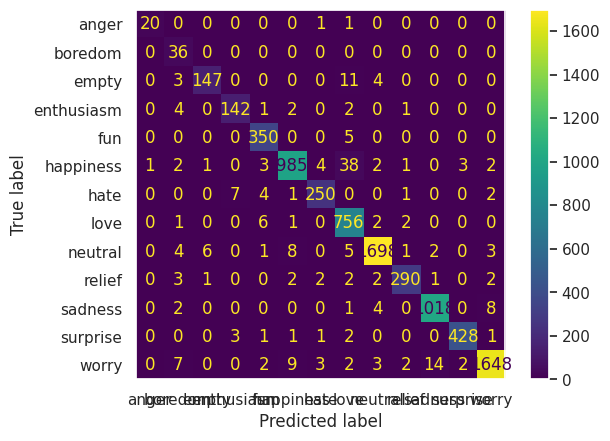

In [19]:
cm = cmt.numpy()
ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels).plot()

<Axes: >

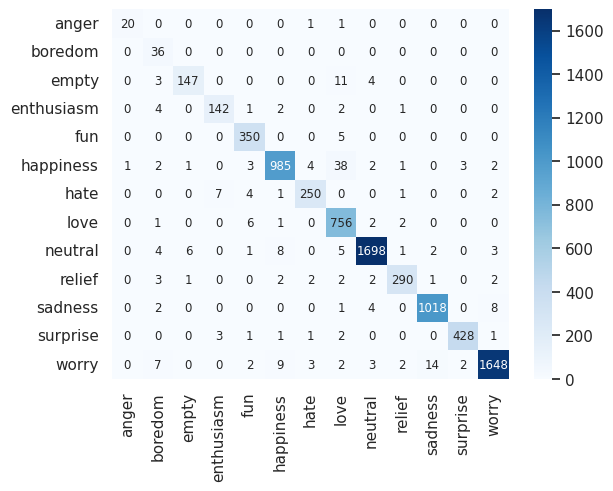

In [20]:
sns.heatmap(
    cm, cmap="Blues", 
    annot=True,
    annot_kws={"size": 8.5},
    xticklabels=labels, 
    yticklabels=labels, fmt='.0f')

<Axes: >

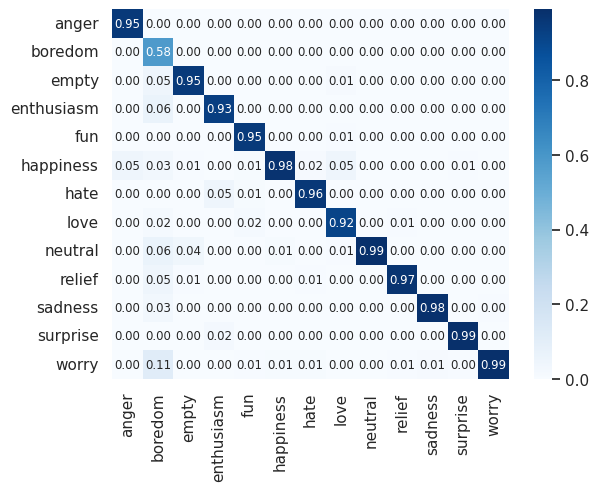

In [21]:
c = cm / reduce(cm, 'y yh -> 1 yh', 'sum')
sns.heatmap(
    c, cmap="Blues", 
    annot=True,
    annot_kws={"size": 8.5},
    xticklabels=labels, 
    yticklabels=labels, fmt='.2f')

<Axes: >

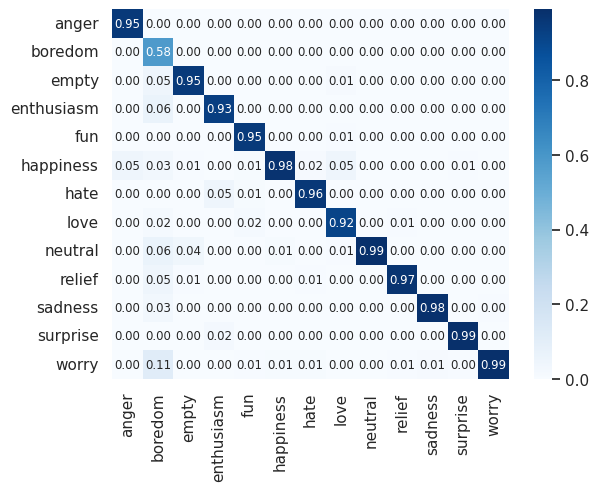

In [22]:
c = cm / reduce(cm, 'y yh -> 1 yh', 'sum')
sns.heatmap(
    c, cmap="Blues", 
    annot=True,
    annot_kws={"size": 8.5},
    xticklabels=labels, 
    yticklabels=labels, fmt='.2f')

/tmp/ipykernel_2240595/2222022686.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels())


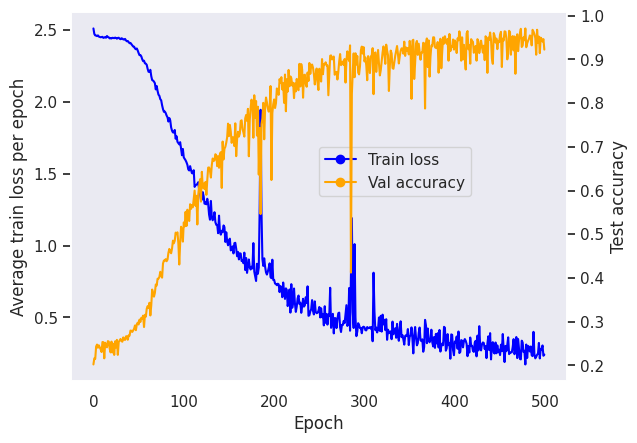

In [24]:
n_epoch = trainer.current_epoch
xval = np.arange(n_epoch)
y1val = reduce(np.array(trainer.train_losses), '(e n) -> e', 'mean',  e=n_epoch)
y2val = trainer.test_accuracy[:n_epoch]
g = sns.lineplot(x=xval, y=y1val, color='blue')
g2 = sns.lineplot(x=xval, y=y2val, color='orange', ax=g.axes.twinx())
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel('Epoch')
g.set_ylabel('Average train loss per epoch')
g2.set_ylabel('Test accuracy')
g.legend(handles=[Line2D([], [], marker='o', color='blue', label='Train loss'), Line2D([], [], marker='o', color='orange', label='Val accuracy')], 
         loc=(0.5,0.5))

In [25]:
from scipy.signal import savgol_filter

/tmp/ipykernel_2240595/2535986043.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels())


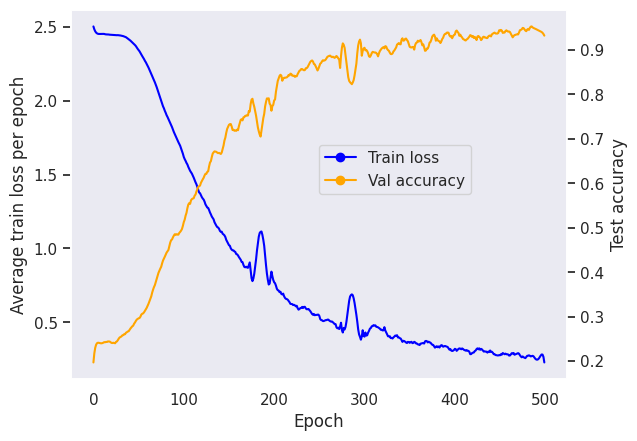

In [26]:
xval = np.arange(n_epoch)
y1val = reduce(np.array(trainer.train_losses), '(e n) -> e', 'mean',  e=n_epoch)
y2val = trainer.test_accuracy[:n_epoch]
y1val = savgol_filter(y1val, 25, 5)
y2val = savgol_filter(y2val, 25, 5)
g = sns.lineplot(x=xval, y=y1val, color='blue')
g2 = sns.lineplot(x=xval, y=y2val, color='orange', ax=g.axes.twinx())
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel('Epoch')
g.set_ylabel('Average train loss per epoch')
g2.set_ylabel('Test accuracy')
g.legend(handles=[Line2D([], [], marker='o', color='blue', label='Train loss'), Line2D([], [], marker='o', color='orange', label='Val accuracy')], 
         loc=(0.5,0.5))

In [27]:
layer_after = trainer.model.fe_blocks.blocks[0].layer.cpu()
visualize_model.print_parameters(layer_after)

('lowcut_bands', Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0033,  0.0036,  0.0035],
        [ 0.0056,  0.0075,  0.0078],
        [ 0.0126,  0.0116,  0.0119],
        [ 0.0162,  0.0162,  0.0162],
        [ 0.0211,  0.0211,  0.0211],
        [ 0.0264,  0.0264,  0.0264],
        [ 0.0322,  0.0322,  0.0322],
        [ 0.0384,  0.0385,  0.0385],
        [ 0.0452,  0.0453,  0.0454],
        [ 0.0632,  0.0524,  0.0524],
        [ 0.0603,  0.0603,  0.0602],
        [ 0.0688,  0.0688,  0.0688],
        [ 0.0786,  0.0780,  0.0780],
        [ 0.0879,  0.0880,  0.0879],
        [ 0.0988,  0.0988,  0.0988],
        [ 0.1105,  0.1105,  0.1105],
        [ 0.1230,  0.1232,  0.1230],
        [ 0.1367,  0.1369,  0.1366],
        [ 0.1516,  0.1516,  0.1516],
        [ 0.1676,  0.1676,  0.1676],
        [ 0.1849,  0.1849,  0.1850],
        [ 0.2037,  0.2037,  0.2039],
        [ 0.2239,  0.2239,  0.2239],
        [ 0.2459,  0.2458,  0.2459],
        [ 0.2696,  0.2695,  0.2696],

In [28]:
filtviz_after = visualize_model.FilterVisualizer(
    lowcut_bands = layer_after.lowcut_bands, 
    bandwidths = layer_after.bandwidths,
    window_params = layer_after.window_params, 
    window_length = 64,
    sample_rate = 825*2
)

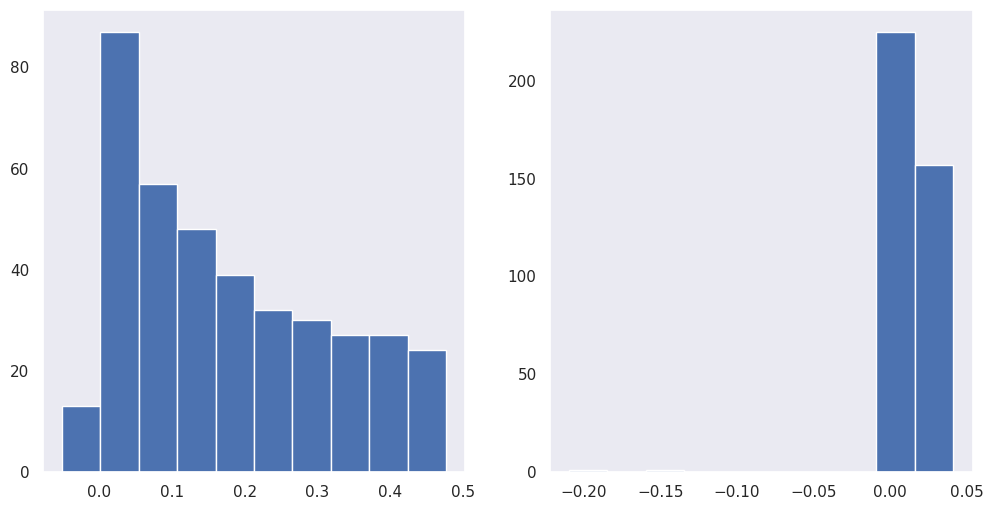

In [29]:
filtviz_after.visualize_bands()

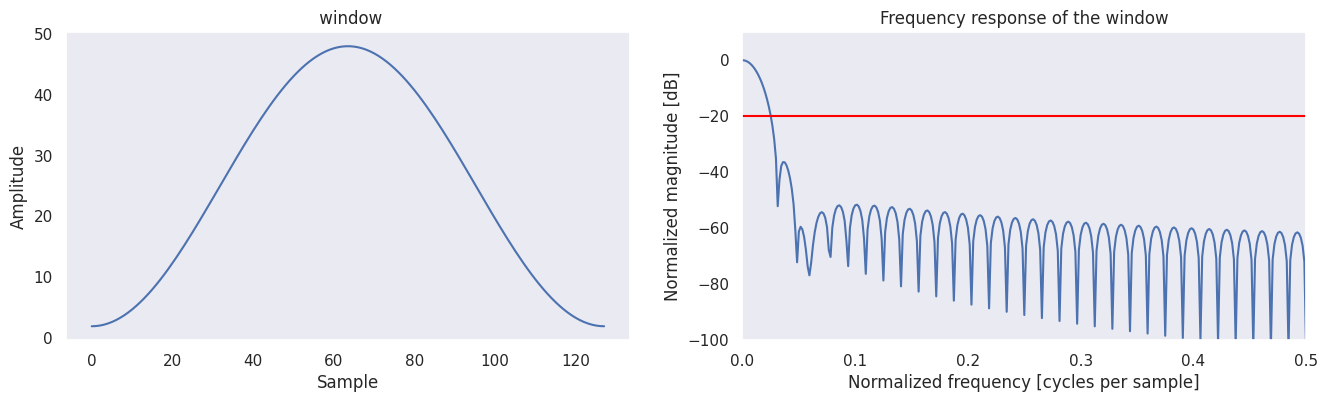

In [30]:
filtviz_after.visualize_one_window()

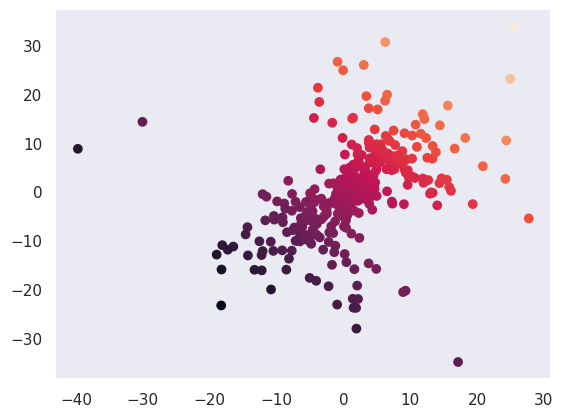

In [31]:
filtviz_after.visualize_window_params()

Time domain: Filters' shapes vary by frequency bins


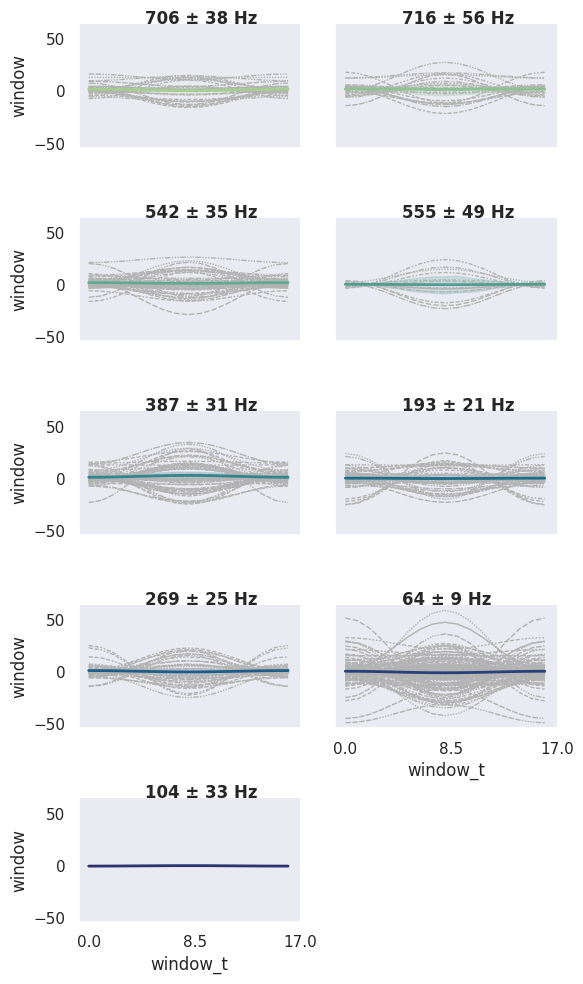

In [32]:
filtviz_after.visualize_filters(filter_domain='time')

Frequency domain: Filters' shapes vary by frequency bins


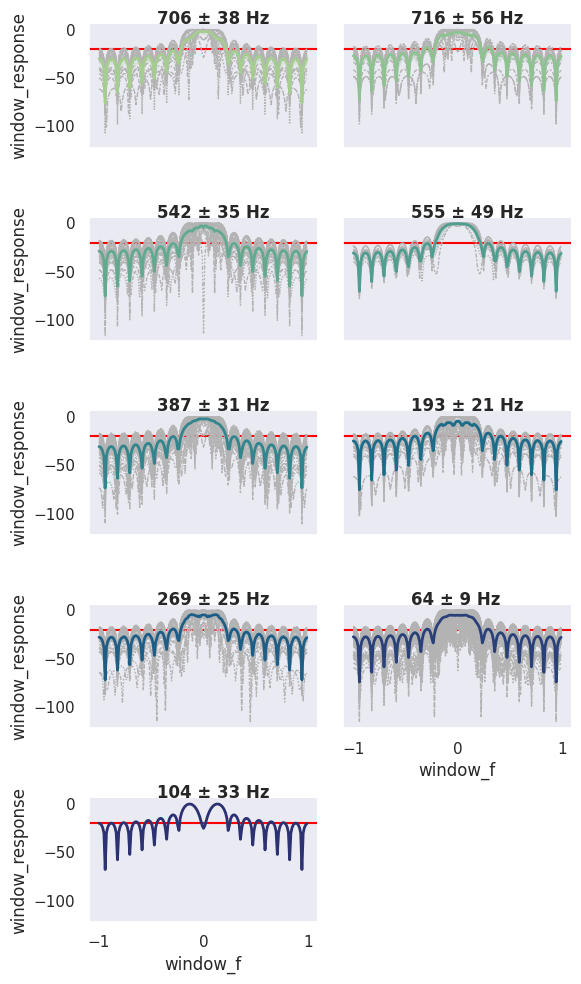

In [33]:
filtviz_after.visualize_filters(filter_domain='freq')

In [34]:
ckpt_path = log_dir + f'iconnet_text_m11_{experiment_prefix}_epoch{n_epoch}.ckpt'
torch.save({
    'epoch': n_epoch,
    'model_state_dict': trainer.model.state_dict(),
    'optimizer_state_dict': trainer.optimizer.state_dict(),
    'train_losses': trainer.train_losses,
    'val_accuracy': trainer.val_accuracy,
    'test_accuracy': trainer.test_accuracy,
    'best_model': trainer.best_test_model_path,
    'metrics': mt,
    'metrics_detai;': mtd,
    'confusion_matrix': cm
}, ckpt_path)

In [36]:
train_loader2, _, batch_size2 = get_dataloader(
    ocf.load(f'config/dataset/{dataset_name}.yaml'), 
    data_dir, batch_size=batch_size)
print(batch_size2, len(train_loader2))

16 2000


In [37]:
trainer.test_loader = train_loader2 
trainer.test_data_size = len(train_loader2.dataset)
trainer.test_batches = len(train_loader2)

In [38]:
metrics2, metrics_details2, confusion_matrix2 = trainer.test_step()
mt2 = metrics2.cpu().compute()
mtd2 = metrics_details2.cpu().compute()
cmt2 = confusion_matrix2.cpu().compute()
pprint(mt2)
pprint(mtd2)
pprint(cmt2)

Correct: 4779/32000 (0.1493)
{'acc_unweighted': tensor(0.0804),
 'acc_weighted': tensor(0.1493),
 'f1s_unweighted': tensor(0.0789),
 'f1s_weighted': tensor(0.1484),
 'rocauc': tensor(0.5040),
 'uar': tensor(0.0804),
 'wap': tensor(0.1497)}
{'acc_detail': tensor([0.0000, 0.0140, 0.0181, 0.0165, 0.0169, 0.1833, 0.0274, 0.1031, 0.2056,
        0.0680, 0.1263, 0.0400, 0.2254]),
 'f1s_detail': tensor([0.0000, 0.0067, 0.0209, 0.0171, 0.0239, 0.1553, 0.0296, 0.1019, 0.2182,
        0.0536, 0.1303, 0.0451, 0.2230]),
 'precision_detail': tensor([0.0000, 0.0044, 0.0247, 0.0178, 0.0411, 0.1347, 0.0321, 0.1007, 0.2324,
        0.0442, 0.1345, 0.0517, 0.2207]),
 'recall_detail': tensor([0.0000, 0.0140, 0.0181, 0.0165, 0.0169, 0.1833, 0.0274, 0.1031, 0.2056,
        0.0680, 0.1263, 0.0400, 0.2254]),
 'rocauc_detail': tensor([0.5074, 0.4607, 0.5104, 0.4865, 0.5089, 0.5051, 0.5254, 0.5081, 0.5181,
        0.5133, 0.5070, 0.4889, 0.5120])}
tensor([[   0,    2,    0,    0,    2,   20,    3,    6,   13, 

<Axes: >

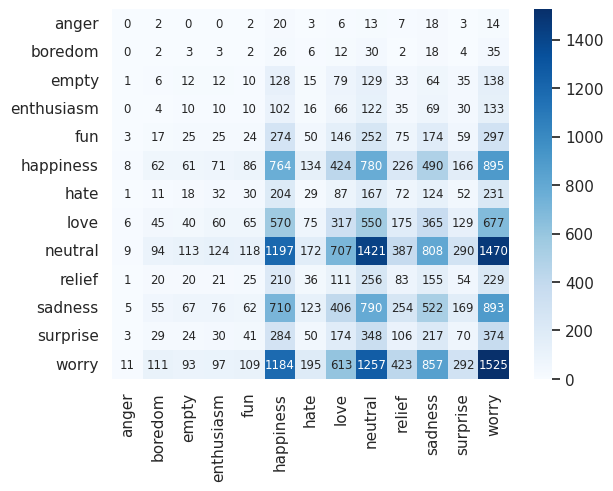

In [39]:
cm2 = cmt2.numpy()
sns.heatmap(
    cm2, cmap="Blues", 
    annot=True,
    annot_kws={"size": 8.5},
    xticklabels=labels, 
    yticklabels=labels, fmt='.0f')

In [40]:
trainer.test_loader = train_loader
trainer.test_data_size = len(train_loader.dataset)
trainer.test_batches = len(train_loader)

In [41]:
trainer.max_lr = 0.01
trainer.fit(n_epoch=500, test_n_epoch=1, lr=5e-5)

  0%|                                                                | 0.25200000000000017/500 [00:53<435:16:34, 3135.57s/it]

Epoch: 501	Loss: 0.032	Val_acc: 1571/1600 (98.19%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=501.step=218719.loss=0.032.val_acc=0.982.pt


  0%|▏                                                                  | 1.0000000000000007/500 [03:45<36:35:43, 264.01s/it]

Correct: 7874/8000 (0.9842)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=501.step=218937.test_acc=0.9842.pt
{'acc_unweighted': tensor(0.9687),
 'acc_weighted': tensor(0.9842),
 'f1s_unweighted': tensor(0.9741),
 'f1s_weighted': tensor(0.9842),
 'rocauc': tensor(0.9998),
 'uar': tensor(0.9687),
 'wap': tensor(0.9843)}


  0%|▏                                                                 | 1.251999999999973/500 [04:38<434:48:51, 3138.52s/it]

Epoch: 502	Loss: 0.015	Val_acc: 1577/1600 (98.56%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=502.step=219156.loss=0.015.val_acc=0.986.pt


  0%|▎                                                                  | 1.9999999999998905/500 [07:29<36:55:51, 266.97s/it]

Correct: 7897/8000 (0.9871)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=502.step=219374.test_acc=0.9871.pt
{'acc_unweighted': tensor(0.9743),
 'acc_weighted': tensor(0.9871),
 'f1s_unweighted': tensor(0.9804),
 'f1s_weighted': tensor(0.9871),
 'rocauc': tensor(0.9999),
 'uar': tensor(0.9743),
 'wap': tensor(0.9871)}


  0%|▎                                                                 | 2.251999999999863/500 [08:22<425:47:05, 3079.52s/it]

Epoch: 503	Loss: 0.060	Val_acc: 1575/1600 (98.44%)



  1%|▍                                                                  | 2.9999999999997806/500 [11:13<36:49:53, 266.79s/it]

Correct: 7905/8000 (0.9881)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=503.step=219811.test_acc=0.9881.pt
{'acc_unweighted': tensor(0.9783),
 'acc_weighted': tensor(0.9881),
 'f1s_unweighted': tensor(0.9826),
 'f1s_weighted': tensor(0.9881),
 'rocauc': tensor(0.9999),
 'uar': tensor(0.9783),
 'wap': tensor(0.9882)}


  1%|▍                                                                 | 3.251999999999753/500 [12:06<431:08:39, 3124.56s/it]

Epoch: 504	Loss: 0.047	Val_acc: 1585/1600 (99.06%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=504.step=220030.loss=0.047.val_acc=0.991.pt


  1%|▌                                                                  | 3.9999999999996705/500 [14:58<36:46:24, 266.90s/it]

Correct: 7910/8000 (0.9888)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=504.step=220248.test_acc=0.9888.pt
{'acc_unweighted': tensor(0.9797),
 'acc_weighted': tensor(0.9887),
 'f1s_unweighted': tensor(0.9826),
 'f1s_weighted': tensor(0.9887),
 'rocauc': tensor(0.9999),
 'uar': tensor(0.9797),
 'wap': tensor(0.9888)}


  1%|▌                                                                 | 4.251999999999755/500 [15:51<422:07:11, 3065.33s/it]

Epoch: 505	Loss: 0.002	Val_acc: 1583/1600 (98.94%)



  1%|▋                                                                   | 5.000000000000004/500 [18:42<37:03:04, 269.46s/it]

Correct: 7916/8000 (0.9895)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=505.step=220685.test_acc=0.9895.pt
{'acc_unweighted': tensor(0.9834),
 'acc_weighted': tensor(0.9895),
 'f1s_unweighted': tensor(0.9861),
 'f1s_weighted': tensor(0.9895),
 'rocauc': tensor(0.9999),
 'uar': tensor(0.9834),
 'wap': tensor(0.9895)}


  1%|▋                                                                 | 5.251000000000088/500 [19:35<599:53:58, 4365.12s/it]

Epoch: 506	Loss: 0.042	Val_acc: 1591/1600 (99.44%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=506.step=220904.loss=0.042.val_acc=0.994.pt


  1%|▊                                                                   | 6.000000000000338/500 [22:27<36:37:51, 266.95s/it]

Correct: 7912/8000 (0.9890)
{'acc_unweighted': tensor(0.9811),
 'acc_weighted': tensor(0.9890),
 'f1s_unweighted': tensor(0.9843),
 'f1s_weighted': tensor(0.9890),
 'rocauc': tensor(0.9999),
 'uar': tensor(0.9811),
 'wap': tensor(0.9890)}


  1%|▊                                                                | 6.2520000000004226/500 [23:20<423:48:48, 3090.10s/it]

Epoch: 507	Loss: 0.008	Val_acc: 1581/1600 (98.81%)



  1%|▉                                                                   | 7.000000000000672/500 [26:12<36:30:12, 266.56s/it]

Correct: 7918/8000 (0.9898)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=507.step=221559.test_acc=0.9898.pt
{'acc_unweighted': tensor(0.9824),
 'acc_weighted': tensor(0.9897),
 'f1s_unweighted': tensor(0.9856),
 'f1s_weighted': tensor(0.9897),
 'rocauc': tensor(0.9999),
 'uar': tensor(0.9824),
 'wap': tensor(0.9898)}


  1%|▉                                                                | 7.2520000000007565/500 [27:05<423:12:50, 3091.99s/it]

Epoch: 508	Loss: 0.002	Val_acc: 1583/1600 (98.94%)



  2%|█                                                                   | 8.000000000001005/500 [29:57<36:27:09, 266.73s/it]

Correct: 7921/8000 (0.9901)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=508.step=221996.test_acc=0.9901.pt
{'acc_unweighted': tensor(0.9842),
 'acc_weighted': tensor(0.9901),
 'f1s_unweighted': tensor(0.9869),
 'f1s_weighted': tensor(0.9901),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9842),
 'wap': tensor(0.9901)}


  2%|█                                                                 | 8.252000000000866/500 [30:50<424:19:19, 3106.39s/it]

Epoch: 509	Loss: 0.004	Val_acc: 1582/1600 (98.88%)



  2%|█▏                                                                  | 9.000000000000451/500 [33:43<36:19:57, 266.39s/it]

Correct: 7923/8000 (0.9904)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=509.step=222433.test_acc=0.9904.pt
{'acc_unweighted': tensor(0.9843),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9869),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9843),
 'wap': tensor(0.9904)}


  2%|█▏                                                                | 9.252000000000312/500 [34:36<422:10:12, 3096.93s/it]

Epoch: 510	Loss: 0.011	Val_acc: 1585/1600 (99.06%)



  2%|█▎                                                                  | 9.999999999999897/500 [37:28<36:31:26, 268.34s/it]

Correct: 7922/8000 (0.9902)
{'acc_unweighted': tensor(0.9825),
 'acc_weighted': tensor(0.9903),
 'f1s_unweighted': tensor(0.9874),
 'f1s_weighted': tensor(0.9902),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9825),
 'wap': tensor(0.9903)}


  2%|█▎                                                               | 10.251999999999757/500 [38:21<421:56:39, 3101.59s/it]

Epoch: 511	Loss: 0.012	Val_acc: 1588/1600 (99.25%)



  2%|█▍                                                                 | 10.999999999999343/500 [41:14<36:16:36, 267.07s/it]

Correct: 7920/8000 (0.9900)
{'acc_unweighted': tensor(0.9820),
 'acc_weighted': tensor(0.9900),
 'f1s_unweighted': tensor(0.9872),
 'f1s_weighted': tensor(0.9900),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9820),
 'wap': tensor(0.9901)}


  2%|█▍                                                               | 11.251999999999203/500 [42:07<419:50:34, 3092.46s/it]

Epoch: 512	Loss: 0.002	Val_acc: 1583/1600 (98.94%)



  2%|█▌                                                                 | 11.999999999998789/500 [44:59<36:15:10, 267.44s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9861),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9881),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9861),
 'wap': tensor(0.9904)}


  2%|█▌                                                               | 12.251999999998649/500 [45:52<427:12:23, 3153.15s/it]

Epoch: 513	Loss: 0.187	Val_acc: 1589/1600 (99.31%)



  3%|█▋                                                                 | 12.999999999998234/500 [48:44<36:03:47, 266.59s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9826),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9877),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9826),
 'wap': tensor(0.9904)}


  3%|█▋                                                               | 13.251999999998095/500 [49:38<421:02:59, 3114.09s/it]

Epoch: 514	Loss: 0.007	Val_acc: 1579/1600 (98.69%)



  3%|█▉                                                                  | 13.99999999999768/500 [52:30<36:40:38, 271.68s/it]

Correct: 7921/8000 (0.9901)
{'acc_unweighted': tensor(0.9820),
 'acc_weighted': tensor(0.9901),
 'f1s_unweighted': tensor(0.9875),
 'f1s_weighted': tensor(0.9901),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9820),
 'wap': tensor(0.9902)}


  3%|█▉                                                                | 14.25199999999754/500 [53:23<417:38:55, 3095.30s/it]

Epoch: 515	Loss: 0.002	Val_acc: 1587/1600 (99.19%)



  3%|██                                                                 | 14.999999999997126/500 [56:14<35:49:05, 265.87s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9827),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9876),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9827),
 'wap': tensor(0.9904)}


  3%|█▉                                                               | 15.251999999996986/500 [57:07<417:23:44, 3099.80s/it]

Epoch: 516	Loss: 0.130	Val_acc: 1593/1600 (99.56%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=516.step=225274.loss=0.130.val_acc=0.996.pt


  3%|██                                                               | 15.999999999996572/500 [1:00:00<36:01:31, 267.96s/it]

Correct: 7926/8000 (0.9908)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=516.step=225492.test_acc=0.9908.pt
{'acc_unweighted': tensor(0.9825),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9883),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9825),
 'wap': tensor(0.9908)}


  3%|██                                                              | 16.25199999999688/500 [1:00:53<418:51:58, 3117.16s/it]

Epoch: 517	Loss: 0.071	Val_acc: 1584/1600 (99.00%)



  3%|██▏                                                              | 16.999999999997794/500 [1:03:45<35:50:03, 267.09s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9847),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9881),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9847),
 'wap': tensor(0.9905)}


  3%|██▏                                                              | 17.2519999999981/500 [1:04:38<418:30:43, 3120.97s/it]

Epoch: 518	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



  4%|██▎                                                              | 17.999999999999016/500 [1:07:31<35:42:51, 266.75s/it]

Correct: 7927/8000 (0.9909)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=518.step=226366.test_acc=0.9909.pt
{'acc_unweighted': tensor(0.9832),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9886),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9832),
 'wap': tensor(0.9910)}


  4%|██▎                                                            | 18.251999999999324/500 [1:08:24<422:13:18, 3155.17s/it]

Epoch: 519	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



  4%|██▍                                                              | 19.000000000000238/500 [1:11:16<35:33:55, 266.19s/it]

Correct: 7922/8000 (0.9902)
{'acc_unweighted': tensor(0.9816),
 'acc_weighted': tensor(0.9902),
 'f1s_unweighted': tensor(0.9876),
 'f1s_weighted': tensor(0.9902),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9816),
 'wap': tensor(0.9903)}


  4%|██▍                                                            | 19.252000000000546/500 [1:12:10<411:10:45, 3079.05s/it]

Epoch: 520	Loss: 0.005	Val_acc: 1588/1600 (99.25%)



  4%|██▋                                                               | 20.00000000000146/500 [1:15:00<35:34:46, 266.85s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9835),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9888),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9835),
 'wap': tensor(0.9909)}


  4%|██▌                                                            | 20.252000000001768/500 [1:15:53<408:54:28, 3068.42s/it]

Epoch: 521	Loss: 0.021	Val_acc: 1581/1600 (98.81%)



  4%|██▋                                                              | 21.000000000002682/500 [1:18:44<35:14:45, 264.90s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9856),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9889),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9856),
 'wap': tensor(0.9908)}


  4%|██▋                                                             | 21.25200000000299/500 [1:19:37<414:52:25, 3119.69s/it]

Epoch: 522	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



  4%|██▊                                                              | 22.000000000003904/500 [1:22:29<35:38:19, 268.41s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9859),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9881),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9859),
 'wap': tensor(0.9906)}


  4%|██▊                                                            | 22.252000000004212/500 [1:23:22<417:05:36, 3142.95s/it]

Epoch: 523	Loss: 0.016	Val_acc: 1583/1600 (98.94%)



  5%|██▉                                                              | 23.000000000005127/500 [1:26:16<35:53:22, 270.86s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9851),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9883),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9851),
 'wap': tensor(0.9907)}


  5%|██▉                                                            | 23.252000000005435/500 [1:27:09<419:05:38, 3164.64s/it]

Epoch: 524	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



  5%|███▏                                                              | 24.00000000000635/500 [1:30:03<35:40:59, 269.87s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9864),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9884),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9864),
 'wap': tensor(0.9908)}


  5%|███                                                            | 24.252000000006657/500 [1:30:56<416:48:59, 3154.06s/it]

Epoch: 525	Loss: 0.001	Val_acc: 1585/1600 (99.06%)



  5%|███▎                                                              | 25.00000000000757/500 [1:33:49<35:24:38, 268.38s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9833),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9886),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9833),
 'wap': tensor(0.9908)}


  5%|███▏                                                            | 25.25200000000788/500 [1:34:42<405:57:06, 3078.32s/it]

Epoch: 526	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



  5%|███▍                                                             | 26.000000000008793/500 [1:37:35<35:22:40, 268.69s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9838),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9888),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9838),
 'wap': tensor(0.9908)}


  5%|███▍                                                             | 26.2520000000091/500 [1:38:28<415:07:44, 3154.55s/it]

Epoch: 527	Loss: 0.033	Val_acc: 1583/1600 (98.94%)



  5%|███▌                                                             | 27.000000000010015/500 [1:41:22<35:54:43, 273.33s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9836),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9889),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9836),
 'wap': tensor(0.9910)}


  5%|███▍                                                           | 27.252000000010323/500 [1:42:15<415:16:18, 3162.32s/it]

Epoch: 528	Loss: 0.006	Val_acc: 1585/1600 (99.06%)



  6%|███▋                                                             | 28.000000000011237/500 [1:45:09<34:56:00, 266.44s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9858),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9890),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9858),
 'wap': tensor(0.9909)}


  6%|███▌                                                           | 28.251000000011544/500 [1:46:02<569:48:27, 4348.30s/it]

Epoch: 529	Loss: 0.002	Val_acc: 1586/1600 (99.12%)



  6%|███▊                                                              | 29.00000000001246/500 [1:48:54<35:12:23, 269.09s/it]

Correct: 7928/8000 (0.9910)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=529.step=231173.test_acc=0.9910.pt
{'acc_unweighted': tensor(0.9840),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9889),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9840),
 'wap': tensor(0.9911)}


  6%|███▋                                                           | 29.252000000012767/500 [1:49:48<412:00:04, 3150.74s/it]

Epoch: 530	Loss: 0.001	Val_acc: 1584/1600 (99.00%)



  6%|███▉                                                              | 30.00000000001368/500 [1:52:40<34:53:23, 267.24s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9852),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9887),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9852),
 'wap': tensor(0.9908)}


  6%|███▊                                                            | 30.25200000001399/500 [1:53:34<413:32:27, 3169.25s/it]

Epoch: 531	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



  6%|████                                                             | 31.000000000014904/500 [1:56:26<34:52:38, 267.72s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9909)}


  6%|████                                                            | 31.25200000001521/500 [1:57:20<407:39:31, 3130.83s/it]

Epoch: 532	Loss: 0.005	Val_acc: 1590/1600 (99.38%)



  6%|████▏                                                             | 32.00000000001612/500 [2:00:14<34:48:56, 267.81s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9852),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9885),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9852),
 'wap': tensor(0.9908)}


  6%|████                                                           | 32.252000000015535/500 [2:01:07<408:14:23, 3142.00s/it]

Epoch: 533	Loss: 0.001	Val_acc: 1582/1600 (98.88%)



  7%|████▎                                                             | 33.00000000001379/500 [2:04:00<34:52:41, 268.87s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9910)}


  7%|████▏                                                          | 33.252000000013204/500 [2:04:54<398:02:53, 3070.12s/it]

Epoch: 534	Loss: 0.001	Val_acc: 1583/1600 (98.94%)



  7%|████▍                                                             | 34.00000000001146/500 [2:07:46<34:42:51, 268.18s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9860),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9860),
 'wap': tensor(0.9911)}


  7%|████▎                                                          | 34.252000000010874/500 [2:08:40<409:50:00, 3167.81s/it]

Epoch: 535	Loss: 0.010	Val_acc: 1586/1600 (99.12%)



  7%|████▌                                                             | 35.00000000000913/500 [2:11:33<35:32:15, 275.13s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9834),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9889),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9834),
 'wap': tensor(0.9911)}


  7%|████▌                                                           | 35.25200000000854/500 [2:12:26<398:58:08, 3090.47s/it]

Epoch: 536	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



  7%|████▊                                                              | 36.0000000000068/500 [2:15:18<35:26:30, 274.98s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9845),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9879),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9845),
 'wap': tensor(0.9907)}


  7%|████▋                                                           | 36.25200000000621/500 [2:16:11<399:07:54, 3098.39s/it]

Epoch: 537	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



  7%|████▉                                                             | 37.00000000000447/500 [2:19:04<34:41:57, 269.80s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9862),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9862),
 'wap': tensor(0.9910)}


  7%|████▊                                                           | 37.25200000000388/500 [2:19:57<394:35:35, 3069.78s/it]

Epoch: 538	Loss: 0.004	Val_acc: 1585/1600 (99.06%)



  8%|█████                                                             | 38.00000000000214/500 [2:22:49<35:21:28, 275.52s/it]

Correct: 7922/8000 (0.9902)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9902),
 'f1s_unweighted': tensor(0.9899),
 'f1s_weighted': tensor(0.9902),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9903)}


  8%|████▉                                                           | 38.25200000000155/500 [2:23:42<396:50:17, 3093.93s/it]

Epoch: 539	Loss: 0.006	Val_acc: 1583/1600 (98.94%)



  8%|█████▏                                                            | 38.99999999999981/500 [2:26:36<34:23:05, 268.52s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9843),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9886),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9843),
 'wap': tensor(0.9909)}


  8%|█████                                                           | 39.25199999999922/500 [2:27:29<396:20:15, 3096.74s/it]

Epoch: 540	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



  8%|█████▎                                                            | 39.99999999999748/500 [2:30:23<34:09:58, 267.39s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9908),
 'f1s_unweighted': tensor(0.9897),
 'f1s_weighted': tensor(0.9908),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9908)}


  8%|█████▏                                                          | 40.25199999999689/500 [2:31:16<404:32:00, 3167.65s/it]

Epoch: 541	Loss: 0.103	Val_acc: 1584/1600 (99.00%)



  8%|█████▍                                                            | 40.99999999999515/500 [2:34:10<34:48:15, 272.97s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9828),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9887),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9828),
 'wap': tensor(0.9909)}


  8%|█████▎                                                          | 41.25199999999456/500 [2:35:03<402:53:11, 3161.63s/it]

Epoch: 542	Loss: 0.003	Val_acc: 1585/1600 (99.06%)



  8%|█████▍                                                           | 41.999999999992816/500 [2:37:57<34:54:02, 274.33s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9865),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9888),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9865),
 'wap': tensor(0.9910)}


  8%|█████▍                                                          | 42.25199999999223/500 [2:38:50<396:07:03, 3115.30s/it]

Epoch: 543	Loss: 0.009	Val_acc: 1585/1600 (99.06%)



  9%|█████▌                                                           | 42.999999999990486/500 [2:41:42<34:11:10, 269.30s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9911)}


  9%|█████▌                                                           | 43.2519999999899/500 [2:42:35<392:22:45, 3092.66s/it]

Epoch: 544	Loss: 0.173	Val_acc: 1581/1600 (98.81%)



  9%|█████▋                                                           | 43.999999999988155/500 [2:45:28<33:59:47, 268.39s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9910)}


  9%|█████▋                                                          | 44.25199999998757/500 [2:46:22<392:47:53, 3102.75s/it]

Epoch: 545	Loss: 0.001	Val_acc: 1583/1600 (98.94%)



  9%|█████▊                                                           | 44.999999999985825/500 [2:49:15<33:53:33, 268.16s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9844),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9888),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9844),
 'wap': tensor(0.9908)}


  9%|█████▊                                                          | 45.25199999998524/500 [2:50:08<389:09:40, 3080.78s/it]

Epoch: 546	Loss: 0.096	Val_acc: 1588/1600 (99.25%)



  9%|█████▉                                                           | 45.999999999983494/500 [2:53:01<36:37:55, 290.48s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9910)}


  9%|█████▉                                                          | 46.25199999998291/500 [2:53:54<388:30:31, 3082.40s/it]

Epoch: 547	Loss: 0.002	Val_acc: 1586/1600 (99.12%)



  9%|██████▏                                                           | 46.99999999998116/500 [2:56:46<33:34:07, 266.77s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9909)}


  9%|█████▉                                                         | 47.251999999980576/500 [2:57:40<391:04:33, 3109.62s/it]

Epoch: 548	Loss: 0.148	Val_acc: 1581/1600 (98.81%)



 10%|██████▎                                                           | 47.99999999997883/500 [3:00:33<33:39:56, 268.13s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9910)}


 10%|██████                                                         | 48.251999999978246/500 [3:01:26<387:37:43, 3089.03s/it]

Epoch: 549	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 10%|██████▌                                                            | 48.9999999999765/500 [3:04:19<34:28:22, 275.17s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9901),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9910)}


 10%|██████▏                                                        | 49.251999999975915/500 [3:05:13<389:15:28, 3108.90s/it]

Epoch: 550	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 10%|██████▌                                                           | 49.99999999997417/500 [3:08:06<33:42:10, 269.62s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9911)}


 10%|██████▎                                                        | 50.251999999973584/500 [3:08:59<385:31:46, 3085.96s/it]

Epoch: 551	Loss: 0.001	Val_acc: 1582/1600 (98.88%)



 10%|██████▋                                                           | 50.99999999997184/500 [3:11:52<33:24:15, 267.83s/it]

Correct: 7930/8000 (0.9912)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=551.step=240787.test_acc=0.9912.pt
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9913)}


 10%|██████▍                                                        | 51.251999999971254/500 [3:12:46<393:13:48, 3154.62s/it]

Epoch: 552	Loss: 0.001	Val_acc: 1585/1600 (99.06%)



 10%|██████▊                                                           | 51.99999999996951/500 [3:15:38<33:14:56, 267.18s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9909)}


 10%|██████▋                                                         | 52.25199999996892/500 [3:16:31<391:45:57, 3149.89s/it]

Epoch: 553	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 11%|██████▉                                                           | 52.99999999996718/500 [3:19:25<33:54:31, 273.09s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9912)}


 11%|██████▊                                                         | 53.25199999996659/500 [3:20:18<380:15:01, 3064.15s/it]

Epoch: 554	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 11%|███████▏                                                          | 53.99999999996485/500 [3:23:12<36:22:45, 293.64s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9826),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9890),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9826),
 'wap': tensor(0.9910)}


 11%|██████▉                                                         | 54.25199999996426/500 [3:24:06<384:33:52, 3105.86s/it]

Epoch: 555	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 11%|███████▎                                                          | 54.99999999996252/500 [3:26:58<33:51:02, 273.85s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9912)}


 11%|███████                                                         | 55.25199999996193/500 [3:27:52<379:40:00, 3073.20s/it]

Epoch: 556	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 11%|███████▍                                                          | 55.99999999996019/500 [3:30:45<33:28:50, 271.46s/it]

Correct: 7918/8000 (0.9898)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9897),
 'f1s_unweighted': tensor(0.9901),
 'f1s_weighted': tensor(0.9897),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9899)}


 11%|███████▎                                                         | 56.2519999999596/500 [3:31:38<380:56:07, 3090.42s/it]

Epoch: 557	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 11%|███████▌                                                          | 56.99999999995786/500 [3:34:30<32:52:43, 267.19s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9912)}


 11%|███████▎                                                        | 57.25199999995727/500 [3:35:24<385:05:56, 3131.25s/it]

Epoch: 558	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 12%|███████▋                                                          | 57.99999999995553/500 [3:38:18<33:00:30, 268.85s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9909)}


 12%|███████▍                                                        | 58.25199999995494/500 [3:39:12<388:31:40, 3166.29s/it]

Epoch: 559	Loss: 0.002	Val_acc: 1588/1600 (99.25%)



 12%|███████▉                                                           | 58.9999999999532/500 [3:42:05<33:02:08, 269.68s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9912)}


 12%|███████▌                                                        | 59.25199999995261/500 [3:42:58<377:55:47, 3086.91s/it]

Epoch: 560	Loss: 0.001	Val_acc: 1584/1600 (99.00%)



 12%|███████▊                                                         | 59.999999999950866/500 [3:45:51<32:39:59, 267.27s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9833),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9890),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9833),
 'wap': tensor(0.9911)}


 12%|███████▋                                                        | 60.25199999995028/500 [3:46:44<378:15:55, 3096.67s/it]

Epoch: 561	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 12%|███████▉                                                         | 60.999999999948535/500 [3:49:37<32:53:22, 269.71s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9913)}


 12%|███████▊                                                        | 61.25199999994795/500 [3:50:30<376:52:59, 3092.39s/it]

Epoch: 562	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 12%|████████                                                         | 61.999999999946205/500 [3:53:24<32:56:29, 270.75s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9908)}


 12%|███████▉                                                        | 62.25099999994562/500 [3:54:17<529:57:41, 4358.35s/it]

Epoch: 563	Loss: 0.001	Val_acc: 1585/1600 (99.06%)



 13%|████████▏                                                        | 62.999999999943874/500 [3:57:09<32:29:51, 267.72s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9910)}


 13%|████████                                                        | 63.25199999994329/500 [3:58:02<378:23:55, 3119.04s/it]

Epoch: 564	Loss: 0.241	Val_acc: 1579/1600 (98.69%)



 13%|████████▎                                                        | 63.999999999941544/500 [4:00:55<32:30:34, 268.43s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9910)}


 13%|████████▏                                                       | 64.25199999994274/500 [4:01:49<373:46:50, 3088.05s/it]

Epoch: 565	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 13%|████████▌                                                         | 64.99999999994631/500 [4:04:42<33:09:54, 274.47s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9911)}


 13%|████████▎                                                       | 65.25099999994751/500 [4:05:35<523:55:34, 4338.44s/it]

Epoch: 566	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 13%|████████▋                                                         | 65.99999999995109/500 [4:08:28<33:35:37, 278.66s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9912)}


 13%|████████▍                                                       | 66.25199999995229/500 [4:09:22<372:04:46, 3088.17s/it]

Epoch: 567	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 13%|████████▊                                                         | 66.99999999995586/500 [4:12:15<32:53:05, 273.41s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9912)}


 13%|████████▌                                                       | 67.25199999995706/500 [4:13:09<374:40:44, 3116.93s/it]

Epoch: 568	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 14%|████████▉                                                         | 67.99999999996064/500 [4:16:02<32:19:40, 269.40s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9913)}


 14%|████████▋                                                       | 68.25199999996184/500 [4:16:55<370:46:09, 3091.55s/it]

Epoch: 569	Loss: 0.133	Val_acc: 1587/1600 (99.19%)



 14%|█████████                                                         | 68.99999999996541/500 [4:19:48<32:46:25, 273.75s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9911)}


 14%|████████▊                                                       | 69.25199999996661/500 [4:20:42<377:11:17, 3152.37s/it]

Epoch: 570	Loss: 0.021	Val_acc: 1591/1600 (99.44%)



 14%|█████████▏                                                        | 69.99999999997019/500 [4:23:36<32:49:10, 274.77s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9863),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9863),
 'wap': tensor(0.9912)}


 14%|████████▉                                                       | 70.25199999997139/500 [4:24:30<377:10:06, 3159.54s/it]

Epoch: 571	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 14%|█████████▎                                                        | 70.99999999997496/500 [4:27:25<31:58:58, 268.39s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9901),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9901),
 'wap': tensor(0.9910)}


 14%|█████████                                                       | 71.25199999997616/500 [4:28:19<377:16:52, 3167.86s/it]

Epoch: 572	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



 14%|█████████▌                                                        | 71.99999999997974/500 [4:31:13<31:52:23, 268.09s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9910)}


 14%|█████████▏                                                      | 72.25199999998094/500 [4:32:07<374:26:11, 3151.32s/it]

Epoch: 573	Loss: 0.001	Val_acc: 1576/1600 (98.50%)



 15%|█████████▋                                                        | 72.99999999998451/500 [4:35:00<31:43:50, 267.52s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9911)}


 15%|█████████▍                                                      | 73.25199999998571/500 [4:35:54<367:43:06, 3102.03s/it]

Epoch: 574	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 15%|█████████▊                                                        | 73.99999999998929/500 [4:38:48<31:42:30, 267.96s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9907)}


 15%|█████████▌                                                      | 74.25199999999049/500 [4:39:41<366:59:46, 3103.21s/it]

Epoch: 575	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 15%|█████████▉                                                        | 74.99999999999406/500 [4:42:34<31:45:29, 269.01s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9912)}


 15%|█████████▋                                                      | 75.25199999999526/500 [4:43:27<365:18:00, 3096.14s/it]

Epoch: 576	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 15%|██████████                                                        | 75.99999999999883/500 [4:46:20<31:46:22, 269.77s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9911)}


 15%|█████████▊                                                      | 76.25200000000004/500 [4:47:14<363:12:50, 3085.73s/it]

Epoch: 577	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 15%|██████████▏                                                       | 77.00000000000361/500 [4:50:07<31:24:43, 267.34s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 15%|█████████▉                                                      | 77.25200000000481/500 [4:51:00<363:01:00, 3091.35s/it]

Epoch: 578	Loss: 0.001	Val_acc: 1588/1600 (99.25%)



 16%|██████████▎                                                       | 78.00000000000838/500 [4:53:53<31:27:51, 268.42s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9882),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9882),
 'wap': tensor(0.9913)}


 16%|██████████                                                      | 78.25200000000959/500 [4:54:47<363:10:01, 3099.96s/it]

Epoch: 579	Loss: 0.001	Val_acc: 1582/1600 (98.88%)



 16%|██████████▍                                                       | 79.00000000001316/500 [4:57:39<32:01:08, 273.80s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9912)}


 16%|██████████▏                                                     | 79.25200000001436/500 [4:58:33<364:35:01, 3119.45s/it]

Epoch: 580	Loss: 0.026	Val_acc: 1584/1600 (99.00%)



 16%|██████████▌                                                       | 80.00000000001793/500 [5:01:26<31:15:25, 267.92s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9911)}


 16%|██████████▎                                                     | 80.25200000001914/500 [5:02:20<360:56:06, 3095.59s/it]

Epoch: 581	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 16%|██████████▋                                                       | 81.00000000002271/500 [5:05:12<31:08:06, 267.51s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9907)}


 16%|██████████▍                                                     | 81.25200000002391/500 [5:06:06<358:49:11, 3084.79s/it]

Epoch: 582	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 16%|██████████▊                                                       | 82.00000000002748/500 [5:08:59<31:09:48, 268.39s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9914)}


 16%|██████████▌                                                     | 82.25200000002869/500 [5:09:52<359:31:17, 3098.23s/it]

Epoch: 583	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 17%|██████████▉                                                       | 83.00000000003226/500 [5:12:45<31:13:03, 269.50s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9912)}


 17%|██████████▋                                                     | 83.25200000003346/500 [5:13:38<360:11:50, 3111.50s/it]

Epoch: 584	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 17%|███████████                                                       | 84.00000000003703/500 [5:16:33<31:13:58, 270.29s/it]

Correct: 7931/8000 (0.9914)
Saved new best test model: ./_logs/text_emotion/v10/model.epoch=584.step=255208.test_acc=0.9914.pt
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9914)}


 17%|██████████▊                                                     | 84.25200000003824/500 [5:17:27<361:45:57, 3132.57s/it]

Epoch: 585	Loss: 0.006	Val_acc: 1584/1600 (99.00%)



 17%|███████████▏                                                      | 85.00000000004181/500 [5:20:21<30:52:56, 267.89s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9864),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9864),
 'wap': tensor(0.9914)}


 17%|██████████▉                                                     | 85.25200000004301/500 [5:21:14<356:31:04, 3094.56s/it]

Epoch: 586	Loss: 0.000	Val_acc: 1592/1600 (99.50%)



 17%|███████████▎                                                      | 86.00000000004658/500 [5:24:07<30:49:22, 268.02s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9913)}


 17%|███████████                                                     | 86.25200000004779/500 [5:25:00<357:30:05, 3110.60s/it]

Epoch: 587	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 17%|███████████▍                                                      | 87.00000000005136/500 [5:27:53<30:49:39, 268.72s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9903),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9903),
 'wap': tensor(0.9912)}


 17%|███████████▏                                                    | 87.25200000005256/500 [5:28:46<355:29:17, 3100.58s/it]

Epoch: 588	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 18%|███████████▌                                                      | 88.00000000005613/500 [5:31:40<31:16:17, 273.25s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9837),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9889),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9837),
 'wap': tensor(0.9909)}


 18%|███████████▎                                                    | 88.25200000005734/500 [5:32:33<353:04:27, 3087.00s/it]

Epoch: 589	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 18%|███████████▋                                                      | 89.00000000006091/500 [5:35:28<30:39:37, 268.56s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9864),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9864),
 'wap': tensor(0.9910)}


 18%|███████████▌                                                     | 89.2510000000621/500 [5:36:21<496:38:29, 4352.80s/it]

Epoch: 590	Loss: 0.025	Val_acc: 1584/1600 (99.00%)



 18%|███████████▉                                                      | 90.00000000006568/500 [5:39:14<30:31:32, 268.03s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9913)}


 18%|███████████▌                                                    | 90.25200000006689/500 [5:40:08<354:28:56, 3114.44s/it]

Epoch: 591	Loss: 0.009	Val_acc: 1590/1600 (99.38%)



 18%|████████████                                                      | 91.00000000007046/500 [5:43:03<31:19:22, 275.70s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9913)}


 18%|███████████▋                                                    | 91.25200000007166/500 [5:43:56<356:18:51, 3138.20s/it]

Epoch: 592	Loss: 0.099	Val_acc: 1586/1600 (99.12%)



 18%|████████████▏                                                     | 92.00000000007523/500 [5:46:50<30:21:08, 267.82s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9910)}


 18%|███████████▊                                                    | 92.25200000007644/500 [5:47:43<349:44:50, 3087.91s/it]

Epoch: 593	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 19%|████████████▎                                                     | 93.00000000008001/500 [5:50:37<30:30:01, 269.78s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9912)}


 19%|███████████▉                                                    | 93.25200000008121/500 [5:51:30<349:00:18, 3088.93s/it]

Epoch: 594	Loss: 0.008	Val_acc: 1592/1600 (99.50%)



 19%|████████████▍                                                     | 94.00000000008478/500 [5:54:24<30:33:11, 270.92s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9914)}


 19%|████████████                                                    | 94.25200000008599/500 [5:55:17<355:07:47, 3150.89s/it]

Epoch: 595	Loss: 0.022	Val_acc: 1588/1600 (99.25%)



 19%|████████████▌                                                     | 95.00000000008956/500 [5:58:11<30:16:03, 269.04s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9913)}


 19%|████████████▏                                                   | 95.25200000009076/500 [5:59:05<349:05:11, 3104.92s/it]

Epoch: 596	Loss: 0.118	Val_acc: 1588/1600 (99.25%)



 19%|████████████▋                                                     | 96.00000000009433/500 [6:01:58<30:02:39, 267.72s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9904)}


 19%|████████████▎                                                   | 96.25200000009553/500 [6:02:51<346:42:02, 3091.34s/it]

Epoch: 597	Loss: 0.005	Val_acc: 1587/1600 (99.19%)



 19%|████████████▉                                                      | 97.0000000000991/500 [6:05:45<30:18:14, 270.71s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9911)}


 19%|████████████▍                                                   | 97.25200000010031/500 [6:06:38<347:27:03, 3105.72s/it]

Epoch: 598	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 20%|████████████▉                                                     | 98.00000000010388/500 [6:09:33<30:52:23, 276.48s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9913)}


 20%|████████████▌                                                   | 98.25200000010508/500 [6:10:26<345:49:17, 3098.85s/it]

Epoch: 599	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 20%|█████████████                                                     | 99.00000000010866/500 [6:13:19<29:48:42, 267.64s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9901),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9908)}


 20%|████████████▋                                                   | 99.25200000010986/500 [6:14:13<351:39:15, 3158.98s/it]

Epoch: 600	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 20%|█████████████                                                    | 100.00000000011343/500 [6:17:06<30:14:48, 272.22s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9915)}


 20%|████████████▋                                                  | 100.25200000011463/500 [6:17:59<342:55:05, 3088.21s/it]

Epoch: 601	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 20%|█████████████▎                                                    | 101.0000000001182/500 [6:20:53<29:36:34, 267.15s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9910)}


 20%|████████████▊                                                  | 101.25200000011941/500 [6:21:47<342:41:58, 3093.98s/it]

Epoch: 602	Loss: 0.002	Val_acc: 1586/1600 (99.12%)



 20%|█████████████▎                                                   | 102.00000000012298/500 [6:24:41<29:39:41, 268.30s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9912)}


 20%|████████████▉                                                  | 102.25200000012418/500 [6:25:34<342:19:32, 3098.37s/it]

Epoch: 603	Loss: 0.172	Val_acc: 1589/1600 (99.31%)



 21%|█████████████▍                                                   | 103.00000000012776/500 [6:28:27<29:47:47, 270.19s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9912)}


 21%|█████████████                                                  | 103.25200000012896/500 [6:29:21<348:36:00, 3163.12s/it]

Epoch: 604	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 21%|█████████████▌                                                   | 104.00000000013253/500 [6:32:15<29:43:03, 270.16s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9862),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9862),
 'wap': tensor(0.9914)}


 21%|█████████████▏                                                 | 104.25200000013373/500 [6:33:08<342:46:45, 3118.16s/it]

Epoch: 605	Loss: 0.001	Val_acc: 1580/1600 (98.75%)



 21%|█████████████▊                                                    | 105.0000000001373/500 [6:36:02<29:25:44, 268.21s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9906)}


 21%|█████████████▎                                                 | 105.25200000013851/500 [6:36:56<339:58:10, 3100.44s/it]

Epoch: 606	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 21%|█████████████▊                                                   | 106.00000000014208/500 [6:39:51<30:02:33, 274.50s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9911)}


 21%|█████████████▍                                                 | 106.25200000014328/500 [6:40:44<338:15:59, 3092.74s/it]

Epoch: 607	Loss: 0.000	Val_acc: 1593/1600 (99.56%)



 21%|█████████████▉                                                   | 107.00000000014685/500 [6:43:37<29:24:16, 269.35s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9913)}


 21%|█████████████▌                                                 | 107.25200000014806/500 [6:44:30<338:42:11, 3104.61s/it]

Epoch: 608	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 22%|██████████████                                                   | 108.00000000015163/500 [6:47:24<30:20:47, 278.69s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9913)}


 22%|█████████████▋                                                 | 108.25200000015283/500 [6:48:18<336:17:21, 3090.36s/it]

Epoch: 609	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 22%|██████████████▍                                                   | 109.0000000001564/500 [6:51:12<29:11:11, 268.73s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9910)}


 22%|█████████████▊                                                 | 109.25200000015761/500 [6:52:05<336:56:37, 3104.30s/it]

Epoch: 610	Loss: 0.115	Val_acc: 1579/1600 (98.69%)



 22%|██████████████▎                                                  | 110.00000000016118/500 [6:54:58<29:29:39, 272.25s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9911)}


 22%|█████████████▉                                                 | 110.25200000016238/500 [6:55:52<334:45:24, 3092.06s/it]

Epoch: 611	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 22%|██████████████▍                                                  | 111.00000000016595/500 [6:58:46<29:20:49, 271.59s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9914)}


 22%|██████████████                                                 | 111.25200000016716/500 [6:59:40<335:41:26, 3108.66s/it]

Epoch: 612	Loss: 0.004	Val_acc: 1587/1600 (99.19%)



 22%|██████████████▌                                                  | 112.00000000017073/500 [7:02:34<29:48:53, 276.63s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9911)}


 22%|██████████████▏                                                | 112.25200000017193/500 [7:03:29<338:04:47, 3138.86s/it]

Epoch: 613	Loss: 0.050	Val_acc: 1583/1600 (98.94%)



 23%|██████████████▉                                                   | 113.0000000001755/500 [7:06:22<28:55:40, 269.10s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9913)}


 23%|██████████████▎                                                | 113.25200000017671/500 [7:07:16<335:22:56, 3121.87s/it]

Epoch: 614	Loss: 0.381	Val_acc: 1585/1600 (99.06%)



 23%|██████████████▊                                                  | 114.00000000018028/500 [7:10:09<29:01:49, 270.75s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9912)}


 23%|██████████████▍                                                | 114.25200000018148/500 [7:11:02<333:03:59, 3108.35s/it]

Epoch: 615	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 23%|██████████████▉                                                  | 115.00000000018505/500 [7:13:55<28:43:12, 268.55s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9912)}


 23%|██████████████▌                                                | 115.25200000018626/500 [7:14:49<330:57:05, 3096.64s/it]

Epoch: 616	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 23%|███████████████                                                  | 116.00000000018983/500 [7:17:43<28:50:38, 270.41s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9909)}


 23%|██████████████▋                                                | 116.25200000019103/500 [7:18:37<330:24:38, 3099.63s/it]

Epoch: 617	Loss: 0.001	Val_acc: 1585/1600 (99.06%)



 23%|███████████████▍                                                  | 117.0000000001946/500 [7:21:31<28:39:04, 269.31s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9908)}


 23%|███████████████                                                 | 117.2520000001958/500 [7:22:24<331:57:39, 3122.31s/it]

Epoch: 618	Loss: 0.043	Val_acc: 1588/1600 (99.25%)



 24%|███████████████▎                                                 | 118.00000000019938/500 [7:25:18<28:39:54, 270.14s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 24%|██████████████▉                                                | 118.25200000020058/500 [7:26:11<327:25:40, 3087.75s/it]

Epoch: 619	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 24%|███████████████▍                                                 | 119.00000000020415/500 [7:29:05<28:29:25, 269.20s/it]

Correct: 7918/8000 (0.9898)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9898),
 'f1s_unweighted': tensor(0.9890),
 'f1s_weighted': tensor(0.9897),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9898)}


 24%|███████████████                                                | 119.25200000020536/500 [7:29:59<326:50:30, 3090.31s/it]

Epoch: 620	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 24%|███████████████▌                                                 | 120.00000000020893/500 [7:32:54<28:23:16, 268.94s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9913)}


 24%|███████████████▏                                               | 120.25200000021013/500 [7:33:47<326:31:18, 3095.42s/it]

Epoch: 621	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 24%|███████████████▉                                                  | 121.0000000002137/500 [7:36:42<28:15:14, 268.38s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9910)}


 24%|███████████████▌                                                | 121.2520000002149/500 [7:37:36<326:37:19, 3104.54s/it]

Epoch: 622	Loss: 0.004	Val_acc: 1584/1600 (99.00%)



 24%|███████████████▊                                                 | 122.00000000021848/500 [7:40:29<28:59:48, 276.16s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9909)}


 24%|███████████████▍                                               | 122.25200000021968/500 [7:41:22<326:00:16, 3106.88s/it]

Epoch: 623	Loss: 0.040	Val_acc: 1585/1600 (99.06%)



 25%|███████████████▉                                                 | 123.00000000022325/500 [7:44:16<28:21:48, 270.84s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9910)}


 25%|███████████████▌                                               | 123.25200000022446/500 [7:45:09<330:55:51, 3162.20s/it]

Epoch: 624	Loss: 0.000	Val_acc: 1579/1600 (98.69%)



 25%|████████████████                                                 | 124.00000000022803/500 [7:48:03<28:46:46, 275.55s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9882),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9882),
 'wap': tensor(0.9912)}


 25%|███████████████▋                                               | 124.25200000022923/500 [7:48:57<331:11:37, 3173.13s/it]

Epoch: 625	Loss: 0.000	Val_acc: 1593/1600 (99.56%)



 25%|████████████████▌                                                 | 125.0000000002328/500 [7:51:52<28:42:04, 275.53s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9913)}


 25%|████████████████▎                                                | 125.252000000234/500 [7:52:45<329:59:48, 3170.10s/it]

Epoch: 626	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 25%|████████████████▍                                                | 126.00000000023758/500 [7:55:39<27:56:02, 268.88s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9887),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9887),
 'wap': tensor(0.9911)}


 25%|███████████████▉                                               | 126.25200000023878/500 [7:56:32<321:44:52, 3099.13s/it]

Epoch: 627	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 25%|████████████████▌                                                | 127.00000000024235/500 [7:59:26<28:07:57, 271.52s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9909)}


 25%|████████████████                                               | 127.25100000024355/500 [8:00:19<447:56:37, 4326.23s/it]

Epoch: 628	Loss: 0.001	Val_acc: 1582/1600 (98.88%)



 26%|████████████████▋                                                | 128.00000000024713/500 [8:03:13<28:19:24, 274.10s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9908)}


 26%|████████████████▏                                              | 128.25200000024833/500 [8:04:07<318:09:21, 3081.01s/it]

Epoch: 629	Loss: 0.106	Val_acc: 1584/1600 (99.00%)



 26%|█████████████████                                                 | 129.0000000002519/500 [8:07:00<27:53:00, 270.57s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9911)}


 26%|████████████████▌                                               | 129.2520000002531/500 [8:07:54<318:02:07, 3088.15s/it]

Epoch: 630	Loss: 0.000	Val_acc: 1576/1600 (98.50%)



 26%|████████████████▉                                                | 130.00000000025668/500 [8:10:47<27:44:26, 269.91s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9912)}


 26%|████████████████▍                                              | 130.25200000025788/500 [8:11:41<317:15:17, 3088.91s/it]

Epoch: 631	Loss: 0.001	Val_acc: 1583/1600 (98.94%)



 26%|█████████████████                                                | 131.00000000026145/500 [8:14:35<28:11:50, 275.10s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9912)}


 26%|████████████████▌                                              | 131.25200000026265/500 [8:15:28<314:57:57, 3074.94s/it]

Epoch: 632	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 26%|█████████████████▏                                               | 132.00000000026623/500 [8:18:22<28:10:27, 275.62s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9912)}


 26%|████████████████▋                                              | 132.25200000026743/500 [8:19:16<317:22:52, 3106.94s/it]

Epoch: 633	Loss: 0.096	Val_acc: 1586/1600 (99.12%)



 27%|█████████████████▊                                                 | 133.000000000271/500 [8:22:09<27:42:25, 271.79s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9913)}


 27%|█████████████████                                               | 133.2520000002722/500 [8:23:03<319:19:56, 3134.57s/it]

Epoch: 634	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 27%|█████████████████▍                                               | 134.00000000027578/500 [8:25:56<27:21:46, 269.14s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9912)}


 27%|████████████████▉                                              | 134.25200000027698/500 [8:26:50<315:18:51, 3103.59s/it]

Epoch: 635	Loss: 0.085	Val_acc: 1584/1600 (99.00%)



 27%|█████████████████▌                                               | 135.00000000028055/500 [8:29:42<27:21:19, 269.81s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9913)}


 27%|█████████████████                                              | 135.25200000028175/500 [8:30:36<319:06:21, 3149.52s/it]

Epoch: 636	Loss: 0.039	Val_acc: 1585/1600 (99.06%)



 27%|█████████████████▋                                               | 136.00000000028533/500 [8:33:30<27:20:34, 270.43s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9912)}


 27%|█████████████████▏                                             | 136.25200000028653/500 [8:34:23<318:10:03, 3148.89s/it]

Epoch: 637	Loss: 0.078	Val_acc: 1589/1600 (99.31%)



 27%|██████████████████                                                | 137.0000000002901/500 [8:37:17<27:17:16, 270.62s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9912)}


 27%|█████████████████▌                                              | 137.2520000002913/500 [8:38:10<313:17:50, 3109.24s/it]

Epoch: 638	Loss: 0.111	Val_acc: 1586/1600 (99.12%)



 28%|█████████████████▉                                               | 138.00000000029488/500 [8:41:04<27:04:46, 269.30s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9913)}


 28%|█████████████████▍                                             | 138.25200000029608/500 [8:41:57<311:57:16, 3104.47s/it]

Epoch: 639	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 28%|██████████████████                                               | 139.00000000029965/500 [8:44:51<27:36:39, 275.35s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9910),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9901),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9910),
 'wap': tensor(0.9904)}


 28%|█████████████████▌                                             | 139.25200000030085/500 [8:45:44<313:13:26, 3125.75s/it]

Epoch: 640	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 28%|██████████████████▏                                              | 140.00000000030442/500 [8:48:40<27:26:10, 274.36s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9921),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9921),
 'wap': tensor(0.9910)}


 28%|█████████████████▋                                             | 140.25200000030563/500 [8:49:33<310:17:42, 3105.13s/it]

Epoch: 641	Loss: 0.141	Val_acc: 1589/1600 (99.31%)



 28%|██████████████████▌                                               | 141.0000000003092/500 [8:52:27<27:21:06, 274.28s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9914)}


 28%|██████████████████                                              | 141.2520000003104/500 [8:53:21<309:20:01, 3104.13s/it]

Epoch: 642	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 28%|██████████████████▍                                              | 142.00000000031397/500 [8:56:15<27:17:51, 274.50s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9902),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9902),
 'wap': tensor(0.9912)}


 28%|█████████████████▉                                             | 142.25200000031518/500 [8:57:08<310:20:32, 3122.96s/it]

Epoch: 643	Loss: 0.001	Val_acc: 1584/1600 (99.00%)



 29%|██████████████████▌                                              | 143.00000000031875/500 [9:00:02<26:52:46, 271.06s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9902),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9902),
 'wap': tensor(0.9913)}


 29%|██████████████████                                             | 143.25200000031995/500 [9:00:56<306:06:28, 3088.98s/it]

Epoch: 644	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 29%|██████████████████▋                                              | 144.00000000032352/500 [9:03:49<27:01:01, 273.21s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9927),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9927),
 'wap': tensor(0.9913)}


 29%|██████████████████▏                                            | 144.25200000032473/500 [9:04:43<307:10:52, 3108.53s/it]

Epoch: 645	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 29%|███████████████████▏                                              | 145.0000000003283/500 [9:07:37<27:09:11, 275.36s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9884),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9884),
 'wap': tensor(0.9914)}


 29%|██████████████████▌                                             | 145.2520000003295/500 [9:08:31<306:18:28, 3108.43s/it]

Epoch: 646	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 29%|██████████████████▉                                              | 146.00000000033307/500 [9:11:25<26:44:20, 271.92s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9911)}


 29%|██████████████████▍                                            | 146.25200000033428/500 [9:12:19<312:21:41, 3178.82s/it]

Epoch: 647	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 29%|███████████████████                                              | 147.00000000033785/500 [9:15:13<26:15:02, 267.71s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9912)}


 29%|██████████████████▌                                            | 147.25200000033905/500 [9:16:07<305:34:26, 3118.56s/it]

Epoch: 648	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 30%|███████████████████▏                                             | 148.00000000034262/500 [9:19:02<26:23:22, 269.89s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9912)}


 30%|██████████████████▋                                            | 148.25200000034383/500 [9:19:56<307:03:00, 3142.54s/it]

Epoch: 649	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 30%|███████████████████▋                                              | 149.0000000003474/500 [9:22:50<26:42:21, 273.91s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9913)}


 30%|███████████████████                                             | 149.2520000003486/500 [9:23:44<309:39:34, 3178.28s/it]

Epoch: 650	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 30%|███████████████████▌                                             | 150.00000000035217/500 [9:26:38<26:17:50, 270.49s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9910),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9910),
 'wap': tensor(0.9914)}


 30%|██████████████████▉                                            | 150.25200000035338/500 [9:27:32<306:21:54, 3153.45s/it]

Epoch: 651	Loss: 0.041	Val_acc: 1585/1600 (99.06%)



 30%|███████████████████▋                                             | 151.00000000035695/500 [9:30:27<26:31:07, 273.55s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9910)}


 30%|███████████████████                                            | 151.25200000035815/500 [9:31:20<300:13:05, 3099.04s/it]

Epoch: 652	Loss: 0.198	Val_acc: 1588/1600 (99.25%)



 30%|███████████████████▊                                             | 152.00000000036172/500 [9:34:15<26:27:29, 273.71s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9863),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9863),
 'wap': tensor(0.9913)}


 30%|███████████████████▏                                           | 152.25200000036293/500 [9:35:09<299:05:49, 3096.35s/it]

Epoch: 653	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 31%|████████████████████▏                                             | 153.0000000003665/500 [9:38:02<26:21:59, 273.54s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9913)}


 31%|███████████████████▌                                            | 153.2520000003677/500 [9:38:56<301:52:52, 3134.18s/it]

Epoch: 654	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 31%|████████████████████                                             | 154.00000000037127/500 [9:41:50<25:54:44, 269.61s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9910)}


 31%|███████████████████▍                                           | 154.25200000037248/500 [9:42:44<297:28:48, 3097.42s/it]

Epoch: 655	Loss: 0.001	Val_acc: 1585/1600 (99.06%)



 31%|████████████████████▏                                            | 155.00000000037605/500 [9:45:38<26:07:51, 272.67s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9914)}


 31%|███████████████████▌                                           | 155.25200000037725/500 [9:46:32<296:25:30, 3095.39s/it]

Epoch: 656	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 31%|████████████████████▎                                            | 156.00000000038082/500 [9:49:27<26:22:07, 275.95s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9913)}


 31%|███████████████████▋                                           | 156.25200000038203/500 [9:50:21<296:18:52, 3103.24s/it]

Epoch: 657	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 31%|████████████████████▋                                             | 157.0000000003856/500 [9:53:14<25:43:24, 269.98s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9914)}


 31%|████████████████████▏                                           | 157.2520000003868/500 [9:54:08<302:19:11, 3175.37s/it]

Epoch: 658	Loss: 0.001	Val_acc: 1585/1600 (99.06%)



 32%|████████████████████▌                                            | 158.00000000039037/500 [9:57:03<26:07:32, 275.01s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9912)}


 32%|███████████████████▉                                           | 158.25100000039157/500 [9:57:56<423:07:20, 4457.19s/it]

Epoch: 659	Loss: 0.000	Val_acc: 1574/1600 (98.38%)



 32%|████████████████████▎                                           | 159.00000000039515/500 [10:00:52<25:34:12, 269.95s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9919),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9893),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9919),
 'wap': tensor(0.9910)}


 32%|███████████████████▋                                          | 159.25200000039635/500 [10:01:46<293:35:42, 3101.83s/it]

Epoch: 660	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 32%|████████████████████▍                                           | 160.00000000039992/500 [10:04:41<25:40:10, 271.79s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9912)}


 32%|███████████████████▊                                          | 160.25200000040113/500 [10:05:35<295:40:00, 3132.91s/it]

Epoch: 661	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 32%|████████████████████▉                                            | 161.0000000004047/500 [10:08:29<25:21:30, 269.29s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9911)}


 32%|████████████████████▎                                          | 161.2520000004059/500 [10:09:23<291:12:30, 3094.78s/it]

Epoch: 662	Loss: 0.011	Val_acc: 1584/1600 (99.00%)



 32%|████████████████████▋                                           | 162.00000000040947/500 [10:12:17<25:17:26, 269.37s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9913)}


 32%|████████████████████                                          | 162.25200000041067/500 [10:13:11<291:32:15, 3107.45s/it]

Epoch: 663	Loss: 0.056	Val_acc: 1580/1600 (98.75%)



 33%|████████████████████▊                                           | 163.00000000041425/500 [10:16:07<25:40:34, 274.29s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9911)}


 33%|████████████████████▏                                         | 163.25200000041545/500 [10:17:01<289:39:25, 3096.58s/it]

Epoch: 664	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 33%|████████████████████▉                                           | 164.00000000041902/500 [10:19:55<25:14:10, 270.39s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9912)}


 33%|████████████████████▎                                         | 164.25200000042022/500 [10:20:48<290:35:32, 3115.83s/it]

Epoch: 665	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 33%|█████████████████████▍                                           | 165.0000000004238/500 [10:23:43<25:10:04, 270.46s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9912)}


 33%|█████████████████████▏                                          | 165.252000000425/500 [10:24:37<296:29:53, 3188.65s/it]

Epoch: 666	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 33%|█████████████████████▏                                          | 166.00000000042857/500 [10:27:32<25:39:11, 276.50s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9908)}


 33%|████████████████████▌                                         | 166.25200000042977/500 [10:28:26<288:37:17, 3113.24s/it]

Epoch: 667	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 33%|█████████████████████▍                                          | 167.00000000043335/500 [10:31:21<25:30:08, 275.70s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9911)}


 33%|████████████████████▋                                         | 167.25200000043455/500 [10:32:15<286:52:16, 3103.66s/it]

Epoch: 668	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 34%|█████████████████████▌                                          | 168.00000000043812/500 [10:35:09<24:48:58, 269.09s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9912)}


 34%|████████████████████▊                                         | 168.25200000043932/500 [10:36:03<288:32:38, 3131.17s/it]

Epoch: 669	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 34%|█████████████████████▉                                           | 169.0000000004429/500 [10:38:58<24:46:39, 269.49s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9910)}


 34%|█████████████████████▎                                         | 169.2520000004441/500 [10:39:52<284:27:38, 3096.19s/it]

Epoch: 670	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 34%|█████████████████████▊                                          | 170.00000000044767/500 [10:42:47<26:51:34, 293.01s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9912)}


 34%|█████████████████████                                         | 170.25100000044887/500 [10:43:40<400:28:09, 4372.08s/it]

Epoch: 671	Loss: 0.002	Val_acc: 1586/1600 (99.12%)



 34%|█████████████████████▉                                          | 171.00000000045245/500 [10:46:35<25:11:05, 275.58s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9870),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9870),
 'wap': tensor(0.9914)}


 34%|█████████████████████▏                                        | 171.25200000045365/500 [10:47:29<283:07:19, 3100.37s/it]

Epoch: 672	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 34%|██████████████████████                                          | 172.00000000045722/500 [10:50:23<24:34:56, 269.81s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9908)}


 34%|█████████████████████▎                                        | 172.25200000045842/500 [10:51:17<287:22:49, 3156.60s/it]

Epoch: 673	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 35%|██████████████████████▊                                           | 173.000000000462/500 [10:54:11<24:37:54, 271.17s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9913)}


 35%|█████████████████████▊                                         | 173.2520000004632/500 [10:55:05<279:10:56, 3075.94s/it]

Epoch: 674	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 35%|██████████████████████▎                                         | 174.00000000046677/500 [10:57:59<24:55:20, 275.22s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9914)}


 35%|█████████████████████▌                                        | 174.25200000046797/500 [10:58:53<279:41:48, 3091.07s/it]

Epoch: 675	Loss: 0.000	Val_acc: 1578/1600 (98.62%)



 35%|██████████████████████▍                                         | 175.00000000047154/500 [11:01:47<24:46:08, 274.36s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9910)}


 35%|█████████████████████▋                                        | 175.25200000047275/500 [11:02:41<280:53:53, 3113.90s/it]

Epoch: 676	Loss: 0.013	Val_acc: 1587/1600 (99.19%)



 35%|██████████████████████▌                                         | 176.00000000047632/500 [11:05:36<24:22:42, 270.87s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9918),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9895),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9918),
 'wap': tensor(0.9911)}


 35%|█████████████████████▊                                        | 176.25200000047752/500 [11:06:29<278:35:23, 3097.85s/it]

Epoch: 677	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 35%|███████████████████████                                          | 177.0000000004811/500 [11:09:24<24:40:11, 274.96s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9907),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9907),
 'wap': tensor(0.9913)}


 35%|██████████████████████▎                                        | 177.2520000004823/500 [11:10:17<278:03:46, 3101.57s/it]

Epoch: 678	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 36%|██████████████████████▊                                         | 178.00000000048587/500 [11:13:12<24:22:40, 272.55s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9914)}


 36%|██████████████████████                                        | 178.25100000048707/500 [11:14:05<389:28:10, 4357.72s/it]

Epoch: 679	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 36%|██████████████████████▉                                         | 179.00000000049064/500 [11:17:00<24:40:42, 276.77s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9907),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9907),
 'wap': tensor(0.9913)}


 36%|██████████████████████▏                                       | 179.25200000049185/500 [11:17:54<277:51:44, 3118.66s/it]

Epoch: 680	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 36%|███████████████████████                                         | 180.00000000049542/500 [11:20:48<23:55:39, 269.19s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9912)}


 36%|██████████████████████▎                                       | 180.25100000049662/500 [11:21:41<387:05:27, 4358.19s/it]

Epoch: 681	Loss: 0.004	Val_acc: 1594/1600 (99.62%)

Saved new best val model: ./_logs/text_emotion/v10/model.epoch=681.step=297379.loss=0.004.val_acc=0.996.pt


 36%|███████████████████████▌                                         | 181.0000000005002/500 [11:24:37<23:54:10, 269.75s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9910)}


 36%|██████████████████████▊                                        | 181.2520000005014/500 [11:25:31<273:33:48, 3089.68s/it]

Epoch: 682	Loss: 0.000	Val_acc: 1593/1600 (99.56%)



 36%|███████████████████████▎                                        | 182.00000000050497/500 [11:28:27<24:25:11, 276.45s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9902),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9902),
 'wap': tensor(0.9910)}


 36%|██████████████████████▌                                       | 182.25200000050617/500 [11:29:20<272:08:38, 3083.32s/it]

Epoch: 683	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 37%|███████████████████████▍                                        | 183.00000000050974/500 [11:32:13<23:42:10, 269.18s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9913)}


 37%|██████████████████████▋                                       | 183.25200000051095/500 [11:33:07<272:22:47, 3095.73s/it]

Epoch: 684	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 37%|███████████████████████▌                                        | 184.00000000051452/500 [11:36:01<24:15:09, 276.29s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9913)}


 37%|██████████████████████▊                                       | 184.25200000051572/500 [11:36:55<278:28:50, 3175.10s/it]

Epoch: 685	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 37%|████████████████████████                                         | 185.0000000005193/500 [11:39:51<24:12:14, 276.62s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9902),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9905)}


 37%|███████████████████████▎                                       | 185.2520000005205/500 [11:40:45<270:20:23, 3092.07s/it]

Epoch: 686	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 37%|███████████████████████▊                                        | 186.00000000052407/500 [11:43:40<23:36:33, 270.68s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9913)}


 37%|███████████████████████                                       | 186.25200000052527/500 [11:44:33<269:45:27, 3095.25s/it]

Epoch: 687	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 37%|███████████████████████▉                                        | 187.00000000052884/500 [11:47:27<23:54:40, 275.02s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9911),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9911),
 'wap': tensor(0.9913)}


 37%|███████████████████████▏                                      | 187.25200000053005/500 [11:48:21<275:41:35, 3173.47s/it]

Epoch: 688	Loss: 0.001	Val_acc: 1582/1600 (98.88%)



 38%|████████████████████████                                        | 188.00000000053362/500 [11:51:16<23:22:25, 269.70s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9857),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9894),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9857),
 'wap': tensor(0.9911)}


 38%|███████████████████████▎                                      | 188.25200000053482/500 [11:52:10<273:08:15, 3154.14s/it]

Epoch: 689	Loss: 0.039	Val_acc: 1585/1600 (99.06%)



 38%|████████████████████████▌                                        | 189.0000000005384/500 [11:55:05<23:17:40, 269.65s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9913)}


 38%|███████████████████████▊                                       | 189.2520000005396/500 [11:55:58<267:28:43, 3098.73s/it]

Epoch: 690	Loss: 0.129	Val_acc: 1582/1600 (98.88%)



 38%|████████████████████████▎                                       | 190.00000000054317/500 [11:58:53<23:13:50, 269.78s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9909)}


 38%|███████████████████████▌                                      | 190.25200000054437/500 [11:59:47<268:44:06, 3123.33s/it]

Epoch: 691	Loss: 0.001	Val_acc: 1594/1600 (99.62%)



 38%|████████████████████████▍                                       | 191.00000000054794/500 [12:02:42<23:12:45, 270.44s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9902),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9902),
 'wap': tensor(0.9910)}


 38%|███████████████████████▋                                      | 191.25100000054914/500 [12:03:36<376:42:39, 4392.43s/it]

Epoch: 692	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



 38%|████████████████████████▌                                       | 192.00000000055272/500 [12:06:31<23:07:13, 270.24s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9913)}


 38%|███████████████████████▊                                      | 192.25100000055392/500 [12:07:24<373:23:17, 4367.84s/it]

Epoch: 693	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 39%|█████████████████████████                                        | 193.0000000005575/500 [12:10:19<23:08:47, 271.43s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9909)}


 39%|████████████████████████▎                                      | 193.2510000005587/500 [12:11:13<373:34:20, 4384.24s/it]

Epoch: 694	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 39%|████████████████████████▊                                       | 194.00000000056227/500 [12:14:07<23:13:39, 273.27s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9909)}


 39%|████████████████████████                                      | 194.25200000056347/500 [12:15:01<262:21:17, 3089.07s/it]

Epoch: 695	Loss: 0.093	Val_acc: 1586/1600 (99.12%)



 39%|████████████████████████▉                                       | 195.00000000056704/500 [12:17:56<23:32:38, 277.90s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9912)}


 39%|████████████████████████▏                                     | 195.25200000056824/500 [12:18:50<264:45:46, 3127.65s/it]

Epoch: 696	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 39%|█████████████████████████                                       | 196.00000000057182/500 [12:21:45<22:49:32, 270.30s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9912)}


 39%|████████████████████████▎                                     | 196.25200000057302/500 [12:22:39<262:44:14, 3113.94s/it]

Epoch: 697	Loss: 0.001	Val_acc: 1589/1600 (99.31%)



 39%|█████████████████████████▌                                       | 197.0000000005766/500 [12:25:34<23:18:33, 276.94s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9884),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9884),
 'wap': tensor(0.9911)}


 39%|████████████████████████▊                                      | 197.2520000005778/500 [12:26:28<260:49:03, 3101.40s/it]

Epoch: 698	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 40%|█████████████████████████▎                                      | 198.00000000058137/500 [12:29:22<22:41:31, 270.50s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9912)}


 40%|████████████████████████▌                                     | 198.25200000058257/500 [12:30:16<262:36:13, 3132.99s/it]

Epoch: 699	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 40%|█████████████████████████▍                                      | 199.00000000058614/500 [12:33:12<23:08:20, 276.75s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9912)}


 40%|████████████████████████▋                                     | 199.25200000058734/500 [12:34:06<264:36:40, 3167.44s/it]

Epoch: 700	Loss: 0.003	Val_acc: 1586/1600 (99.12%)



 40%|█████████████████████████▌                                      | 200.00000000059092/500 [12:37:01<22:59:56, 275.99s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9915)}


 40%|████████████████████████▊                                     | 200.25200000059212/500 [12:37:55<258:20:44, 3102.76s/it]

Epoch: 701	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 40%|██████████████████████████▏                                      | 201.0000000005957/500 [12:40:50<24:28:33, 294.69s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9914)}


 40%|█████████████████████████▎                                     | 201.2520000005969/500 [12:41:43<257:16:15, 3100.19s/it]

Epoch: 702	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 40%|█████████████████████████▊                                      | 202.00000000060047/500 [12:44:38<22:45:08, 274.86s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9887),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9901),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9887),
 'wap': tensor(0.9904)}


 40%|█████████████████████████                                     | 202.25200000060167/500 [12:45:31<257:21:02, 3111.56s/it]

Epoch: 703	Loss: 0.087	Val_acc: 1577/1600 (98.56%)



 41%|█████████████████████████▉                                      | 203.00000000060524/500 [12:48:27<22:26:17, 271.98s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9914)}


 41%|█████████████████████████▏                                    | 203.25100000060644/500 [12:49:21<360:24:17, 4372.24s/it]

Epoch: 704	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 41%|██████████████████████████                                      | 204.00000000061002/500 [12:52:16<22:46:41, 277.03s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9915),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9915),
 'wap': tensor(0.9911)}


 41%|█████████████████████████▎                                    | 204.25200000061122/500 [12:53:10<255:58:42, 3115.90s/it]

Epoch: 705	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 41%|██████████████████████████▋                                      | 205.0000000006148/500 [12:56:05<22:09:53, 270.48s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9912)}


 41%|██████████████████████████▎                                     | 205.252000000616/500 [12:56:59<253:32:34, 3096.73s/it]

Epoch: 706	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 41%|██████████████████████████▎                                     | 206.00000000061956/500 [12:59:54<22:03:44, 270.15s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9903),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9903),
 'wap': tensor(0.9911)}


 41%|█████████████████████████▌                                    | 206.25200000062077/500 [13:00:47<253:09:04, 3102.47s/it]

Epoch: 707	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 41%|██████████████████████████▍                                     | 207.00000000062434/500 [13:03:42<21:59:56, 270.30s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9913)}


 41%|█████████████████████████▋                                    | 207.25200000062554/500 [13:04:37<257:05:11, 3161.46s/it]

Epoch: 708	Loss: 0.001	Val_acc: 1590/1600 (99.38%)



 42%|██████████████████████████▌                                     | 208.00000000062911/500 [13:07:32<22:00:41, 271.38s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9891),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9891),
 'wap': tensor(0.9912)}


 42%|█████████████████████████▊                                    | 208.25200000063032/500 [13:08:26<251:31:01, 3103.57s/it]

Epoch: 709	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 42%|███████████████████████████▏                                     | 209.0000000006339/500 [13:11:21<22:25:43, 277.47s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9904),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9904),
 'wap': tensor(0.9913)}


 42%|██████████████████████████▎                                    | 209.2520000006351/500 [13:12:16<252:57:45, 3132.15s/it]

Epoch: 710	Loss: 0.111	Val_acc: 1581/1600 (98.81%)



 42%|██████████████████████████▉                                     | 210.00000000063866/500 [13:15:11<21:47:37, 270.54s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9862),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9862),
 'wap': tensor(0.9913)}


 42%|██████████████████████████                                    | 210.25200000063987/500 [13:16:04<248:46:21, 3090.90s/it]

Epoch: 711	Loss: 0.001	Val_acc: 1590/1600 (99.38%)



 42%|███████████████████████████                                     | 211.00000000064344/500 [13:19:00<21:38:57, 269.68s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9913),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9894),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9913),
 'wap': tensor(0.9907)}


 42%|██████████████████████████▏                                   | 211.25200000064464/500 [13:19:53<249:43:04, 3113.39s/it]

Epoch: 712	Loss: 0.201	Val_acc: 1583/1600 (98.94%)



 42%|███████████████████████████▌                                     | 212.0000000006482/500 [13:22:48<21:37:56, 270.41s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 42%|██████████████████████████▎                                   | 212.25200000064942/500 [13:23:42<248:25:29, 3108.03s/it]

Epoch: 713	Loss: 0.048	Val_acc: 1580/1600 (98.75%)



 43%|████████████████████████████                                      | 213.000000000653/500 [13:26:38<21:58:05, 275.56s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9921),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9898),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9921),
 'wap': tensor(0.9913)}


 43%|██████████████████████████▊                                    | 213.2520000006542/500 [13:27:31<247:22:33, 3105.70s/it]

Epoch: 714	Loss: 0.051	Val_acc: 1589/1600 (99.31%)



 43%|███████████████████████████▍                                    | 214.00000000065776/500 [13:30:28<23:37:26, 297.37s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9910)}


 43%|██████████████████████████▌                                   | 214.25100000065896/500 [13:31:22<346:30:35, 4365.49s/it]

Epoch: 715	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 43%|███████████████████████████▌                                    | 215.00000000066254/500 [13:34:16<21:36:01, 272.85s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9912)}


 43%|██████████████████████████▋                                   | 215.25200000066374/500 [13:35:10<245:58:47, 3109.86s/it]

Epoch: 716	Loss: 0.146	Val_acc: 1587/1600 (99.19%)



 43%|████████████████████████████                                     | 216.0000000006673/500 [13:38:06<21:17:24, 269.87s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9908)}


 43%|██████████████████████████▊                                   | 216.25200000066852/500 [13:39:00<246:45:11, 3130.64s/it]

Epoch: 717	Loss: 0.152	Val_acc: 1587/1600 (99.19%)



 43%|████████████████████████████▏                                    | 217.0000000006721/500 [13:41:54<22:05:37, 281.05s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9914)}


 43%|███████████████████████████▎                                   | 217.2520000006733/500 [13:42:48<248:53:08, 3168.86s/it]

Epoch: 718	Loss: 0.083	Val_acc: 1584/1600 (99.00%)



 44%|███████████████████████████▉                                    | 218.00000000067686/500 [13:45:43<21:12:27, 270.74s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9928),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9894),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9928),
 'wap': tensor(0.9914)}


 44%|███████████████████████████                                   | 218.25200000067807/500 [13:46:37<246:46:38, 3153.17s/it]

Epoch: 719	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 44%|████████████████████████████                                    | 219.00000000068164/500 [13:49:32<21:02:01, 269.47s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9913)}


 44%|███████████████████████████▏                                  | 219.25200000068284/500 [13:50:26<244:02:55, 3129.41s/it]

Epoch: 720	Loss: 0.118	Val_acc: 1579/1600 (98.69%)



 44%|████████████████████████████▌                                    | 220.0000000006864/500 [13:53:21<21:10:25, 272.23s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9910)}


 44%|███████████████████████████▎                                  | 220.25200000068762/500 [13:54:15<245:22:38, 3157.70s/it]

Epoch: 721	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 44%|████████████████████████████▋                                    | 221.0000000006912/500 [13:57:10<21:00:36, 271.10s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9914)}


 44%|███████████████████████████▉                                   | 221.2520000006924/500 [13:58:04<244:59:04, 3163.95s/it]

Epoch: 722	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 44%|████████████████████████████▍                                   | 222.00000000069596/500 [14:01:01<20:57:17, 271.36s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9917),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9890),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9917),
 'wap': tensor(0.9907)}


 44%|███████████████████████████▌                                  | 222.25200000069717/500 [14:01:55<239:30:40, 3104.40s/it]

Epoch: 723	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 45%|████████████████████████████▌                                   | 223.00000000070074/500 [14:04:50<20:51:38, 271.11s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9910)}


 45%|███████████████████████████▋                                  | 223.25100000070194/500 [14:05:45<344:44:16, 4484.41s/it]

Epoch: 724	Loss: 0.038	Val_acc: 1584/1600 (99.00%)



 45%|█████████████████████████████                                    | 224.0000000007055/500 [14:08:40<21:23:42, 279.07s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9914)}


 45%|███████████████████████████▊                                  | 224.25200000070672/500 [14:09:34<242:02:17, 3159.91s/it]

Epoch: 725	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 45%|█████████████████████████████▎                                   | 225.0000000007103/500 [14:12:29<21:00:52, 275.10s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9910)}


 45%|████████████████████████████▍                                  | 225.2520000007115/500 [14:13:23<240:27:45, 3150.76s/it]

Epoch: 726	Loss: 0.170	Val_acc: 1586/1600 (99.12%)



 45%|████████████████████████████▉                                   | 226.00000000071506/500 [14:16:19<20:38:40, 271.24s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9910)}


 45%|████████████████████████████                                  | 226.25200000071627/500 [14:17:13<236:07:35, 3105.25s/it]

Epoch: 727	Loss: 0.025	Val_acc: 1587/1600 (99.19%)



 45%|█████████████████████████████                                   | 227.00000000071984/500 [14:20:08<20:38:03, 272.10s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9911)}


 45%|████████████████████████████▏                                 | 227.25200000072104/500 [14:21:02<236:19:43, 3119.30s/it]

Epoch: 728	Loss: 0.101	Val_acc: 1585/1600 (99.06%)



 46%|█████████████████████████████▋                                   | 228.0000000007246/500 [14:23:58<20:30:59, 271.54s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9927),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9897),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9927),
 'wap': tensor(0.9914)}


 46%|████████████████████████████▎                                 | 228.25200000072581/500 [14:24:52<233:39:25, 3095.39s/it]

Epoch: 729	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 46%|█████████████████████████████▊                                   | 229.0000000007294/500 [14:27:47<20:43:34, 275.33s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9914)}


 46%|████████████████████████████▉                                  | 229.2520000007306/500 [14:28:41<238:14:07, 3167.70s/it]

Epoch: 730	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 46%|█████████████████████████████▍                                  | 230.00000000073416/500 [14:31:37<20:32:28, 273.89s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9910)}


 46%|████████████████████████████▌                                 | 230.25200000073536/500 [14:32:30<232:04:42, 3097.27s/it]

Epoch: 731	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 46%|█████████████████████████████▌                                  | 231.00000000073894/500 [14:35:25<20:12:36, 270.47s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9912)}


 46%|████████████████████████████▋                                 | 231.25200000074014/500 [14:36:19<230:57:23, 3093.76s/it]

Epoch: 732	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 46%|██████████████████████████████▏                                  | 232.0000000007437/500 [14:39:14<20:14:25, 271.89s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9911)}


 46%|█████████████████████████████▎                                 | 232.2520000007449/500 [14:40:07<230:50:52, 3103.86s/it]

Epoch: 733	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 47%|█████████████████████████████▊                                  | 233.00000000074849/500 [14:43:02<20:07:47, 271.41s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9902),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9902),
 'wap': tensor(0.9912)}


 47%|█████████████████████████████▍                                 | 233.2520000007497/500 [14:43:57<230:12:50, 3106.94s/it]

Epoch: 734	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 47%|█████████████████████████████▉                                  | 234.00000000075326/500 [14:46:52<19:59:35, 270.58s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9904),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9904),
 'wap': tensor(0.9914)}


 47%|█████████████████████████████                                 | 234.25200000075446/500 [14:47:45<229:44:04, 3112.14s/it]

Epoch: 735	Loss: 0.006	Val_acc: 1582/1600 (98.88%)



 47%|██████████████████████████████                                  | 235.00000000075804/500 [14:50:40<20:00:31, 271.82s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9915)}


 47%|█████████████████████████████▏                                | 235.25200000075924/500 [14:51:35<234:20:18, 3186.50s/it]

Epoch: 736	Loss: 0.001	Val_acc: 1578/1600 (98.62%)



 47%|██████████████████████████████▋                                  | 236.0000000007628/500 [14:54:29<20:21:24, 277.59s/it]

Correct: 7923/8000 (0.9904)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9904),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9904),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9904)}


 47%|██████████████████████████████▏                                 | 236.252000000764/500 [14:55:23<228:01:55, 3112.50s/it]

Epoch: 737	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 47%|██████████████████████████████▎                                 | 237.00000000076759/500 [14:58:18<20:05:59, 275.13s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9912)}


 47%|█████████████████████████████▉                                 | 237.2520000007688/500 [14:59:12<227:45:45, 3120.65s/it]

Epoch: 738	Loss: 0.002	Val_acc: 1590/1600 (99.38%)



 48%|██████████████████████████████▍                                 | 238.00000000077236/500 [15:02:08<19:52:02, 272.99s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 48%|█████████████████████████████▌                                | 238.25100000077356/500 [15:03:01<316:45:25, 4356.56s/it]

Epoch: 739	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 48%|██████████████████████████████▌                                 | 239.00000000077713/500 [15:05:57<19:52:57, 274.24s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9870),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9870),
 'wap': tensor(0.9912)}


 48%|█████████████████████████████▋                                | 239.25200000077834/500 [15:06:51<225:22:37, 3111.65s/it]

Epoch: 740	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 48%|███████████████████████████████▏                                 | 240.0000000007819/500 [15:09:46<19:40:24, 272.40s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9914)}


 48%|██████████████████████████████▎                                | 240.2520000007831/500 [15:10:41<228:46:16, 3170.67s/it]

Epoch: 741	Loss: 0.150	Val_acc: 1587/1600 (99.19%)



 48%|██████████████████████████████▊                                 | 241.00000000078668/500 [15:13:36<19:58:36, 277.67s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9912)}


 48%|██████████████████████████████▍                                | 241.2520000007879/500 [15:14:30<223:48:15, 3113.82s/it]

Epoch: 742	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 48%|██████████████████████████████▉                                 | 242.00000000079146/500 [15:17:25<19:24:09, 270.73s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9913)}


 48%|██████████████████████████████                                | 242.25200000079266/500 [15:18:19<227:36:23, 3179.01s/it]

Epoch: 743	Loss: 0.000	Val_acc: 1592/1600 (99.50%)



 49%|███████████████████████████████                                 | 243.00000000079623/500 [15:21:13<19:21:59, 271.28s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9865),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9865),
 'wap': tensor(0.9915)}


 49%|██████████████████████████████▏                               | 243.25200000079744/500 [15:22:08<227:01:21, 3183.21s/it]

Epoch: 744	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 49%|████████████████████████████████▏                                 | 244.000000000801/500 [15:25:04<19:18:23, 271.50s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9911),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9894),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9911),
 'wap': tensor(0.9912)}


 49%|██████████████████████████████▊                                | 244.2520000008022/500 [15:25:58<220:39:53, 3106.16s/it]

Epoch: 745	Loss: 0.322	Val_acc: 1583/1600 (98.94%)



 49%|███████████████████████████████▎                                | 245.00000000080578/500 [15:28:53<19:14:38, 271.68s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9860),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9860),
 'wap': tensor(0.9911)}


 49%|███████████████████████████████▍                                | 245.252000000807/500 [15:29:47<223:15:05, 3154.91s/it]

Epoch: 746	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 49%|███████████████████████████████▍                                | 246.00000000081056/500 [15:32:43<19:14:34, 272.73s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9887),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9887),
 'wap': tensor(0.9911)}


 49%|██████████████████████████████▌                               | 246.25200000081176/500 [15:33:38<219:21:50, 3112.18s/it]

Epoch: 747	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 49%|███████████████████████████████▌                                | 247.00000000081533/500 [15:36:32<19:15:07, 273.94s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9861),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9861),
 'wap': tensor(0.9911)}


 49%|██████████████████████████████▋                               | 247.25200000081654/500 [15:37:27<218:07:43, 3106.90s/it]

Epoch: 748	Loss: 0.049	Val_acc: 1586/1600 (99.12%)



 50%|████████████████████████████████▏                                | 248.0000000008201/500 [15:40:22<19:19:24, 276.05s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9864),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9864),
 'wap': tensor(0.9913)}


 50%|███████████████████████████████▎                               | 248.2510000008213/500 [15:41:16<309:11:20, 4421.39s/it]

Epoch: 749	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 50%|███████████████████████████████▊                                | 249.00000000082488/500 [15:44:12<18:57:40, 271.95s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9912)}


 50%|███████████████████████████████▍                               | 249.2520000008261/500 [15:45:07<216:50:06, 3113.11s/it]

Epoch: 750	Loss: 0.001	Val_acc: 1589/1600 (99.31%)



 50%|████████████████████████████████                                | 250.00000000082966/500 [15:48:02<18:47:34, 270.62s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9907),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9898),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9907),
 'wap': tensor(0.9914)}


 50%|███████████████████████████████                               | 250.25200000083086/500 [15:48:56<215:35:26, 3107.64s/it]

Epoch: 751	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 50%|████████████████████████████████▏                               | 251.00000000083443/500 [15:51:51<18:41:45, 270.30s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9914)}


 50%|███████████████████████████████▏                              | 251.25200000083564/500 [15:52:45<215:11:40, 3114.40s/it]

Epoch: 752	Loss: 0.115	Val_acc: 1587/1600 (99.19%)



 50%|████████████████████████████████▊                                | 252.0000000008392/500 [15:55:41<18:51:53, 273.85s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9919),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9919),
 'wap': tensor(0.9913)}


 50%|███████████████████████████████▊                               | 252.2520000008404/500 [15:56:35<213:02:31, 3095.69s/it]

Epoch: 753	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 51%|████████████████████████████████▍                               | 253.00000000084398/500 [15:59:29<18:34:08, 270.64s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9914)}


 51%|███████████████████████████████▉                               | 253.2520000008452/500 [16:00:23<214:17:15, 3126.41s/it]

Epoch: 754	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 51%|████████████████████████████████▌                               | 254.00000000084876/500 [16:03:19<18:31:48, 271.17s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9912)}


 51%|███████████████████████████████▌                              | 254.25200000084996/500 [16:04:13<215:49:10, 3161.58s/it]

Epoch: 755	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 51%|████████████████████████████████▋                               | 255.00000000085353/500 [16:07:08<18:26:45, 271.04s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9915)}


 51%|███████████████████████████████▋                              | 255.25200000085474/500 [16:08:02<213:24:29, 3139.02s/it]

Epoch: 756	Loss: 0.116	Val_acc: 1588/1600 (99.25%)



 51%|█████████████████████████████████▎                               | 256.0000000008583/500 [16:10:59<18:52:59, 278.60s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9914)}


 51%|████████████████████████████████▎                              | 256.2520000008523/500 [16:11:53<212:43:55, 3141.91s/it]

Epoch: 757	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 51%|████████████████████████████████▉                               | 257.00000000083463/500 [16:14:49<18:44:48, 277.73s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9913)}


 51%|████████████████████████████████▍                              | 257.2520000008287/500 [16:15:43<209:53:11, 3112.66s/it]

Epoch: 758	Loss: 0.094	Val_acc: 1588/1600 (99.25%)



 52%|██████████████████████████████████                                | 258.000000000811/500 [16:18:38<18:16:03, 271.75s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9901),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9901),
 'wap': tensor(0.9913)}


 52%|█████████████████████████████████                               | 258.252000000805/500 [16:19:32<212:52:41, 3170.09s/it]

Epoch: 759	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 52%|█████████████████████████████████▏                              | 259.00000000078734/500 [16:22:29<18:24:51, 275.07s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9914)}


 52%|████████████████████████████████▋                              | 259.2520000007814/500 [16:23:24<208:46:59, 3122.02s/it]

Epoch: 760	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 52%|█████████████████████████████████▊                               | 260.0000000007637/500 [16:26:20<18:04:08, 271.04s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9914)}


 52%|████████████████████████████████▎                             | 260.25200000075773/500 [16:27:14<207:11:57, 3111.26s/it]

Epoch: 761	Loss: 0.000	Val_acc: 1578/1600 (98.62%)



 52%|█████████████████████████████████▍                              | 261.00000000074004/500 [16:30:09<18:06:28, 272.76s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9859),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9859),
 'wap': tensor(0.9911)}


 52%|████████████████████████████████▉                              | 261.2520000007341/500 [16:31:03<206:38:56, 3115.99s/it]

Epoch: 762	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 52%|██████████████████████████████████                               | 262.0000000007164/500 [16:33:59<18:20:42, 277.49s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9911)}


 52%|████████████████████████████████▌                             | 262.25200000071044/500 [16:34:53<208:25:11, 3155.91s/it]

Epoch: 763	Loss: 0.077	Val_acc: 1583/1600 (98.94%)



 53%|█████████████████████████████████▋                              | 263.00000000069275/500 [16:37:49<17:51:39, 271.31s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9852),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9894),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9852),
 'wap': tensor(0.9911)}


 53%|█████████████████████████████████▏                             | 263.2520000006868/500 [16:38:43<205:02:23, 3117.84s/it]

Epoch: 764	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 53%|██████████████████████████████████▎                              | 264.0000000006691/500 [16:41:38<17:51:10, 272.33s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9912)}


 53%|████████████████████████████████▊                             | 264.25200000066314/500 [16:42:33<207:22:33, 3166.74s/it]

Epoch: 765	Loss: 0.121	Val_acc: 1580/1600 (98.75%)



 53%|█████████████████████████████████▉                              | 265.00000000064546/500 [16:45:28<18:02:44, 276.45s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9913)}


 53%|█████████████████████████████████▍                             | 265.2520000006395/500 [16:46:23<206:06:13, 3160.72s/it]

Epoch: 766	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 53%|██████████████████████████████████▌                              | 266.0000000006218/500 [16:49:19<18:06:14, 278.52s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9914)}


 53%|█████████████████████████████████                             | 266.25200000061585/500 [16:50:12<202:22:09, 3116.73s/it]

Epoch: 767	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 53%|██████████████████████████████████▏                             | 267.00000000059816/500 [16:53:09<17:50:45, 275.73s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9910)}


 53%|█████████████████████████████████▋                             | 267.2520000005922/500 [16:54:02<201:22:09, 3114.65s/it]

Epoch: 768	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 54%|██████████████████████████████████▊                              | 268.0000000005745/500 [16:56:58<17:28:17, 271.11s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9912),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9912),
 'wap': tensor(0.9914)}


 54%|█████████████████████████████████▎                            | 268.25200000056856/500 [16:57:52<203:02:33, 3154.09s/it]

Epoch: 769	Loss: 0.121	Val_acc: 1586/1600 (99.12%)



 54%|██████████████████████████████████▍                             | 269.00000000055087/500 [17:00:49<18:28:46, 287.99s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9906)}


 54%|█████████████████████████████████▉                             | 269.2520000005449/500 [17:01:43<203:10:56, 3169.94s/it]

Epoch: 770	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 54%|███████████████████████████████████                              | 270.0000000005272/500 [17:04:39<17:30:18, 273.99s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9916),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9895),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9916),
 'wap': tensor(0.9911)}


 54%|█████████████████████████████████▌                            | 270.25200000052126/500 [17:05:33<198:17:17, 3107.05s/it]

Epoch: 771	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 54%|███████████████████████████████████▏                             | 271.0000000005036/500 [17:08:28<17:25:13, 273.86s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9912)}


 54%|██████████████████████████████████▏                            | 271.2520000004976/500 [17:09:22<198:03:42, 3117.07s/it]

Epoch: 772	Loss: 0.142	Val_acc: 1585/1600 (99.06%)



 54%|██████████████████████████████████▊                             | 272.00000000047993/500 [17:12:18<17:20:20, 273.77s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9912)}


 54%|█████████████████████████████████▊                            | 272.25200000047397/500 [17:13:12<196:56:21, 3113.01s/it]

Epoch: 773	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 55%|███████████████████████████████████▍                             | 273.0000000004563/500 [17:16:07<17:08:22, 271.82s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9897),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9913)}


 55%|██████████████████████████████████▍                            | 273.2520000004503/500 [17:17:01<196:21:51, 3117.61s/it]

Epoch: 774	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 55%|███████████████████████████████████                             | 274.00000000043264/500 [17:19:56<17:32:22, 279.39s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9911)}


 55%|██████████████████████████████████▌                            | 274.2520000004267/500 [17:20:50<194:53:53, 3108.04s/it]

Epoch: 775	Loss: 0.036	Val_acc: 1586/1600 (99.12%)



 55%|████████████████████████████████████▎                             | 275.000000000409/500 [17:23:45<17:03:49, 273.02s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9912)}


 55%|██████████████████████████████████▏                           | 275.25200000040303/500 [17:24:39<195:03:08, 3124.34s/it]

Epoch: 776	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 55%|███████████████████████████████████▎                            | 276.00000000038534/500 [17:27:34<16:52:17, 271.15s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9908),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9908)}


 55%|██████████████████████████████████▊                            | 276.2520000003794/500 [17:28:28<193:44:46, 3117.29s/it]

Epoch: 777	Loss: 0.044	Val_acc: 1581/1600 (98.81%)



 55%|████████████████████████████████████                             | 277.0000000003617/500 [17:31:25<16:51:41, 272.20s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9907)}


 55%|██████████████████████████████████▍                           | 277.25200000035574/500 [17:32:19<192:53:37, 3117.50s/it]

Epoch: 778	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 56%|███████████████████████████████████▌                            | 278.00000000033805/500 [17:35:14<16:53:47, 274.00s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9916),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9895),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9916),
 'wap': tensor(0.9911)}


 56%|███████████████████████████████████                            | 278.2520000003321/500 [17:36:08<191:56:35, 3116.13s/it]

Epoch: 779	Loss: 0.052	Val_acc: 1580/1600 (98.75%)



 56%|████████████████████████████████████▎                            | 279.0000000003144/500 [17:39:04<17:04:56, 278.26s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9904),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9904),
 'wap': tensor(0.9913)}


 56%|██████████████████████████████████▋                           | 279.25200000030844/500 [17:39:58<192:57:06, 3146.70s/it]

Epoch: 780	Loss: 0.000	Val_acc: 1592/1600 (99.50%)



 56%|███████████████████████████████████▊                            | 280.00000000029075/500 [17:42:54<16:59:21, 278.01s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9870),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9870),
 'wap': tensor(0.9912)}


 56%|███████████████████████████████████▎                           | 280.2520000002848/500 [17:43:48<192:39:44, 3156.27s/it]

Epoch: 781	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 56%|████████████████████████████████████▌                            | 281.0000000002671/500 [17:46:44<16:32:08, 271.82s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9913)}


 56%|██████████████████████████████████▉                           | 281.25200000026115/500 [17:47:38<190:05:46, 3128.47s/it]

Epoch: 782	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 56%|████████████████████████████████████                            | 282.00000000024346/500 [17:50:34<16:47:12, 277.21s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9913)}


 56%|███████████████████████████████████▌                           | 282.2520000002375/500 [17:51:28<188:19:16, 3113.49s/it]

Epoch: 783	Loss: 0.082	Val_acc: 1589/1600 (99.31%)



 57%|████████████████████████████████████▊                            | 283.0000000002198/500 [17:54:25<16:22:54, 271.77s/it]

Correct: 7920/8000 (0.9900)
{'acc_unweighted': tensor(0.9859),
 'acc_weighted': tensor(0.9900),
 'f1s_unweighted': tensor(0.9894),
 'f1s_weighted': tensor(0.9900),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9859),
 'wap': tensor(0.9901)}


 57%|███████████████████████████████████▋                           | 283.2510000002139/500 [17:55:19<263:29:36, 4376.38s/it]

Epoch: 784	Loss: 0.171	Val_acc: 1585/1600 (99.06%)



 57%|████████████████████████████████████▎                           | 284.00000000019617/500 [17:58:14<16:19:24, 272.06s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9914)}


 57%|███████████████████████████████████▊                           | 284.2520000001902/500 [17:59:08<186:31:11, 3112.30s/it]

Epoch: 785	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 57%|█████████████████████████████████████                            | 285.0000000001725/500 [18:02:05<16:24:21, 274.71s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9913)}


 57%|███████████████████████████████████▎                          | 285.25200000016656/500 [18:02:59<185:49:35, 3115.16s/it]

Epoch: 786	Loss: 0.067	Val_acc: 1589/1600 (99.31%)



 57%|█████████████████████████████████████▏                           | 286.0000000001489/500 [18:05:56<16:48:32, 282.77s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9913)}


 57%|████████████████████████████████████                           | 286.2520000001429/500 [18:06:50<185:09:12, 3118.40s/it]

Epoch: 787	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 57%|█████████████████████████████████████▎                           | 287.0000000001252/500 [18:09:47<16:10:09, 273.29s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9914)}


 57%|███████████████████████████████████▌                          | 287.25200000011927/500 [18:10:41<185:37:11, 3140.95s/it]

Epoch: 788	Loss: 0.001	Val_acc: 1589/1600 (99.31%)



 58%|█████████████████████████████████████▍                           | 288.0000000001016/500 [18:13:37<16:04:52, 273.08s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9914)}


 58%|███████████████████████████████████▋                          | 288.25100000009564/500 [18:14:31<257:43:09, 4381.55s/it]

Epoch: 789	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 58%|████████████████████████████████████▉                           | 289.00000000007793/500 [18:17:27<16:17:20, 277.92s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9882),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9882),
 'wap': tensor(0.9914)}


 58%|█████████████████████████████████████                           | 289.252000000072/500 [18:18:21<182:31:02, 3117.76s/it]

Epoch: 790	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 58%|█████████████████████████████████████▋                           | 290.0000000000543/500 [18:21:16<15:50:32, 271.58s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9914)}


 58%|████████████████████████████████████▌                          | 290.2520000000483/500 [18:22:11<182:14:41, 3127.95s/it]

Epoch: 791	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 58%|█████████████████████████████████████▏                          | 291.00000000003064/500 [18:25:07<15:46:51, 271.82s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9901),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9901),
 'wap': tensor(0.9912)}


 58%|████████████████████████████████████▋                          | 291.2520000000247/500 [18:26:01<181:43:27, 3133.96s/it]

Epoch: 792	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 58%|██████████████████████████████████████▌                           | 292.000000000007/500 [18:28:57<15:41:38, 271.63s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9904),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9904),
 'wap': tensor(0.9913)}


 58%|████████████████████████████████████▏                         | 292.25200000000103/500 [18:29:52<181:08:33, 3138.96s/it]

Epoch: 793	Loss: 0.018	Val_acc: 1586/1600 (99.12%)



 59%|█████████████████████████████████████▌                          | 292.99999999998334/500 [18:32:49<15:47:22, 274.60s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9912)}


 59%|████████████████████████████████████▉                          | 293.2519999999774/500 [18:33:43<180:38:51, 3145.53s/it]

Epoch: 794	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 59%|██████████████████████████████████████▏                          | 293.9999999999597/500 [18:36:39<15:36:57, 272.90s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9913)}


 59%|████████████████████████████████████▍                         | 294.25199999995374/500 [18:37:33<181:28:58, 3175.43s/it]

Epoch: 795	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 59%|█████████████████████████████████████▊                          | 294.99999999993605/500 [18:40:31<16:02:38, 281.75s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9913)}


 59%|█████████████████████████████████████▏                         | 295.2519999999301/500 [18:41:25<180:39:21, 3176.40s/it]

Epoch: 796	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 59%|██████████████████████████████████████▍                          | 295.9999999999124/500 [18:44:21<15:22:40, 271.37s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9912)}


 59%|████████████████████████████████████▋                         | 296.25199999990645/500 [18:45:15<175:18:41, 3097.56s/it]

Epoch: 797	Loss: 0.041	Val_acc: 1586/1600 (99.12%)



 59%|██████████████████████████████████████                          | 296.99999999988876/500 [18:48:10<15:14:35, 270.32s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9912)}


 59%|█████████████████████████████████████▍                         | 297.2509999998828/500 [18:49:04<248:10:09, 4406.48s/it]

Epoch: 798	Loss: 0.003	Val_acc: 1589/1600 (99.31%)



 60%|██████████████████████████████████████▋                          | 297.9999999998651/500 [18:52:00<15:21:21, 273.67s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9919),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9919),
 'wap': tensor(0.9913)}


 60%|████████████████████████████████████▉                         | 298.25199999985915/500 [18:52:54<176:17:24, 3145.73s/it]

Epoch: 799	Loss: 0.061	Val_acc: 1585/1600 (99.06%)



 60%|██████████████████████████████████████▎                         | 298.99999999984146/500 [18:55:50<15:30:00, 277.61s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9914)}


 60%|█████████████████████████████████████▋                         | 299.2509999998355/500 [18:56:44<244:41:37, 4388.06s/it]

Epoch: 800	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 60%|██████████████████████████████████████▉                          | 299.9999999998178/500 [18:59:41<15:27:55, 278.38s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9910)}


 60%|█████████████████████████████████████▏                        | 300.25199999981186/500 [19:00:35<172:52:37, 3115.71s/it]

Epoch: 801	Loss: 0.000	Val_acc: 1592/1600 (99.50%)



 60%|██████████████████████████████████████▌                         | 300.99999999979417/500 [19:03:31<15:01:06, 271.69s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9910)}


 60%|█████████████████████████████████████▉                         | 301.2519999997882/500 [19:04:25<173:09:55, 3136.61s/it]

Epoch: 802	Loss: 0.084	Val_acc: 1587/1600 (99.19%)



 60%|███████████████████████████████████████▎                         | 301.9999999997705/500 [19:07:21<15:03:58, 273.93s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9907),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9907),
 'wap': tensor(0.9910)}


 60%|██████████████████████████████████████                         | 302.2509999997646/500 [19:08:15<240:04:43, 4370.61s/it]

Epoch: 803	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 61%|███████████████████████████████████████▍                         | 302.9999999997469/500 [19:11:12<14:54:53, 272.56s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9915)}


 61%|██████████████████████████████████████▏                        | 303.2519999997409/500 [19:12:07<174:26:22, 3191.81s/it]

Epoch: 804	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 61%|██████████████████████████████████████▉                         | 303.99999999972323/500 [19:15:05<15:05:23, 277.16s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9918),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9893),
 'f1s_weighted': tensor(0.9908),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9918),
 'wap': tensor(0.9908)}


 61%|█████████████████████████████████████▋                        | 304.25199999971727/500 [19:15:59<169:32:27, 3118.03s/it]

Epoch: 805	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 61%|███████████████████████████████████████▋                         | 304.9999999996996/500 [19:18:56<14:59:55, 276.90s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9902),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9902),
 'wap': tensor(0.9913)}


 61%|██████████████████████████████████████▍                        | 305.2519999996936/500 [19:19:51<170:04:57, 3144.05s/it]

Epoch: 806	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 61%|███████████████████████████████████████▏                        | 305.99999999967594/500 [19:22:47<14:41:54, 272.75s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9914)}


 61%|███████████████████████████████████████▊                         | 306.25199999967/500 [19:23:41<167:04:14, 3104.31s/it]

Epoch: 807	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 61%|███████████████████████████████████████▉                         | 306.9999999996523/500 [19:26:38<14:36:48, 272.58s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 61%|██████████████████████████████████████                        | 307.25199999964633/500 [19:27:32<165:59:27, 3100.25s/it]

Epoch: 808	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 62%|███████████████████████████████████████▍                        | 307.99999999962864/500 [19:30:29<14:33:33, 272.99s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9914),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9897),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9914),
 'wap': tensor(0.9910)}


 62%|██████████████████████████████████████▊                        | 308.2519999996227/500 [19:31:23<166:04:07, 3117.88s/it]

Epoch: 809	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 62%|████████████████████████████████████████▊                         | 308.999999999605/500 [19:34:21<14:23:16, 271.19s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9911)}


 62%|██████████████████████████████████████▎                       | 309.25199999959904/500 [19:35:15<166:53:11, 3149.66s/it]

Epoch: 810	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 62%|███████████████████████████████████████▋                        | 309.99999999958135/500 [19:38:11<14:33:31, 275.85s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9910)}


 62%|███████████████████████████████████████                        | 310.2519999995754/500 [19:39:05<163:59:45, 3111.42s/it]

Epoch: 811	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 62%|████████████████████████████████████████▍                        | 310.9999999995577/500 [19:42:01<14:19:41, 272.92s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9884),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9884),
 'wap': tensor(0.9913)}


 62%|██████████████████████████████████████▌                       | 311.25199999955174/500 [19:42:55<163:24:41, 3116.75s/it]

Epoch: 812	Loss: 0.048	Val_acc: 1587/1600 (99.19%)



 62%|███████████████████████████████████████▉                        | 311.99999999953405/500 [19:45:52<14:18:39, 274.04s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9911)}


 62%|███████████████████████████████████████▎                       | 312.2519999995281/500 [19:46:46<162:20:56, 3112.98s/it]

Epoch: 813	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 63%|████████████████████████████████████████▋                        | 312.9999999995104/500 [19:49:43<14:10:00, 272.73s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9887),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9887),
 'wap': tensor(0.9913)}


 63%|███████████████████████████████████████▍                       | 313.2509999995045/500 [19:50:36<227:46:16, 4390.80s/it]

Epoch: 814	Loss: 0.001	Val_acc: 1581/1600 (98.81%)



 63%|████████████████████████████████████████▏                       | 313.99999999948676/500 [19:53:33<14:03:44, 272.17s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9911)}


 63%|███████████████████████████████████████▌                       | 314.2519999994808/500 [19:54:29<161:54:30, 3137.97s/it]

Epoch: 815	Loss: 0.057	Val_acc: 1589/1600 (99.31%)



 63%|████████████████████████████████████████▉                        | 314.9999999994631/500 [19:57:24<14:21:12, 279.31s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9914)}


 63%|███████████████████████████████████████▋                       | 315.2509999994572/500 [19:58:18<227:34:28, 4434.50s/it]

Epoch: 816	Loss: 0.119	Val_acc: 1587/1600 (99.19%)



 63%|████████████████████████████████████████▍                       | 315.99999999943947/500 [20:01:14<14:18:21, 279.90s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9901),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9901),
 'wap': tensor(0.9913)}


 63%|███████████████████████████████████████▏                      | 316.25099999943353/500 [20:02:09<223:41:34, 4382.58s/it]

Epoch: 817	Loss: 0.001	Val_acc: 1588/1600 (99.25%)



 63%|█████████████████████████████████████████▏                       | 316.9999999994158/500 [20:05:05<14:11:17, 279.11s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9907),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9908)}


 63%|███████████████████████████████████████▎                      | 317.25199999940986/500 [20:06:00<160:54:49, 3169.88s/it]

Epoch: 818	Loss: 0.001	Val_acc: 1581/1600 (98.81%)



 64%|█████████████████████████████████████████▎                       | 317.9999999993922/500 [20:08:56<13:58:32, 276.44s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9915)}


 64%|████████████████████████████████████████                       | 318.2519999993862/500 [20:09:50<157:47:01, 3125.33s/it]

Epoch: 819	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 64%|█████████████████████████████████████████▍                       | 318.9999999993685/500 [20:12:47<14:03:58, 279.77s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9914)}


 64%|███████████████████████████████████████▌                      | 319.25199999936257/500 [20:13:41<159:56:45, 3185.68s/it]

Epoch: 820	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 64%|█████████████████████████████████████████▌                       | 319.9999999993449/500 [20:16:37<13:39:28, 273.16s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9912)}


 64%|████████████████████████████████████████▎                      | 320.2519999993389/500 [20:17:31<154:40:02, 3097.68s/it]

Epoch: 821	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 64%|█████████████████████████████████████████                       | 320.99999999932123/500 [20:20:28<13:33:42, 272.75s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9911)}


 64%|████████████████████████████████████████▍                      | 321.2509999993153/500 [20:21:22<222:00:17, 4471.17s/it]

Epoch: 822	Loss: 0.131	Val_acc: 1586/1600 (99.12%)



 64%|█████████████████████████████████████████▊                       | 321.9999999992976/500 [20:24:19<14:00:45, 283.40s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9914)}


 64%|███████████████████████████████████████▉                      | 322.25099999929165/500 [20:25:14<216:55:23, 4393.40s/it]

Epoch: 823	Loss: 0.195	Val_acc: 1583/1600 (98.94%)



 65%|█████████████████████████████████████████▎                      | 322.99999999927394/500 [20:28:10<13:28:34, 274.09s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9914)}


 65%|█████████████████████████████████████████▍                      | 323.251999999268/500 [20:29:05<156:46:10, 3193.08s/it]

Epoch: 824	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 65%|██████████████████████████████████████████                       | 323.9999999992503/500 [20:32:01<13:26:28, 274.93s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9895),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9911)}


 65%|████████████████████████████████████████▏                     | 324.25199999924433/500 [20:32:56<154:13:44, 3159.21s/it]

Epoch: 825	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 65%|█████████████████████████████████████████▌                      | 324.99999999922665/500 [20:35:53<13:12:41, 271.78s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9919),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9919),
 'wap': tensor(0.9912)}


 65%|████████████████████████████████████████▉                      | 325.2519999992207/500 [20:36:48<151:40:12, 3124.57s/it]

Epoch: 826	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 65%|███████████████████████████████████████████                       | 325.999999999203/500 [20:39:44<13:08:57, 272.05s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9887),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9887),
 'wap': tensor(0.9915)}


 65%|████████████████████████████████████████▍                     | 326.25199999919704/500 [20:40:39<153:39:57, 3183.91s/it]

Epoch: 827	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 65%|█████████████████████████████████████████▊                      | 326.99999999917935/500 [20:43:34<13:06:39, 272.83s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9912)}


 65%|█████████████████████████████████████████▏                     | 327.2509999991734/500 [20:44:29<214:38:55, 4473.17s/it]

Epoch: 828	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 66%|██████████████████████████████████████████▋                      | 327.9999999991557/500 [20:47:25<13:09:29, 275.40s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9870),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9870),
 'wap': tensor(0.9914)}


 66%|████████████████████████████████████████▋                     | 328.25199999914975/500 [20:48:19<148:56:02, 3121.80s/it]

Epoch: 829	Loss: 0.001	Val_acc: 1593/1600 (99.56%)



 66%|██████████████████████████████████████████                      | 328.99999999913206/500 [20:51:17<12:57:26, 272.78s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9910)}


 66%|█████████████████████████████████████████▍                     | 329.2519999991261/500 [20:52:11<147:59:09, 3120.09s/it]

Epoch: 830	Loss: 0.086	Val_acc: 1587/1600 (99.19%)



 66%|██████████████████████████████████████████▉                      | 329.9999999991084/500 [20:55:08<12:51:29, 272.29s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9914)}


 66%|████████████████████████████████████████▉                     | 330.25199999910245/500 [20:56:02<148:55:26, 3158.37s/it]

Epoch: 831	Loss: 0.172	Val_acc: 1582/1600 (98.88%)



 66%|██████████████████████████████████████████▎                     | 330.99999999908476/500 [20:58:57<13:12:21, 281.31s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9908),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9908),
 'wap': tensor(0.9914)}


 66%|█████████████████████████████████████████▋                     | 331.2519999990788/500 [20:59:52<146:13:48, 3119.61s/it]

Epoch: 832	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 66%|███████████████████████████████████████████▏                     | 331.9999999990611/500 [21:02:49<12:43:27, 272.66s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9910)}


 66%|█████████████████████████████████████████▏                    | 332.25199999905516/500 [21:03:43<145:14:36, 3117.03s/it]

Epoch: 833	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 67%|██████████████████████████████████████████▌                     | 332.99999999903747/500 [21:06:40<12:41:57, 273.76s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9911)}


 67%|█████████████████████████████████████████▉                     | 333.2519999990315/500 [21:07:34<144:34:58, 3121.47s/it]

Epoch: 834	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 67%|███████████████████████████████████████████▍                     | 333.9999999990138/500 [21:10:32<12:47:01, 277.24s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9884),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9884),
 'wap': tensor(0.9911)}


 67%|█████████████████████████████████████████▍                    | 334.25199999900786/500 [21:11:26<143:37:32, 3119.51s/it]

Epoch: 835	Loss: 0.063	Val_acc: 1585/1600 (99.06%)



 67%|███████████████████████████████████████████▌                     | 334.9999999989902/500 [21:14:22<12:35:12, 274.62s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9913)}


 67%|█████████████████████████████████████████▌                    | 335.25099999898424/500 [21:15:16<200:57:32, 4391.24s/it]

Epoch: 836	Loss: 0.001	Val_acc: 1582/1600 (98.88%)



 67%|███████████████████████████████████████████                     | 335.99999999896653/500 [21:18:13<12:24:15, 272.29s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9915)}


 67%|█████████████████████████████████████████▋                    | 336.25199999896057/500 [21:19:07<142:38:08, 3135.85s/it]

Epoch: 837	Loss: 0.067	Val_acc: 1586/1600 (99.12%)



 67%|███████████████████████████████████████████▊                     | 336.9999999989429/500 [21:22:04<12:19:59, 272.39s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9913)}


 67%|██████████████████████████████████████████▍                    | 337.2519999989369/500 [21:22:59<141:47:17, 3136.37s/it]

Epoch: 838	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 68%|███████████████████████████████████████████▎                    | 337.99999999891924/500 [21:25:56<12:32:08, 278.57s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9910)}


 68%|██████████████████████████████████████████▌                    | 338.2509999989133/500 [21:26:50<197:37:08, 4398.35s/it]

Epoch: 839	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 68%|████████████████████████████████████████████                     | 338.9999999988956/500 [21:29:47<12:15:58, 274.28s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9906)}


 68%|██████████████████████████████████████████                    | 339.25199999888963/500 [21:30:41<139:23:53, 3121.87s/it]

Epoch: 840	Loss: 0.084	Val_acc: 1588/1600 (99.25%)



 68%|███████████████████████████████████████████▌                    | 339.99999999887194/500 [21:33:40<12:37:03, 283.90s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9913)}


 68%|███████████████████████████████████████████▌                    | 340.251999998866/500 [21:34:35<142:48:59, 3218.44s/it]

Epoch: 841	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 68%|████████████████████████████████████████████▎                    | 340.9999999988483/500 [21:37:32<12:00:04, 271.73s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9914)}


 68%|██████████████████████████████████████████▎                   | 341.25199999884234/500 [21:38:27<140:38:30, 3189.40s/it]

Epoch: 842	Loss: 0.149	Val_acc: 1585/1600 (99.06%)



 68%|███████████████████████████████████████████▊                    | 341.99999999882465/500 [21:41:23<12:15:14, 279.21s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9891),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9891),
 'wap': tensor(0.9909)}


 68%|███████████████████████████████████████████                    | 342.2519999988187/500 [21:42:17<136:29:17, 3114.83s/it]

Epoch: 843	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 69%|█████████████████████████████████████████████▎                    | 342.999999998801/500 [21:45:13<12:05:08, 277.12s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9914)}


 69%|██████████████████████████████████████████▌                   | 343.25199999879504/500 [21:46:08<136:30:38, 3135.22s/it]

Epoch: 844	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 69%|████████████████████████████████████████████                    | 343.99999999877735/500 [21:49:05<11:48:58, 272.69s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9913)}


 69%|███████████████████████████████████████████▍                   | 344.2519999987714/500 [21:49:59<135:36:48, 3134.60s/it]

Epoch: 845	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 69%|████████████████████████████████████████████▊                    | 344.9999999987537/500 [21:52:57<12:02:39, 279.74s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9870),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9870),
 'wap': tensor(0.9913)}


 69%|██████████████████████████████████████████▊                   | 345.25199999874775/500 [21:53:52<136:44:44, 3181.20s/it]

Epoch: 846	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 69%|████████████████████████████████████████████▎                   | 345.99999999873006/500 [21:56:49<11:39:33, 272.55s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9914)}


 69%|███████████████████████████████████████████▋                   | 346.2519999987241/500 [21:57:44<135:10:55, 3165.28s/it]

Epoch: 847	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 69%|█████████████████████████████████████████████                    | 346.9999999987064/500 [22:00:40<11:33:24, 271.92s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9913)}


 69%|███████████████████████████████████████████                   | 347.25199999870046/500 [22:01:34<131:58:09, 3110.28s/it]

Epoch: 848	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 70%|████████████████████████████████████████████▌                   | 347.99999999868277/500 [22:04:31<11:36:15, 274.84s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9863),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9901),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9863),
 'wap': tensor(0.9908)}


 70%|███████████████████████████████████████████▉                   | 348.2519999986768/500 [22:05:25<132:06:00, 3133.88s/it]

Epoch: 849	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 70%|█████████████████████████████████████████████▎                   | 348.9999999986591/500 [22:08:21<11:33:20, 275.50s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9910)}


 70%|███████████████████████████████████████████▎                  | 349.25199999865316/500 [22:09:16<132:04:13, 3153.96s/it]

Epoch: 850	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 70%|█████████████████████████████████████████████▍                   | 349.9999999986355/500 [22:12:12<11:35:31, 278.21s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9914)}


 70%|████████████████████████████████████████████▏                  | 350.2519999986295/500 [22:13:07<131:07:27, 3152.28s/it]

Epoch: 851	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



 70%|█████████████████████████████████████████████▋                   | 350.9999999986118/500 [22:16:04<11:31:33, 278.48s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9913)}


 70%|███████████████████████████████████████████▌                  | 351.25199999860587/500 [22:16:59<129:59:33, 3146.09s/it]

Epoch: 852	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 70%|█████████████████████████████████████████████▊                   | 351.9999999985882/500 [22:19:56<11:15:52, 274.00s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9882),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9882),
 'wap': tensor(0.9913)}


 70%|███████████████████████████████████████████▋                  | 352.25099999858224/500 [22:20:50<185:46:37, 4526.58s/it]

Epoch: 853	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 71%|█████████████████████████████████████████████▏                  | 352.99999999856453/500 [22:23:48<11:17:14, 276.42s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9913)}


 71%|████████████████████████████████████████████▌                  | 353.2519999985586/500 [22:24:42<128:01:59, 3140.89s/it]

Epoch: 854	Loss: 0.074	Val_acc: 1589/1600 (99.31%)



 71%|██████████████████████████████████████████████                   | 353.9999999985409/500 [22:27:39<11:20:56, 279.84s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9903),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9903),
 'wap': tensor(0.9913)}


 71%|████████████████████████████████████████████▋                  | 354.2519999985349/500 [22:28:34<127:53:10, 3158.81s/it]

Epoch: 855	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 71%|█████████████████████████████████████████████▍                  | 354.99999999851724/500 [22:31:31<11:11:51, 278.01s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9913)}


 71%|████████████████████████████████████████████▊                  | 355.2509999985113/500 [22:32:25<178:38:21, 4442.87s/it]

Epoch: 856	Loss: 0.128	Val_acc: 1587/1600 (99.19%)



 71%|██████████████████████████████████████████████▎                  | 355.9999999984936/500 [22:35:24<10:57:02, 273.77s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9913)}


 71%|████████████████████████████████████████████▏                 | 356.25199999848763/500 [22:36:19<128:29:54, 3218.10s/it]

Epoch: 857	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 71%|█████████████████████████████████████████████▋                  | 356.99999999846995/500 [22:39:15<10:50:52, 273.09s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9913)}


 71%|█████████████████████████████████████████████▋                  | 357.251999998464/500 [22:40:10<124:26:03, 3138.14s/it]

Epoch: 858	Loss: 0.001	Val_acc: 1587/1600 (99.19%)



 72%|██████████████████████████████████████████████▌                  | 357.9999999984463/500 [22:43:07<10:44:41, 272.41s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9914)}


 72%|████████████████████████████████████████████▍                 | 358.25099999844036/500 [22:44:01<174:54:51, 4442.30s/it]

Epoch: 859	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 72%|█████████████████████████████████████████████▉                  | 358.99999999842265/500 [22:46:59<10:43:30, 273.83s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9910)}


 72%|█████████████████████████████████████████████▎                 | 359.2519999984167/500 [22:47:53<122:50:08, 3141.85s/it]

Epoch: 860	Loss: 0.094	Val_acc: 1589/1600 (99.31%)



 72%|███████████████████████████████████████████████▌                  | 359.999999998399/500 [22:50:50<10:41:38, 274.99s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9914)}


 72%|████████████████████████████████████████████▋                 | 360.25199999839305/500 [22:51:44<123:10:08, 3172.91s/it]

Epoch: 861	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 72%|██████████████████████████████████████████████▏                 | 360.99999999837536/500 [22:54:41<10:43:43, 277.86s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9879),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9906)}


 72%|█████████████████████████████████████████████▌                 | 361.2519999983694/500 [22:55:35<120:39:22, 3130.59s/it]

Epoch: 862	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 72%|███████████████████████████████████████████████                  | 361.9999999983517/500 [22:58:32<10:26:44, 272.49s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9926),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9898),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9926),
 'wap': tensor(0.9915)}


 72%|█████████████████████████████████████████████▋                 | 362.2509999983458/500 [22:59:27<169:08:29, 4420.43s/it]

Epoch: 863	Loss: 0.045	Val_acc: 1582/1600 (98.88%)



 73%|██████████████████████████████████████████████▍                 | 362.99999999832806/500 [23:02:23<10:28:42, 275.35s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9887),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9887),
 'wap': tensor(0.9914)}


 73%|█████████████████████████████████████████████                 | 363.25099999832213/500 [23:03:18<171:55:05, 4525.85s/it]

Epoch: 864	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 73%|███████████████████████████████████████████████▎                 | 363.9999999983044/500 [23:06:15<10:22:03, 274.44s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9915)}


 73%|█████████████████████████████████████████████▏                | 364.25199999829846/500 [23:07:10<118:15:49, 3136.32s/it]

Epoch: 865	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 73%|██████████████████████████████████████████████▋                 | 364.99999999828077/500 [23:10:07<10:16:16, 273.90s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9913)}


 73%|██████████████████████████████████████████████                 | 365.2519999982748/500 [23:11:02<117:41:29, 3144.31s/it]

Epoch: 866	Loss: 0.000	Val_acc: 1579/1600 (98.69%)



 73%|███████████████████████████████████████████████▌                 | 365.9999999982571/500 [23:13:58<10:10:08, 273.20s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9914)}


 73%|█████████████████████████████████████████████▍                | 366.25199999825116/500 [23:14:53<118:31:01, 3190.04s/it]

Epoch: 867	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 73%|███████████████████████████████████████████████▋                 | 366.9999999982335/500 [23:17:50<10:05:53, 273.34s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9911),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9911),
 'wap': tensor(0.9913)}


 73%|██████████████████████████████████████████████▎                | 367.2519999982275/500 [23:18:45<115:32:30, 3133.39s/it]

Epoch: 868	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 74%|███████████████████████████████████████████████                 | 367.99999999820983/500 [23:21:42<10:07:38, 276.20s/it]

Correct: 7925/8000 (0.9906)
{'acc_unweighted': tensor(0.9891),
 'acc_weighted': tensor(0.9906),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9906),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9891),
 'wap': tensor(0.9907)}


 74%|█████████████████████████████████████████████▋                | 368.25199999820387/500 [23:22:37<115:16:27, 3149.86s/it]

Epoch: 869	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



 74%|████████████████████████████████████████████████▋                 | 368.9999999981862/500 [23:25:35<9:57:32, 273.69s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9904),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9906)}


 74%|██████████████████████████████████████████████▌                | 369.2519999981802/500 [23:26:29<114:53:49, 3163.56s/it]

Epoch: 870	Loss: 0.145	Val_acc: 1581/1600 (98.81%)



 74%|████████████████████████████████████████████████                 | 369.99999999816254/500 [23:29:26<9:50:44, 272.65s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9915)}


 74%|██████████████████████████████████████████████▋                | 370.2519999981566/500 [23:30:20<114:51:16, 3186.77s/it]

Epoch: 871	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 74%|████████████████████████████████████████████████▏                | 370.9999999981389/500 [23:33:18<10:01:32, 279.79s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9913)}


 74%|██████████████████████████████████████████████                | 371.25199999813293/500 [23:34:12<112:05:46, 3134.39s/it]

Epoch: 872	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 74%|████████████████████████████████████████████████▎                | 371.99999999811524/500 [23:37:10<9:47:33, 275.42s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9909)}


 74%|██████████████████████████████████████████████▉                | 372.2519999981093/500 [23:38:05<111:45:31, 3149.41s/it]

Epoch: 873	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 75%|█████████████████████████████████████████████████▏                | 372.9999999980916/500 [23:41:02<9:37:36, 272.88s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9914)}


 75%|██████████████████████████████████████████████▎               | 373.25199999808564/500 [23:41:57<110:48:44, 3147.38s/it]

Epoch: 874	Loss: 0.105	Val_acc: 1587/1600 (99.19%)



 75%|████████████████████████████████████████████████▌                | 373.99999999806795/500 [23:44:54<9:34:34, 273.61s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9915)}


 75%|███████████████████████████████████████████████▉                | 374.251999998062/500 [23:45:49<110:16:31, 3157.04s/it]

Epoch: 875	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 75%|█████████████████████████████████████████████████▍                | 374.9999999980443/500 [23:48:46<9:42:38, 279.67s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9912)}


 75%|██████████████████████████████████████████████▌               | 375.25199999803834/500 [23:49:41<109:53:07, 3171.09s/it]

Epoch: 876	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 75%|████████████████████████████████████████████████▉                | 375.99999999802066/500 [23:52:39<9:36:04, 278.75s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9914)}


 75%|███████████████████████████████████████████████▍               | 376.2519999980147/500 [23:53:34<109:46:21, 3193.44s/it]

Epoch: 877	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 75%|██████████████████████████████████████████████████▌                | 376.999999997997/500 [23:56:31<9:25:51, 276.03s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9913)}


 75%|███████████████████████████████████████████████▌               | 377.2509999979911/500 [23:57:27<154:22:32, 4527.55s/it]

Epoch: 878	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 76%|█████████████████████████████████████████████████▏               | 377.99999999797336/500 [24:00:23<9:17:47, 274.32s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9909)}


 76%|███████████████████████████████████████████████▋               | 378.2519999979674/500 [24:01:18<107:51:37, 3189.35s/it]

Epoch: 879	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 76%|██████████████████████████████████████████████████                | 378.9999999979497/500 [24:04:15<9:15:06, 275.26s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9914)}


 76%|███████████████████████████████████████████████               | 379.25199999794376/500 [24:05:10<105:03:37, 3132.29s/it]

Epoch: 880	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 76%|█████████████████████████████████████████████████▍               | 379.99999999792607/500 [24:08:08<9:08:49, 274.41s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9927),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9898),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9927),
 'wap': tensor(0.9915)}


 76%|███████████████████████████████████████████████▉               | 380.2519999979201/500 [24:09:03<106:41:11, 3207.33s/it]

Epoch: 881	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 76%|██████████████████████████████████████████████████▎               | 380.9999999979024/500 [24:12:00<9:02:38, 273.60s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9909)}


 76%|███████████████████████████████████████████████▎              | 381.25199999789646/500 [24:12:55<103:35:10, 3140.35s/it]

Epoch: 882	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 76%|██████████████████████████████████████████████████▍               | 381.9999999978788/500 [24:15:52<8:58:53, 274.01s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9911)}


 76%|████████████████████████████████████████████████▏              | 382.2519999978728/500 [24:16:47<102:25:56, 3131.74s/it]

Epoch: 883	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 77%|██████████████████████████████████████████████████▌               | 382.9999999978551/500 [24:19:44<8:56:29, 275.12s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9913)}


 77%|███████████████████████████████████████████████▌              | 383.25199999784917/500 [24:20:38<103:15:02, 3183.80s/it]

Epoch: 884	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 77%|██████████████████████████████████████████████████▋               | 383.9999999978315/500 [24:23:35<8:49:03, 273.65s/it]

Correct: 7916/8000 (0.9895)
{'acc_unweighted': tensor(0.9864),
 'acc_weighted': tensor(0.9895),
 'f1s_unweighted': tensor(0.9872),
 'f1s_weighted': tensor(0.9895),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9864),
 'wap': tensor(0.9896)}


 77%|████████████████████████████████████████████████▍              | 384.2519999978255/500 [24:24:30<101:56:32, 3170.62s/it]

Epoch: 885	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 77%|██████████████████████████████████████████████████               | 384.99999999780783/500 [24:27:27<8:55:41, 279.49s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9888),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9888),
 'wap': tensor(0.9910)}


 77%|████████████████████████████████████████████████▌              | 385.2519999978019/500 [24:28:22<101:48:58, 3194.29s/it]

Epoch: 886	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 77%|██████████████████████████████████████████████████▉               | 385.9999999977842/500 [24:31:20<8:52:59, 280.53s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9914)}


 77%|█████████████████████████████████████████████████▍              | 386.2519999977782/500 [24:32:15<99:44:02, 3156.47s/it]

Epoch: 887	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 77%|██████████████████████████████████████████████████▎              | 386.99999999776054/500 [24:35:12<8:45:58, 279.28s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9910)}


 77%|█████████████████████████████████████████████████▌              | 387.2519999977546/500 [24:36:07<98:09:01, 3133.90s/it]

Epoch: 888	Loss: 0.001	Val_acc: 1588/1600 (99.25%)



 78%|███████████████████████████████████████████████████▏              | 387.9999999977369/500 [24:39:05<8:41:03, 279.14s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9903),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9903),
 'wap': tensor(0.9913)}


 78%|████████████████████████████████████████████████▏             | 388.25099999773096/500 [24:40:00<139:29:10, 4493.56s/it]

Epoch: 889	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 78%|██████████████████████████████████████████████████▌              | 388.99999999771325/500 [24:42:57<8:25:08, 273.05s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9907),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9907),
 'wap': tensor(0.9911)}


 78%|█████████████████████████████████████████████████▊              | 389.2519999977073/500 [24:43:51<96:33:05, 3138.53s/it]

Epoch: 890	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 78%|███████████████████████████████████████████████████▍              | 389.9999999976896/500 [24:46:49<8:23:18, 274.53s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9914)}


 78%|████████████████████████████████████████████████▍             | 390.25099999768366/500 [24:47:44<138:14:25, 4534.58s/it]

Epoch: 891	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 78%|██████████████████████████████████████████████████▊              | 390.99999999766595/500 [24:50:41<8:19:37, 275.03s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9904),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9900),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9904),
 'wap': tensor(0.9910)}


 78%|███████████████████████████████████████████████████▋              | 391.25199999766/500 [24:51:36<95:20:35, 3156.24s/it]

Epoch: 892	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 78%|███████████████████████████████████████████████████▋              | 391.9999999976423/500 [24:54:33<8:13:42, 274.28s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9914)}


 78%|█████████████████████████████████████████████████▍             | 392.25199999763635/500 [24:55:28<94:23:55, 3153.98s/it]

Epoch: 893	Loss: 0.113	Val_acc: 1582/1600 (98.88%)



 79%|███████████████████████████████████████████████████              | 392.99999999761866/500 [24:58:27<8:20:34, 280.70s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9910)}


 79%|██████████████████████████████████████████████████▎             | 393.2519999976127/500 [24:59:21<93:56:54, 3168.34s/it]

Epoch: 894	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 79%|████████████████████████████████████████████████████▊              | 393.999999997595/500 [25:02:18<8:16:34, 281.08s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9914)}


 79%|█████████████████████████████████████████████████▋             | 394.25199999758905/500 [25:03:13<92:19:01, 3142.77s/it]

Epoch: 895	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 79%|███████████████████████████████████████████████████▎             | 394.99999999757136/500 [25:06:10<8:06:59, 278.28s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9913)}


 79%|█████████████████████████████████████████████████             | 395.25099999756543/500 [25:07:05<129:03:05, 4435.23s/it]

Epoch: 896	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 79%|████████████████████████████████████████████████████▎             | 395.9999999975477/500 [25:10:03<7:55:28, 274.31s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9912)}


 79%|█████████████████████████████████████████████████▉             | 396.25199999754176/500 [25:10:57<90:22:49, 3136.15s/it]

Epoch: 897	Loss: 0.084	Val_acc: 1580/1600 (98.75%)



 79%|███████████████████████████████████████████████████▌             | 396.99999999752407/500 [25:13:54<7:50:46, 274.24s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9889),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9889),
 'wap': tensor(0.9912)}


 79%|██████████████████████████████████████████████████▊             | 397.2519999975181/500 [25:14:49<89:32:42, 3137.41s/it]

Epoch: 898	Loss: 0.056	Val_acc: 1590/1600 (99.38%)



 80%|████████████████████████████████████████████████████▌             | 397.9999999975004/500 [25:17:47<7:50:24, 276.71s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9913)}


 80%|██████████████████████████████████████████████████▏            | 398.25199999749447/500 [25:18:42<90:00:32, 3184.66s/it]

Epoch: 899	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 80%|████████████████████████████████████████████████████▋             | 398.9999999974768/500 [25:21:40<7:51:50, 280.30s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9862),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9862),
 'wap': tensor(0.9912)}


 80%|███████████████████████████████████████████████████             | 399.2519999974708/500 [25:22:34<88:15:39, 3153.81s/it]

Epoch: 900	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 80%|███████████████████████████████████████████████████▉             | 399.99999999745313/500 [25:25:31<7:37:46, 274.67s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9915)}


 80%|███████████████████████████████████████████████████▏            | 400.2519999974472/500 [25:26:26<86:58:20, 3138.91s/it]

Epoch: 901	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 80%|████████████████████████████████████████████████████▉             | 400.9999999974295/500 [25:29:24<7:57:25, 289.35s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9913)}


 80%|███████████████████████████████████████████████████▎            | 401.2519999974235/500 [25:30:18<85:38:42, 3122.32s/it]

Epoch: 902	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 80%|████████████████████████████████████████████████████▎            | 401.99999999740584/500 [25:33:15<7:34:54, 278.52s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9915),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9896),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9915),
 'wap': tensor(0.9909)}


 80%|███████████████████████████████████████████████████▍            | 402.2519999973999/500 [25:34:10<86:10:37, 3173.85s/it]

Epoch: 903	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 81%|█████████████████████████████████████████████████████▏            | 402.9999999973822/500 [25:37:08<7:30:55, 278.92s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9914)}


 81%|██████████████████████████████████████████████████▊            | 403.25199999737623/500 [25:38:02<85:53:47, 3196.21s/it]

Epoch: 904	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 81%|████████████████████████████████████████████████████▌            | 403.99999999735854/500 [25:41:00<7:21:53, 276.19s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9913)}


 81%|███████████████████████████████████████████████████▋            | 404.2519999973526/500 [25:41:55<83:07:45, 3125.55s/it]

Epoch: 905	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 81%|█████████████████████████████████████████████████████▍            | 404.9999999973349/500 [25:44:53<7:40:00, 290.53s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9913)}


 81%|███████████████████████████████████████████████████            | 405.25199999732894/500 [25:45:48<82:09:09, 3121.43s/it]

Epoch: 906	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 81%|████████████████████████████████████████████████████▊            | 405.99999999731125/500 [25:48:45<7:17:50, 279.47s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9877),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9877),
 'wap': tensor(0.9910)}


 81%|████████████████████████████████████████████████████            | 406.2519999973053/500 [25:49:40<81:21:23, 3124.16s/it]

Epoch: 907	Loss: 0.164	Val_acc: 1587/1600 (99.19%)



 81%|█████████████████████████████████████████████████████▋            | 406.9999999972876/500 [25:52:37<7:02:38, 272.68s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9914)}


 81%|███████████████████████████████████████████████████▎           | 407.25199999728164/500 [25:53:32<80:47:22, 3135.84s/it]

Epoch: 908	Loss: 0.035	Val_acc: 1582/1600 (98.88%)



 82%|█████████████████████████████████████████████████████            | 407.99999999726396/500 [25:56:30<7:06:49, 278.36s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9913)}


 82%|█████████████████████████████████████████████████████            | 408.251999997258/500 [25:57:25<81:30:05, 3197.96s/it]

Epoch: 909	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 82%|█████████████████████████████████████████████████████▉            | 408.9999999972403/500 [26:00:22<6:57:05, 275.00s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9923),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9897),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9923),
 'wap': tensor(0.9912)}


 82%|███████████████████████████████████████████████████▌           | 409.25199999723435/500 [26:01:16<79:02:37, 3135.69s/it]

Epoch: 910	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 82%|█████████████████████████████████████████████████████▎           | 409.99999999721666/500 [26:04:14<6:50:03, 273.37s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9911)}


 82%|████████████████████████████████████████████████████▌           | 410.2519999972107/500 [26:05:09<78:03:32, 3131.13s/it]

Epoch: 911	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 82%|███████████████████████████████████████████████████████            | 410.999999997193/500 [26:08:05<6:45:26, 273.33s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9903),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9910)}


 82%|███████████████████████████████████████████████████▊           | 411.25199999718706/500 [26:09:00<78:17:16, 3175.69s/it]

Epoch: 912	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 82%|█████████████████████████████████████████████████████▌           | 411.99999999716937/500 [26:11:57<6:48:50, 278.76s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9897),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9897),
 'wap': tensor(0.9912)}


 82%|████████████████████████████████████████████████████▊           | 412.2519999971634/500 [26:12:52<76:04:37, 3121.18s/it]

Epoch: 913	Loss: 0.128	Val_acc: 1585/1600 (99.06%)



 83%|██████████████████████████████████████████████████████▌           | 412.9999999971457/500 [26:15:48<6:35:43, 272.91s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9921),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9897),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9921),
 'wap': tensor(0.9912)}


 83%|████████████████████████████████████████████████████           | 413.25199999713976/500 [26:16:43<75:14:48, 3122.71s/it]

Epoch: 914	Loss: 0.096	Val_acc: 1587/1600 (99.19%)



 83%|██████████████████████████████████████████████████████▋           | 413.9999999971221/500 [26:19:39<6:33:57, 274.85s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9873),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9873),
 'wap': tensor(0.9915)}


 83%|█████████████████████████████████████████████████████           | 414.2519999971161/500 [26:20:34<74:19:28, 3120.40s/it]

Epoch: 915	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 83%|██████████████████████████████████████████████████████▊           | 414.9999999970984/500 [26:23:31<6:29:55, 275.24s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9886),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9886),
 'wap': tensor(0.9912)}


 83%|████████████████████████████████████████████████████▎          | 415.25199999709247/500 [26:24:26<74:12:32, 3152.32s/it]

Epoch: 916	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 83%|██████████████████████████████████████████████████████▉           | 415.9999999970748/500 [26:27:23<6:23:04, 273.62s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9911)}


 83%|█████████████████████████████████████████████████████▎          | 416.2519999970688/500 [26:28:18<72:54:39, 3134.16s/it]

Epoch: 917	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 83%|██████████████████████████████████████████████████████▏          | 416.99999999705113/500 [26:31:16<6:18:23, 273.53s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9911)}


 83%|█████████████████████████████████████████████████████▍          | 417.2519999970452/500 [26:32:11<72:02:29, 3134.21s/it]

Epoch: 918	Loss: 0.003	Val_acc: 1587/1600 (99.19%)



 84%|███████████████████████████████████████████████████████▏          | 417.9999999970275/500 [26:35:10<6:14:51, 274.29s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9914)}


 84%|█████████████████████████████████████████████████████▌          | 418.2519999970215/500 [26:36:05<71:35:00, 3152.37s/it]

Epoch: 919	Loss: 0.041	Val_acc: 1592/1600 (99.50%)



 84%|██████████████████████████████████████████████████████▍          | 418.99999999700384/500 [26:39:02<6:10:33, 274.49s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9922),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9895),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9922),
 'wap': tensor(0.9910)}


 84%|█████████████████████████████████████████████████████▋          | 419.2519999969979/500 [26:39:57<70:07:40, 3126.52s/it]

Epoch: 920	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 84%|███████████████████████████████████████████████████████▍          | 419.9999999969802/500 [26:42:53<6:07:12, 275.41s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9914)}


 84%|████████████████████████████████████████████████████▉          | 420.25199999697423/500 [26:43:48<69:38:45, 3143.97s/it]

Epoch: 921	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 84%|██████████████████████████████████████████████████████▋          | 420.99999999695655/500 [26:46:46<6:00:15, 273.62s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 84%|█████████████████████████████████████████████████████▉          | 421.2519999969506/500 [26:47:41<69:46:53, 3190.09s/it]

Epoch: 922	Loss: 0.114	Val_acc: 1591/1600 (99.44%)



 84%|███████████████████████████████████████████████████████▋          | 421.9999999969329/500 [26:50:39<5:57:01, 274.64s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9910)}


 84%|█████████████████████████████████████████████████████▏         | 422.25199999692694/500 [26:51:34<67:47:41, 3139.13s/it]

Epoch: 923	Loss: 0.119	Val_acc: 1588/1600 (99.25%)



 85%|██████████████████████████████████████████████████████▉          | 422.99999999690925/500 [26:54:31<5:53:23, 275.36s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9917),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9917),
 'wap': tensor(0.9914)}


 85%|██████████████████████████████████████████████████████▏         | 423.2509999969033/500 [26:55:26<93:51:27, 4402.49s/it]

Epoch: 924	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 85%|███████████████████████████████████████████████████████▉          | 423.9999999968856/500 [26:58:25<5:47:27, 274.31s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9912)}


 85%|█████████████████████████████████████████████████████▍         | 424.25199999687965/500 [26:59:20<67:00:34, 3184.69s/it]

Epoch: 925	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 85%|███████████████████████████████████████████████████████▏         | 424.99999999686196/500 [27:02:18<5:48:57, 279.17s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9911)}


 85%|███████████████████████████████████████████████████████▎         | 425.251999996856/500 [27:03:13<65:17:23, 3144.48s/it]

Epoch: 926	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 85%|████████████████████████████████████████████████████████▏         | 425.9999999968383/500 [27:06:11<5:38:13, 274.24s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9914),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9895),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9914),
 'wap': tensor(0.9911)}


 85%|█████████████████████████████████████████████████████▋         | 426.25199999683235/500 [27:07:06<65:35:17, 3201.68s/it]

Epoch: 927	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 85%|███████████████████████████████████████████████████████▌         | 426.99999999681467/500 [27:10:05<5:42:25, 281.45s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9912),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9900),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9912),
 'wap': tensor(0.9914)}


 85%|██████████████████████████████████████████████████████▋         | 427.2519999968087/500 [27:11:00<63:16:31, 3131.24s/it]

Epoch: 928	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 86%|█████████████████████████████████████████████████████████▎         | 427.999999996791/500 [27:13:58<5:28:31, 273.76s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9913)}


 86%|█████████████████████████████████████████████████████▉         | 428.25199999678506/500 [27:14:53<62:33:17, 3138.73s/it]

Epoch: 929	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 86%|████████████████████████████████████████████████████████▋         | 428.9999999967674/500 [27:17:51<5:24:09, 273.93s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9913)}


 86%|██████████████████████████████████████████████████████▉         | 429.2519999967614/500 [27:18:46<62:41:35, 3190.14s/it]

Epoch: 930	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 86%|████████████████████████████████████████████████████████▊         | 429.9999999967437/500 [27:21:44<5:28:26, 281.53s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9921),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9899),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9921),
 'wap': tensor(0.9915)}


 86%|███████████████████████████████████████████████████████         | 430.2509999967378/500 [27:22:39<85:22:35, 4406.59s/it]

Epoch: 931	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 86%|████████████████████████████████████████████████████████▉         | 430.9999999967201/500 [27:25:37<5:25:31, 283.06s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9913)}


 86%|███████████████████████████████████████████████████████▏        | 431.2519999967141/500 [27:26:32<59:51:12, 3134.24s/it]

Epoch: 932	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 86%|████████████████████████████████████████████████████████▏        | 431.99999999669643/500 [27:29:31<5:14:12, 277.24s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9915)}


 86%|███████████████████████████████████████████████████████▎        | 432.2509999966905/500 [27:30:25<83:00:50, 4411.14s/it]

Epoch: 933	Loss: 0.000	Val_acc: 1589/1600 (99.31%)



 87%|█████████████████████████████████████████████████████████▏        | 432.9999999966728/500 [27:33:22<5:14:20, 281.50s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9914)}


 87%|███████████████████████████████████████████████████████▍        | 433.2519999966668/500 [27:34:17<58:31:49, 3156.79s/it]

Epoch: 934	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 87%|████████████████████████████████████████████████████████▍        | 433.99999999664914/500 [27:37:14<5:01:35, 274.17s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9910)}


 87%|███████████████████████████████████████████████████████▌        | 434.2519999966432/500 [27:38:09<57:26:03, 3144.79s/it]

Epoch: 935	Loss: 0.179	Val_acc: 1585/1600 (99.06%)



 87%|█████████████████████████████████████████████████████████▍        | 434.9999999966255/500 [27:41:06<5:02:33, 279.28s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9912)}


 87%|██████████████████████████████████████████████████████▊        | 435.25199999661953/500 [27:42:00<56:09:53, 3122.78s/it]

Epoch: 936	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 87%|████████████████████████████████████████████████████████▋        | 435.99999999660184/500 [27:44:58<4:54:46, 276.35s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9876),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9876),
 'wap': tensor(0.9914)}


 87%|███████████████████████████████████████████████████████▊        | 436.2519999965959/500 [27:45:53<56:42:26, 3202.40s/it]

Epoch: 937	Loss: 0.024	Val_acc: 1587/1600 (99.19%)



 87%|█████████████████████████████████████████████████████████▋        | 436.9999999965782/500 [27:48:52<4:48:37, 274.88s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9915)}


 87%|███████████████████████████████████████████████████████        | 437.25199999657224/500 [27:49:47<55:58:31, 3211.45s/it]

Epoch: 938	Loss: 0.000	Val_acc: 1580/1600 (98.75%)



 88%|████████████████████████████████████████████████████████▉        | 437.99999999655455/500 [27:52:45<4:45:16, 276.08s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9891),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9891),
 'wap': tensor(0.9913)}


 88%|████████████████████████████████████████████████████████        | 438.2519999965486/500 [27:53:40<53:56:39, 3145.03s/it]

Epoch: 939	Loss: 0.071	Val_acc: 1585/1600 (99.06%)



 88%|█████████████████████████████████████████████████████████▉        | 438.9999999965309/500 [27:56:39<4:39:19, 274.75s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9909)}


 88%|███████████████████████████████████████████████████████▎       | 439.25199999652494/500 [27:57:34<53:12:29, 3153.19s/it]

Epoch: 940	Loss: 0.230	Val_acc: 1583/1600 (98.94%)



 88%|█████████████████████████████████████████████████████████▏       | 439.99999999650726/500 [28:00:32<4:35:48, 275.80s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9914)}


 88%|████████████████████████████████████████████████████████▎       | 440.2519999965013/500 [28:01:27<51:59:23, 3132.55s/it]

Epoch: 941	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 88%|██████████████████████████████████████████████████████████▏       | 440.9999999964836/500 [28:04:24<4:36:48, 281.50s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9913)}


 88%|███████████████████████████████████████████████████████▌       | 441.25199999647765/500 [28:05:19<51:34:42, 3160.65s/it]

Epoch: 942	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 88%|█████████████████████████████████████████████████████████▍       | 441.99999999645996/500 [28:08:18<4:26:15, 275.44s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9891),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9891),
 'wap': tensor(0.9915)}


 88%|█████████████████████████████████████████████████████████▍       | 442.251999996454/500 [28:09:13<50:07:51, 3125.16s/it]

Epoch: 943	Loss: 0.090	Val_acc: 1580/1600 (98.75%)



 89%|██████████████████████████████████████████████████████████▍       | 442.9999999964363/500 [28:12:11<4:22:25, 276.24s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9864),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9864),
 'wap': tensor(0.9915)}


 89%|████████████████████████████████████████████████████████▋       | 443.2509999964304/500 [28:13:06<70:44:56, 4488.12s/it]

Epoch: 944	Loss: 0.090	Val_acc: 1588/1600 (99.25%)



 89%|█████████████████████████████████████████████████████████▋       | 443.99999999641267/500 [28:16:04<4:16:59, 275.34s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9913)}


 89%|████████████████████████████████████████████████████████▊       | 444.2519999964067/500 [28:16:59<48:22:30, 3123.89s/it]

Epoch: 945	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 89%|███████████████████████████████████████████████████████████▋       | 444.999999996389/500 [28:19:56<4:12:17, 275.22s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9912)}


 89%|████████████████████████████████████████████████████████       | 445.25199999638306/500 [28:20:50<47:34:26, 3128.26s/it]

Epoch: 946	Loss: 0.088	Val_acc: 1586/1600 (99.12%)



 89%|██████████████████████████████████████████████████████████▊       | 445.9999999963654/500 [28:23:47<4:09:34, 277.31s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9865),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9865),
 'wap': tensor(0.9914)}


 89%|█████████████████████████████████████████████████████████       | 446.2519999963594/500 [28:24:42<47:26:48, 3177.95s/it]

Epoch: 947	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 89%|███████████████████████████████████████████████████████████       | 446.9999999963417/500 [28:27:40<4:02:53, 274.98s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9865),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9865),
 'wap': tensor(0.9913)}


 89%|████████████████████████████████████████████████████████▎      | 447.25199999633577/500 [28:28:35<45:56:29, 3135.46s/it]

Epoch: 948	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 90%|███████████████████████████████████████████████████████████▏      | 447.9999999963181/500 [28:31:35<4:03:36, 281.09s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9914)}


 90%|█████████████████████████████████████████████████████████▍      | 448.2519999963121/500 [28:32:29<44:48:33, 3117.29s/it]

Epoch: 949	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 90%|██████████████████████████████████████████████████████████▎      | 448.99999999629443/500 [28:35:26<3:54:01, 275.32s/it]

Correct: 7924/8000 (0.9905)
{'acc_unweighted': tensor(0.9867),
 'acc_weighted': tensor(0.9905),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9905),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9867),
 'wap': tensor(0.9906)}


 90%|█████████████████████████████████████████████████████████▌      | 449.2519999962885/500 [28:36:20<44:02:28, 3124.23s/it]

Epoch: 950	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 90%|███████████████████████████████████████████████████████████▍      | 449.9999999962708/500 [28:39:19<3:51:14, 277.50s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9915)}


 90%|████████████████████████████████████████████████████████▋      | 450.25199999626483/500 [28:40:13<43:19:36, 3135.34s/it]

Epoch: 951	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



 90%|██████████████████████████████████████████████████████████▋      | 450.99999999624714/500 [28:43:10<3:55:40, 288.57s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9913)}


 90%|█████████████████████████████████████████████████████████▊      | 451.2519999962412/500 [28:44:04<42:16:36, 3122.11s/it]

Epoch: 952	Loss: 0.113	Val_acc: 1586/1600 (99.12%)



 90%|███████████████████████████████████████████████████████████▋      | 451.9999999962235/500 [28:47:01<3:38:59, 273.73s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9892),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9892),
 'wap': tensor(0.9912)}


 90%|████████████████████████████████████████████████████████▉      | 452.25199999621753/500 [28:47:56<42:42:21, 3219.85s/it]

Epoch: 953	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 91%|██████████████████████████████████████████████████████████▉      | 452.99999999619985/500 [28:50:54<3:39:04, 279.68s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9862),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9862),
 'wap': tensor(0.9914)}


 91%|██████████████████████████████████████████████████████████      | 453.2519999961939/500 [28:51:49<41:20:54, 3184.18s/it]

Epoch: 954	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 91%|███████████████████████████████████████████████████████████▉      | 453.9999999961762/500 [28:54:48<3:35:54, 281.61s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9922),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9893),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9922),
 'wap': tensor(0.9913)}


 91%|█████████████████████████████████████████████████████████▏     | 454.25199999617024/500 [28:55:43<39:36:39, 3117.07s/it]

Epoch: 955	Loss: 0.010	Val_acc: 1587/1600 (99.19%)



 91%|███████████████████████████████████████████████████████████▏     | 454.99999999615255/500 [28:58:42<3:31:27, 281.94s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9910)}


 91%|██████████████████████████████████████████████████████████▎     | 455.2519999961466/500 [28:59:36<38:59:24, 3136.77s/it]

Epoch: 956	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 91%|████████████████████████████████████████████████████████████▏     | 455.9999999961289/500 [29:02:35<3:26:06, 281.06s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9913)}


 91%|█████████████████████████████████████████████████████████▍     | 456.25199999612295/500 [29:03:29<38:19:58, 3154.40s/it]

Epoch: 957	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 91%|███████████████████████████████████████████████████████████▍     | 456.99999999610526/500 [29:06:27<3:20:52, 280.30s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9914)}


 91%|██████████████████████████████████████████████████████████▌     | 457.2519999960993/500 [29:07:22<37:18:59, 3142.59s/it]

Epoch: 958	Loss: 0.001	Val_acc: 1581/1600 (98.81%)



 92%|████████████████████████████████████████████████████████████▍     | 457.9999999960816/500 [29:10:20<3:12:38, 275.20s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9915)}


 92%|█████████████████████████████████████████████████████████▋     | 458.25199999607565/500 [29:11:15<37:08:35, 3202.92s/it]

Epoch: 959	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 92%|███████████████████████████████████████████████████████████▋     | 458.99999999605797/500 [29:14:13<3:06:50, 273.43s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9890),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9890),
 'wap': tensor(0.9913)}


 92%|███████████████████████████████████████████████████████████▋     | 459.251999996052/500 [29:15:08<35:30:16, 3136.75s/it]

Epoch: 960	Loss: 0.036	Val_acc: 1585/1600 (99.06%)



 92%|████████████████████████████████████████████████████████████▋     | 459.9999999960343/500 [29:18:05<3:04:26, 276.66s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9911)}


 92%|█████████████████████████████████████████████████████████▉     | 460.25199999602836/500 [29:18:59<34:33:15, 3129.60s/it]

Epoch: 961	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 92%|████████████████████████████████████████████████████████████▊     | 460.9999999960107/500 [29:21:57<2:59:55, 276.80s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9913)}


 92%|██████████████████████████████████████████████████████████     | 461.25099999600474/500 [29:22:52<47:55:54, 4453.13s/it]

Epoch: 962	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 92%|█████████████████████████████████████████████████████████████▉     | 461.999999995987/500 [29:25:50<2:53:39, 274.20s/it]

Correct: 7926/8000 (0.9908)
{'acc_unweighted': tensor(0.9893),
 'acc_weighted': tensor(0.9908),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9907),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9893),
 'wap': tensor(0.9908)}


 92%|██████████████████████████████████████████████████████████▏    | 462.25199999598107/500 [29:26:44<32:41:43, 3118.13s/it]

Epoch: 963	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 93%|█████████████████████████████████████████████████████████████     | 462.9999999959634/500 [29:29:44<3:01:31, 294.36s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9913)}


 93%|███████████████████████████████████████████████████████████▎    | 463.2519999959574/500 [29:30:38<32:05:10, 3143.32s/it]

Epoch: 964	Loss: 0.082	Val_acc: 1589/1600 (99.31%)



 93%|████████████████████████████████████████████████████████████▎    | 463.99999999593973/500 [29:33:37<2:48:35, 280.98s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9914)}


 93%|███████████████████████████████████████████████████████████▍    | 464.2519999959338/500 [29:34:32<31:44:28, 3196.51s/it]

Epoch: 965	Loss: 0.000	Val_acc: 1591/1600 (99.44%)



 93%|█████████████████████████████████████████████████████████████▍    | 464.9999999959161/500 [29:37:29<2:54:51, 299.76s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9913)}


 93%|███████████████████████████████████████████████████████████▌    | 465.2519999959101/500 [29:38:24<30:27:29, 3155.57s/it]

Epoch: 966	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 93%|████████████████████████████████████████████████████████████▌    | 465.99999999589244/500 [29:41:22<2:37:01, 277.11s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9914)}


 93%|███████████████████████████████████████████████████████████▋    | 466.2519999958865/500 [29:42:16<29:40:53, 3166.21s/it]

Epoch: 967	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 93%|█████████████████████████████████████████████████████████████▋    | 466.9999999958688/500 [29:45:14<2:32:25, 277.13s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9881),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9902),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9881),
 'wap': tensor(0.9911)}


 93%|██████████████████████████████████████████████████████████▊    | 467.25199999586283/500 [29:46:08<28:33:00, 3138.52s/it]

Epoch: 968	Loss: 0.025	Val_acc: 1588/1600 (99.25%)



 94%|████████████████████████████████████████████████████████████▊    | 467.99999999584514/500 [29:49:05<2:26:45, 275.17s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9901),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9901),
 'wap': tensor(0.9910)}


 94%|███████████████████████████████████████████████████████████▉    | 468.2509999958392/500 [29:50:00<38:42:13, 4388.60s/it]

Epoch: 969	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 94%|█████████████████████████████████████████████████████████████▉    | 468.9999999958215/500 [29:52:57<2:22:24, 275.64s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9913)}


 94%|███████████████████████████████████████████████████████████▏   | 469.25199999581554/500 [29:53:52<26:54:22, 3150.21s/it]

Epoch: 970	Loss: 0.238	Val_acc: 1584/1600 (99.00%)



 94%|█████████████████████████████████████████████████████████████    | 469.99999999579785/500 [29:56:50<2:17:12, 274.43s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9880),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9880),
 'wap': tensor(0.9914)}


 94%|████████████████████████████████████████████████████████████▏   | 470.2519999957919/500 [29:57:44<25:49:33, 3125.39s/it]

Epoch: 971	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 94%|██████████████████████████████████████████████████████████████▏   | 470.9999999957742/500 [30:00:43<2:13:04, 275.33s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9869),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9869),
 'wap': tensor(0.9914)}


 94%|███████████████████████████████████████████████████████████▍   | 471.25199999576824/500 [30:01:38<25:12:08, 3156.00s/it]

Epoch: 972	Loss: 0.000	Val_acc: 1576/1600 (98.50%)



 94%|█████████████████████████████████████████████████████████████▎   | 471.99999999575056/500 [30:04:36<2:09:45, 278.06s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9913)}


 94%|████████████████████████████████████████████████████████████▍   | 472.2509999957446/500 [30:05:31<34:22:44, 4460.13s/it]

Epoch: 973	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 95%|██████████████████████████████████████████████████████████████▍   | 472.9999999957269/500 [30:08:30<2:04:26, 276.53s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9870),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9870),
 'wap': tensor(0.9914)}


 95%|███████████████████████████████████████████████████████████▋   | 473.25199999572095/500 [30:09:25<23:14:14, 3127.49s/it]

Epoch: 974	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 95%|█████████████████████████████████████████████████████████████▌   | 473.99999999570326/500 [30:12:23<1:59:45, 276.38s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9883),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9883),
 'wap': tensor(0.9913)}


 95%|████████████████████████████████████████████████████████████▋   | 474.2519999956973/500 [30:13:17<22:30:52, 3147.90s/it]

Epoch: 975	Loss: 0.214	Val_acc: 1592/1600 (99.50%)



 95%|██████████████████████████████████████████████████████████████▋   | 474.9999999956796/500 [30:16:15<1:55:13, 276.54s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9868),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9868),
 'wap': tensor(0.9914)}


 95%|███████████████████████████████████████████████████████████▉   | 475.25199999567366/500 [30:17:10<21:34:33, 3138.57s/it]

Epoch: 976	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 95%|█████████████████████████████████████████████████████████████▉   | 475.99999999565597/500 [30:20:08<1:49:36, 274.00s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9914)}


 95%|██████████████████████████████████████████████████████████████▊   | 476.25199999565/500 [30:21:03<20:46:25, 3149.13s/it]

Epoch: 977	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 95%|██████████████████████████████████████████████████████████████▉   | 476.9999999956323/500 [30:24:01<1:45:17, 274.66s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9913)}


 95%|████████████████████████████████████████████████████████████▏  | 477.25199999562636/500 [30:24:56<19:57:50, 3159.43s/it]

Epoch: 978	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



 96%|███████████████████████████████████████████████████████████████   | 477.9999999956087/500 [30:27:53<1:40:46, 274.85s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9874),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9874),
 'wap': tensor(0.9915)}


 96%|█████████████████████████████████████████████████████████████▏  | 478.2519999956027/500 [30:28:48<19:15:35, 3188.13s/it]

Epoch: 979	Loss: 0.076	Val_acc: 1587/1600 (99.19%)



 96%|██████████████████████████████████████████████████████████████▎  | 478.99999999558503/500 [30:31:46<1:36:13, 274.92s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9910)}


 96%|█████████████████████████████████████████████████████████████▎  | 479.2509999955791/500 [30:32:41<25:33:49, 4435.38s/it]

Epoch: 980	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 96%|███████████████████████████████████████████████████████████████▎  | 479.9999999955614/500 [30:35:40<1:33:44, 281.24s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9896),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9896),
 'wap': tensor(0.9912)}


 96%|█████████████████████████████████████████████████████████████▍  | 480.2519999955554/500 [30:36:34<17:08:00, 3123.38s/it]

Epoch: 981	Loss: 0.000	Val_acc: 1582/1600 (98.88%)



 96%|██████████████████████████████████████████████████████████████▌  | 480.99999999553773/500 [30:39:33<1:27:25, 276.10s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9878),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9878),
 'wap': tensor(0.9912)}


 96%|█████████████████████████████████████████████████████████████▌  | 481.2519999955318/500 [30:40:28<16:26:49, 3158.17s/it]

Epoch: 982	Loss: 0.000	Val_acc: 1583/1600 (98.94%)



 96%|███████████████████████████████████████████████████████████████▌  | 481.9999999955141/500 [30:43:26<1:23:19, 277.76s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9913)}


 96%|████████████████████████████████████████████████████████████▊  | 482.25199999550813/500 [30:44:20<15:27:10, 3134.47s/it]

Epoch: 983	Loss: 0.000	Val_acc: 1587/1600 (99.19%)



 97%|██████████████████████████████████████████████████████████████▊  | 482.99999999549044/500 [30:47:18<1:17:55, 275.01s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9895),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9895),
 'wap': tensor(0.9914)}


 97%|█████████████████████████████████████████████████████████████▊  | 483.2519999954845/500 [30:48:13<14:49:36, 3187.02s/it]

Epoch: 984	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



 97%|███████████████████████████████████████████████████████████████▉  | 483.9999999954668/500 [30:51:11<1:13:21, 275.09s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9871),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9910),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9871),
 'wap': tensor(0.9914)}


 97%|█████████████████████████████████████████████████████████████  | 484.25099999546086/500 [30:52:06<19:38:59, 4491.67s/it]

Epoch: 985	Loss: 0.000	Val_acc: 1581/1600 (98.81%)



 97%|███████████████████████████████████████████████████████████████  | 484.99999999544315/500 [30:55:04<1:08:57, 275.83s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9899),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9899),
 'wap': tensor(0.9914)}


 97%|██████████████████████████████████████████████████████████████  | 485.2519999954372/500 [30:56:00<12:47:07, 3120.95s/it]

Epoch: 986	Loss: 0.001	Val_acc: 1578/1600 (98.62%)



 97%|████████████████████████████████████████████████████████████████▏ | 485.9999999954195/500 [30:58:58<1:05:18, 279.92s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9882),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9882),
 'wap': tensor(0.9914)}


 97%|█████████████████████████████████████████████████████████████▎ | 486.25199999541354/500 [30:59:53<12:13:10, 3199.75s/it]

Epoch: 987	Loss: 0.001	Val_acc: 1586/1600 (99.12%)



 97%|███████████████████████████████████████████████████████████████▎ | 486.99999999539585/500 [31:02:51<1:00:03, 277.22s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9915)}


 97%|██████████████████████████████████████████████████████████████▎ | 487.2519999953899/500 [31:03:46<11:17:26, 3188.49s/it]

Epoch: 988	Loss: 0.155	Val_acc: 1583/1600 (98.94%)



 98%|██████████████████████████████████████████████████████████████████▎ | 487.9999999953722/500 [31:06:44<55:54, 279.50s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9875),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9875),
 'wap': tensor(0.9913)}


 98%|█████████████████████████████████████████████████████████████▌ | 488.25199999536625/500 [31:07:39<10:12:43, 3129.35s/it]

Epoch: 989	Loss: 0.000	Val_acc: 1588/1600 (99.25%)



 98%|█████████████████████████████████████████████████████████████████▌ | 488.99999999534856/500 [31:10:37<50:54, 277.68s/it]

Correct: 7928/8000 (0.9910)
{'acc_unweighted': tensor(0.9866),
 'acc_weighted': tensor(0.9910),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9910),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9866),
 'wap': tensor(0.9911)}


 98%|███████████████████████████████████████████████████████████████▌ | 489.2519999953426/500 [31:11:32<9:24:06, 3149.07s/it]

Epoch: 990	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 98%|██████████████████████████████████████████████████████████████████▋ | 489.9999999953249/500 [31:14:30<46:22, 278.23s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9913)}


 98%|███████████████████████████████████████████████████████████████▋ | 490.250999995319/500 [31:15:25<11:56:24, 4409.13s/it]

Epoch: 991	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 98%|█████████████████████████████████████████████████████████████████▊ | 490.99999999530127/500 [31:18:23<41:18, 275.38s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9885),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9908),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9885),
 'wap': tensor(0.9913)}


 98%|███████████████████████████████████████████████████████████████▊ | 491.2519999952953/500 [31:19:18<7:45:33, 3193.08s/it]

Epoch: 992	Loss: 0.000	Val_acc: 1578/1600 (98.62%)



 98%|██████████████████████████████████████████████████████████████████▉ | 491.9999999952776/500 [31:22:17<36:39, 274.98s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9898),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9911),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9898),
 'wap': tensor(0.9915)}


 98%|███████████████████████████████████████████████████████████████ | 492.25199999527166/500 [31:23:12<6:44:04, 3129.18s/it]

Epoch: 993	Loss: 0.078	Val_acc: 1585/1600 (99.06%)



 99%|████████████████████████████████████████████████████████████████████ | 492.999999995254/500 [31:26:10<32:06, 275.19s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9920),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9898),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9920),
 'wap': tensor(0.9915)}


 99%|█████████████████████████████████████████████████████████████████ | 493.251999995248/500 [31:27:04<6:00:46, 3207.79s/it]

Epoch: 994	Loss: 0.000	Val_acc: 1586/1600 (99.12%)



 99%|███████████████████████████████████████████████████████████████████▏| 493.9999999952303/500 [31:30:03<28:53, 288.92s/it]

Correct: 7929/8000 (0.9911)
{'acc_unweighted': tensor(0.9872),
 'acc_weighted': tensor(0.9911),
 'f1s_unweighted': tensor(0.9909),
 'f1s_weighted': tensor(0.9911),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9872),
 'wap': tensor(0.9912)}


 99%|███████████████████████████████████████████████████████████████▎| 494.25199999522437/500 [31:30:58<5:05:12, 3185.85s/it]

Epoch: 995	Loss: 0.056	Val_acc: 1578/1600 (98.62%)



 99%|███████████████████████████████████████████████████████████████████▎| 494.9999999952067/500 [31:33:58<23:49, 285.80s/it]

Correct: 7927/8000 (0.9909)
{'acc_unweighted': tensor(0.9894),
 'acc_weighted': tensor(0.9909),
 'f1s_unweighted': tensor(0.9905),
 'f1s_weighted': tensor(0.9909),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9894),
 'wap': tensor(0.9909)}


 99%|███████████████████████████████████████████████████████████████▍| 495.25099999520074/500 [31:34:53<5:49:14, 4412.33s/it]

Epoch: 996	Loss: 0.000	Val_acc: 1585/1600 (99.06%)



 99%|██████████████████████████████████████████████████████████████████▍| 495.99999999518303/500 [31:37:51<18:25, 276.29s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9879),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9879),
 'wap': tensor(0.9914)}


 99%|████████████████████████████████████████████████████████████████▌| 496.2519999951771/500 [31:38:46<3:16:42, 3148.89s/it]

Epoch: 997	Loss: 0.141	Val_acc: 1584/1600 (99.00%)



 99%|███████████████████████████████████████████████████████████████████▌| 496.9999999951594/500 [31:41:44<13:54, 278.18s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9905),
 'acc_weighted': tensor(0.9913),
 'f1s_unweighted': tensor(0.9906),
 'f1s_weighted': tensor(0.9913),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9905),
 'wap': tensor(0.9913)}


 99%|████████████████████████████████████████████████████████████████▋| 497.2519999951534/500 [31:42:39<2:24:29, 3154.68s/it]

Epoch: 998	Loss: 0.000	Val_acc: 1590/1600 (99.38%)



100%|██████████████████████████████████████████████████████████████████▋| 497.99999999513574/500 [31:45:37<09:11, 275.50s/it]

Correct: 7930/8000 (0.9912)
{'acc_unweighted': tensor(0.9906),
 'acc_weighted': tensor(0.9912),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9912),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9906),
 'wap': tensor(0.9913)}


100%|████████████████████████████████████████████████████████████████▊| 498.2519999951298/500 [31:46:32<1:31:47, 3150.67s/it]

Epoch: 999	Loss: 0.000	Val_acc: 1584/1600 (99.00%)



100%|███████████████████████████████████████████████████████████████████▊| 498.9999999951121/500 [31:49:30<04:35, 275.42s/it]

Correct: 7931/8000 (0.9914)
{'acc_unweighted': tensor(0.9900),
 'acc_weighted': tensor(0.9914),
 'f1s_unweighted': tensor(0.9907),
 'f1s_weighted': tensor(0.9914),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9900),
 'wap': tensor(0.9914)}


100%|█████████████████████████████████████████████████████████████████▉| 499.25099999510616/500 [31:50:25<55:07, 4416.17s/it]

Epoch: 1000	Loss: 0.001	Val_acc: 1588/1600 (99.25%)



100%|██████████████████████████████████████████████████████████████████▉| 499.99999999508844/500 [31:53:23<00:00, 229.61s/it]

Correct: 7920/8000 (0.9900)
{'acc_unweighted': tensor(0.9908),
 'acc_weighted': tensor(0.9900),
 'f1s_unweighted': tensor(0.9887),
 'f1s_weighted': tensor(0.9900),
 'rocauc': tensor(1.0000),
 'uar': tensor(0.9908),
 'wap': tensor(0.9901)}


In [42]:
trainer.save()